<a href="https://colab.research.google.com/github/giorgiodaneri/ACA_project/blob/main/llama2_hist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 2.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import torch
import accelerate
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

model = "meta-llama/Llama-2-7b-chat-hf"

tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForCausalLM.from_pretrained(
    model,
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=True,
)


prompt = "Hey, are you conscious? Can you talk to me?"
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

# Generate
generate_ids = model.generate(inputs.input_ids, max_length=30)
tokenizer.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

"Hey, are you conscious? Can you talk to me?\n\nI'm just an AI, I don't have personal experiences"

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

isPt = False

In [ ]:
!rm -r output/*.yaml

In [ ]:
!tar -cvf /content/output.tar /content/output

tar: Removing leading `/' from member names
/content/output/
/content/output/229.yaml
/content/output/47.yaml
/content/output/131.yaml
/content/output/214.yaml
/content/output/152.yaml
/content/output/155.yaml
/content/output/29.yaml
/content/output/184.yaml
/content/output/161.yaml
/content/output/86.yaml
/content/output/72.yaml
/content/output/138.yaml
/content/output/253.yaml
/content/output/48.yaml
/content/output/75.yaml
/content/output/108.yaml
/content/output/285.yaml
/content/output/205.yaml
/content/output/269.yaml
/content/output/130.yaml
/content/output/168.yaml
/content/output/113.yaml
/content/output/170.yaml
/content/output/112.yaml
/content/output/12.yaml
/content/output/234.yaml
/content/output/35.yaml
/content/output/41.yaml
/content/output/217.yaml
/content/output/207.yaml
/content/output/109.yaml
/content/output/274.yaml
/content/output/67.yaml
/content/output/142.yaml
/content/output/19.yaml
/content/output/249.yaml
/content/output/173.yaml
/content/output/17.yaml
/

In [ ]:
modelName = "meta-llama/Llama-2-7b-chat-hf"

avoidLayers = ["ReLU",
               "AlexNet",
               "MaxPool2d",
               "Sequential",
               "AdaptiveAvgPool2d",
               "Dropout",
               "Embedding",
               "SiLU",
               "LlamaRotaryEmbedding",
               "LlamaRMSNorm"
               ]

iterOut = 0
bins = 63

with open("output/iter.dat", "w") as file:
  file.write("0")

def hook_fn(m, i, o):
  if m.__class__.__name__ not in avoidLayers:
    print(f"Module: {m.__class__.__name__}")
    print(f"Operation: {m}")

    # Check if the module has weights
    if hasattr(m, 'weight') or (m.__class__.__name__ in ["LlamaSdpaAttention", "LlamaDecoderLayer"]):
        if m.__class__.__name__ == "LlamaSdpaAttention":
          wei = getattr(m, "o_proj").weight.view(-1).tolist() + getattr(m, "q_proj").weight.view(-1).tolist() + getattr(m, "k_proj").weight.view(-1).tolist() + getattr(m, "v_proj").weight.view(-1).tolist()
        elif m.__class__.__name__ == "LlamaDecoderLayer":
          wei = m.self_attn.o_proj.weight.view(-1).tolist() + m.self_attn.q_proj.weight.view(-1).tolist() + m.self_attn.k_proj.weight.view(-1).tolist() + m.self_attn.v_proj.weight.view(-1).tolist()
        else:
          wei = m.weight.view(-1).tolist()



        weiArr = np.array(wei)

        hist, bin_edges = np.histogram(weiArr, bins=bins)

        # Normalise
        hist = hist / hist.sum()

        print(hist)
        print(hist.sum())

        if type(i) == tuple:
          print(len(i))
        else:
          print(i.shape)

        if type(o) == tuple:
          print(len(o))
        else:
          print(o.shape)

        # Determine the bin centers
        bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

        plt.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), color='blue', alpha=0.7, edgecolor='black')
        plt.title(f"{m.__class__.__name__} histogram")
        plt.xlabel('Value')
        plt.ylabel('Normalized Frequency')
        plt.grid(True)
        plt.show()

        if type(i) == tuple and len(i) == 0:
          input = [0.0]
        else:
          input = i[0].view(-1).tolist()
        inputArr = np.array(input)
        inputHist, _ = np.histogram(inputArr, bins=bins)
        inputHist = inputHist / inputHist.sum()

        output = o[0].view(-1).tolist()
        outputArr = np.array(output)
        outputHist, _ = np.histogram(outputArr, bins=bins)
        outputHist = outputHist / outputHist.sum()

        instanceString = ""

        # Generate yaml file for Conv2d layers
        if m.__class__.__name__ == "Conv2d":
          instanceString = f"""C: {getattr(m, "in_channels")}, M: {getattr(m, "out_channels")}, P: {o.shape[2]}, Q: {o.shape[3]}, R: {getattr(m, "kernel_size")[0]},  S: {getattr(m, "kernel_size")[0]}, HStride: {getattr(m, "stride")[0]}, WStride: {getattr(m, "stride")[1]}"""
        elif m.__class__.__name__ == "Linear":
          instanceString = f"""C: {getattr(m, "in_features")}, M: {getattr(m, "out_features")}"""
        elif m.__class__.__name__ == "LlamaSdpaAttention" :
          instanceString = f"""C: {getattr(getattr(m, "q_proj"), "in_features")}, M: {getattr(getattr(m, "o_proj"), "out_features")}"""
        elif m.__class__.__name__ == "LlamaDecoderLayer":
          instanceString = f"""C: {m.self_attn.q_proj.in_features}, M: {m.self_attn.o_proj.out_features}"""

        layerName = ""
        if(m.__class__.__name__ == "LlamaDecoderLayer"):
          layerName = "LlamaSdpaAttention"
        else:
          layerName = m.__class__.__name__

        yaml = f"""{{{{include_text('../problem_base.yaml')}}}}
problem:
  <<<: *problem_base
  instance: {{{instanceString}}}

  name: {layerName}
  dnn_name: {modelName}
  notes: {layerName}

  histograms:
    Inputs: [{(''.join(f"{x}," for x in inputHist))[:-1]}]
    Weights: [{(''.join(f"{x}," for x in hist))[:-1]}]
    Outputs: [{(''.join(f"{x}," for x in outputHist))[:-1]}]
"""
        currIter = 0
        with open("output/iter.dat", "r") as fileDat:
          currIter = int(fileDat.readlines()[0])
          with open(f"output/{currIter}.yaml", "w") as fileYaml:
            fileYaml.write(yaml)
            fileYaml.close()
          fileDat.close()

        with open("output/iter.dat", "w") as fileDat:
          fileDat.write(str(int(currIter) + 1))
          fileDat.close()



    else:
        print("No weights in this module.")

idx = 0
for module in model.modules():
  if True:
    module.register_forward_hook(hook_fn)
  idx += 1

Input Tokens:  13
Number of layers:  454
Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 5.96046448e-08 0.00000000e+00 0.00000000e+00
 5.96046448e-08 0.00000000e+00 0.00000000e+00 1.78813934e-07
 1.19209290e-07 1.78813934e-07 1.78813934e-07 2.98023224e-07
 6.55651093e-07 3.57627869e-07 5.36441803e-07 1.01327896e-06
 1.43051147e-06 1.43051147e-06 2.44379044e-06 4.64916229e-06
 8.76188278e-06 1.43647194e-05 2.27093697e-05 3.73721123e-05
 6.50882721e-05 1.02221966e-04 1.80780888e-04 3.46004963e-04
 7.03275204e-04 1.70207024e-03 5.65141439e-03 4.29591537e-02
 8.15531731e-01 1.19272947e-01 9.18161869e-03 2.34508514e-03
 8.87930393e-04 4.38868999e-04 2.25841999e-04 1.28865242e-04
 7.20024109e-05 4.29153442e-05 2.49147415e-05 1.51395798e-05
 8.04662704e-06 5.96046448e-06 3.09944153e-06 1.96695328e-06
 1.19209290e-06 1.37090683e-06 5.36441803e-07 8.34465027e-07
 6.55651093e-07 6.55651093e-07 2.38418579e-07 2.38418579e-07
 1.19209290e-07 1.78813

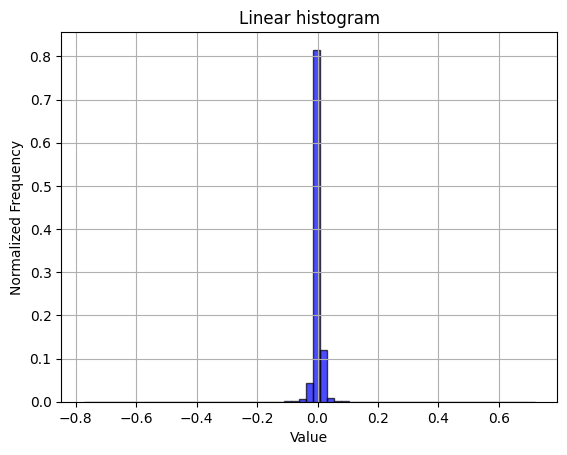

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 5.96046448e-08 0.00000000e+00 0.00000000e+00
 5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.19209290e-07 0.00000000e+00 1.78813934e-07 1.19209290e-07
 4.17232513e-07 2.98023224e-07 2.98023224e-07 4.17232513e-07
 4.17232513e-07 7.74860382e-07 1.13248825e-06 1.60932541e-06
 2.68220901e-06 5.42402267e-06 7.68899918e-06 1.09672546e-05
 1.78813934e-05 3.55243683e-05 6.77108765e-05 1.19805336e-04
 2.53796577e-04 5.72443008e-04 1.39570236e-03 4.91690636e-03
 3.42106819e-02 5.40744603e-01 3.85919094e-01 2.54348516e-02
 4.02939320e-03 1.25682354e-03 5.00917435e-04 2.37822533e-04
 1.17003918e-04 5.49554825e-05 3.23057175e-05 1.78217888e-05
 1.11460686e-05 6.31809235e-06 4.64916229e-06 2.86102295e-06
 1.60932541e-06 1.19209290e-06 7.74860382e-07 6.55651093e-07
 4.17232513e-07 3.57627869e-07 1.78813934e-07 2.98023224e-07
 2.38418579e-07 1.78813934e-07 5.96046448e-08 5.96046448e-08
 5.

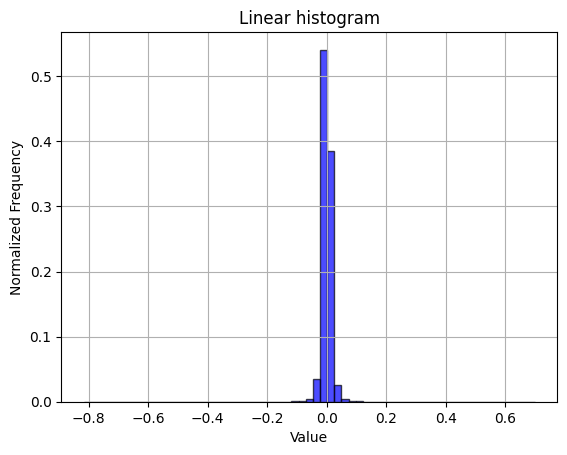

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.78813934e-07 5.96046448e-08 3.57627869e-07 2.38418579e-07
 7.15255737e-07 1.19209290e-06 1.31130219e-06 2.68220901e-06
 4.35113907e-06 8.04662704e-06 1.38878822e-05 2.08616257e-05
 3.25441360e-05 5.03063202e-05 9.34004784e-05 1.54554844e-04
 2.25603580e-04 3.73303890e-04 5.57065010e-04 9.16540623e-04
 1.47557259e-03 2.21240520e-03 3.70997190e-03 6.08718395e-03
 1.04765296e-02 1.90025568e-02 3.61524224e-02 6.72090054e-02
 1.10559165e-01 1.61891937e-01 1.88790321e-01 1.53692842e-01
 1.02533162e-01 5.98381758e-02 3.21830511e-02 1.76490545e-02
 9.45508480e-03 5.54364920e-03 3.41707468e-03 2.04509497e-03
 1.35499239e-03 8.54969025e-04 5.03957272e-04 3.45408916e-04
 2.07006931e-04 1.41024590e-04 7.84993172e-05 5.15580177e-05
 3.34978104e-05 1.94907188e-05 1.12652779e-05 6.73532486e-06
 4.52995300e-06 2.80141830e-06 1.37090683e-06 5.96046448e-07
 2.98023224e-07 2.38418579e-07 0.00000000e+00 5.96046448e-08
 1.

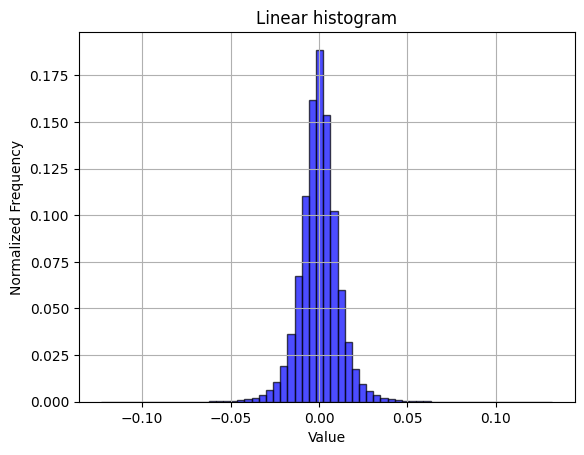

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.78813934e-07 3.57627869e-07 0.00000000e+00
 1.78813934e-07 3.57627869e-07 2.98023224e-07 2.38418579e-07
 7.74860382e-07 7.15255737e-07 7.15255737e-07 7.74860382e-07
 6.55651093e-07 8.94069672e-07 1.07288361e-06 1.54972076e-06
 1.84774399e-06 1.96695328e-06 2.08616257e-06 3.09944153e-06
 3.99351120e-06 6.37769699e-06 1.22189522e-05 2.44975090e-05
 8.57114792e-05 5.41806221e-04 4.65804338e-03 4.21708822e-02
 6.63249135e-01 2.71291494e-01 1.57590508e-02 1.85114145e-03
 2.28166580e-04 5.02467155e-05 1.78813934e-05 9.05990601e-06
 5.84125519e-06 3.21865082e-06 3.21865082e-06 1.72853470e-06
 1.37090683e-06 1.60932541e-06 6.55651093e-07 8.94069672e-07
 5.96046448e-07 5.96046448e-07 5.36441803e-07 4.17232513e-07
 1.78813934e-07 3.57627869e-07 4.17232513e-07 1.19209290e-07
 2.38418579e-07 1.78813934e-07 1.19209290e-07 5.96046448e-08
 5.

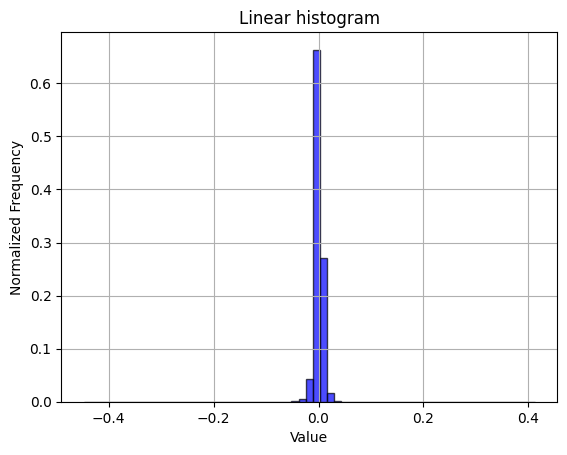

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 2.98023224e-08 0.00000000e+00 1.49011612e-08
 1.49011612e-08 1.49011612e-08 0.00000000e+00 0.00000000e+00
 2.98023224e-08 5.96046448e-08 1.04308128e-07 7.45058060e-08
 1.49011612e-07 1.93715096e-07 2.38418579e-07 2.23517418e-07
 3.87430191e-07 4.61935997e-07 8.64267349e-07 1.05798244e-06
 1.92224979e-06 3.87430191e-06 5.55813313e-06 9.03010368e-06
 1.53779984e-05 2.66432762e-05 4.80413437e-05 8.73506069e-05
 1.77040696e-04 3.95417213e-04 1.09554827e-03 5.33351302e-03
 7.57411718e-02 8.31996724e-01 7.77136385e-02 5.47471642e-03
 1.09606981e-03 3.91408801e-04 1.81466341e-04 8.97049904e-05
 4.71174717e-05 2.5

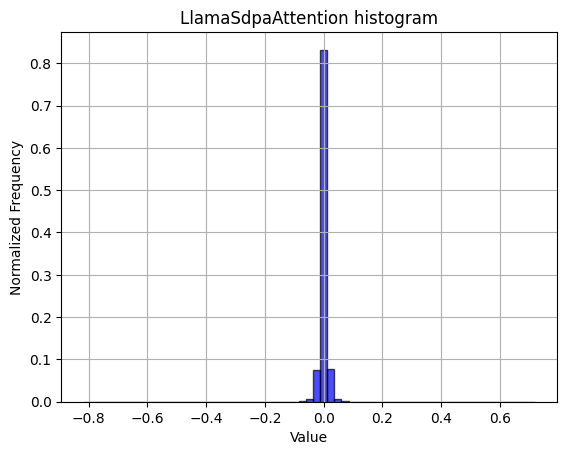

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.43569449e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 4.43569449e-08
 4.43569449e-08 2.21784725e-08 8.87138899e-08 1.33070835e-07
 2.66141670e-07 5.10104867e-07 1.26417293e-06 2.28438266e-06
 5.58897506e-06 1.28856925e-05 2.55496003e-05 1.14640524e-04
 3.95215944e-03 1.20963762e-01 5.43419483e-01 3.08240757e-01
 2.27520300e-02 4.33345174e-04 4.31814859e-05 1.70108884e-05
 7.45196675e-06 3.79251879e-06 1.70774238e-06 7.31889592e-07
 5.10104867e-07 1.55249307e-07 1.33070835e-07 1.10892362e-07
 4.43569449e-08 4.43569449e-08 2.21784725e-08 4.43569449e-08
 4.43569449e-08 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

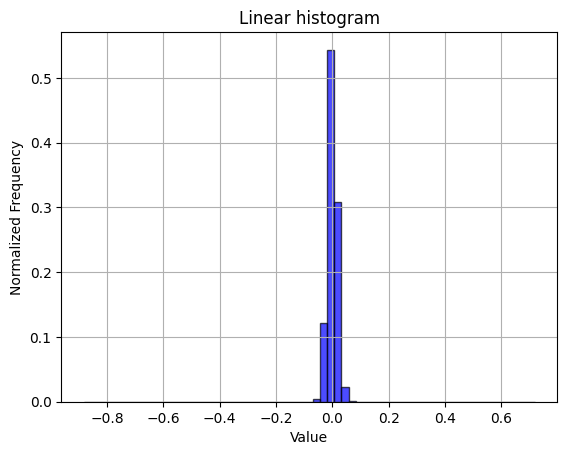

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 4.43569449e-08 4.43569449e-08 4.43569449e-08
 1.33070835e-07 1.55249307e-07 2.21784725e-08 1.55249307e-07
 5.10104867e-07 7.09711119e-07 5.98818757e-07 1.46377918e-06
 4.28044519e-06 2.05816225e-05 1.35377396e-04 1.01510869e-03
 6.12374239e-03 2.72650386e-02 8.35534029e-02 1.77104750e-01
 2.49423892e-01 2.31775639e-01 1.43396156e-01 5.90238571e-02
 1.70625199e-02 3.50413212e-03 5.05558280e-04 6.49385674e-05
 1.07565592e-05 3.12716462e-06 1.37506529e-06 6.65354174e-07
 3.10498615e-07 1.99606252e-07 2.66141670e-07 1.33070835e-07
 1.33070835e-07 0.00000000e+00 2.21784725e-08 4.43569449e-08
 0.00000000e+00 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

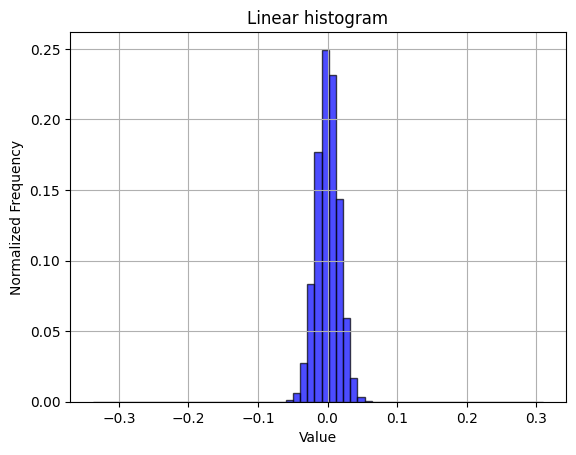

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 2.21784725e-08 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 1.10892362e-07 2.21784725e-08
 6.65354174e-08 4.43569449e-08 6.65354174e-08 8.87138899e-08
 4.43569449e-08 3.10498615e-07 3.10498615e-07 3.54855560e-07
 4.43569449e-07 6.43175702e-07 9.31495844e-07 1.59685002e-06
 1.81863474e-06 3.01627226e-06 4.05866046e-06 6.89750494e-06
 1.15771626e-05 2.58822774e-05 1.17301941e-04 1.68780393e-03
 2.17686365e-02 1.30869045e-01 3.36536208e-01 3.43768896e-01
 1.39103291e-01 2.39833344e-02 1.91803866e-03 1.27703645e-04
 2.84549802e-05 1.19985536e-05 6.83096952e-06 3.92558963e-06
 2.66141670e-06 1.90734863e-06 1.50813613e-06 1.02020973e-06
 6.87532647e-07 5.32283339e-07 3.99212505e-07 5.54461812e-07
 3.10498615e-07 1.10892362e-07 1.55249307e-07 8.87138899e-08
 6.65354174e-08 4.43569449e-08 2.21784725e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4

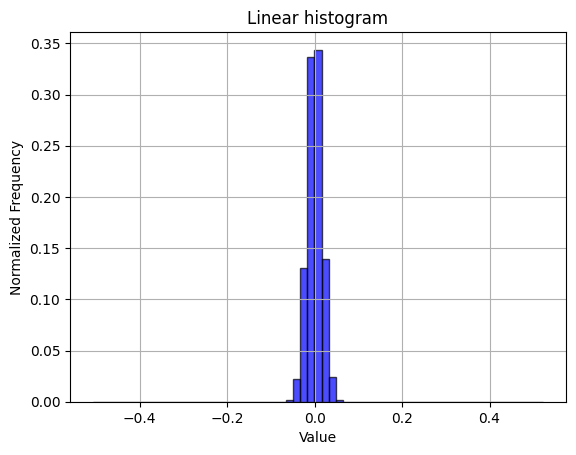

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

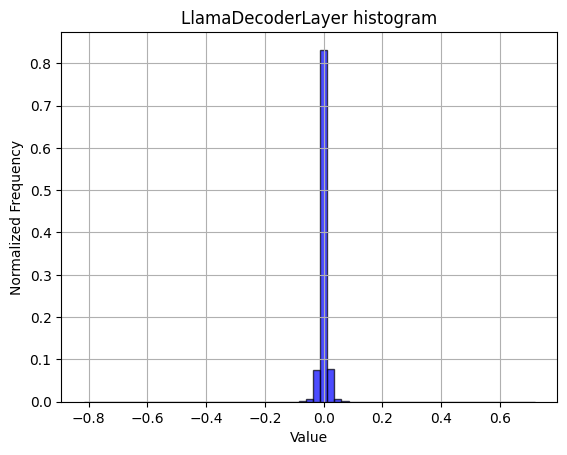

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.19209290e-07 1.19209290e-07 1.19209290e-07 3.57627869e-07
 8.94069672e-07 7.74860382e-07 1.84774399e-06 2.62260437e-06
 2.98023224e-06 4.47034836e-06 6.85453415e-06 9.89437103e-06
 1.66296959e-05 2.70605087e-05 4.38690186e-05 6.87241554e-05
 1.15513802e-04 1.88648701e-04 3.42726707e-04 5.76853752e-04
 9.76979733e-04 1.78945065e-03 3.39710712e-03 5.97071648e-03
 1.10315084e-02 2.11349130e-02 4.24577594e-02 1.02960289e-01
 2.72806227e-01 3.09198856e-01 1.25766039e-01 4.95100617e-02
 2.36148238e-02 1.25458241e-02 6.96265697e-03 3.68911028e-03
 2.04950571e-03 1.19549036e-03 6.42299652e-04 3.51309776e-04
 2.09152699e-04 1.24275684e-04 7.65323639e-05 4.49419022e-05
 3.35574150e-05 1.78813934e-05 1.18613243e-05 6.25848770e-06
 4.64916229e-06 2.44379044e-06 2.44379044e-06 1.19209290e-06
 1.37090683e-06 7.74860382e-07 2.38418579e-07 1.78813934e-07
 0.00000000e+00 0.00000000e+00 1.19209290e-07 0.00000000e+00
 0.

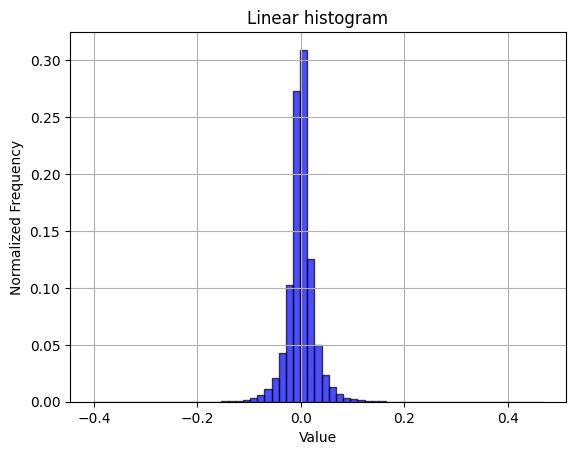

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.19209290e-07 5.96046448e-08 1.19209290e-07 0.00000000e+00
 5.96046448e-08 5.96046448e-08 2.38418579e-07 3.57627869e-07
 2.98023224e-07 5.36441803e-07 5.36441803e-07 1.43051147e-06
 2.86102295e-06 3.69548798e-06 8.22544098e-06 1.23381615e-05
 2.12192535e-05 3.50475311e-05 6.97970390e-05 1.19566917e-04
 2.39610672e-04 4.38392162e-04 9.03248787e-04 1.74987316e-03
 3.45575809e-03 6.93464279e-03 1.47688389e-02 3.49416733e-02
 1.06881142e-01 3.20173740e-01 3.30551386e-01 1.12582505e-01
 3.63793373e-02 1.51768923e-02 7.34895468e-03 3.52811813e-03
 1.78259611e-03 9.04917717e-04 4.42326069e-04 2.54452229e-04
 1.27315521e-04 6.80685043e-05 3.88026237e-05 2.06232071e-05
 1.19209290e-05 8.76188278e-06 2.92062759e-06 2.44379044e-06
 1.72853470e-06 5.36441803e-07 4.76837158e-07 4.76837158e-07
 4.17232513e-07 5.96046448e-08 5.96046448e-08 5.96046448e-08
 0.00000000e+00 5.96046448e-08 1.19209290e-07 0.00000000e+00
 0.

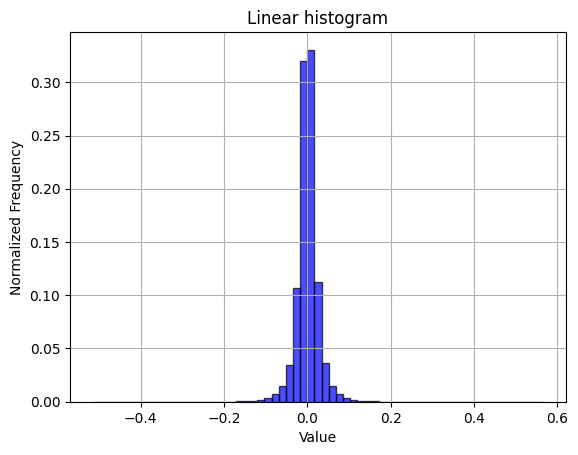

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 5.96046448e-08 1.19209290e-07 0.00000000e+00
 5.96046448e-08 0.00000000e+00 1.19209290e-07 5.96046448e-08
 2.38418579e-07 2.38418579e-07 2.38418579e-07 4.17232513e-07
 6.55651093e-07 7.15255737e-07 1.49011612e-06 3.33786011e-06
 5.00679016e-06 1.12056732e-05 2.46763229e-05 5.17368317e-05
 1.01268291e-04 2.12907791e-04 4.24563885e-04 8.48352909e-04
 1.57827139e-03 2.80827284e-03 5.05071878e-03 8.69780779e-03
 1.48169994e-02 2.58075595e-02 4.48155403e-02 7.81075954e-02
 1.24276698e-01 1.73589349e-01 1.80702031e-01 1.34869039e-01
 8.57605338e-02 4.99626994e-02 2.87439227e-02 1.64461136e-02
 9.69785452e-03 5.64670563e-03 3.19337845e-03 1.80286169e-03
 9.57250595e-04 4.91857529e-04 2.55823135e-04 1.22666359e-04
 5.55515289e-05 2.71201134e-05 1.37090683e-05 6.25848770e-06
 3.33786011e-06 2.02655792e-06 7.74860382e-07 5.96046448e-07
 3.57627869e-07 2.98023224e-07 2.38418579e-07 1.78813934e-07
 1.

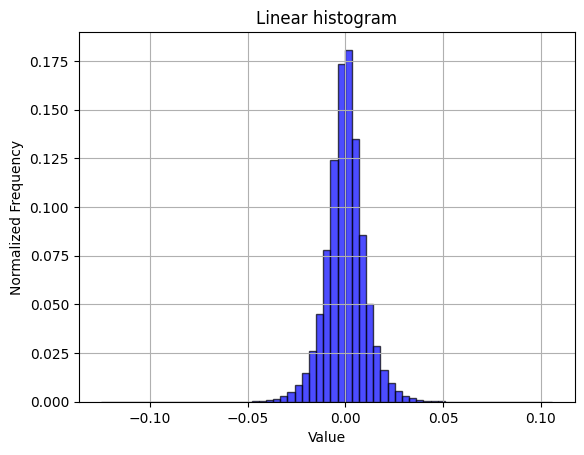

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 5.96046448e-08 5.96046448e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.19209290e-07 5.96046448e-08
 1.19209290e-07 1.19209290e-07 2.38418579e-07 5.96046448e-08
 2.38418579e-07 3.57627869e-07 4.17232513e-07 7.15255737e-07
 1.37090683e-06 1.31130219e-06 1.96695328e-06 3.03983688e-06
 3.27825546e-06 5.12599945e-06 9.47713852e-06 1.57952309e-05
 2.76565552e-05 9.18507576e-05 2.74533033e-03 5.97074628e-02
 7.38012016e-01 1.88435972e-01 1.05513930e-02 2.89022923e-04
 4.05907631e-05 1.99675560e-05 1.20997429e-05 6.49690628e-06
 4.05311584e-06 2.44379044e-06 2.08616257e-06 1.78813934e-06
 1.54972076e-06 7.15255737e-07 1.13248825e-06 5.36441803e-07
 5.36441803e-07 2.98023224e-07 1.19209290e-07 1.19209290e-07
 5.96046448e-08 5.96046448e-08 1.19209290e-07 1.19209290e-07
 1.78813934e-07 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 0.00000000e+00 5.96046448e-08 0.00000000e+00
 0.

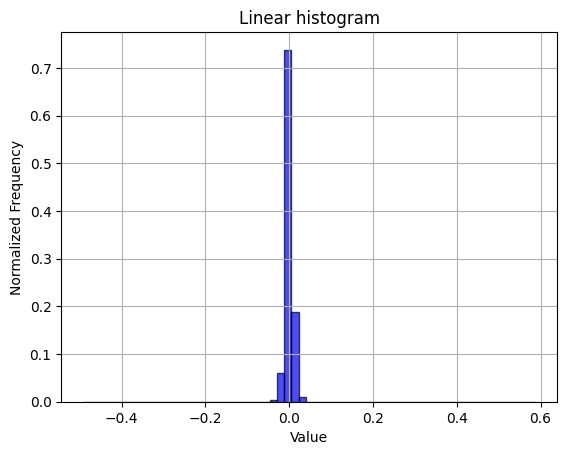

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[2.98023224e-08 2.98023224e-08 2.98023224e-08 1.49011612e-08
 2.98023224e-08 1.49011612e-08 8.94069672e-08 1.34110451e-07
 1.34110451e-07 3.12924385e-07 5.21540642e-07 9.38773155e-07
 1.71363354e-06 2.39908695e-06 4.50015068e-06 6.49690628e-06
 1.24871731e-05 2.19494104e-05 4.12464142e-05 7.74562359e-05
 1.37999654e-04 2.82451510e-04 5.80742955e-04 1.18903816e-03
 2.48578191e-03 5.21090627e-03 1.15919560e-02 3.35030705e-02
 1.61192596e-01 5.74674889e-01 1.55080497e-01 3.25177610e-02
 1.15180910e-02 5.09685278e-03 2.43572891e-03 1.17623806e-03
 5.65662980e-04 2.82317400e-04 1.42648816e-04 7.42077827e-05
 3.98308039e-05 2.1

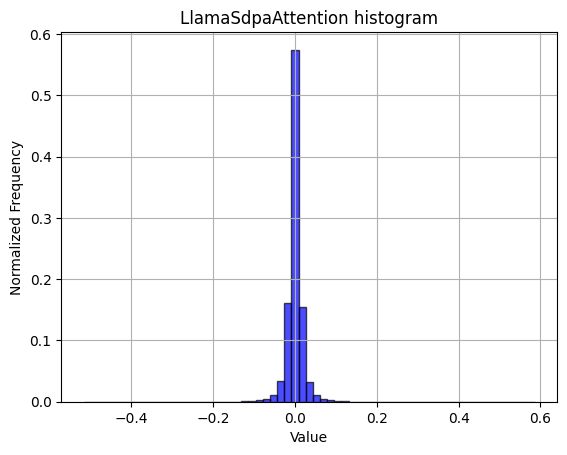

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 2.21784725e-08 4.43569449e-08 2.21784725e-08
 4.43569449e-08 2.21784725e-08 0.00000000e+00 4.43569449e-08
 2.21784725e-08 8.87138899e-08 0.00000000e+00 8.87138899e-08
 2.21784725e-08 8.87138899e-08 1.55249307e-07 5.10104867e-07
 1.35288682e-06 3.10498615e-06 4.85708547e-06 7.67375148e-06
 1.52366106e-05 3.18926434e-05 1.07077665e-04 7.07413429e-03
 2.47977301e-01 6.23249032e-01 1.19642502e-01 1.75853108e-03
 7.17473585e-05 2.65476316e-05 1.21094460e-05 7.18582508e-06
 4.56876533e-06 2.19566877e-06 8.20603482e-07 2.43963197e-07
 1.33070835e-07 8.87138899e-08 6.65354174e-08 0.00000000e+00
 2.21784725e-08 4.43569449e-08 8.87138899e-08 2.21784725e-08
 2.21784725e-08 0.00000000e+00 4.43569449e-08 0.00000000e+00
 0.00000000e+00 6.65354174e-08 4.43569449e-08 0.00000000e+00
 0

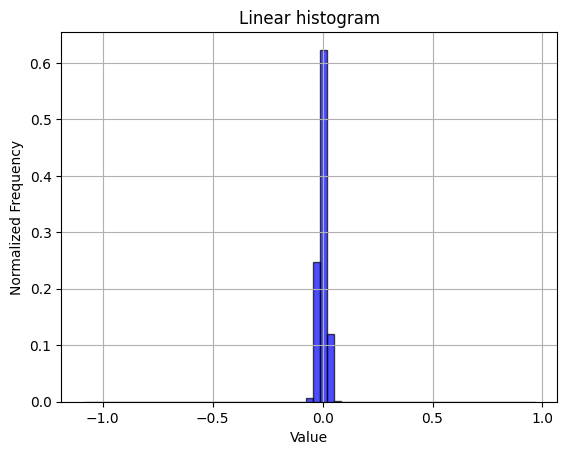

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 0.00000000e+00 4.43569449e-08 1.77427780e-07
 1.99606252e-07 2.88320142e-07 3.99212505e-07 5.76640284e-07
 6.43175702e-07 8.20603482e-07 8.42781954e-07 7.98425009e-07
 1.53031460e-06 1.13110210e-06 1.30852988e-06 1.50813613e-06
 1.90734863e-06 2.10695489e-06 2.94973684e-06 3.14934309e-06
 5.87729521e-06 2.10695489e-05 1.76030536e-04 1.48675608e-03
 9.12056413e-03 3.74152383e-02 1.03741402e-01 1.99274950e-01
 2.55056226e-01 2.13447238e-01 1.20285123e-01 4.59229891e-02
 1.15811326e-02 2.11804412e-03 2.67649806e-04 3.12938247e-05
 6.20997229e-06 3.70380490e-06 3.26023545e-06 2.24002572e-06
 2.10695489e-06 1.57467155e-06 1.15328057e-06 1.39724377e-06
 1.15328057e-06 1.30852988e-06 8.87138899e-07 8.20603482e-07
 7.98425009e-07 3.99212505e-07 5.32283339e-07 2.21784725e-07
 8

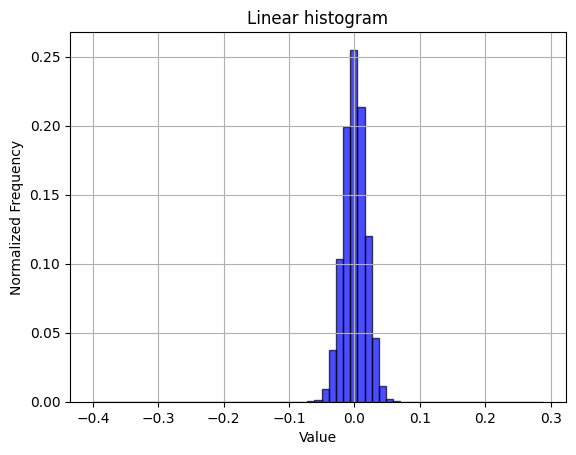

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 2.21784725e-08 2.21784725e-08 2.21784725e-08 4.43569449e-08
 4.43569449e-08 1.77427780e-07 8.87138899e-08 2.66141670e-07
 4.43569449e-07 9.53674316e-07 2.43963197e-06 1.00468480e-05
 1.62916405e-03 4.03521937e-01 5.88163021e-01 6.65280985e-03
 1.27082647e-05 3.08280767e-06 1.28635140e-06 3.77034032e-07
 3.99212505e-07 1.77427780e-07 6.65354174e-08 4.43569449e-08
 1.10892362e-07 6.65354174e-08 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0

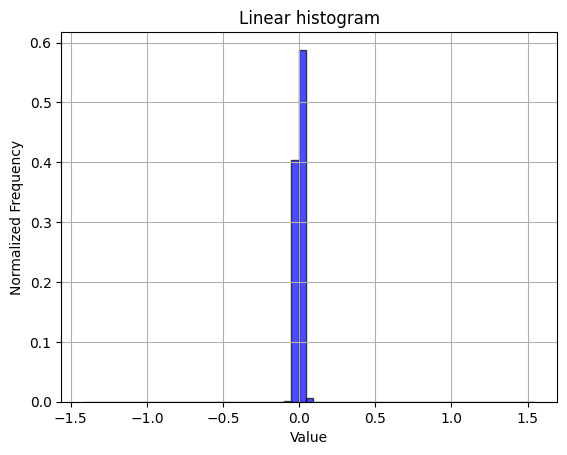

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

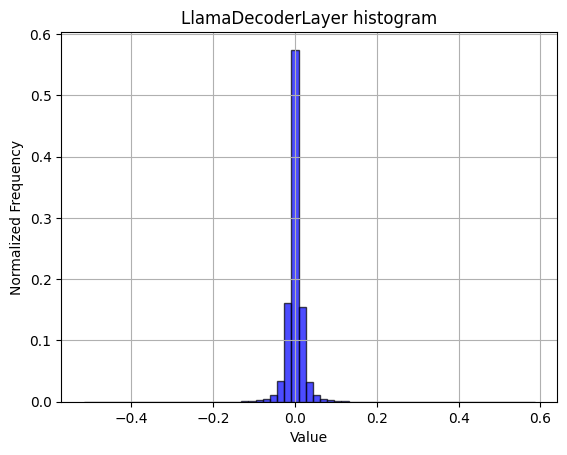

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 1.19209290e-07
 5.96046448e-08 0.00000000e+00 1.19209290e-07 2.38418579e-07
 5.96046448e-08 3.57627869e-07 5.36441803e-07 3.57627869e-07
 1.01327896e-06 1.19209290e-06 5.36441803e-07 1.37090683e-06
 3.21865082e-06 3.33786011e-06 6.67572021e-06 1.89542770e-05
 1.02460384e-04 7.81238079e-04 5.45722246e-03 3.16569209e-02
 1.53563797e-01 4.97454345e-01 2.46366680e-01 5.30637503e-02
 9.82898474e-03 1.44112110e-03 1.91569328e-04 2.87890434e-05
 9.71555710e-06 5.18560410e-06 3.51667404e-06 1.78813934e-06
 1.31130219e-06 5.96046448e-07 1.07288361e-06 5.36441803e-07
 2.98023224e-07 2.98023224e-07 0.00000000e+00 5.96046448e-08
 1.19209290e-07 1.78813934e-07 1.19209290e-07 0.00000000e+00
 0.00000000e+00 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

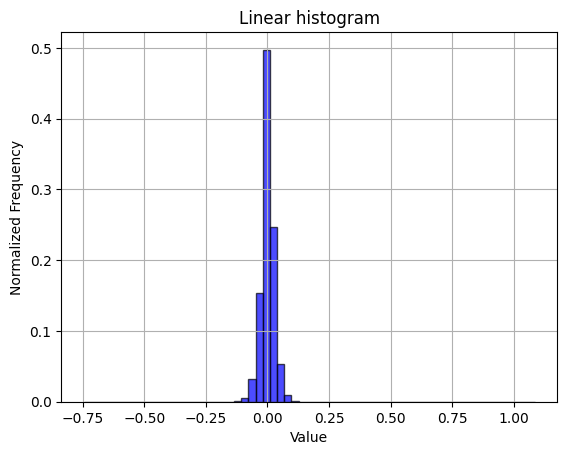

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 1.19209290e-07 5.96046448e-08 1.19209290e-07
 1.78813934e-07 5.36441803e-07 8.34465027e-07 2.38418579e-07
 1.19209290e-06 1.01327896e-06 2.32458115e-06 3.87430191e-06
 4.47034836e-06 9.83476639e-06 1.54972076e-05 3.45706940e-05
 5.80549240e-05 1.24692917e-04 2.44677067e-04 4.69505787e-04
 9.32991505e-04 1.80667639e-03 3.59958410e-03 6.45816326e-03
 1.14387274e-02 2.08894610e-02 3.55392694e-02 6.19634986e-02
 1.09079182e-01 1.95737660e-01 2.31821716e-01 1.38639450e-01
 7.80240893e-02 4.45418358e-02 2.63094306e-02 1.47653222e-02
 8.12929869e-03 4.44424152e-03 2.36487389e-03 1.24216080e-03
 6.53803349e-04 3.09050083e-04 1.64210796e-04 7.27176666e-05
 4.74452972e-05 2.25305557e-05 1.12056732e-05 6.67572021e-06
 3.15904617e-06 3.75509262e-06 1.60932541e-06 1.37090683e-06
 8.34465027e-07 9.53674316e-07 4.76837158e-07 1.78813934e-07
 1.78813934e-07 1.19209290e-07 5.96046448e-08 0.00000000e+00
 5.

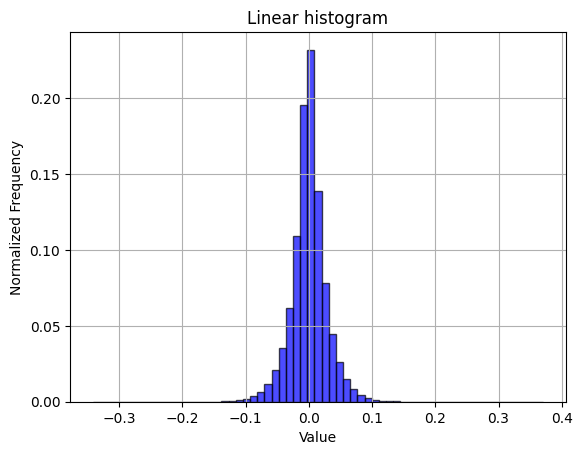

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.78813934e-07 0.00000000e+00 5.96046448e-08 1.19209290e-07
 5.96046448e-08 0.00000000e+00 5.96046448e-08 2.38418579e-07
 1.19209290e-07 2.38418579e-07 7.15255737e-07 8.34465027e-07
 1.54972076e-06 6.31809235e-06 1.71065331e-05 4.42266464e-05
 1.23977661e-04 2.93016434e-04 7.53641129e-04 1.77085400e-03
 3.89456749e-03 7.89552927e-03 1.42784715e-02 2.58947611e-02
 4.05450463e-02 6.16083741e-02 8.37961435e-02 1.06197059e-01
 1.20767236e-01 1.26127005e-01 1.13943219e-01 9.53826904e-02
 7.29585290e-02 5.01747727e-02 3.32484841e-02 1.92967057e-02
 1.07954144e-02 5.61976433e-03 2.62820721e-03 1.15585327e-03
 4.63664532e-04 1.95503235e-04 7.49230385e-05 2.79545784e-05
 8.76188278e-06 4.52995300e-06 1.72853470e-06 7.15255737e-07
 1.19209290e-07 2.98023224e-07 1.19209290e-07 2.98023224e-07
 0.00000000e+00 5.96046448e-08 5.96046448e-08 0.00000000e+00
 5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

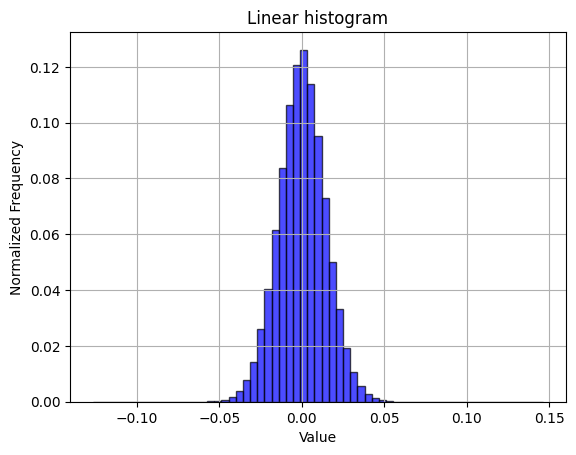

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 5.96046448e-08 0.00000000e+00 0.00000000e+00
 5.96046448e-08 5.96046448e-08 5.96046448e-08 5.96046448e-08
 5.96046448e-08 1.19209290e-07 0.00000000e+00 5.96046448e-08
 1.78813934e-07 1.19209290e-07 1.19209290e-07 2.98023224e-07
 1.19209290e-07 2.38418579e-07 2.38418579e-07 6.55651093e-07
 7.15255737e-07 7.15255737e-07 1.43051147e-06 1.60932541e-06
 2.50339508e-06 4.23192978e-06 7.33137131e-06 9.71555710e-06
 1.99079514e-05 3.34978104e-05 2.03967094e-04 7.03531504e-03
 1.06118321e-01 4.26988363e-01 3.79077494e-01 7.60724545e-02
 4.20171022e-03 1.32501125e-04 3.40342522e-05 1.91926956e-05
 1.10268593e-05 6.43730164e-06 4.41074371e-06 2.98023224e-06
 2.26497650e-06 1.49011612e-06 7.15255737e-07 7.74860382e-07
 4.17232513e-07 1.19209290e-07 3.57627869e-07 5.96046448e-08
 5.96046448e-08 2.38418579e-07 0.00000000e+00 1.78813934e-07
 5.96046448e-08 1.19209290e-07 0.00000000e+00 3.57627869e-07
 1.

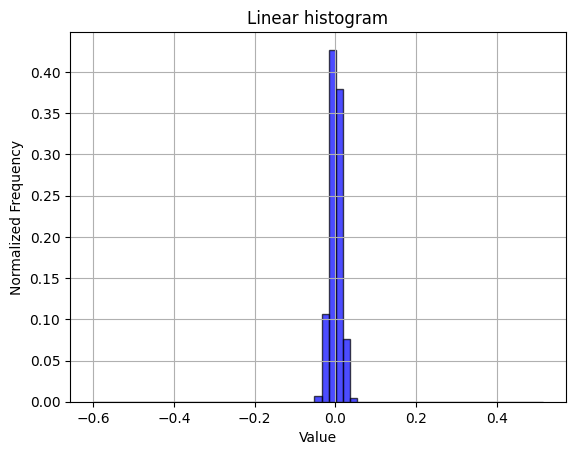

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 0.00000000e+00 0.00000000e+00 2.98023224e-08
 2.98023224e-08 1.49011612e-08 2.98023224e-08 7.45058060e-08
 2.98023224e-08 1.19209290e-07 1.63912773e-07 1.19209290e-07
 2.98023224e-07 3.72529030e-07 2.38418579e-07 5.51342964e-07
 1.37090683e-06 1.99675560e-06 4.61935997e-06 1.66445971e-05
 8.78274441e-05 5.49107790e-04 3.23057175e-03 1.69844925e-02
 1.17372155e-01 5.91309905e-01 2.34766081e-01 2.89404690e-02
 5.58859110e-03 9.50276852e-04 1.52260065e-04 2.72393227e-05
 7.25686550e-06 3.01003456e-06 1.69873238e-06 7.00354576e-07
 4.17232513e-07 2.38418579e-07 3.27825546e-07 1.63912773e-07
 1.04308128e-07 1.7

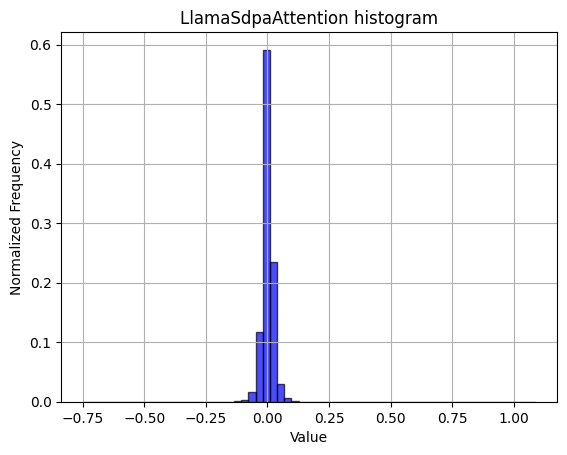

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 4.43569449e-08
 6.65354174e-08 2.21784725e-08 6.65354174e-08 2.21784725e-08
 2.21784725e-08 2.21784725e-08 4.43569449e-08 4.43569449e-08
 2.21784725e-08 4.43569449e-08 1.10892362e-07 1.10892362e-07
 1.55249307e-07 1.99606252e-07 2.43963197e-07 4.43569449e-07
 6.87532647e-07 1.02020973e-06 1.64120696e-06 4.05866046e-06
 8.27257023e-06 4.02982845e-05 4.46829685e-04 5.13249774e-03
 3.49559340e-02 1.31090763e-01 2.72195616e-01 3.02781460e-01
 1.81843735e-01 5.96491126e-02 1.06379043e-02 1.09885460e-03
 8.45443371e-05 1.27748001e-05 5.74422437e-06 2.24002572e-06
 1.13110210e-06 6.87532647e-07 6.43175702e-07 4.21390977e-07
 1.99606252e-07 2.43963197e-07 1.77427780e-07 1.77427780e-07
 8.87138899e-08 8.87138899e-08 8.87138899e-08 4.43569449e-08
 6.65354174e-08 2.21784725e-08 4.43569449e-08 6.65354174e-08
 0

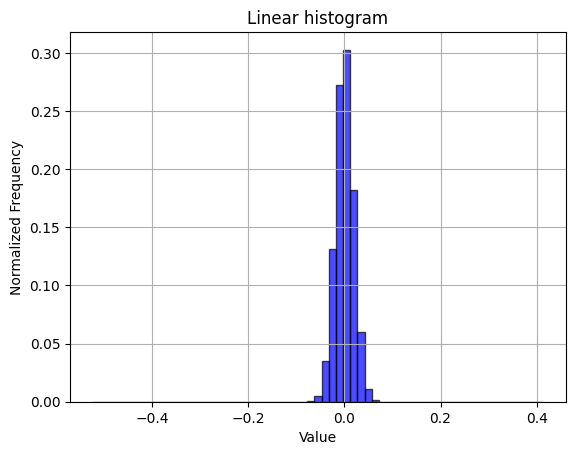

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 2.21784725e-08
 1.10892362e-07 2.21784725e-08 2.21784725e-08 1.55249307e-07
 1.10892362e-07 2.21784725e-07 2.43963197e-07 4.87926394e-07
 1.15328057e-06 1.79645627e-06 4.28044519e-06 4.87704610e-05
 5.96623088e-04 5.19861177e-03 2.72054007e-02 9.55055592e-02
 2.03194374e-01 2.74093872e-01 2.28426046e-01 1.17834867e-01
 3.86017866e-02 8.13526331e-03 1.04764450e-03 9.07321309e-05
 7.09711119e-06 2.10695489e-06 8.20603482e-07 5.76640284e-07
 3.99212505e-07 2.21784725e-07 2.43963197e-07 6.65354174e-08
 6.65354174e-08 2.21784725e-08 8.87138899e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

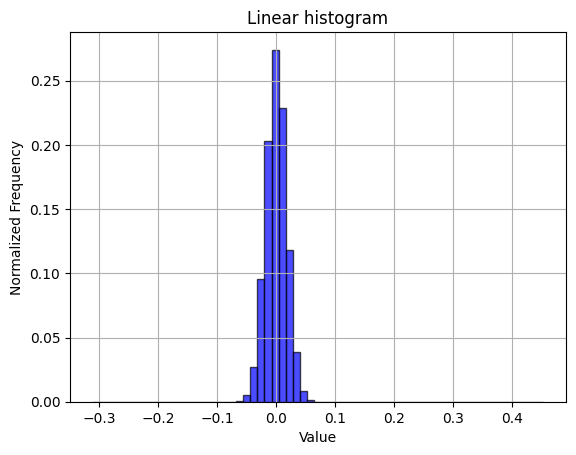

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[4.43569449e-08 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.43569449e-08
 2.21784725e-08 8.87138899e-08 8.87138899e-08 6.65354174e-08
 6.65354174e-08 3.10498615e-07 2.43963197e-07 3.32677087e-07
 7.98425009e-07 9.98031261e-07 3.08280767e-06 2.73238781e-05
 3.40530484e-03 9.56610524e-02 4.52183901e-01 3.87569184e-01
 5.95583805e-02 1.56890514e-03 1.42385793e-05 2.46181044e-06
 1.08674515e-06 6.20997229e-07 4.65747922e-07 2.66141670e-07
 1.55249307e-07 1.10892362e-07 4.43569449e-08 4.43569449e-08
 4.43569449e-08 0.00000000e+00 4.43569449e-08 2.21784725e-08
 4.43569449e-08 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

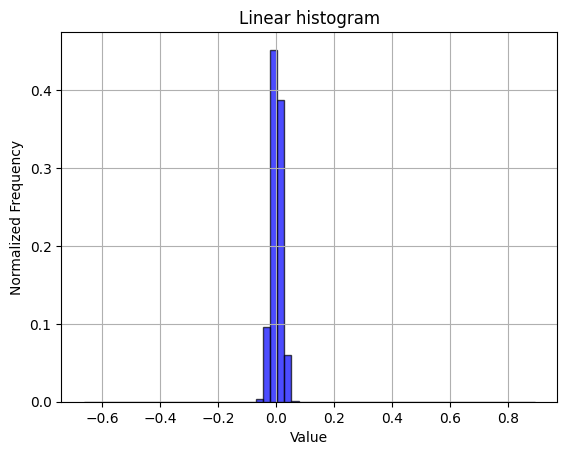

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

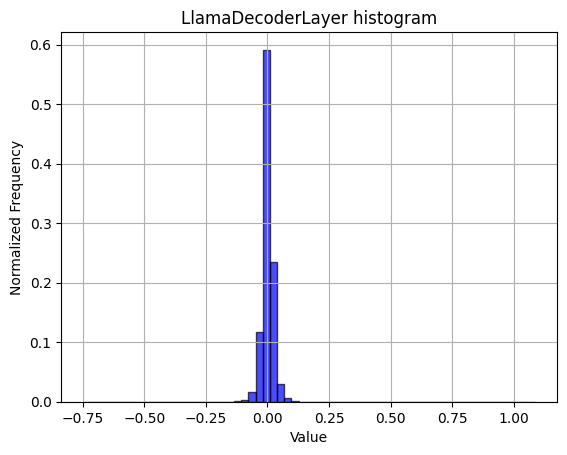

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 5.96046448e-08 0.00000000e+00
 5.96046448e-08 5.96046448e-08 1.78813934e-07 2.98023224e-07
 4.17232513e-07 2.38418579e-07 2.38418579e-07 5.96046448e-07
 6.55651093e-07 8.94069672e-07 8.34465027e-07 1.01327896e-06
 7.15255737e-07 1.19209290e-06 2.32458115e-06 3.33786011e-06
 4.41074371e-06 7.92741776e-06 1.84178352e-05 7.09295273e-05
 3.43263149e-04 2.08175182e-03 1.18255019e-02 5.49684167e-02
 2.00343966e-01 4.19841886e-01 2.28652179e-01 6.44575953e-02
 1.43203735e-02 2.50500441e-03 4.12583351e-04 8.19563866e-05
 2.08616257e-05 8.58306885e-06 4.70876694e-06 3.51667404e-06
 2.08616257e-06 1.90734863e-06 1.31130219e-06 1.43051147e-06
 1.01327896e-06 1.01327896e-06 1.01327896e-06 6.55651093e-07
 4.17232513e-07 3.57627869e-07 7.74860382e-07 1.78813934e-07
 2.98023224e-07 1.19209290e-07 5.96046448e-08 1.78813934e-07
 0.00000000e+00 1.19209290e-07 0.00000000e+00 0.00000000e+00
 0.

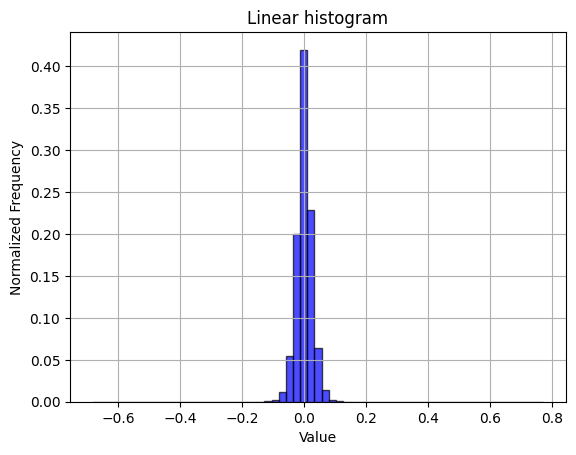

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.96046448e-08 0.00000000e+00 0.00000000e+00
 5.96046448e-08 5.96046448e-08 0.00000000e+00 1.19209290e-07
 0.00000000e+00 1.78813934e-07 4.17232513e-07 2.98023224e-07
 1.25169754e-06 2.08616257e-06 2.86102295e-06 4.47034836e-06
 6.85453415e-06 1.41859055e-05 2.88486481e-05 6.15119934e-05
 1.38521194e-04 3.54826450e-04 7.94112682e-04 1.92344189e-03
 4.15921211e-03 9.35751200e-03 1.85039043e-02 3.54427099e-02
 6.53680563e-02 1.16869807e-01 1.93533897e-01 2.23717690e-01
 1.48178399e-01 8.62891078e-02 4.67997789e-02 2.48629451e-02
 1.27198696e-02 5.94210625e-03 2.82806158e-03 1.20782852e-03
 4.99248505e-04 2.12609768e-04 9.02414322e-05 3.73125076e-05
 2.11596489e-05 1.02519989e-05 6.02006912e-06 2.80141830e-06
 1.90734863e-06 1.01327896e-06 7.74860382e-07 2.98023224e-07
 4.76837158e-07 2.98023224e-07 1.19209290e-07 1.78813934e-07
 1.

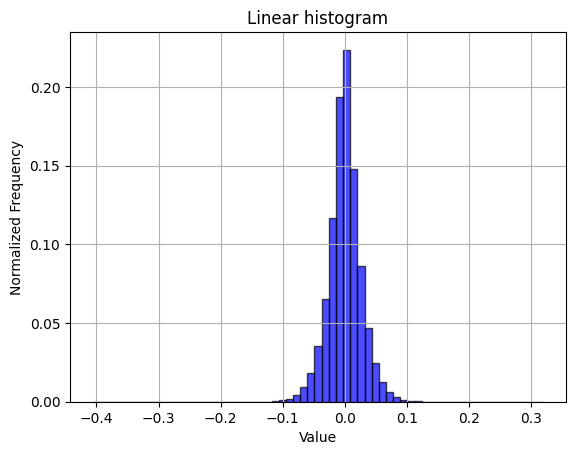

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.19209290e-07 0.00000000e+00 5.96046448e-08 0.00000000e+00
 1.78813934e-07 1.19209290e-07 5.96046448e-08 2.98023224e-07
 1.19209290e-07 7.15255737e-07 1.54972076e-06 2.50339508e-06
 5.42402267e-06 1.78813934e-05 4.64320183e-05 1.13189220e-04
 3.12149525e-04 6.96361065e-04 1.56080723e-03 3.55184078e-03
 6.81269169e-03 1.28898025e-02 2.14480758e-02 3.55445743e-02
 5.38476110e-02 7.35393167e-02 9.66361165e-02 1.13971829e-01
 1.24234498e-01 1.18735969e-01 1.01533592e-01 7.94014335e-02
 5.94775081e-02 3.99524570e-02 2.46723294e-02 1.50513053e-02
 8.31574202e-03 4.06754017e-03 2.06053257e-03 8.62658024e-04
 3.79979610e-04 1.62959099e-04 5.35249710e-05 2.39014626e-05
 7.92741776e-06 2.68220901e-06 1.37090683e-06 5.96046448e-07
 4.76837158e-07 5.96046448e-08 2.38418579e-07 2.98023224e-07
 1.19209290e-07 0.00000000e+00 5.96046448e-08 1.19209290e-07
 5.96046448e-08 0.00000000e+00 1.19209290e-07 0.00000000e+00
 5.

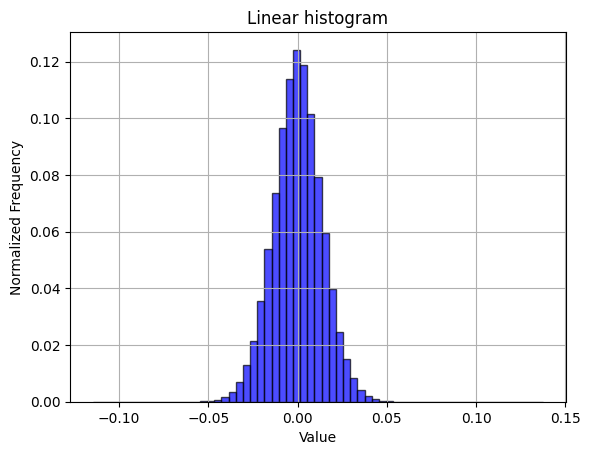

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 5.96046448e-08 0.00000000e+00 5.96046448e-08
 5.96046448e-08 0.00000000e+00 1.19209290e-07 2.38418579e-07
 1.19209290e-07 5.96046448e-08 1.19209290e-07 1.19209290e-07
 1.78813934e-07 5.96046448e-08 0.00000000e+00 3.57627869e-07
 2.38418579e-07 3.57627869e-07 5.36441803e-07 7.74860382e-07
 1.31130219e-06 1.72853470e-06 2.02655792e-06 2.68220901e-06
 3.51667404e-06 3.27825546e-06 5.90085983e-06 8.46385956e-06
 1.73449516e-05 4.39286232e-05 9.98973846e-04 2.33088136e-02
 1.85665965e-01 4.59993362e-01 2.78070509e-01 4.90151048e-02
 2.71153450e-03 8.67843628e-05 1.90734863e-05 1.02519989e-05
 8.10623169e-06 4.41074371e-06 3.51667404e-06 2.20537186e-06
 2.02655792e-06 1.19209290e-06 9.53674316e-07 4.76837158e-07
 6.55651093e-07 3.57627869e-07 1.19209290e-07 3.57627869e-07
 3.57627869e-07 4.17232513e-07 0.00000000e+00 5.96046448e-08
 0.00000000e+00 1.78813934e-07 5.96046448e-08 1.19209290e-07
 5.

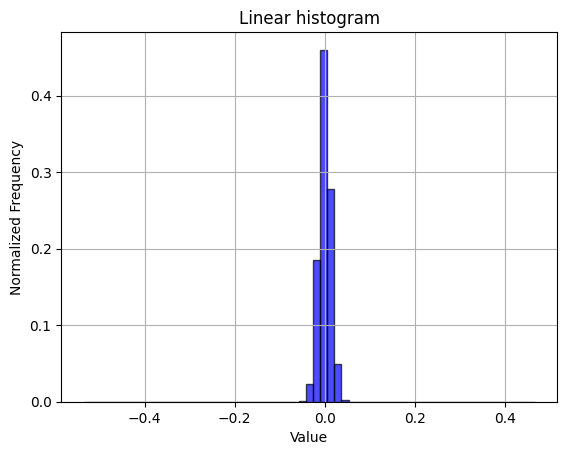

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 0.00000000e+00 1.49011612e-08 0.00000000e+00
 1.49011612e-08 1.49011612e-08 5.96046448e-08 8.94069672e-08
 1.19209290e-07 7.45058060e-08 8.94069672e-08 2.23517418e-07
 2.08616257e-07 2.53319740e-07 2.83122063e-07 2.83122063e-07
 2.23517418e-07 4.47034836e-07 7.74860382e-07 1.23679638e-06
 2.45869160e-06 4.52995300e-06 1.12354755e-05 4.28259373e-05
 2.20566988e-04 1.25250220e-03 6.57513738e-03 3.03671658e-02
 1.77228764e-01 5.21720991e-01 2.16261744e-01 3.65688801e-02
 7.89733231e-03 1.50150061e-03 2.62856483e-04 5.16027212e-05
 1.31875277e-05 4.58955765e-06 2.23517418e-06 1.31130219e-06
 8.19563866e-07 6.5

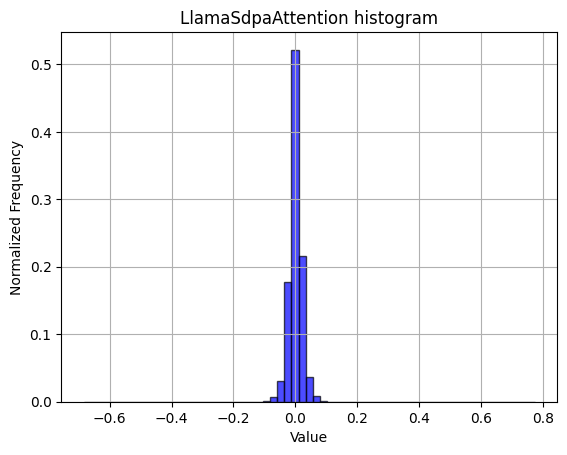

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 4.43569449e-08 0.00000000e+00
 2.21784725e-08 8.87138899e-08 2.21784725e-08 2.21784725e-08
 4.43569449e-08 4.43569449e-08 2.21784725e-08 6.65354174e-08
 4.43569449e-08 1.10892362e-07 2.43963197e-07 4.65747922e-07
 5.98818757e-07 8.87138899e-07 1.46377918e-06 2.68359517e-06
 7.47414522e-06 1.73435655e-05 9.13087712e-05 1.04234385e-03
 1.13420043e-02 6.90578638e-02 2.14390733e-01 3.31781565e-01
 2.53497501e-01 9.73543123e-02 1.91829371e-02 2.03094926e-03
 1.56690908e-04 2.44406767e-05 7.98425009e-06 3.19370004e-06
 1.72992085e-06 7.31889592e-07 4.65747922e-07 3.99212505e-07
 2.66141670e-07 2.21784725e-07 8.87138899e-08 1.10892362e-07
 1.10892362e-07 1.33070835e-07 8.87138899e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.43569449e-08 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

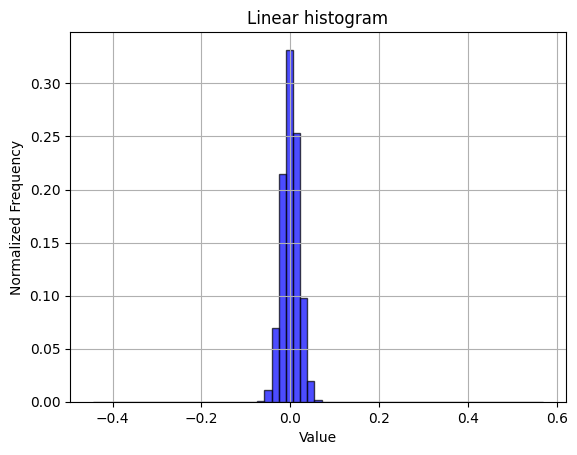

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.43569449e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.55249307e-07
 4.43569449e-08 8.87138899e-08 4.43569449e-08 2.21784725e-07
 3.54855560e-07 6.43175702e-07 1.28635140e-06 2.68359517e-06
 2.39749287e-05 5.44902890e-04 7.49239811e-03 5.16579872e-02
 1.82828304e-01 3.23388455e-01 2.82037114e-01 1.21886963e-01
 2.70171276e-02 2.92740312e-03 1.77095103e-04 8.93792441e-06
 1.50813613e-06 7.31889592e-07 5.98818757e-07 2.43963197e-07
 1.99606252e-07 6.65354174e-08 6.65354174e-08 4.43569449e-08
 0.00000000e+00 2.21784725e-08 0.00000000e+00 2.21784725e-08
 2.21784725e-08 6.65354174e-08 4.43569449e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0

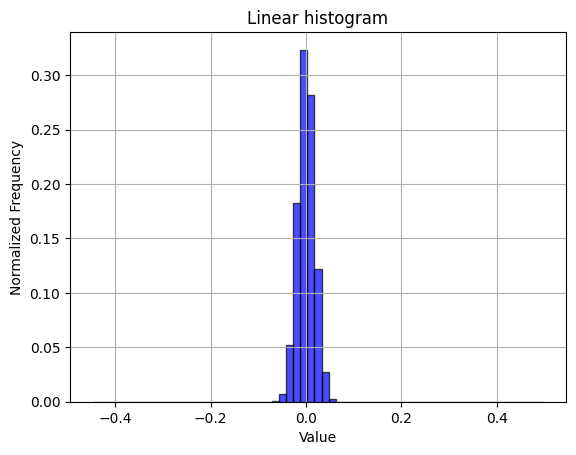

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 2.21784725e-08 2.21784725e-08 0.00000000e+00
 6.65354174e-08 4.43569449e-08 2.21784725e-08 0.00000000e+00
 4.43569449e-08 4.43569449e-08 2.21784725e-08 2.21784725e-08
 2.21784725e-08 8.87138899e-08 4.43569449e-08 8.87138899e-08
 4.43569449e-08 3.99212505e-07 2.43963197e-07 5.54461812e-07
 1.30852988e-06 2.12913336e-06 4.28044519e-06 8.63186149e-05
 4.82115635e-03 7.97105834e-02 3.51575364e-01 4.17759297e-01
 1.34257006e-01 1.14972758e-02 2.69335370e-04 7.60721606e-06
 2.70577364e-06 1.46377918e-06 6.87532647e-07 5.10104867e-07
 2.43963197e-07 2.21784725e-07 1.10892362e-07 1.55249307e-07
 8.87138899e-08 6.65354174e-08 2.21784725e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.65354174e-08 0.00000000e+00 2.21784725e-08 6.65354174e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

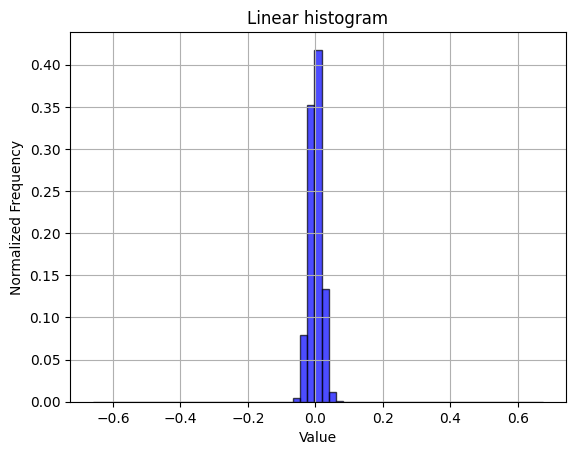

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

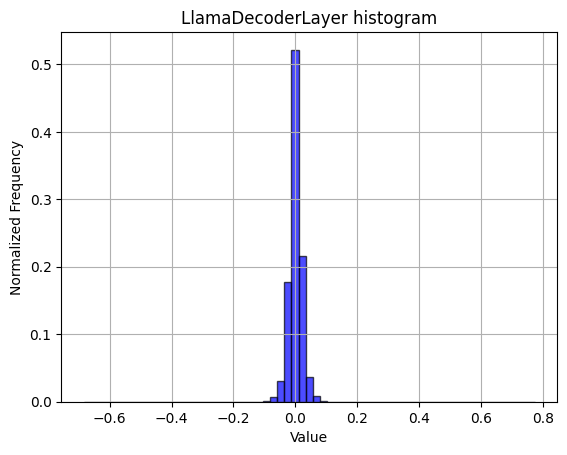

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.78813934e-07 0.00000000e+00 1.19209290e-07 2.38418579e-07
 3.57627869e-07 1.78813934e-07 4.17232513e-07 2.38418579e-07
 6.55651093e-07 7.74860382e-07 9.53674316e-07 8.94069672e-07
 1.25169754e-06 9.53674316e-07 1.43051147e-06 1.72853470e-06
 1.72853470e-06 3.63588333e-06 3.57627869e-06 6.85453415e-06
 1.31130219e-05 3.74317169e-05 1.86920166e-04 1.04027987e-03
 5.25027514e-03 2.31182575e-02 8.22829604e-02 2.27739334e-01
 3.56127441e-01 2.07808197e-01 7.07852244e-02 1.99357271e-02
 4.59325314e-03 8.33153725e-04 1.53779984e-04 3.17692757e-05
 1.00731850e-05 6.85453415e-06 4.17232513e-06 3.09944153e-06
 2.80141830e-06 2.02655792e-06 1.49011612e-06 8.34465027e-07
 8.94069672e-07 7.74860382e-07 7.74860382e-07 5.96046448e-07
 4.76837158e-07 4.17232513e-07 3.57627869e-07 2.38418579e-07
 1.78813934e-07 1.78813934e-07 5.96046448e-08 1.19209290e-07
 1.

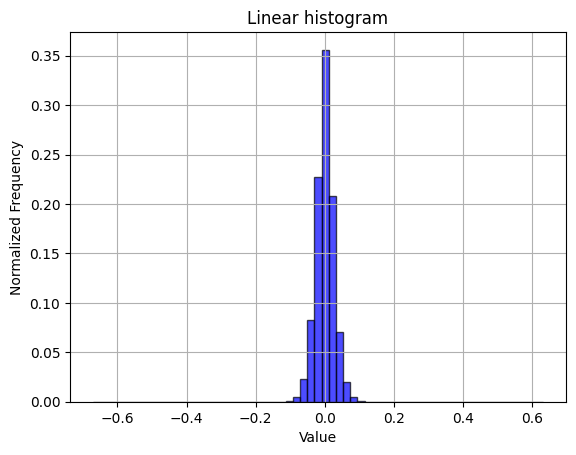

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.19209290e-07 5.96046448e-08 1.78813934e-07 2.98023224e-07
 6.55651093e-07 1.13248825e-06 1.13248825e-06 2.08616257e-06
 3.93390656e-06 5.18560410e-06 7.15255737e-06 1.47819519e-05
 3.22461128e-05 7.99298286e-05 2.20239162e-04 5.95688820e-04
 1.66893005e-03 4.08750772e-03 1.00685954e-02 2.22763419e-02
 4.51071858e-02 8.93808603e-02 1.59110963e-01 2.36323059e-01
 1.97044671e-01 1.16632521e-01 6.20025992e-02 3.09056044e-02
 1.42171979e-02 6.26552105e-03 2.42197514e-03 9.69648361e-04
 3.32117081e-04 1.26242638e-04 4.24981117e-05 2.07424164e-05
 1.09672546e-05 7.56978989e-06 4.76837158e-06 2.80141830e-06
 1.66893005e-06 1.37090683e-06 7.15255737e-07 2.98023224e-07
 1.78813934e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

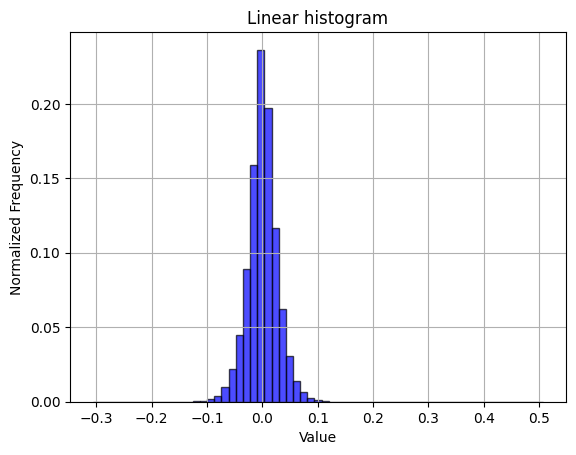

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 5.96046448e-08 0.00000000e+00 0.00000000e+00
 5.96046448e-08 1.78813934e-07 5.96046448e-08 1.19209290e-07
 5.96046448e-08 5.96046448e-08 2.98023224e-07 8.94069672e-07
 2.08616257e-06 4.64916229e-06 1.34706497e-05 3.68356705e-05
 1.02519989e-04 2.59816647e-04 5.75065613e-04 1.36005878e-03
 2.97290087e-03 5.99390268e-03 1.11570358e-02 1.99512243e-02
 3.14634442e-02 4.91326451e-02 6.83705211e-02 8.76122117e-02
 1.04959607e-01 1.16656244e-01 1.16601825e-01 1.04003608e-01
 8.88041854e-02 6.70251846e-02 4.90186810e-02 3.22695971e-02
 1.91195011e-02 1.11361146e-02 6.04164600e-03 2.97200680e-03
 1.38533115e-03 5.75304031e-04 2.60233879e-04 9.73343849e-05
 3.77893448e-05 1.58548355e-05 6.37769699e-06 1.84774399e-06
 6.55651093e-07 2.38418579e-07 1.78813934e-07 5.96046448e-08
 1.19209290e-07 0.00000000e+00 1.19209290e-07 0.00000000e+00
 0.

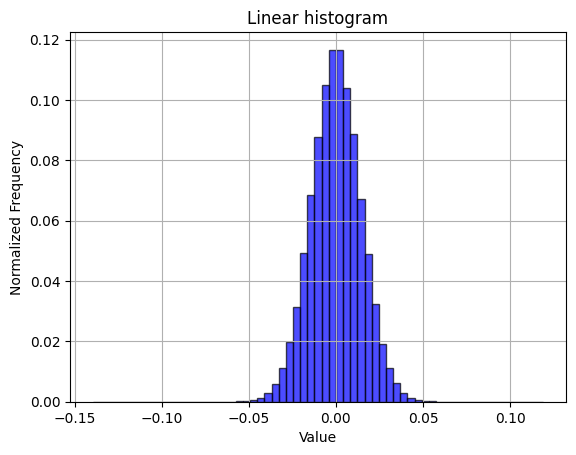

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 0.00000000e+00 1.19209290e-07 5.96046448e-08
 5.96046448e-08 0.00000000e+00 1.19209290e-07 2.98023224e-07
 2.98023224e-07 5.96046448e-07 3.57627869e-07 3.57627869e-07
 6.55651093e-07 5.36441803e-07 7.15255737e-07 5.36441803e-07
 1.96695328e-06 2.14576721e-06 3.15904617e-06 5.48362732e-06
 9.23871994e-06 1.88946724e-05 8.21352005e-05 3.59767675e-03
 7.32652545e-02 3.76292288e-01 4.31286991e-01 1.08533263e-01
 6.68549538e-03 1.57594681e-04 2.22921371e-05 1.16825104e-05
 6.37769699e-06 3.99351120e-06 2.08616257e-06 1.60932541e-06
 1.01327896e-06 6.55651093e-07 4.76837158e-07 4.76837158e-07
 5.96046448e-07 4.17232513e-07 3.57627869e-07 2.38418579e-07
 1.78813934e-07 3.57627869e-07 2.98023224e-07 5.96046448e-08
 0.00000000e+00 5.96046448e-08 1.19209290e-07 0.00000000e+00
 0.

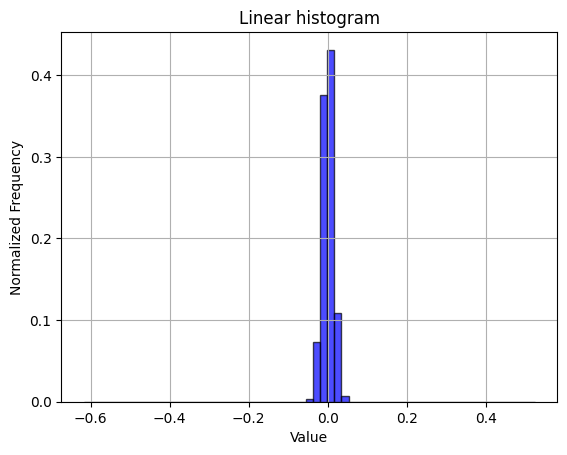

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 0.00000000e+00 1.49011612e-08 1.49011612e-08
 4.47034836e-08 0.00000000e+00 2.98023224e-08 5.96046448e-08
 8.94069672e-08 5.96046448e-08 1.04308128e-07 7.45058060e-08
 1.93715096e-07 2.08616257e-07 2.68220901e-07 2.23517418e-07
 4.32133675e-07 4.02331352e-07 4.47034836e-07 6.70552254e-07
 8.64267349e-07 1.56462193e-06 2.20537186e-06 3.87430191e-06
 8.31484795e-06 2.46018171e-05 1.17659569e-04 6.07028604e-04
 2.88639963e-03 1.21516734e-02 4.96478081e-02 2.30235890e-01
 4.51151147e-01 1.98423579e-01 4.10801917e-02 1.04877204e-02
 2.52942741e-03 4.98414040e-04 9.82582569e-05 2.07722187e-05
 7.33137131e-06 4.0

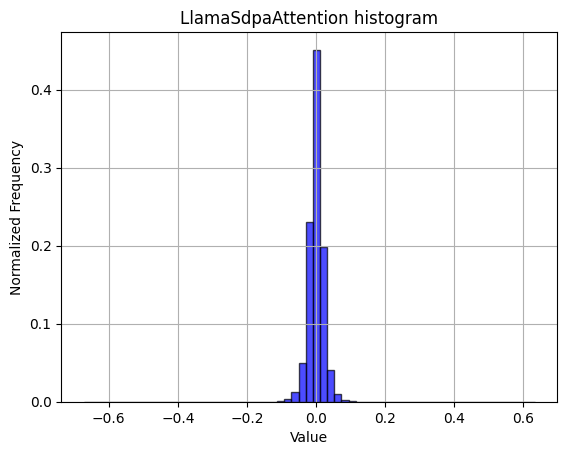

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.65354174e-08
 0.00000000e+00 0.00000000e+00 2.21784725e-08 4.43569449e-08
 4.43569449e-08 8.87138899e-08 1.77427780e-07 6.65354174e-08
 1.55249307e-07 2.66141670e-07 3.77034032e-07 4.43569449e-07
 3.10498615e-07 3.99212505e-07 5.32283339e-07 8.42781954e-07
 1.61902849e-06 3.08280767e-06 8.42781954e-06 2.95639038e-05
 1.73324762e-04 1.51301539e-03 1.17298614e-02 6.14143194e-02
 1.83898593e-01 3.03997395e-01 2.68413211e-01 1.28637003e-01
 3.39259214e-02 5.52831694e-03 6.10285027e-04 8.16833141e-05
 1.80532766e-05 5.83293826e-06 2.43963197e-06 1.13110210e-06
 5.32283339e-07 6.43175702e-07 4.43569449e-07 3.54855560e-07
 2.43963197e-07 8.87138899e-08 2.21784725e-07 8.87138899e-08
 1.33070835e-07 2.21784725e-08 4.43569449e-08 2.21784725e-08
 2.21784725e-08 4.43569449e-08 6.65354174e-08 2.21784725e-08
 2

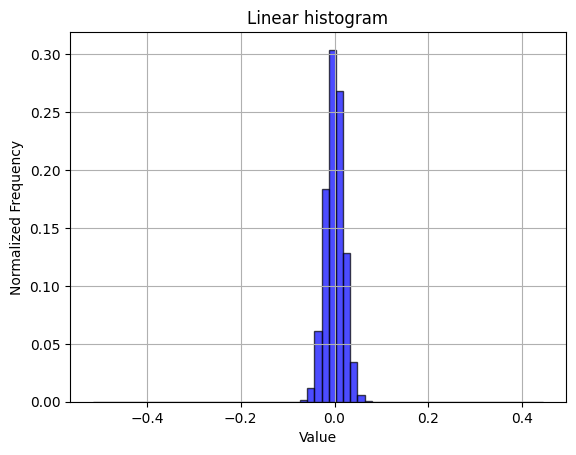

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 0.00000000e+00 2.21784725e-08
 0.00000000e+00 6.65354174e-08 2.21784725e-08 0.00000000e+00
 0.00000000e+00 4.43569449e-08 6.65354174e-08 0.00000000e+00
 4.43569449e-08 8.87138899e-08 2.21784725e-08 1.33070835e-07
 2.21784725e-07 4.43569449e-07 3.54855560e-07 1.06456668e-06
 1.59685002e-06 5.07887020e-06 6.58035278e-05 9.13398210e-04
 8.37794016e-03 4.42479599e-02 1.42646279e-01 2.64812980e-01
 2.84490341e-01 1.75768342e-01 6.31437523e-02 1.36736936e-02
 1.70224212e-03 1.34224115e-04 8.69396121e-06 2.21784725e-06
 7.98425009e-07 5.54461812e-07 4.87926394e-07 2.21784725e-07
 1.77427780e-07 1.33070835e-07 1.33070835e-07 4.43569449e-08
 1.10892362e-07 2.21784725e-08 4.43569449e-08 4.43569449e-08
 0.00000000e+00 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0

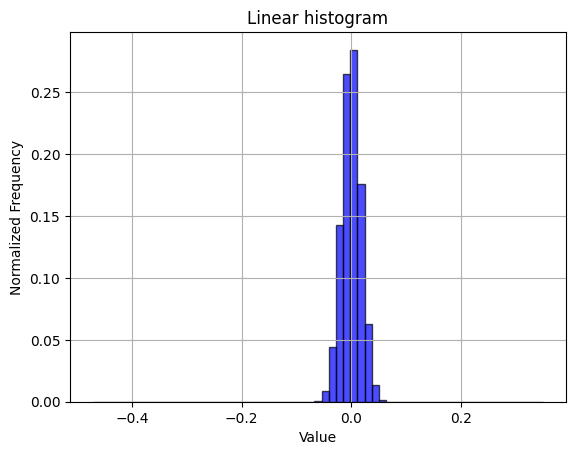

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 2.21784725e-08 0.00000000e+00
 4.43569449e-08 0.00000000e+00 4.43569449e-08 0.00000000e+00
 4.43569449e-08 4.43569449e-08 1.10892362e-07 8.87138899e-08
 1.10892362e-07 1.33070835e-07 2.21784725e-07 4.21390977e-07
 8.64960427e-07 1.77427780e-06 5.25629798e-06 6.09020854e-05
 1.05670219e-02 2.31946280e-01 5.81989887e-01 1.69861949e-01
 5.52530067e-03 3.11829323e-05 4.45787297e-06 1.61902849e-06
 7.76246537e-07 3.77034032e-07 3.10498615e-07 1.99606252e-07
 1.77427780e-07 6.65354174e-08 4.43569449e-08 2.21784725e-08
 2.21784725e-08 6.65354174e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 2

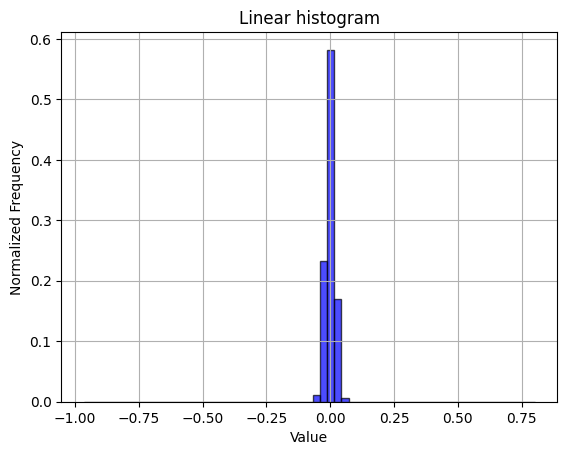

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

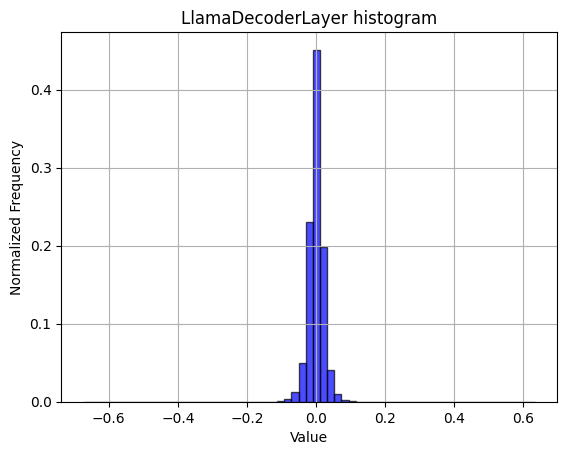

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 5.96046448e-08 5.96046448e-08 1.19209290e-07
 2.38418579e-07 2.98023224e-07 1.78813934e-07 2.38418579e-07
 5.36441803e-07 2.38418579e-07 6.55651093e-07 5.36441803e-07
 7.15255737e-07 1.13248825e-06 1.90734863e-06 2.98023224e-06
 4.23192978e-06 7.45058060e-06 1.79409981e-05 6.95586205e-05
 3.53872776e-04 1.90216303e-03 8.80777836e-03 3.34934592e-02
 1.05958819e-01 2.49616504e-01 3.21653783e-01 1.83634043e-01
 6.84474111e-02 1.99279785e-02 4.87577915e-03 9.71734524e-04
 1.79529190e-04 3.82065773e-05 1.16229057e-05 6.07967377e-06
 4.05311584e-06 2.14576721e-06 1.54972076e-06 1.13248825e-06
 7.74860382e-07 2.98023224e-07 2.38418579e-07 2.98023224e-07
 4.17232513e-07 2.38418579e-07 2.98023224e-07 2.38418579e-07
 5.96046448e-08 0.00000000e+00 5.96046448e-08 5.96046448e-08
 5.96046448e-08 0.00000000e+00 5.96046448e-08 0.00000000e+00
 0.

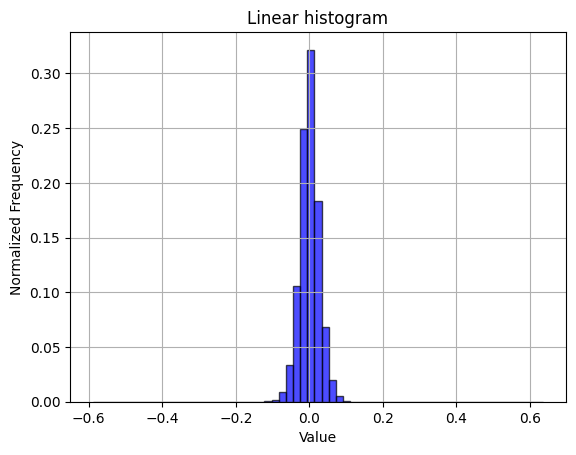

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.19209290e-07 2.38418579e-07 2.38418579e-07 1.78813934e-07
 4.76837158e-07 7.74860382e-07 1.13248825e-06 1.96695328e-06
 3.15904617e-06 4.29153442e-06 5.54323196e-06 7.80820847e-06
 1.31726265e-05 2.36034393e-05 4.67896461e-05 1.21176243e-04
 2.53796577e-04 6.10172749e-04 1.29735470e-03 2.88617611e-03
 5.75351715e-03 1.12079382e-02 2.12664604e-02 3.82428169e-02
 6.57954216e-02 1.05424225e-01 1.54548585e-01 1.84932292e-01
 1.54346585e-01 1.05529964e-01 6.59659505e-02 3.81658673e-02
 2.12617517e-02 1.12652779e-02 5.70493937e-03 2.92044878e-03
 1.30027533e-03 6.06656075e-04 2.54511833e-04 1.17003918e-04
 4.57763672e-05 2.61664391e-05 1.50203705e-05 8.16583633e-06
 4.41074371e-06 3.75509262e-06 2.32458115e-06 1.43051147e-06
 1.37090683e-06 1.07288361e-06 4.76837158e-07 1.78813934e-07
 2.98023224e-07 2.38418579e-07 1.19209290e-07 1.19209290e-07
 1.

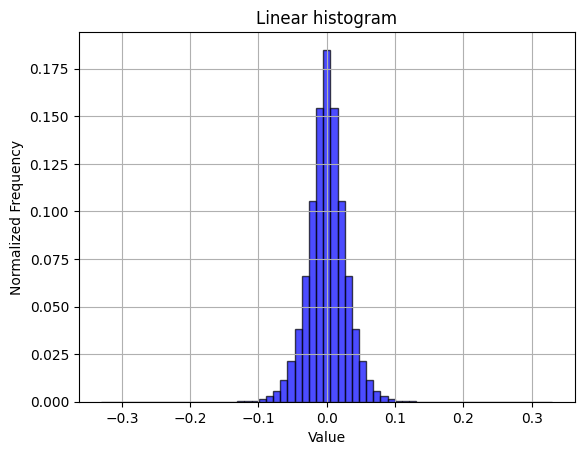

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 0.00000000e+00 5.96046448e-08 1.19209290e-07
 1.78813934e-07 1.19209290e-07 5.96046448e-07 1.54972076e-06
 7.21216202e-06 4.20212746e-05 2.08199024e-04 8.53002071e-04
 3.23891640e-03 1.02220774e-02 2.71583796e-02 5.71393967e-02
 1.04272306e-01 1.54693007e-01 1.91618860e-01 1.76742852e-01
 1.29790843e-01 7.89250135e-02 4.01769280e-02 1.67679787e-02
 5.87993860e-03 1.72710419e-03 4.24742699e-04 8.63075256e-05
 1.75237656e-05 3.69548798e-06 4.17232513e-07 1.19209290e-07
 1.19209290e-07 5.96046448e-08 5.96046448e-08 0.00000000e+00
 5.96046448e-08 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.

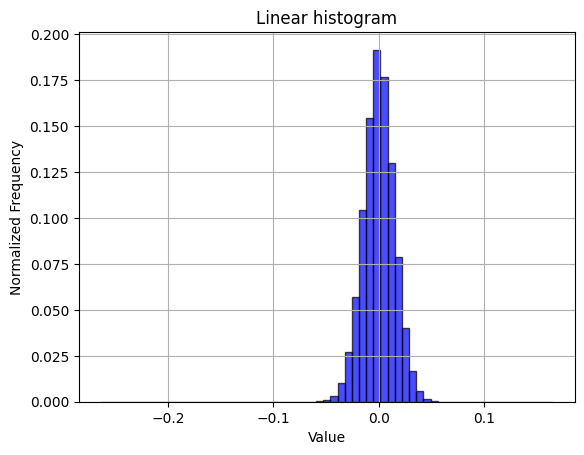

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.96046448e-08 1.19209290e-07 0.00000000e+00
 1.78813934e-07 0.00000000e+00 1.78813934e-07 2.38418579e-07
 1.78813934e-07 1.19209290e-07 2.98023224e-07 3.57627869e-07
 2.38418579e-07 2.38418579e-07 4.17232513e-07 6.55651093e-07
 5.36441803e-07 1.19209290e-06 1.07288361e-06 1.66893005e-06
 1.96695328e-06 2.68220901e-06 4.47034836e-06 6.79492950e-06
 1.19209290e-05 2.82526016e-05 5.61535358e-04 1.17713213e-02
 1.02360129e-01 3.36805940e-01 3.81886065e-01 1.44840539e-01
 2.04777122e-02 1.14995241e-03 4.67300415e-05 1.35302544e-05
 6.79492950e-06 3.87430191e-06 2.26497650e-06 2.08616257e-06
 1.49011612e-06 1.13248825e-06 1.07288361e-06 4.76837158e-07
 4.17232513e-07 4.76837158e-07 2.98023224e-07 5.36441803e-07
 1.78813934e-07 2.98023224e-07 1.19209290e-07 1.78813934e-07
 1.19209290e-07 1.78813934e-07 5.96046448e-08 2.38418579e-07
 1.

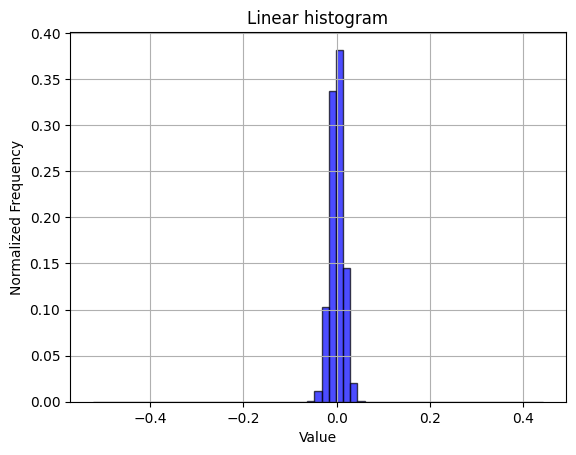

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 0.00000000e+00 0.00000000e+00 1.49011612e-08
 1.49011612e-08 1.49011612e-08 1.49011612e-08 4.47034836e-08
 8.94069672e-08 1.04308128e-07 5.96046448e-08 1.04308128e-07
 1.93715096e-07 1.34110451e-07 2.38418579e-07 2.68220901e-07
 3.57627869e-07 5.06639481e-07 1.02818012e-06 1.83284283e-06
 3.29315662e-06 5.60283661e-06 1.34110451e-05 5.17815351e-05
 2.44408846e-04 1.16795301e-03 4.92730737e-03 1.80389881e-02
 7.25998878e-02 2.72568688e-01 4.07185316e-01 1.68410257e-01
 4.03883159e-02 1.07566416e-02 2.82552838e-03 6.29648566e-04
 1.28835440e-04 2.88635492e-05 9.55164433e-06 4.21702862e-06
 2.29477882e-06 1.3

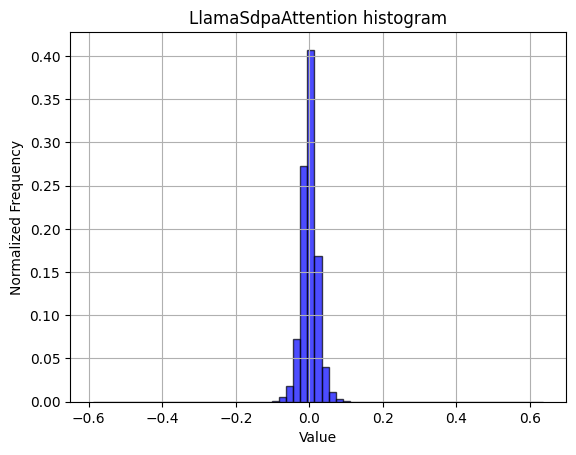

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 2.21784725e-08 4.43569449e-08
 0.00000000e+00 0.00000000e+00 2.21784725e-08 1.10892362e-07
 1.33070835e-07 1.10892362e-07 1.55249307e-07 1.77427780e-07
 3.54855560e-07 2.66141670e-07 6.43175702e-07 6.43175702e-07
 1.30852988e-06 2.79448753e-06 6.89750494e-06 1.68112821e-05
 5.61115354e-05 2.43053880e-04 1.21575733e-03 6.40691713e-03
 2.62257554e-02 7.91161559e-02 1.71180925e-01 2.45471400e-01
 2.34027175e-01 1.48238692e-01 6.32423135e-02 1.90969955e-02
 4.39650513e-03 8.23176184e-04 1.65251798e-04 4.00321428e-05
 1.25086585e-05 4.74619311e-06 2.55052433e-06 9.75852789e-07
 9.09317371e-07 3.10498615e-07 3.32677087e-07 1.99606252e-07
 1.77427780e-07 1.10892362e-07 1.33070835e-07 2.21784725e-08
 1.77427780e-07 2.21784725e-08 2.21784725e-08 0.00000000e+00
 0

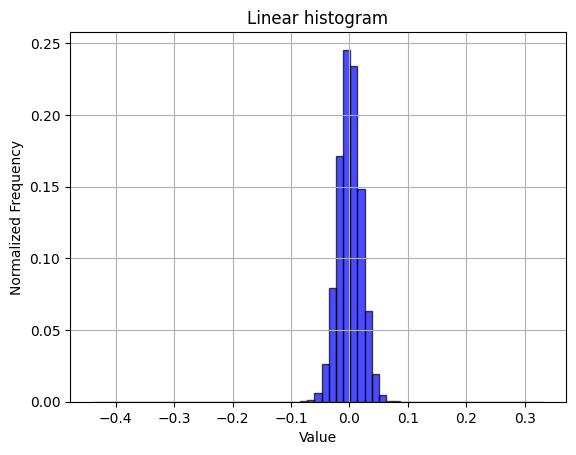

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.65354174e-08 8.87138899e-08
 6.65354174e-08 8.87138899e-08 1.77427780e-07 2.43963197e-07
 5.32283339e-07 4.65747922e-07 1.24199446e-06 4.30262366e-06
 4.56876533e-05 8.17875529e-04 9.24394297e-03 5.60115770e-02
 1.81216506e-01 3.12833897e-01 2.76255852e-01 1.27483190e-01
 3.15735839e-02 4.18767264e-03 3.00407410e-04 1.70996023e-05
 2.66141670e-06 1.17545904e-06 5.76640284e-07 3.32677087e-07
 1.33070835e-07 1.99606252e-07 2.21784725e-08 4.43569449e-08
 8.87138899e-08 0.00000000e+00 0.00000000e+00 2.21784725e-08
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 2.21784725e-08 2.21784725e-08
 0

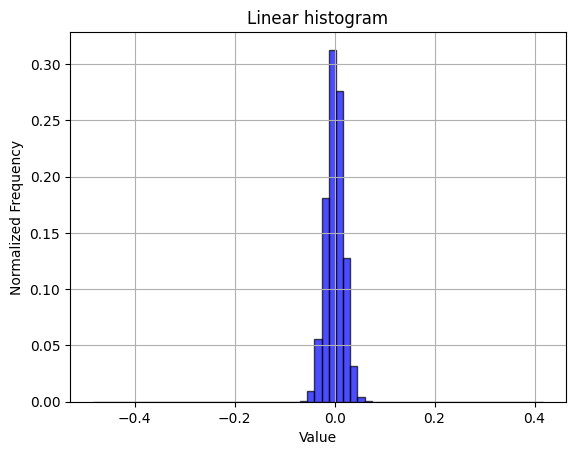

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 2.21784725e-08
 2.21784725e-08 2.21784725e-08 2.21784725e-08 4.43569449e-08
 4.43569449e-08 0.00000000e+00 8.87138899e-08 1.10892362e-07
 0.00000000e+00 6.65354174e-08 6.65354174e-08 8.87138899e-08
 1.55249307e-07 2.21784725e-07 3.99212505e-07 3.32677087e-07
 9.53674316e-07 1.37506529e-06 3.45984171e-06 1.66560328e-05
 7.20112823e-04 2.08671925e-02 1.74243483e-01 4.31347780e-01
 3.06206748e-01 6.26697097e-02 3.82756078e-03 8.14393509e-05
 5.56679659e-06 2.68359517e-06 1.39724377e-06 7.31889592e-07
 3.54855560e-07 2.88320142e-07 1.33070835e-07 1.55249307e-07
 1.10892362e-07 6.65354174e-08 2.21784725e-08 2.21784725e-08
 4.43569449e-08 0.00000000e+00 2.21784725e-08 2.21784725e-08
 2.21784725e-08 2.21784725e-08 0.00000000e+00 0.00000000e+00
 2

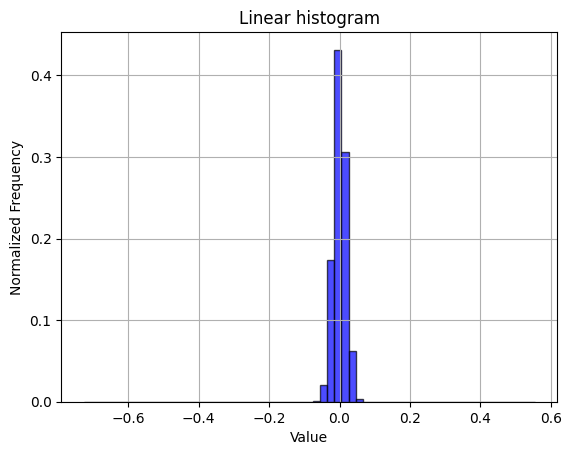

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

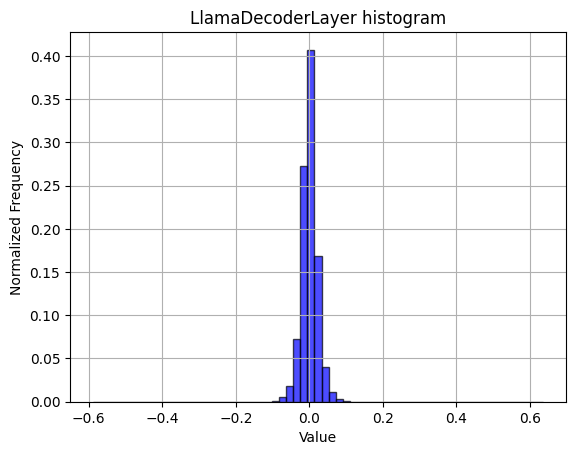

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.78813934e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.19209290e-07 1.19209290e-07
 2.38418579e-07 1.78813934e-07 5.96046448e-08 2.98023224e-07
 3.57627869e-07 3.57627869e-07 5.96046448e-07 6.55651093e-07
 1.07288361e-06 1.07288361e-06 1.84774399e-06 4.35113907e-06
 5.84125519e-06 1.32322311e-05 3.14712524e-05 1.03056431e-04
 3.85344028e-04 1.53738260e-03 6.58845901e-03 2.44225264e-02
 8.11673999e-02 2.23403752e-01 3.46939743e-01 2.10403740e-01
 7.45970011e-02 2.25780606e-02 5.93024492e-03 1.37728453e-03
 3.49760056e-04 9.32812691e-05 3.11136246e-05 1.26957893e-05
 5.54323196e-06 3.75509262e-06 2.26497650e-06 1.43051147e-06
 9.53674316e-07 5.96046448e-07 3.57627869e-07 2.98023224e-07
 4.17232513e-07 3.57627869e-07 1.19209290e-07 1.19209290e-07
 5.96046448e-08 2.98023224e-07 0.00000000e+00 5.96046448e-08
 1.19209290e-07 1.19209290e-07 5.96046448e-08 0.00000000e+00
 1.

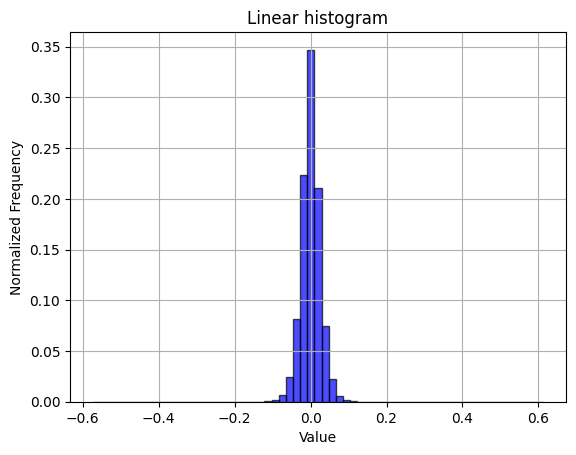

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.19209290e-07 5.96046448e-08 3.57627869e-07 2.98023224e-07
 4.17232513e-07 5.96046448e-07 5.36441803e-07 1.31130219e-06
 2.26497650e-06 2.98023224e-06 5.72204590e-06 8.76188278e-06
 1.57356262e-05 2.77757645e-05 4.55379486e-05 9.43541527e-05
 1.86562538e-04 3.40461731e-04 6.88791275e-04 1.30176544e-03
 2.44814157e-03 4.89932299e-03 8.69065523e-03 1.55353546e-02
 2.69330144e-02 4.59300876e-02 7.50242472e-02 1.16778612e-01
 1.60865009e-01 1.72452331e-01 1.39001310e-01 9.15504694e-02
 5.78125119e-02 3.44365835e-02 2.01116204e-02 1.14534497e-02
 6.23047352e-03 3.48389149e-03 1.73449516e-03 9.37044621e-04
 4.61280346e-04 2.35795975e-04 1.26123428e-04 6.31809235e-05
 3.39150429e-05 1.88350677e-05 1.07884407e-05 7.03334808e-06
 3.33786011e-06 2.38418579e-06 1.43051147e-06 1.07288361e-06
 3.57627869e-07 4.76837158e-07 4.76837158e-07 2.38418579e-07
 5.96046448e-08 1.19209290e-07 0.00000000e+00 0.00000000e+00
 0.

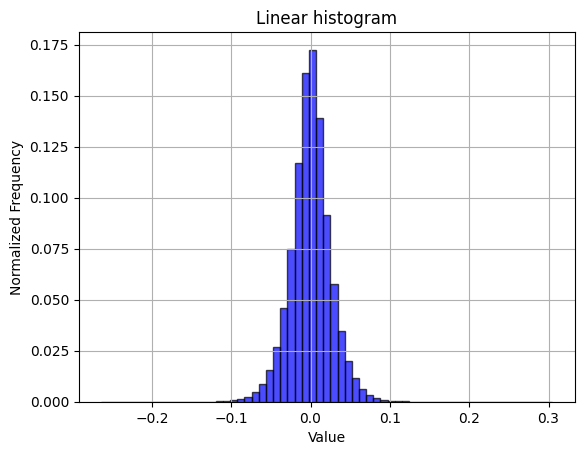

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 5.96046448e-08 0.00000000e+00 5.96046448e-08
 5.96046448e-08 1.78813934e-07 1.19209290e-07 2.98023224e-07
 1.19209290e-07 2.98023224e-07 5.36441803e-07 1.84774399e-06
 1.37686729e-05 1.09851360e-04 7.49707222e-04 4.36049700e-03
 1.88645720e-02 6.28618002e-02 1.52175188e-01 2.47428477e-01
 2.54000247e-01 1.62409544e-01 6.94825053e-02 2.12358832e-02
 5.22691011e-03 9.26733017e-04 1.31547451e-04 1.57952309e-05
 2.08616257e-06 4.17232513e-07 0.00000000e+00 2.38418579e-07
 1.19209290e-07 5.96046448e-08 1.19209290e-07 5.96046448e-08
 5.96046448e-08 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

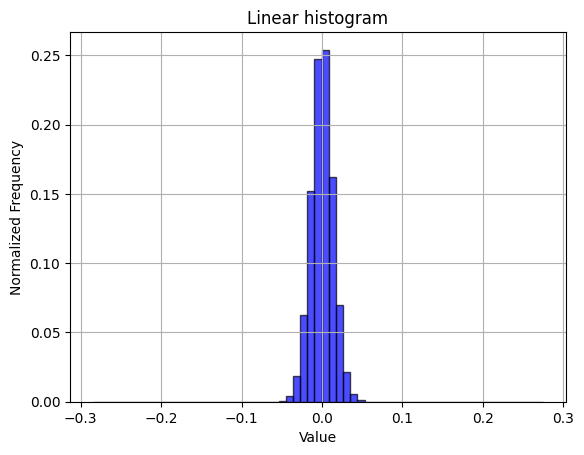

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.19209290e-07 0.00000000e+00 0.00000000e+00 5.96046448e-08
 5.96046448e-08 1.19209290e-07 5.96046448e-08 5.96046448e-08
 5.96046448e-08 5.96046448e-08 5.96046448e-08 1.19209290e-07
 5.96046448e-08 2.38418579e-07 1.78813934e-07 3.57627869e-07
 2.38418579e-07 2.98023224e-07 2.38418579e-07 1.78813934e-07
 7.15255737e-07 7.74860382e-07 7.74860382e-07 1.60932541e-06
 1.72853470e-06 3.15904617e-06 4.05311584e-06 6.67572021e-06
 1.00135803e-05 3.61800194e-05 1.21039152e-03 3.36777568e-02
 2.78004348e-01 4.99138415e-01 1.73237681e-01 1.42400861e-02
 3.71992588e-04 2.23517418e-05 1.10864639e-05 5.42402267e-06
 3.39746475e-06 1.78813934e-06 1.84774399e-06 1.07288361e-06
 7.74860382e-07 6.55651093e-07 5.36441803e-07 4.76837158e-07
 3.57627869e-07 2.38418579e-07 1.78813934e-07 1.19209290e-07
 0.00000000e+00 2.38418579e-07 0.00000000e+00 5.96046448e-08
 0.00000000e+00 5.96046448e-08 5.96046448e-08 1.19209290e-07
 5.

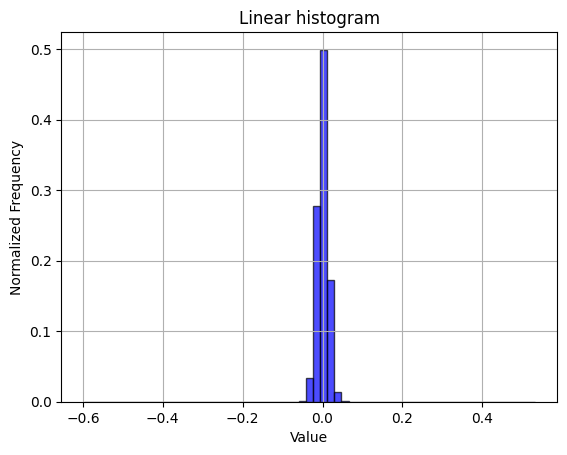

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[2.98023224e-08 4.47034836e-08 0.00000000e+00 1.49011612e-08
 2.98023224e-08 1.49011612e-08 2.98023224e-08 4.47034836e-08
 4.47034836e-08 7.45058060e-08 7.45058060e-08 2.98023224e-08
 1.34110451e-07 1.34110451e-07 2.08616257e-07 1.93715096e-07
 2.53319740e-07 3.87430191e-07 5.66244125e-07 8.49366188e-07
 1.90734863e-06 3.59117985e-06 7.68899918e-06 2.34693289e-05
 8.12560320e-05 3.10972333e-04 1.30103528e-03 5.37548959e-03
 2.02235579e-02 8.74850005e-02 3.40055972e-01 3.91504839e-01
 1.18786722e-01 2.56406814e-02 6.88423216e-03 1.75592303e-03
 4.06935811e-04 1.00150704e-04 2.88486481e-05 9.53674316e-06
 3.60608101e-06 1.8

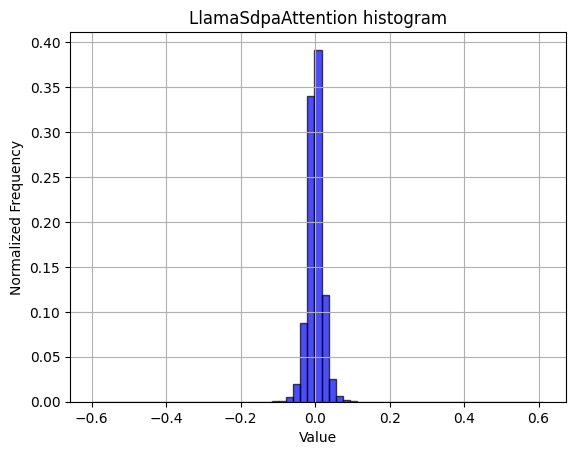

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 2.21784725e-08 2.21784725e-08 0.00000000e+00
 2.21784725e-08 1.10892362e-07 2.21784725e-08 4.43569449e-08
 1.33070835e-07 2.21784725e-08 1.77427780e-07 1.77427780e-07
 1.33070835e-07 1.99606252e-07 2.66141670e-07 3.32677087e-07
 3.77034032e-07 9.09317371e-07 1.15328057e-06 2.61705975e-06
 7.49632370e-06 2.36866086e-05 9.23068024e-05 4.17110532e-04
 2.08087300e-03 9.85717773e-03 3.69492021e-02 1.01707858e-01
 1.96047384e-01 2.52777055e-01 2.14816005e-01 1.20448445e-01
 4.77046079e-02 1.32481553e-02 3.03700913e-03 6.12658124e-04
 1.20739604e-04 2.96082608e-05 8.78267510e-06 2.72795211e-06
 1.41942224e-06 9.98031261e-07 4.87926394e-07 3.10498615e-07
 2.43963197e-07 1.55249307e-07 1.10892362e-07 8.87138899e-08
 1.99606252e-07 2.21784725e-08 4.43569449e-08 8.87138899e-08
 0.00000000e+00 2.21784725e-08 4.43569449e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 2

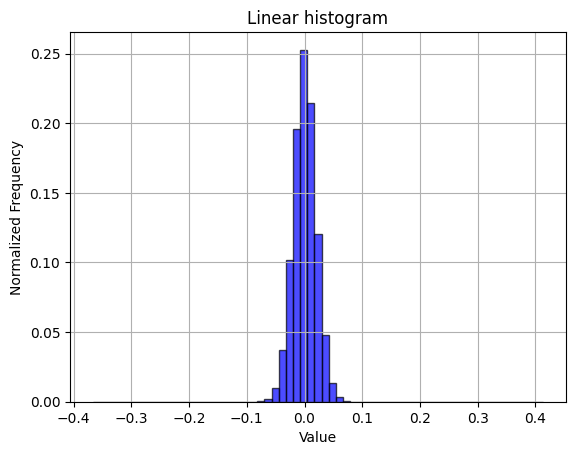

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 2.21784725e-08
 2.21784725e-08 0.00000000e+00 0.00000000e+00 4.43569449e-08
 2.21784725e-08 4.43569449e-08 4.43569449e-08 1.10892362e-07
 1.99606252e-07 3.10498615e-07 6.87532647e-07 6.65354174e-07
 1.70774238e-06 8.31692718e-06 1.33292620e-04 2.10112195e-03
 1.85465702e-02 9.12712008e-02 2.35664612e-01 3.22036854e-01
 2.27238256e-01 8.41878403e-02 1.68354788e-02 1.84194432e-03
 1.18632649e-04 7.56285911e-06 1.97388405e-06 9.53674316e-07
 3.99212505e-07 3.10498615e-07 8.87138899e-08 1.99606252e-07
 1.77427780e-07 2.21784725e-08 1.10892362e-07 6.65354174e-08
 2.21784725e-08 2.21784725e-08 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

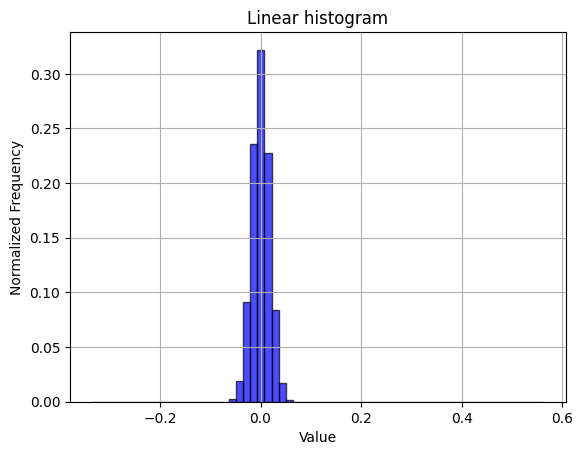

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 2.21784725e-08 2.21784725e-08 0.00000000e+00 4.43569449e-08
 4.43569449e-08 0.00000000e+00 0.00000000e+00 2.21784725e-08
 2.21784725e-08 4.43569449e-08 2.21784725e-08 2.21784725e-08
 8.87138899e-08 1.33070835e-07 1.33070835e-07 3.32677087e-07
 5.54461812e-07 8.42781954e-07 2.17349030e-06 5.72204590e-06
 3.70557918e-04 2.78820215e-02 3.13644764e-01 5.24007198e-01
 1.29268779e-01 4.77899507e-03 3.08280767e-05 3.52637712e-06
 1.08674515e-06 6.43175702e-07 3.10498615e-07 3.10498615e-07
 1.33070835e-07 2.21784725e-07 6.65354174e-08 4.43569449e-08
 4.43569449e-08 4.43569449e-08 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.43569449e-08
 2.21784725e-08 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0

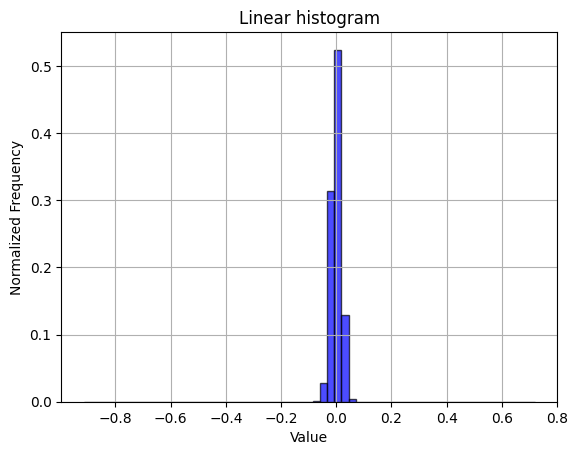

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

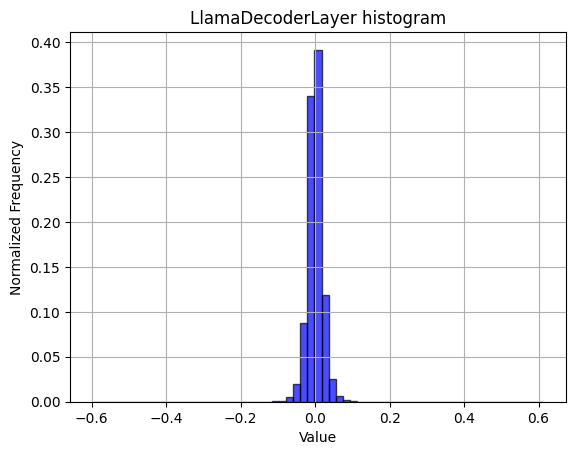

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.96046448e-08 1.78813934e-07
 5.96046448e-08 1.19209290e-07 1.19209290e-07 2.98023224e-07
 4.76837158e-07 3.57627869e-07 1.01327896e-06 1.13248825e-06
 2.20537186e-06 4.41074371e-06 1.06096268e-05 3.05771828e-05
 1.06573105e-04 4.33027744e-04 2.00176239e-03 9.29605961e-03
 3.87939215e-02 1.38911784e-01 3.43138695e-01 3.11574876e-01
 1.15599930e-01 3.07881236e-02 7.27647543e-03 1.55556202e-03
 3.42786312e-04 8.47578049e-05 2.50339508e-05 8.94069672e-06
 5.06639481e-06 1.90734863e-06 7.74860382e-07 7.15255737e-07
 2.38418579e-07 2.98023224e-07 2.38418579e-07 2.38418579e-07
 1.19209290e-07 5.96046448e-08 1.19209290e-07 0.00000000e+00
 1.19209290e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

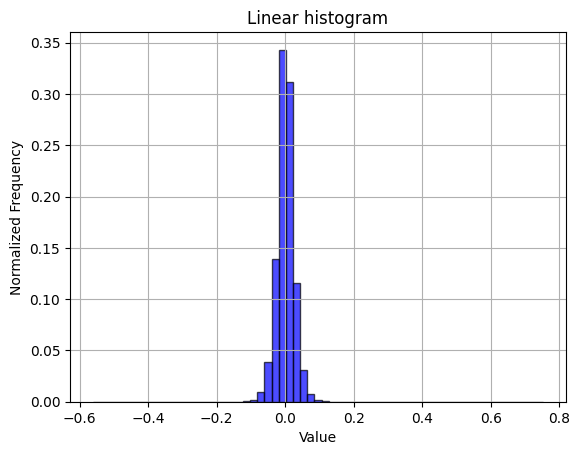

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[2.98023224e-07 1.19209290e-07 2.98023224e-07 1.19209290e-07
 2.38418579e-07 8.34465027e-07 1.37090683e-06 1.31130219e-06
 2.80141830e-06 4.58955765e-06 7.51018524e-06 1.22189522e-05
 2.09808350e-05 3.78489494e-05 8.82148743e-05 1.64091587e-04
 3.56912613e-04 6.89208508e-04 1.33275986e-03 2.76935101e-03
 5.05572557e-03 9.74863768e-03 1.68328285e-02 2.99943686e-02
 5.11155128e-02 8.19762349e-02 1.27983391e-01 1.67725801e-01
 1.68965697e-01 1.29408956e-01 8.49698782e-02 5.16061783e-02
 3.07822227e-02 1.76903009e-02 9.74673033e-03 5.20122051e-03
 2.88641453e-03 1.40225887e-03 7.33435154e-04 3.31878662e-04
 1.71482563e-04 8.38637352e-05 4.19616699e-05 2.51531601e-05
 1.17421150e-05 6.25848770e-06 3.81469727e-06 2.80141830e-06
 1.72853470e-06 5.96046448e-07 7.15255737e-07 2.98023224e-07
 2.38418579e-07 1.78813934e-07 1.19209290e-07 2.38418579e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

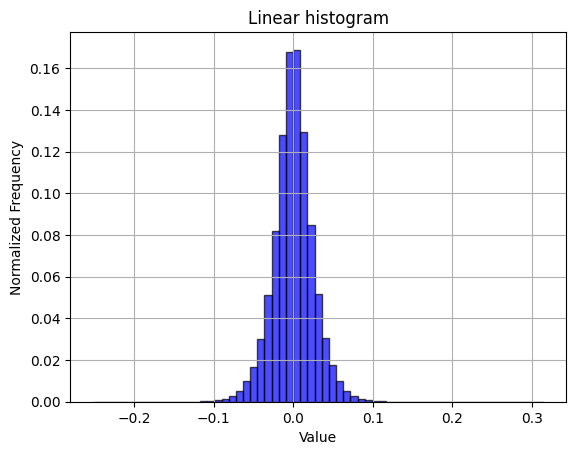

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.19209290e-07 0.00000000e+00 5.96046448e-08 5.96046448e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.19209290e-07
 0.00000000e+00 5.96046448e-08 1.78813934e-07 1.19209290e-07
 1.19209290e-07 1.78813934e-07 1.19209290e-07 5.96046448e-08
 2.38418579e-07 1.78813934e-07 1.78813934e-07 2.38418579e-07
 1.01327896e-06 5.54323196e-06 2.43782997e-05 1.19507313e-04
 5.64634800e-04 2.17604637e-03 7.33464956e-03 2.16438770e-02
 5.32270074e-02 1.07315838e-01 1.72973275e-01 2.12388277e-01
 1.88219845e-01 1.25472367e-01 6.59948587e-02 2.82005668e-02
 1.01907253e-02 3.09044123e-03 8.13007355e-04 1.91450119e-04
 3.94582748e-05 7.39097595e-06 1.49011612e-06 3.57627869e-07
 3.57627869e-07 1.78813934e-07 2.38418579e-07 1.19209290e-07
 2.38418579e-07 1.19209290e-07 1.19209290e-07 5.96046448e-08
 5.96046448e-08 1.19209290e-07 5.96046448e-08 5.96046448e-08
 5.96046448e-08 5.96046448e-08 0.00000000e+00 0.00000000e+00
 5.

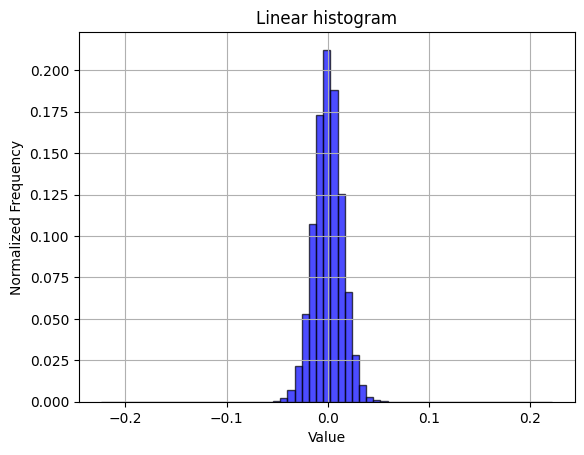

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 0.00000000e+00 5.96046448e-08 5.96046448e-08
 1.19209290e-07 5.96046448e-08 1.78813934e-07 2.98023224e-07
 1.78813934e-07 1.19209290e-07 3.57627869e-07 0.00000000e+00
 4.17232513e-07 6.55651093e-07 4.17232513e-07 1.13248825e-06
 1.13248825e-06 1.54972076e-06 1.31130219e-06 2.02655792e-06
 4.05311584e-06 3.93390656e-06 7.27176666e-06 1.34110451e-05
 1.23977661e-04 2.99847126e-03 4.05395627e-02 2.29945719e-01
 4.40937757e-01 2.38455176e-01 4.34896946e-02 3.29566002e-03
 1.34229660e-04 1.44839287e-05 7.80820847e-06 4.17232513e-06
 3.21865082e-06 2.74181366e-06 1.96695328e-06 1.72853470e-06
 6.55651093e-07 7.15255737e-07 3.57627869e-07 4.17232513e-07
 3.57627869e-07 5.96046448e-08 5.96046448e-07 4.17232513e-07
 1.78813934e-07 2.38418579e-07 1.19209290e-07 5.96046448e-08
 2.

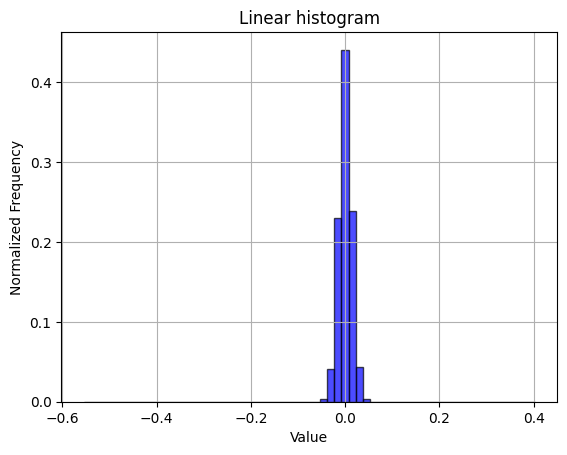

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[2.98023224e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.98023224e-08 5.96046448e-08
 2.98023224e-08 5.96046448e-08 7.45058060e-08 1.63912773e-07
 1.93715096e-07 1.63912773e-07 3.12924385e-07 5.81145287e-07
 8.64267349e-07 2.19047070e-06 4.69386578e-06 1.31130219e-05
 4.76986170e-05 2.11820006e-04 1.02947652e-03 4.80805337e-03
 2.08163112e-02 1.06134370e-01 4.09198135e-01 3.55416864e-01
 8.12783986e-02 1.62459314e-02 3.77641618e-03 7.93740153e-04
 1.63868070e-04 3.75658274e-05 1.08033419e-05 3.81469727e-06
 1.87754631e-06 7.74860382e-07 3.72529030e-07 2.83122063e-07
 2.23517418e-07 1.4

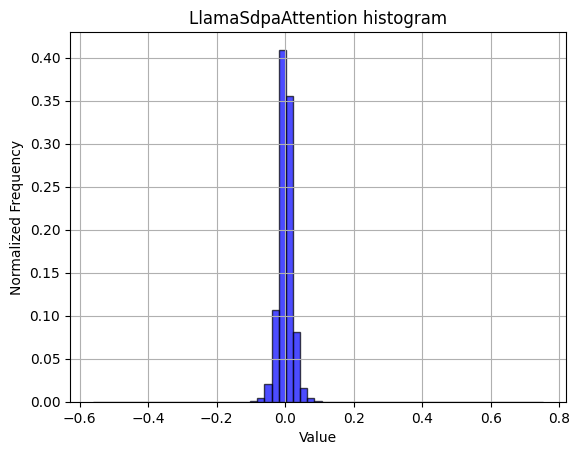

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.43569449e-08
 6.65354174e-08 0.00000000e+00 8.87138899e-08 4.43569449e-08
 2.21784725e-08 6.65354174e-08 4.43569449e-08 8.87138899e-08
 1.10892362e-07 1.77427780e-07 1.10892362e-07 4.87926394e-07
 4.87926394e-07 8.87138899e-07 1.81863474e-06 4.25826672e-06
 1.13997349e-05 4.21390977e-05 1.99672788e-04 1.17800957e-03
 6.86834025e-03 3.20179740e-02 1.02831020e-01 2.18562703e-01
 2.82458705e-01 2.16570743e-01 1.00781175e-01 3.03422351e-02
 6.72735170e-03 1.15119579e-03 1.87186308e-04 4.07640324e-05
 1.14440918e-05 4.01430352e-06 2.28438266e-06 8.87138899e-07
 5.76640284e-07 3.77034032e-07 2.21784725e-07 1.77427780e-07
 1.10892362e-07 8.87138899e-08 1.77427780e-07 6.65354174e-08
 2.21784725e-08 0.00000000e+00 2.21784725e-08 2.21784725e-08
 0.00000000e+00 2.21784725e-08 0.00000000e+00 0.00000000e+00
 2

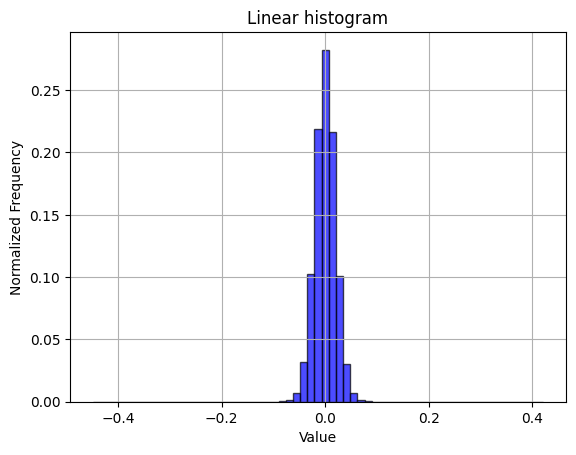

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 2.21784725e-08 0.00000000e+00 2.21784725e-08
 2.21784725e-08 2.21784725e-08 2.21784725e-08 0.00000000e+00
 0.00000000e+00 2.21784725e-08 4.43569449e-08 4.43569449e-08
 0.00000000e+00 4.43569449e-08 8.87138899e-08 1.10892362e-07
 4.43569449e-08 2.21784725e-07 3.77034032e-07 4.43569449e-07
 7.54068064e-07 1.02020973e-06 3.19370004e-06 1.98275544e-05
 1.95902447e-04 1.48810897e-03 8.79647011e-03 3.46346789e-02
 9.83752983e-02 1.87148338e-01 2.46549784e-01 2.18643011e-01
 1.30479147e-01 5.45160161e-02 1.54251720e-02 3.21561237e-03
 4.49291495e-04 4.63530075e-05 6.12125840e-06 1.35288682e-06
 1.17545904e-06 6.20997229e-07 3.77034032e-07 2.43963197e-07
 2.66141670e-07 4.43569449e-08 4.43569449e-08 6.65354174e-08
 2.21784725e-08 2.21784725e-08 2.21784725e-08 0.00000000e+00
 0.00000000e+00 2.21784725e-08 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

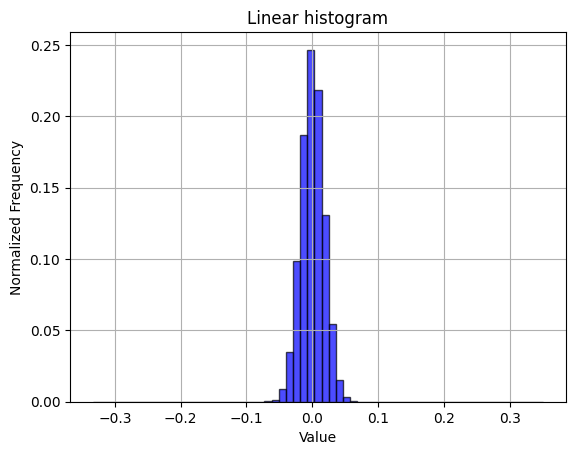

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 4.43569449e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 2.21784725e-08 2.21784725e-08 4.43569449e-08 4.43569449e-08
 1.10892362e-07 4.43569449e-08 1.55249307e-07 2.43963197e-07
 4.43569449e-07 8.42781954e-07 1.44160071e-06 3.52637712e-06
 1.19541967e-05 1.34751963e-03 6.34987853e-02 4.35049035e-01
 4.35168311e-01 6.35480659e-02 1.34969312e-03 1.26860863e-05
 3.21587851e-06 1.55249307e-06 8.64960427e-07 3.32677087e-07
 3.10498615e-07 1.55249307e-07 8.87138899e-08 2.21784725e-08
 1.10892362e-07 6.65354174e-08 4.43569449e-08 0.00000000e+00
 6.65354174e-08 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0

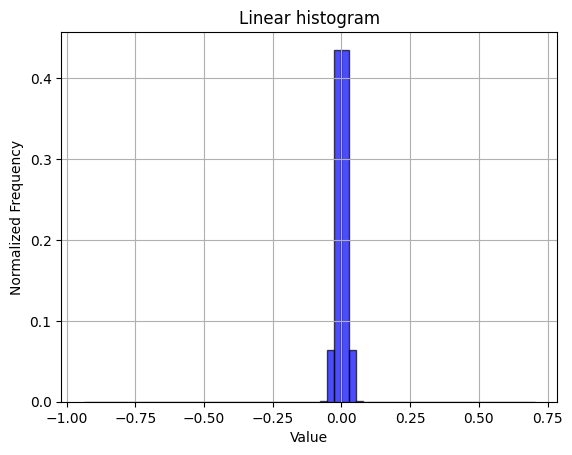

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

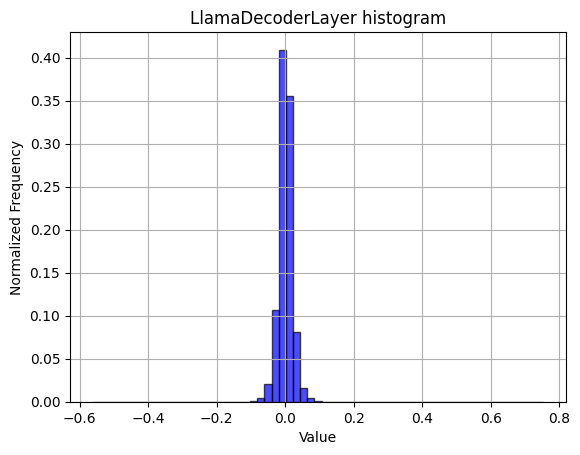

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.96046448e-08 5.96046448e-08
 0.00000000e+00 2.38418579e-07 5.96046448e-08 1.19209290e-07
 4.17232513e-07 2.98023224e-07 2.98023224e-07 1.78813934e-07
 2.38418579e-07 6.55651093e-07 9.53674316e-07 1.37090683e-06
 3.09944153e-06 3.63588333e-06 7.62939453e-06 1.49607658e-05
 3.51667404e-05 6.96778297e-05 1.80721283e-04 4.85181808e-04
 1.42490864e-03 4.82732058e-03 1.52277350e-02 4.64389324e-02
 1.20510340e-01 2.46254385e-01 2.87381887e-01 1.70382619e-01
 7.06242323e-02 2.46657133e-02 7.89564848e-03 2.34526396e-03
 7.40885735e-04 2.76565552e-04 1.04904175e-04 4.86373901e-05
 2.07424164e-05 9.65595245e-06 5.54323196e-06 3.27825546e-06
 1.96695328e-06 4.17232513e-07 7.15255737e-07 2.38418579e-07
 4.76837158e-07 1.78813934e-07 6.55651093e-07 1.78813934e-07
 2.38418579e-07 5.96046448e-08 1.19209290e-07 1.19209290e-07
 0.

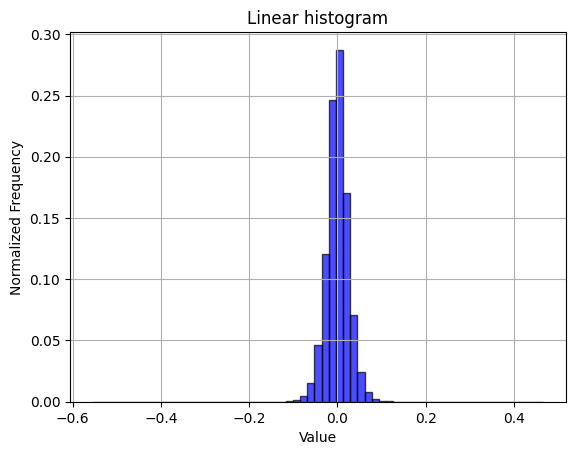

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.19209290e-07 2.38418579e-07 1.19209290e-07 1.78813934e-07
 2.38418579e-07 5.96046448e-07 8.94069672e-07 1.25169754e-06
 1.84774399e-06 3.15904617e-06 4.47034836e-06 8.88109207e-06
 1.31726265e-05 1.85966492e-05 4.16040421e-05 8.94665718e-05
 1.85668468e-04 3.97741795e-04 7.90774822e-04 1.73521042e-03
 3.38405371e-03 6.96861744e-03 1.32025480e-02 2.33730674e-02
 4.21692729e-02 7.21766949e-02 1.14897609e-01 1.61626041e-01
 1.79166079e-01 1.46945238e-01 9.73279476e-02 5.97121119e-02
 3.50318551e-02 1.96110606e-02 1.04094744e-02 5.54686785e-03
 2.63160467e-03 1.30391121e-03 6.48558140e-04 2.84612179e-04
 1.45912170e-04 6.06775284e-05 3.59416008e-05 1.78813934e-05
 1.03712082e-05 5.48362732e-06 3.87430191e-06 2.80141830e-06
 1.84774399e-06 8.34465027e-07 1.01327896e-06 2.38418579e-07
 2.98023224e-07 4.76837158e-07 3.57627869e-07 2.38418579e-07
 5.

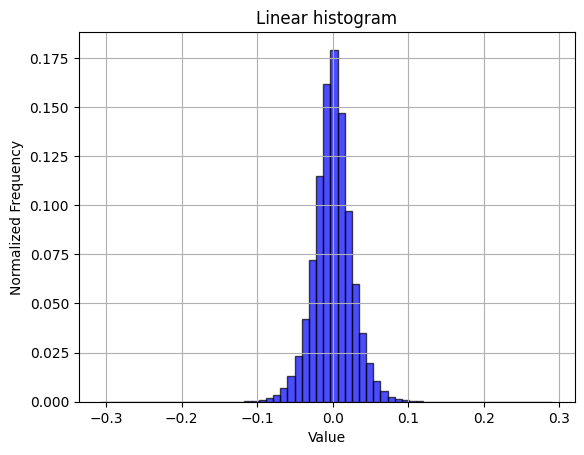

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 5.96046448e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.78813934e-07 1.78813934e-07 1.78813934e-07
 5.96046448e-08 2.38418579e-07 2.38418579e-07 2.98023224e-07
 9.53674316e-07 4.47034836e-06 1.72853470e-05 8.60095024e-05
 3.40819359e-04 1.15162134e-03 3.81875038e-03 1.06263757e-02
 2.57666707e-02 5.54016232e-02 9.66284871e-02 1.45288706e-01
 1.78574562e-01 1.74659133e-01 1.36488318e-01 8.75732899e-02
 4.86324430e-02 2.16684937e-02 8.92311335e-03 3.08656693e-03
 9.15408134e-04 2.61187553e-04 6.18100166e-05 1.63316727e-05
 3.27825546e-06 8.34465027e-07 5.96046448e-07 2.38418579e-07
 1.19209290e-07 1.19209290e-07 2.38418579e-07 0.00000000e+00
 5.96046448e-08 1.78813934e-07 0.00000000e+00 1.19209290e-07
 5.96046448e-08 0.00000000e+00 5.96046448e-08 0.00000000e+00
 0.

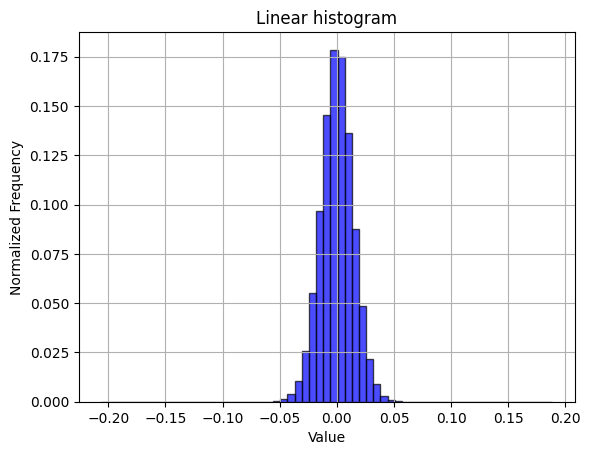

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 1.19209290e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.96046448e-08 5.96046448e-08 5.96046448e-08
 5.96046448e-08 1.19209290e-07 5.96046448e-08 1.19209290e-07
 2.98023224e-07 1.78813934e-07 1.19209290e-07 2.38418579e-07
 3.57627869e-07 4.76837158e-07 4.76837158e-07 7.74860382e-07
 1.31130219e-06 1.96695328e-06 3.33786011e-06 4.82797623e-06
 1.44839287e-05 6.86764717e-04 3.73849869e-02 3.73149276e-01
 4.99238372e-01 8.70172977e-02 2.44700909e-03 2.90870667e-05
 7.45058060e-06 3.51667404e-06 2.20537186e-06 1.60932541e-06
 1.13248825e-06 2.38418579e-07 1.78813934e-07 1.19209290e-07
 1.19209290e-07 1.78813934e-07 1.19209290e-07 1.19209290e-07
 1.19209290e-07 5.96046448e-08 5.96046448e-08 0.00000000e+00
 5.96046448e-08 1.19209290e-07 5.96046448e-08 0.00000000e+00
 5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

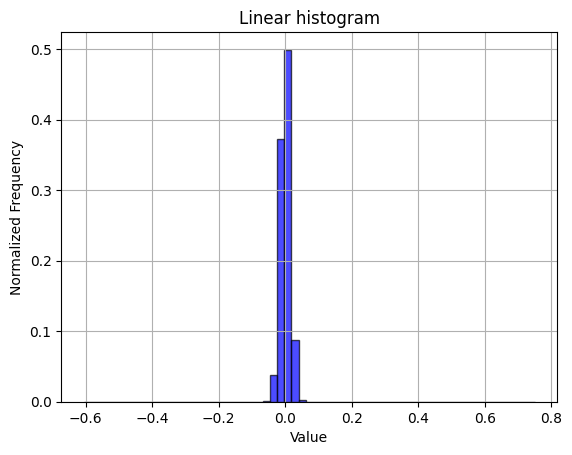

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 2.98023224e-08 1.49011612e-08 1.49011612e-08
 0.00000000e+00 1.49011612e-08 1.49011612e-08 4.47034836e-08
 1.49011612e-08 8.94069672e-08 4.47034836e-08 1.49011612e-07
 1.78813934e-07 1.19209290e-07 1.04308128e-07 3.12924385e-07
 5.06639481e-07 1.04308128e-06 1.81794167e-06 4.70876694e-06
 1.20401382e-05 3.41683626e-05 1.35034323e-04 6.05717301e-04
 2.97378004e-03 1.42831504e-02 7.21807927e-02 3.36366132e-01
 4.26869333e-01 1.18470937e-01 2.21178383e-02 4.73591685e-03
 9.34273005e-04 1.96248293e-04 4.93675470e-05 1.51395798e-05
 5.64754009e-06 2.44379044e-06 1.08778477e-06 4.61935997e-07
 3.42726707e-07 1.7

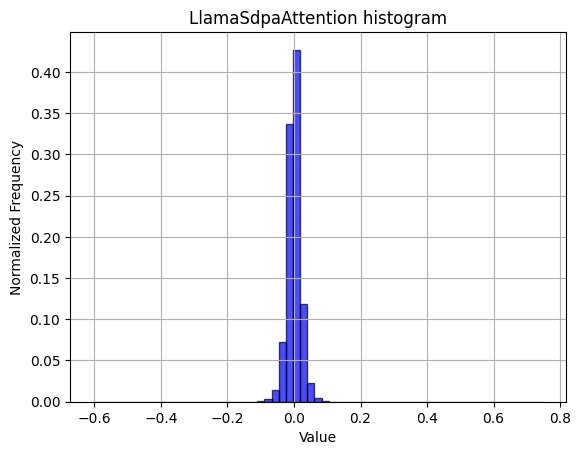

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 6.65354174e-08 2.21784725e-08
 2.21784725e-08 1.10892362e-07 1.10892362e-07 8.87138899e-08
 1.10892362e-07 3.10498615e-07 3.32677087e-07 4.65747922e-07
 5.98818757e-07 9.75852789e-07 1.59685002e-06 3.26023545e-06
 6.83096952e-06 1.78536703e-05 5.30952631e-05 1.89559404e-04
 7.90507294e-04 3.20751722e-03 1.25807829e-02 3.91030866e-02
 9.64329520e-02 1.76580961e-01 2.30786523e-01 2.10477275e-01
 1.35449676e-01 6.34366412e-02 2.22867921e-02 6.51133338e-03
 1.56766315e-03 3.70491383e-04 9.26394795e-05 2.80114107e-05
 1.10005223e-05 4.79055005e-06 1.88517016e-06 1.26417293e-06
 7.31889592e-07 4.87926394e-07 3.32677087e-07 2.66141670e-07
 2.21784725e-07 6.65354174e-08 2.21784725e-08 1.10892362e-07
 1.33070835e-07 4.43569449e-08 1.10892362e-07 2.21784725e-08
 6

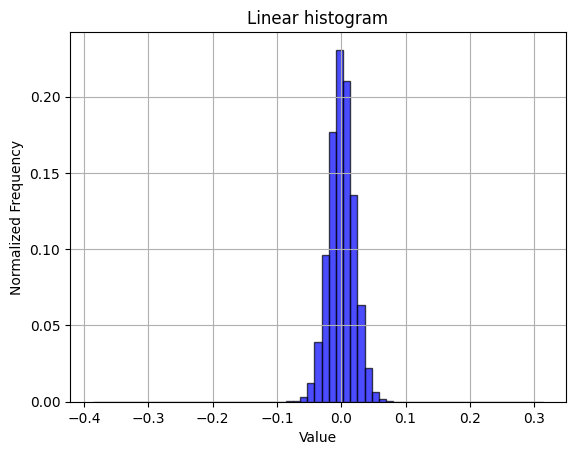

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.43569449e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 6.65354174e-08
 2.21784725e-08 2.21784725e-08 6.65354174e-08 1.55249307e-07
 1.77427780e-07 2.88320142e-07 8.42781954e-07 1.68556391e-06
 2.27329343e-05 6.45659691e-04 1.10811855e-02 8.37394803e-02
 2.74761621e-01 3.71889181e-01 2.05725226e-01 4.71467306e-02
 4.76391371e-03 2.11139058e-04 6.85314799e-06 1.44160071e-06
 5.76640284e-07 2.88320142e-07 1.33070835e-07 4.43569449e-08
 1.10892362e-07 6.65354174e-08 2.21784725e-08 4.43569449e-08
 0.00000000e+00 4.43569449e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 4.43569449e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

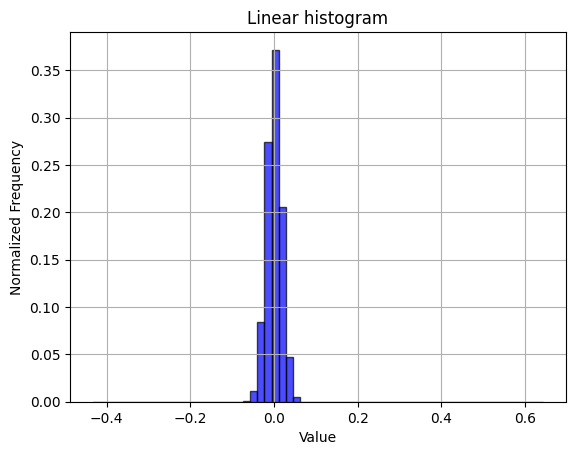

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.43569449e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 2.21784725e-08 2.21784725e-08
 6.65354174e-08 0.00000000e+00 4.43569449e-08 6.65354174e-08
 1.10892362e-07 1.99606252e-07 1.77427780e-07 3.77034032e-07
 4.87926394e-07 1.06456668e-06 1.92952711e-06 3.57073407e-06
 1.09783439e-05 7.03878181e-04 3.30040067e-02 3.03483586e-01
 5.03432230e-01 1.51019828e-01 8.22189242e-03 1.03418217e-04
 5.94383062e-06 3.03845073e-06 1.41942224e-06 6.65354174e-07
 3.32677087e-07 1.77427780e-07 1.10892362e-07 6.65354174e-08
 0.00000000e+00 6.65354174e-08 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0

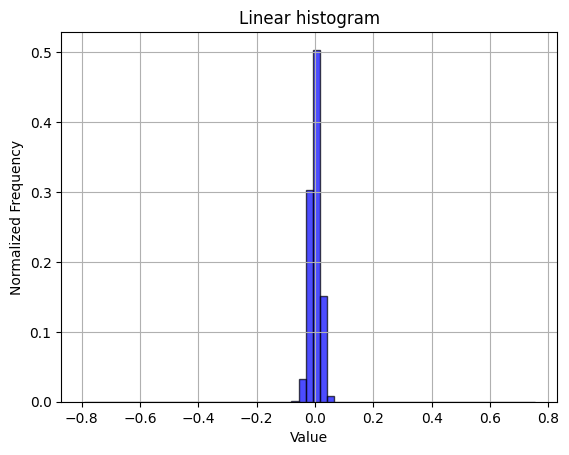

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

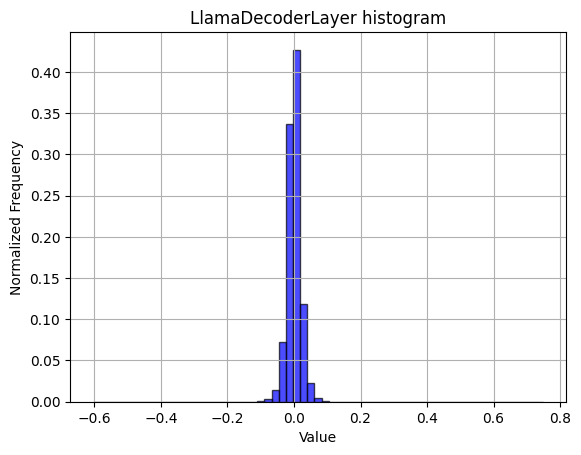

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.19209290e-07
 0.00000000e+00 5.96046448e-08 0.00000000e+00 1.19209290e-07
 1.19209290e-07 1.78813934e-07 1.78813934e-07 2.98023224e-07
 3.57627869e-07 2.98023224e-07 6.55651093e-07 4.17232513e-07
 8.94069672e-07 1.54972076e-06 3.03983688e-06 6.61611557e-06
 1.86562538e-05 7.04526901e-05 3.22043896e-04 1.72483921e-03
 8.10062885e-03 3.25615406e-02 1.09449327e-01 2.64930069e-01
 3.24858606e-01 1.77022099e-01 6.03267550e-02 1.61391497e-02
 3.55172157e-03 7.20322132e-04 1.40190125e-04 2.95639038e-05
 9.65595245e-06 3.69548798e-06 2.32458115e-06 1.31130219e-06
 6.55651093e-07 2.98023224e-07 2.98023224e-07 2.98023224e-07
 5.96046448e-08 1.78813934e-07 5.96046448e-08 0.00000000e+00
 1.

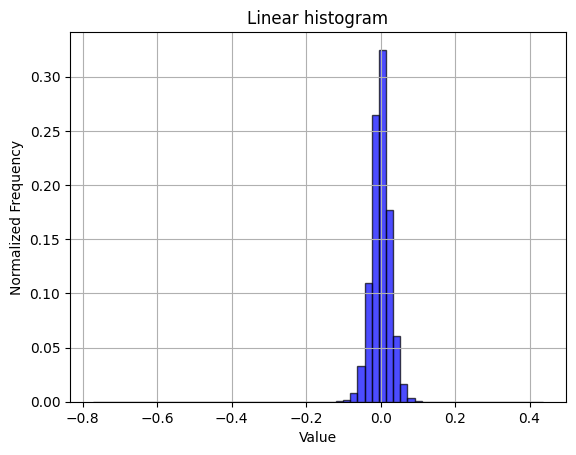

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.19209290e-07 0.00000000e+00
 5.96046448e-08 1.19209290e-07 5.96046448e-08 2.38418579e-07
 4.17232513e-07 3.57627869e-07 7.74860382e-07 7.74860382e-07
 2.08616257e-06 1.84774399e-06 3.45706940e-06 4.47034836e-06
 8.28504562e-06 1.87158585e-05 3.37362289e-05 8.27908516e-05
 1.74701214e-04 4.03463840e-04 8.87930393e-04 1.90407038e-03
 3.96901369e-03 8.16017389e-03 1.55931115e-02 2.88497210e-02
 5.15359640e-02 8.58117938e-02 1.31595552e-01 1.70918167e-01
 1.69764221e-01 1.31199777e-01 8.63574147e-02 5.14548421e-02
 2.93756723e-02 1.59243345e-02 8.17149878e-03 4.12803888e-03
 1.98930502e-03 9.16600227e-04 4.10795212e-04 1.80542469e-04
 8.04662704e-05 3.82661819e-05 1.96695328e-05 9.89437103e-06
 5.42402267e-06 2.86102295e-06 2.92062759e-06 1.90734863e-06
 8.94069672e-07 9.53674316e-07 7.15255737e-07 4.17232513e-07
 2.

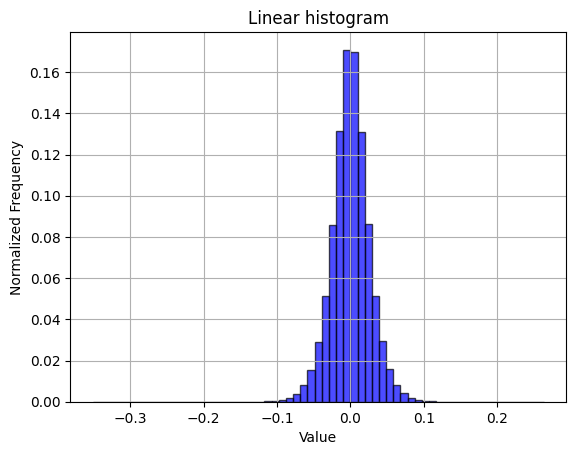

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.96046448e-08
 5.96046448e-08 5.96046448e-08 1.19209290e-07 1.78813934e-07
 0.00000000e+00 1.19209290e-07 2.98023224e-07 1.78813934e-07
 3.57627869e-07 3.57627869e-07 4.17232513e-07 2.14576721e-06
 1.28746033e-05 6.78896904e-05 3.02672386e-04 1.24353170e-03
 4.35954332e-03 1.35435462e-02 3.50273848e-02 7.39072561e-02
 1.32777810e-01 1.85191929e-01 1.99468851e-01 1.62964761e-01
 1.03788078e-01 5.35093546e-02 2.26584077e-02 7.92908669e-03
 2.40594149e-03 6.34312630e-04 1.60038471e-04 3.21269035e-05
 6.13927841e-06 1.66893005e-06 6.55651093e-07 2.38418579e-07
 2.98023224e-07 5.96046448e-08 1.78813934e-07 2.38418579e-07
 1.78813934e-07 5.96046448e-08 1.19209290e-07 0.00000000e+00
 5.96046448e-08 0.00000000e+00 5.96046448e-08 5.96046448e-08
 0.

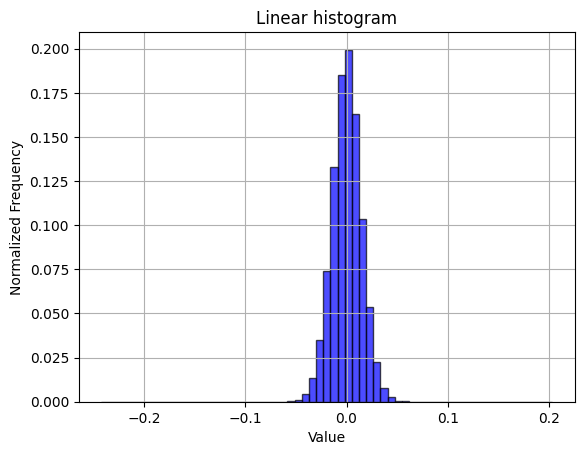

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 5.96046448e-08 0.00000000e+00 5.96046448e-08
 1.78813934e-07 0.00000000e+00 0.00000000e+00 1.78813934e-07
 3.57627869e-07 2.38418579e-07 1.78813934e-07 4.17232513e-07
 2.38418579e-07 4.17232513e-07 2.98023224e-07 6.55651093e-07
 8.34465027e-07 1.07288361e-06 9.53674316e-07 9.53674316e-07
 1.60932541e-06 2.56299973e-06 4.29153442e-06 6.73532486e-06
 5.50150871e-05 1.80095434e-03 3.25414538e-02 2.17405200e-01
 4.47030723e-01 2.55277812e-01 4.31138873e-02 2.64728069e-03
 7.82608986e-05 9.11951065e-06 4.94718552e-06 3.51667404e-06
 2.26497650e-06 1.43051147e-06 9.53674316e-07 1.13248825e-06
 6.55651093e-07 3.57627869e-07 5.96046448e-07 1.78813934e-07
 4.17232513e-07 4.17232513e-07 1.19209290e-07 1.19209290e-07
 2.38418579e-07 1.19209290e-07 1.78813934e-07 5.96046448e-08
 5.96046448e-08 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.

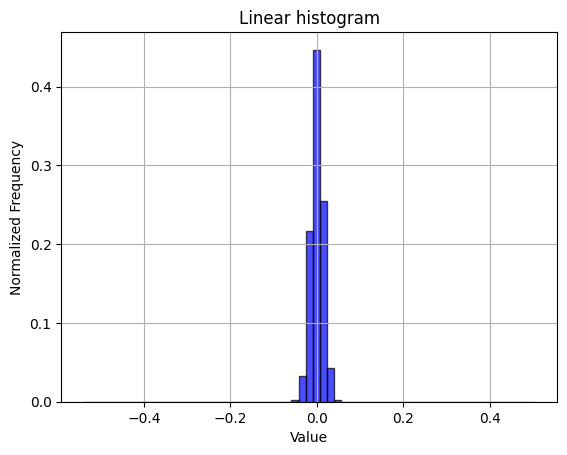

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.49011612e-08 1.49011612e-08
 0.00000000e+00 0.00000000e+00 4.47034836e-08 1.49011612e-08
 1.49011612e-08 1.49011612e-08 7.45058060e-08 2.98023224e-08
 1.04308128e-07 8.94069672e-08 1.78813934e-07 2.08616257e-07
 2.23517418e-07 2.83122063e-07 4.61935997e-07 8.19563866e-07
 1.71363354e-06 2.69711018e-06 7.67409801e-06 2.92360783e-05
 1.51365995e-04 7.84009695e-04 4.00912762e-03 1.74438059e-02
 8.28646123e-02 3.24856654e-01 4.02632877e-01 1.31920233e-01
 2.74258703e-02 6.2

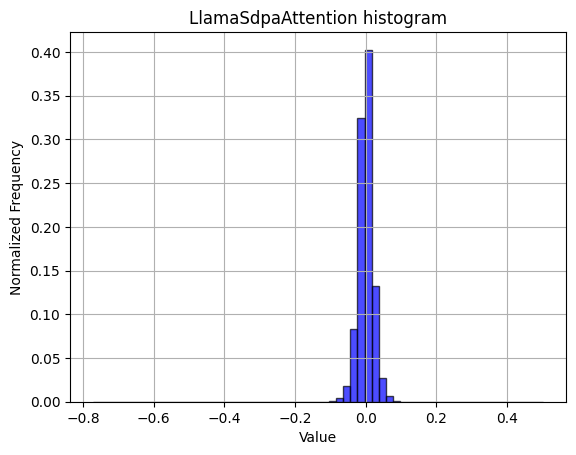

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 2.21784725e-08 0.00000000e+00 2.21784725e-08
 4.43569449e-08 6.65354174e-08 4.43569449e-08 2.21784725e-08
 2.21784725e-08 4.43569449e-08 4.43569449e-08 1.10892362e-07
 1.10892362e-07 1.33070835e-07 2.43963197e-07 3.10498615e-07
 1.13110210e-06 1.33070835e-06 2.41745350e-06 4.01430352e-06
 8.80485357e-06 1.94505204e-05 4.51331915e-05 1.45734743e-04
 5.74888185e-04 2.41649983e-03 9.94249832e-03 3.53625098e-02
 9.35929986e-02 1.80117873e-01 2.42372934e-01 2.17773948e-01
 1.34655753e-01 5.77640533e-02 1.87294317e-02 4.95298519e-03
 1.12553530e-03 2.60486159e-04 7.74472259e-05 2.74791274e-05
 1.12001286e-05 5.38936881e-06 2.77230906e-06 1.79645627e-06
 1.06456668e-06 3.99212505e-07 1.55249307e-07 1.33070835e-07
 1.33070835e-07 8.87138899e-08 4.43569449e-08 6.65354174e-08
 2.21784725e-08 2.21784725e-08 0.00000000e+00 4.43569449e-08
 2.21784725e-08 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0

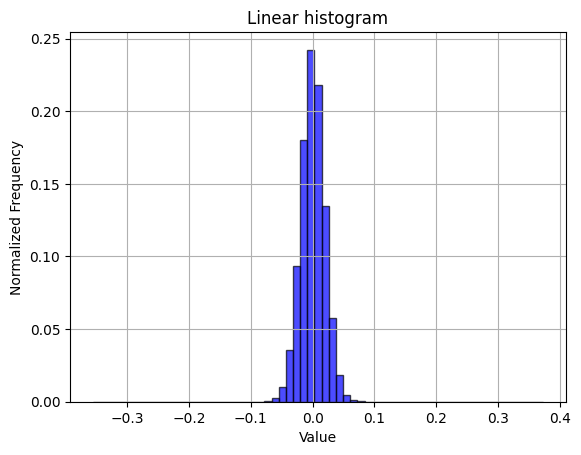

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 2.21784725e-08 4.43569449e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 2.21784725e-08 2.21784725e-08 6.65354174e-08 8.87138899e-08
 1.10892362e-07 1.55249307e-07 8.87138899e-08 3.77034032e-07
 6.87532647e-07 1.15328057e-06 7.03057577e-06 1.47087629e-04
 2.64189964e-03 2.52527858e-02 1.21479057e-01 2.89289741e-01
 3.30377335e-01 1.77593298e-01 4.65749474e-02 6.18533201e-03
 4.26492026e-04 1.85412030e-05 1.84081322e-06 9.09317371e-07
 2.21784725e-07 1.55249307e-07 1.77427780e-07 6.65354174e-08
 8.87138899e-08 2.21784725e-08 0.00000000e+00 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

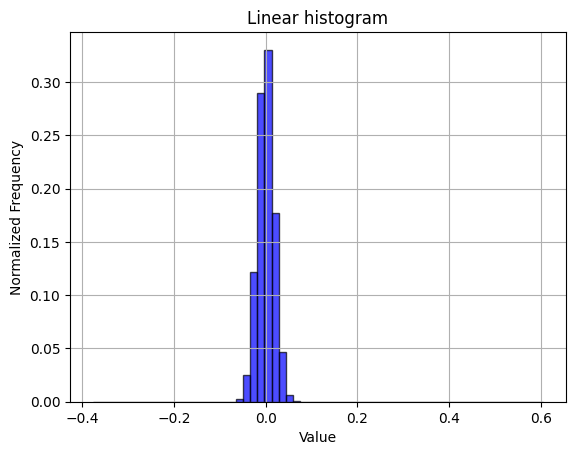

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[4.43569449e-08 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 4.43569449e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 6.65354174e-08 6.65354174e-08 4.43569449e-08
 2.21784725e-08 2.21784725e-08 8.87138899e-08 1.10892362e-07
 1.33070835e-07 2.43963197e-07 3.99212505e-07 7.31889592e-07
 1.06456668e-06 1.90734863e-06 2.79448753e-06 6.36522160e-06
 1.41299048e-04 5.66484762e-03 7.91430141e-02 3.37032562e-01
 4.15439827e-01 1.46559737e-01 1.54551794e-02 5.27182291e-04
 1.38393668e-05 3.30459240e-06 1.75209933e-06 1.02020973e-06
 4.87926394e-07 4.87926394e-07 3.10498615e-07 1.77427780e-07
 8.87138899e-08 1.10892362e-07 1.10892362e-07 4.43569449e-08
 4.43569449e-08 8.87138899e-08 2.21784725e-08 0.00000000e+00
 0.00000000e+00 2.21784725e-08 6.65354174e-08 4.43569449e-08
 4.43569449e-08 0.00000000e+00 2.21784725e-08 2.21784725e-08
 0

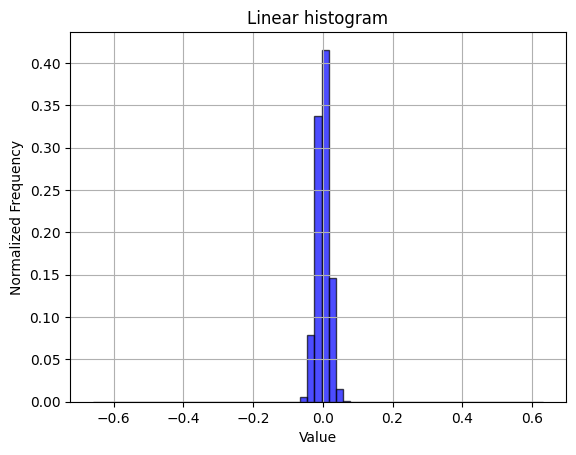

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

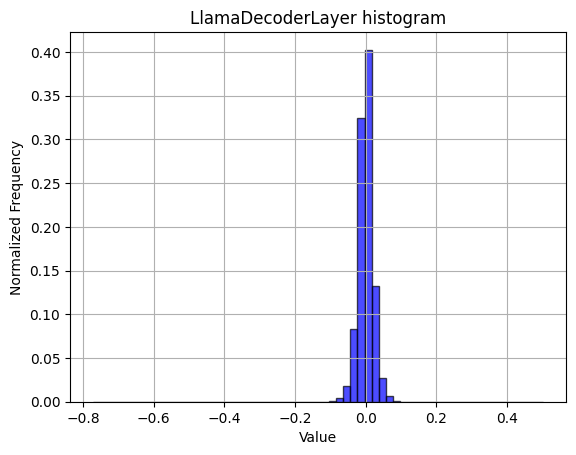

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 1.78813934e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.19209290e-07 5.96046448e-08
 1.78813934e-07 1.78813934e-07 1.19209290e-07 0.00000000e+00
 1.78813934e-07 2.98023224e-07 1.19209290e-07 4.17232513e-07
 7.15255737e-07 1.07288361e-06 1.37090683e-06 3.15904617e-06
 5.90085983e-06 1.23977661e-05 3.96966934e-05 1.33395195e-04
 4.86969948e-04 1.73300505e-03 5.69492579e-03 1.62999630e-02
 4.28795218e-02 1.00999534e-01 1.99506521e-01 2.64361322e-01
 1.99523270e-01 1.00972354e-01 4.29282784e-02 1.62749887e-02
 5.67358732e-03 1.76084042e-03 5.06520271e-04 1.32083893e-04
 3.77893448e-05 1.43647194e-05 5.90085983e-06 2.26497650e-06
 2.08616257e-06 1.13248825e-06 7.74860382e-07 5.96046448e-07
 3.57627869e-07 1.78813934e-07 1.19209290e-07 1.19209290e-07
 1.19209290e-07 1.19209290e-07 2.38418579e-07 5.96046448e-08
 0.00000000e+00 2.38418579e-07 1.19209290e-07 0.00000000e+00
 5.

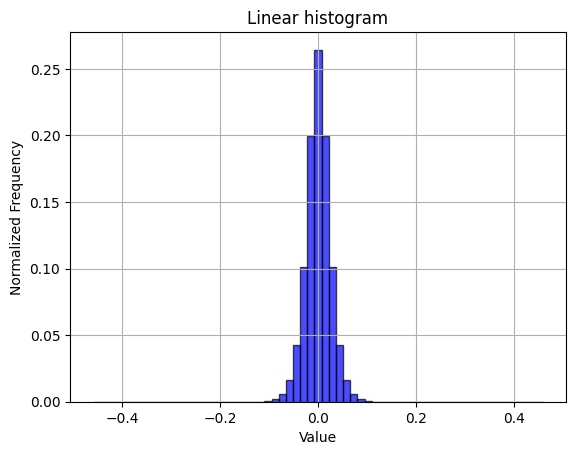

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.19209290e-07 1.78813934e-07 2.98023224e-07 5.36441803e-07
 5.36441803e-07 4.76837158e-07 5.36441803e-07 9.53674316e-07
 1.60932541e-06 2.08616257e-06 2.74181366e-06 4.17232513e-06
 5.36441803e-06 1.15036964e-05 1.91926956e-05 4.17232513e-05
 9.10758972e-05 1.83939934e-04 3.63588333e-04 7.52329826e-04
 1.47688389e-03 3.03435326e-03 5.36721945e-03 9.41139460e-03
 1.66364908e-02 2.80433297e-02 4.73995805e-02 7.48109221e-02
 1.14301503e-01 1.51057839e-01 1.62848353e-01 1.36813879e-01
 9.60736871e-02 6.15674257e-02 3.75722647e-02 2.26503015e-02
 1.35545731e-02 7.30419159e-03 4.13024426e-03 2.18892097e-03
 1.13987923e-03 5.73635101e-04 2.92181969e-04 1.35302544e-04
 6.16312027e-05 3.02195549e-05 1.46031380e-05 8.88109207e-06
 5.54323196e-06 3.51667404e-06 2.32458115e-06 1.72853470e-06
 1.19209290e-06 7.74860382e-07 5.36441803e-07 4.17232513e-07
 4.76837158e-07 1.19209290e-07 3.57627869e-07 1.19209290e-07
 1.

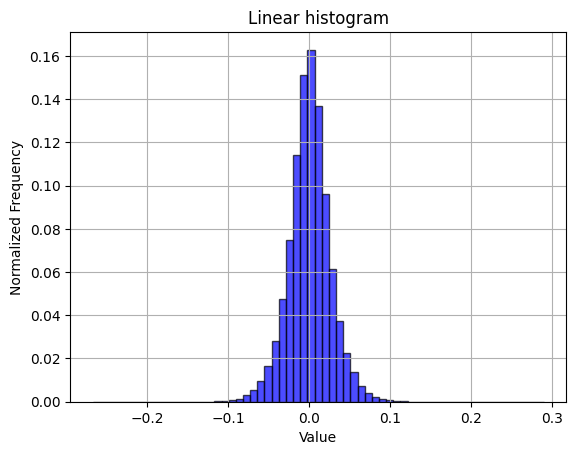

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 5.96046448e-08 5.96046448e-08
 5.96046448e-08 0.00000000e+00 1.19209290e-07 2.98023224e-07
 5.96046448e-08 1.78813934e-07 3.57627869e-07 4.76837158e-07
 2.38418579e-07 4.17232513e-07 4.76837158e-07 1.13248825e-06
 1.37090683e-06 4.70876694e-06 1.83582306e-05 8.74400139e-05
 4.06742096e-04 1.79934502e-03 6.65080547e-03 2.10362077e-02
 5.31168580e-02 1.06950164e-01 1.68404639e-01 2.07050562e-01
 1.87444627e-01 1.31745458e-01 7.06914663e-02 2.97897458e-02
 1.07414722e-02 3.09461355e-03 7.56382942e-04 1.61409378e-04
 3.09348106e-05 7.09295273e-06 1.78813934e-06 7.74860382e-07
 6.55651093e-07 7.74860382e-07 5.96046448e-07 1.19209290e-07
 1.78813934e-07 1.19209290e-07 5.96046448e-08 5.96046448e-08
 0.00000000e+00 0.00000000e+00 5.96046448e-08 5.96046448e-08
 1.19209290e-07 5.96046448e-08 0.00000000e+00 5.96046448e-08
 5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

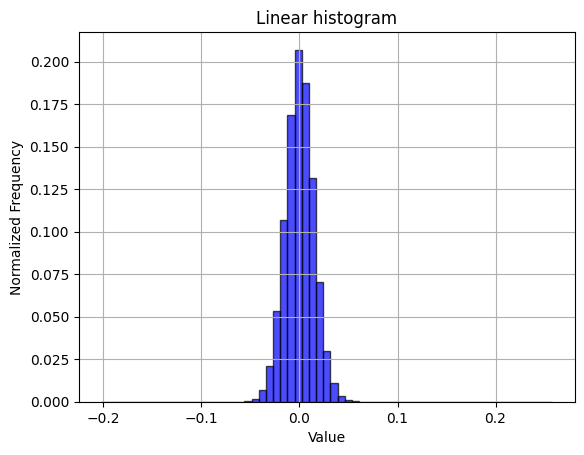

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.78813934e-07 5.96046448e-08 5.96046448e-08 5.96046448e-08
 5.96046448e-08 5.96046448e-08 5.96046448e-08 1.19209290e-07
 1.19209290e-07 0.00000000e+00 2.38418579e-07 1.78813934e-07
 5.96046448e-08 5.96046448e-08 5.96046448e-08 1.78813934e-07
 2.98023224e-07 4.17232513e-07 4.76837158e-07 4.17232513e-07
 1.19209290e-06 5.36441803e-07 1.43051147e-06 1.60932541e-06
 3.15904617e-06 5.90085983e-06 2.19941139e-05 3.09586525e-04
 4.61721420e-03 3.79079580e-02 1.65526628e-01 3.35713148e-01
 3.04781854e-01 1.24060452e-01 2.43592262e-02 2.49880552e-03
 1.57475471e-04 1.49011612e-05 4.70876694e-06 2.44379044e-06
 1.31130219e-06 9.53674316e-07 5.36441803e-07 6.55651093e-07
 1.78813934e-07 3.57627869e-07 1.78813934e-07 4.76837158e-07
 1.78813934e-07 2.38418579e-07 2.38418579e-07 1.78813934e-07
 1.78813934e-07 1.19209290e-07 1.78813934e-07 1.19209290e-07
 5.96046448e-08 5.96046448e-08 1.19209290e-07 1.19209290e-07
 5.

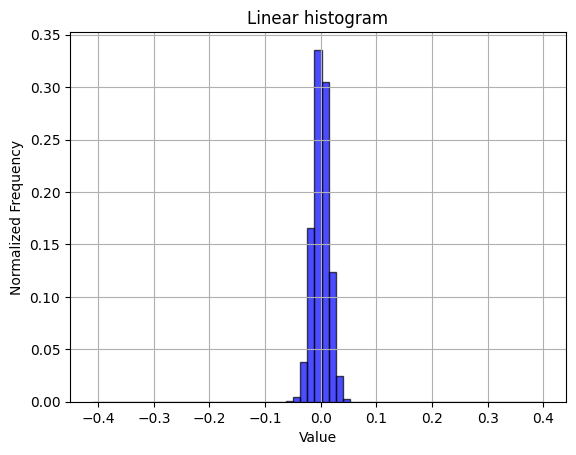

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 0.00000000e+00 4.47034836e-08 4.47034836e-08
 0.00000000e+00 2.98023224e-08 4.47034836e-08 2.98023224e-08
 5.96046448e-08 7.45058060e-08 7.45058060e-08 0.00000000e+00
 8.94069672e-08 1.78813934e-07 1.34110451e-07 3.42726707e-07
 4.17232513e-07 6.25848770e-07 1.16229057e-06 2.19047070e-06
 3.53157520e-06 8.73208046e-06 2.74926424e-05 9.21040773e-05
 3.06889415e-04 1.02598965e-03 3.12741101e-03 8.64876807e-03
 2.43677795e-02 7.73210973e-02 2.18562484e-01 3.32784280e-01
 2.18701676e-01 7.73636401e-02 2.43845135e-02 8.66234303e-03
 3.12428176e-03 1.02995336e-03 3.14950943e-04 9.18060541e-05
 2.61515379e-05 9.0

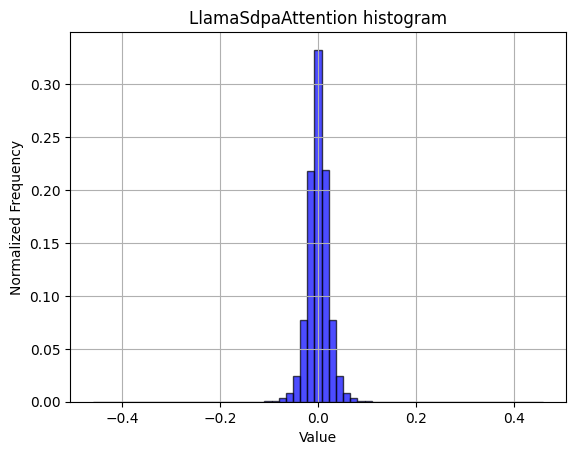

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 2.21784725e-08 6.65354174e-08 4.43569449e-08 2.21784725e-08
 8.87138899e-08 1.99606252e-07 3.77034032e-07 4.87926394e-07
 9.53674316e-07 1.50813613e-06 3.94776810e-06 8.47217649e-06
 1.56136446e-05 4.13406727e-05 1.10626221e-04 4.42194384e-04
 2.40325928e-03 1.30174105e-02 5.58248564e-02 1.62104806e-01
 2.83459175e-01 2.73223833e-01 1.47949485e-01 4.82135373e-02
 1.07012682e-02 1.93609193e-03 3.78874845e-04 9.47464344e-05
 3.59734824e-05 1.57688939e-05 6.91968341e-06 3.88123268e-06
 1.84081322e-06 8.42781954e-07 5.10104867e-07 2.88320142e-07
 8.87138899e-08 1.77427780e-07 6.65354174e-08 8.87138899e-08
 0.00000000e+00 2.21784725e-08 2.21784725e-08 1.10892362e-07
 0

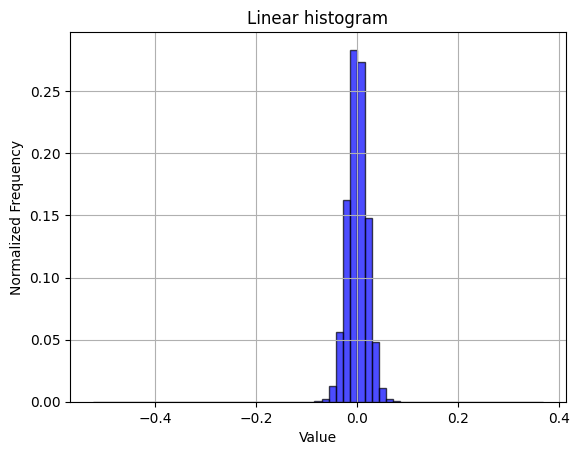

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 4.43569449e-08 4.43569449e-08 4.43569449e-08
 2.21784725e-08 6.65354174e-08 8.87138899e-08 1.10892362e-07
 1.77427780e-07 2.66141670e-07 3.54855560e-07 5.54461812e-07
 7.31889592e-07 1.46377918e-06 5.67768895e-06 3.58847685e-05
 2.50040099e-04 1.45313352e-03 6.52632602e-03 2.28988514e-02
 6.32320227e-02 1.29204329e-01 1.96027800e-01 2.19747987e-01
 1.79863353e-01 1.08964898e-01 4.95762049e-02 1.66703823e-02
 4.43414200e-03 9.35288363e-04 1.41742618e-04 2.10473704e-05
 3.65944796e-06 1.13110210e-06 5.76640284e-07 6.20997229e-07
 3.32677087e-07 1.33070835e-07 8.87138899e-08 1.10892362e-07
 4.43569449e-08 4.43569449e-08 0.00000000e+00 4.43569449e-08
 4

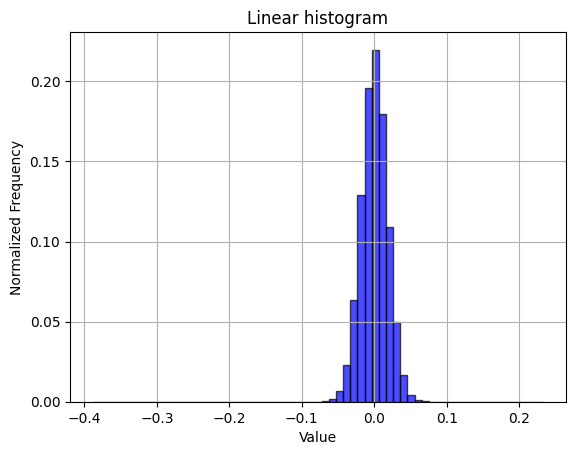

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 4.43569449e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.43569449e-08 8.87138899e-08 6.65354174e-08 1.33070835e-07
 1.10892362e-07 1.33070835e-07 2.21784725e-07 2.66141670e-07
 8.87138899e-07 2.04041947e-06 4.39133755e-06 6.63579896e-05
 8.57852226e-03 1.96631343e-01 5.72252850e-01 2.12101271e-01
 1.02732681e-02 7.91993252e-05 4.63530075e-06 1.70774238e-06
 8.42781954e-07 6.20997229e-07 3.32677087e-07 1.77427780e-07
 1.10892362e-07 6.65354174e-08 4.43569449e-08 2.21784725e-08
 2.21784725e-08 6.65354174e-08 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

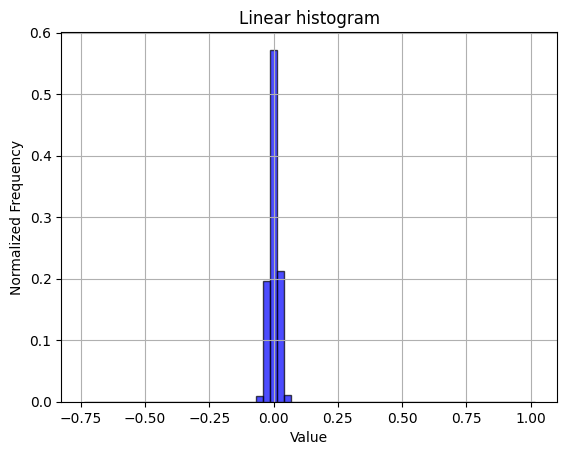

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

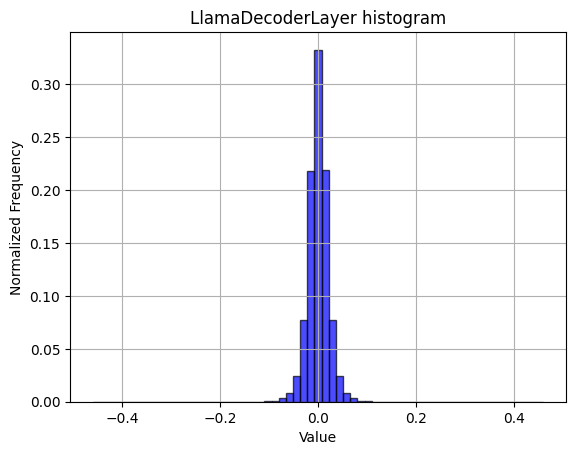

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[2.38418579e-07 5.96046448e-08 1.19209290e-07 2.38418579e-07
 1.78813934e-07 1.78813934e-07 2.38418579e-07 4.76837158e-07
 1.78813934e-07 3.57627869e-07 8.94069672e-07 1.84774399e-06
 2.26497650e-06 3.81469727e-06 9.47713852e-06 1.57952309e-05
 3.96370888e-05 9.24468040e-05 2.56776810e-04 7.30097294e-04
 2.20310688e-03 7.06481934e-03 2.19897032e-02 6.56529665e-02
 1.72909617e-01 3.09026718e-01 2.51349986e-01 1.10851049e-01
 3.90140414e-02 1.27736330e-02 4.01967764e-03 1.27714872e-03
 4.38451767e-04 1.60932541e-04 6.10947609e-05 2.82526016e-05
 1.03116035e-05 5.12599945e-06 2.80141830e-06 1.66893005e-06
 1.01327896e-06 7.15255737e-07 1.78813934e-07 3.57627869e-07
 1.78813934e-07 1.19209290e-07 5.96046448e-08 1.19209290e-07
 2.98023224e-07 5.96046448e-08 0.00000000e+00 1.19209290e-07
 1.78813934e-07 0.00000000e+00 5.96046448e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

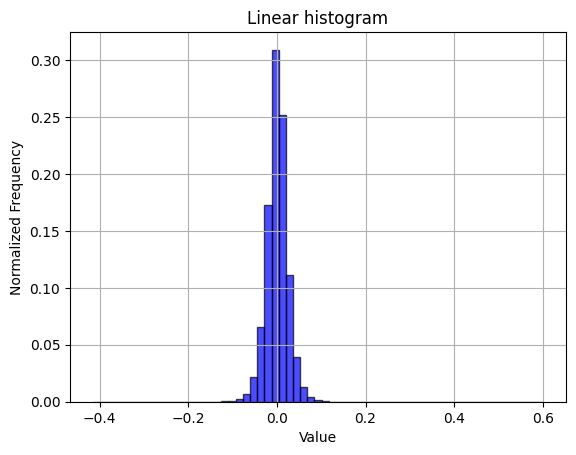

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 2.98023224e-07 2.38418579e-07 4.76837158e-07 8.94069672e-07
 1.01327896e-06 8.34465027e-07 1.43051147e-06 2.08616257e-06
 3.45706940e-06 4.82797623e-06 8.94069672e-06 1.49607658e-05
 3.21269035e-05 5.61475754e-05 1.11639500e-04 2.32219696e-04
 4.17292118e-04 8.39054585e-04 1.62011385e-03 3.07506323e-03
 5.40244579e-03 1.02781653e-02 1.78744197e-02 3.10534835e-02
 5.45832515e-02 9.04267430e-02 1.38617039e-01 1.74283385e-01
 1.66222930e-01 1.22868001e-01 7.63847828e-02 4.61691022e-02
 2.61982679e-02 1.52517557e-02 8.21292400e-03 4.57906723e-03
 2.48157978e-03 1.25324726e-03 6.93798065e-04 3.55780125e-04
 1.79946423e-04 8.86917114e-05 5.45978546e-05 2.60472298e-05
 1.23977661e-05 8.82148743e-06 4.82797623e-06 2.74181366e-06
 2.68220901e-06 1.90734863e-06 1.07288361e-06 8.94069672e-07
 5.96046448e-07 4.76837158e-07 3.57627869e-07 2.38418579e-07
 1.

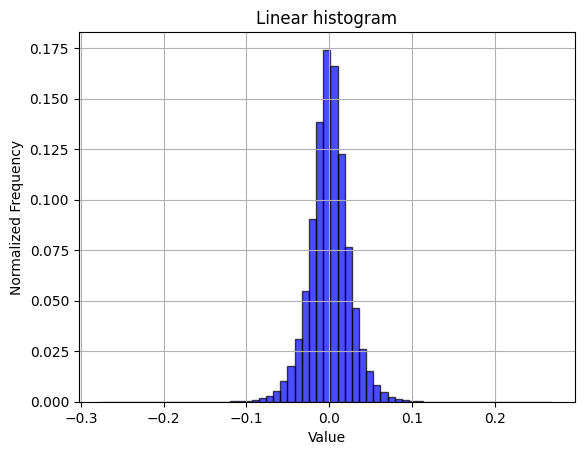

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 5.96046448e-08 0.00000000e+00 5.96046448e-08
 0.00000000e+00 1.19209290e-07 5.96046448e-08 0.00000000e+00
 2.98023224e-07 1.19209290e-07 4.17232513e-07 4.17232513e-07
 4.76837158e-07 8.34465027e-07 4.17232513e-07 1.49011612e-06
 5.84125519e-06 3.25441360e-05 1.97827816e-04 1.07610226e-03
 5.22089005e-03 1.99344754e-02 5.95528483e-02 1.34591401e-01
 2.17121124e-01 2.42036343e-01 1.77925587e-01 9.36472416e-02
 3.53810191e-02 1.01847053e-02 2.49457359e-03 4.84585762e-04
 8.39233398e-05 1.62124634e-05 3.09944153e-06 1.72853470e-06
 4.76837158e-07 4.17232513e-07 6.55651093e-07 1.19209290e-07
 5.36441803e-07 2.38418579e-07 1.19209290e-07 1.19209290e-07
 0.00000000e+00 5.96046448e-08 0.00000000e+00 5.96046448e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

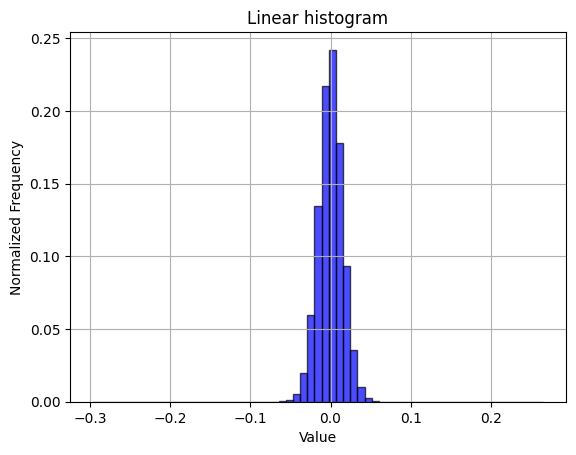

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.19209290e-07 0.00000000e+00 0.00000000e+00 1.19209290e-07
 0.00000000e+00 1.19209290e-07 1.19209290e-07 5.96046448e-08
 1.78813934e-07 1.19209290e-07 2.38418579e-07 2.98023224e-07
 2.98023224e-07 2.98023224e-07 1.78813934e-07 4.17232513e-07
 2.98023224e-07 8.34465027e-07 4.17232513e-07 5.36441803e-07
 8.34465027e-07 1.07288361e-06 1.84774399e-06 2.32458115e-06
 3.15904617e-06 7.39097595e-06 7.04526901e-05 1.97762251e-03
 3.45656872e-02 2.34150112e-01 4.59900439e-01 2.32733428e-01
 3.45185995e-02 1.96611881e-03 7.24196434e-05 8.04662704e-06
 3.75509262e-06 2.44379044e-06 1.19209290e-06 1.01327896e-06
 1.25169754e-06 1.07288361e-06 7.74860382e-07 5.96046448e-07
 7.74860382e-07 2.38418579e-07 1.19209290e-07 2.98023224e-07
 1.19209290e-07 4.76837158e-07 2.38418579e-07 2.98023224e-07
 1.19209290e-07 1.78813934e-07 2.38418579e-07 1.78813934e-07
 5.96046448e-08 1.19209290e-07 5.96046448e-08 0.00000000e+00
 5.

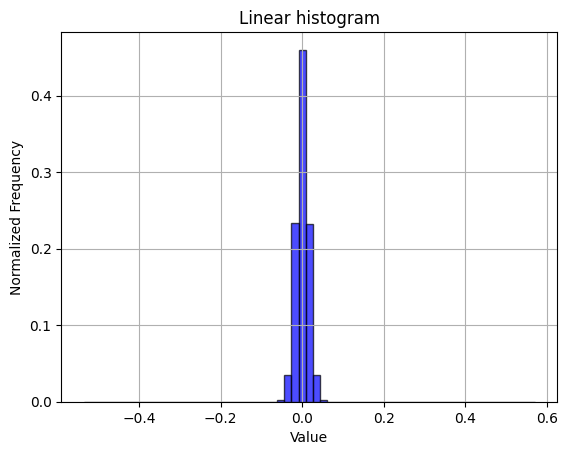

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[2.98023224e-08 0.00000000e+00 1.49011612e-08 1.49011612e-08
 1.49011612e-08 2.98023224e-08 4.47034836e-08 7.45058060e-08
 4.47034836e-08 7.45058060e-08 1.49011612e-07 1.34110451e-07
 1.63912773e-07 1.93715096e-07 1.63912773e-07 1.93715096e-07
 7.30156898e-07 9.08970833e-07 1.63912773e-06 3.36766243e-06
 6.46710396e-06 1.88350677e-05 5.68181276e-05 1.94251537e-04
 6.96107745e-04 2.59621441e-03 9.87212360e-03 4.18345630e-02
 1.84217334e-01 4.05418098e-01 2.65682235e-01 6.84251040e-02
 1.54476166e-02 4.03347611e-03 1.06944144e-03 2.90900469e-04
 8.48621130e-05 2.81333923e-05 9.73045826e-06 4.17232513e-06
 1.92224979e-06 1.1

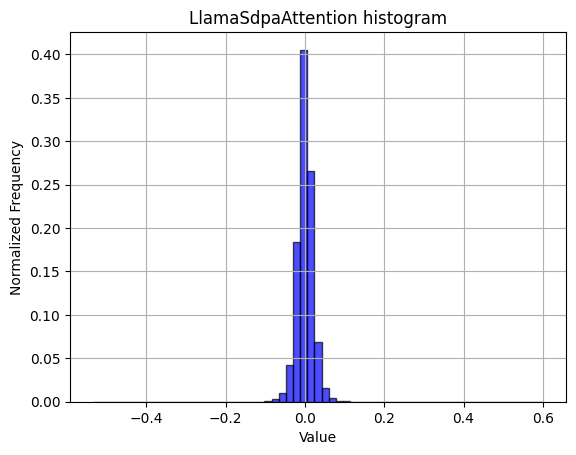

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 6.65354174e-08 4.43569449e-08 4.43569449e-08
 4.43569449e-08 1.33070835e-07 8.87138899e-08 1.55249307e-07
 1.10892362e-07 1.55249307e-07 3.99212505e-07 7.31889592e-07
 1.10892362e-06 1.90734863e-06 2.50616739e-06 4.72401464e-06
 8.11732093e-06 1.61237495e-05 3.53524851e-05 8.87582468e-05
 2.61240227e-04 9.59418541e-04 3.93676758e-03 1.54324243e-02
 4.73711546e-02 1.16158996e-01 2.00231929e-01 2.40674352e-01
 1.97851647e-01 1.11474303e-01 4.60043619e-02 1.43918104e-02
 3.80147890e-03 8.95433648e-04 2.42144562e-04 8.13062801e-05
 3.41548476e-05 1.75209933e-05 8.05078551e-06 3.85905421e-06
 2.86102295e-06 1.39724377e-06 9.75852789e-07 5.76640284e-07
 3.32677087e-07 1.33070835e-07 2.21784725e-07 2.43963197e-07
 6.65354174e-08 8.87138899e-08 2.21784725e-08 4.43569449e-08
 2

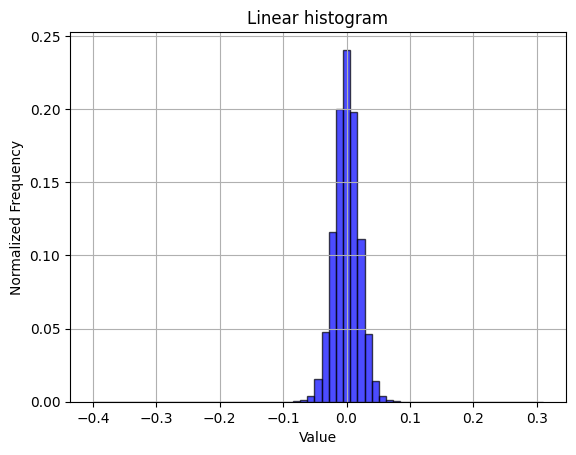

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[4.43569449e-08 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 2.21784725e-08 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.87138899e-08 0.00000000e+00
 6.65354174e-08 6.65354174e-08 1.33070835e-07 1.10892362e-07
 2.43963197e-07 2.43963197e-07 4.21390977e-07 8.64960427e-07
 2.50616739e-06 2.26442204e-05 2.96570534e-04 3.10387722e-03
 1.96225144e-02 7.91863064e-02 1.93955311e-01 2.85708095e-01
 2.45762847e-01 1.25732355e-01 3.82044814e-02 7.39860535e-03
 9.22424849e-04 7.03057577e-05 6.03254451e-06 1.24199446e-06
 5.10104867e-07 2.21784725e-07 1.99606252e-07 1.99606252e-07
 1.55249307e-07 6.65354174e-08 4.43569449e-08 4.43569449e-08
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0

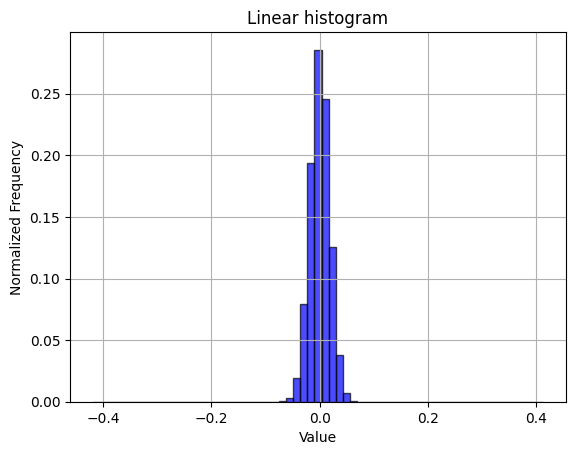

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 0.00000000e+00 2.21784725e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 2.21784725e-08 4.43569449e-08
 2.21784725e-08 2.21784725e-08 4.43569449e-08 8.87138899e-08
 8.87138899e-08 6.65354174e-08 1.10892362e-07 1.55249307e-07
 3.10498615e-07 5.54461812e-07 7.09711119e-07 1.24199446e-06
 2.15131183e-06 5.69986743e-06 5.18976256e-05 2.90362779e-03
 5.84791095e-02 3.22541924e-01 4.46454647e-01 1.54902924e-01
 1.42690304e-02 3.66055688e-04 1.08674515e-05 3.79251879e-06
 1.84081322e-06 9.09317371e-07 6.20997229e-07 5.10104867e-07
 2.43963197e-07 1.33070835e-07 8.87138899e-08 8.87138899e-08
 4.43569449e-08 2.21784725e-08 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.43569449e-08 0.00000000e+00
 2.21784725e-08 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0

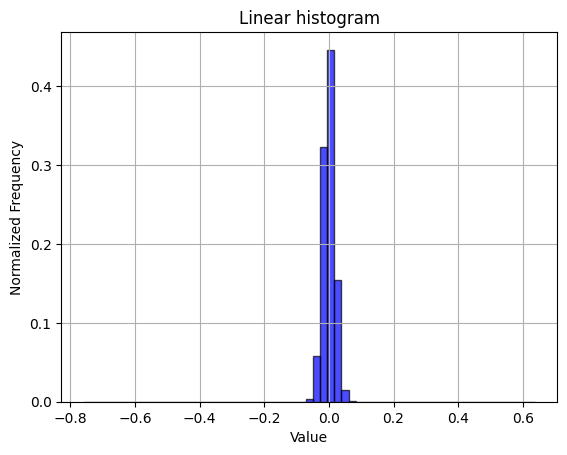

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

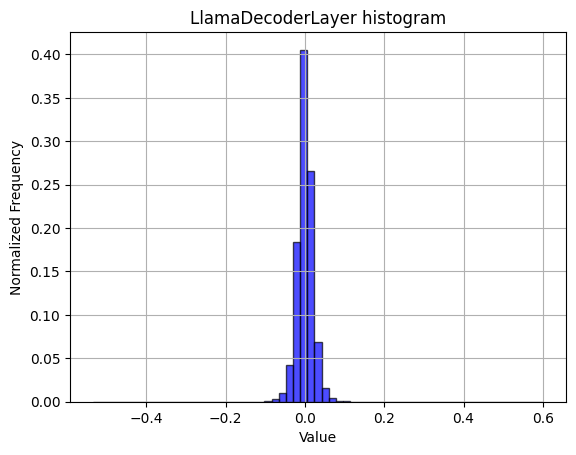

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.78813934e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 5.96046448e-08 0.00000000e+00 3.57627869e-07
 2.38418579e-07 1.19209290e-07 1.19209290e-07 4.17232513e-07
 2.98023224e-07 3.57627869e-07 8.94069672e-07 8.94069672e-07
 2.20537186e-06 3.51667404e-06 5.06639481e-06 1.03116035e-05
 2.58684158e-05 7.43269920e-05 2.61723995e-04 1.00177526e-03
 3.71146202e-03 1.25149488e-02 3.83923054e-02 1.01588190e-01
 2.16976702e-01 2.86545157e-01 2.00579822e-01 8.95132422e-02
 3.36329937e-02 1.07829571e-02 3.17889452e-03 8.52286816e-04
 2.29001045e-04 6.44326210e-05 2.43186951e-05 1.02519989e-05
 5.30481339e-06 3.03983688e-06 2.14576721e-06 1.07288361e-06
 8.34465027e-07 2.98023224e-07 4.76837158e-07 1.78813934e-07
 1.19209290e-07 1.78813934e-07 1.19209290e-07 5.96046448e-08
 1.19209290e-07 1.78813934e-07 0.00000000e+00 5.96046448e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

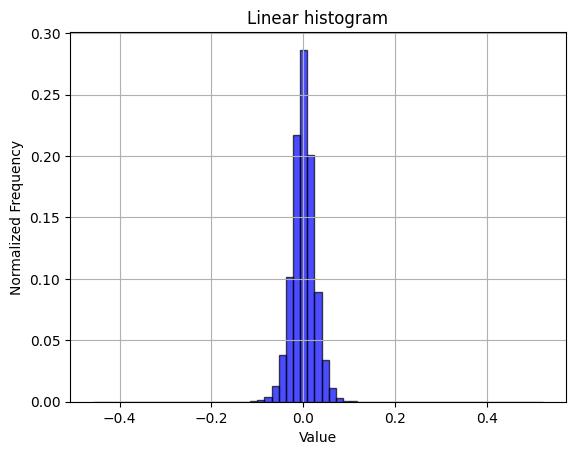

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.78813934e-07 5.96046448e-08 0.00000000e+00 0.00000000e+00
 1.19209290e-07 0.00000000e+00 2.38418579e-07 4.17232513e-07
 6.55651093e-07 8.34465027e-07 1.07288361e-06 1.01327896e-06
 2.02655792e-06 1.66893005e-06 2.56299973e-06 4.88758087e-06
 6.49690628e-06 1.29938126e-05 2.05039978e-05 4.73856926e-05
 9.62018967e-05 2.06708908e-04 4.21166420e-04 8.68201256e-04
 1.75082684e-03 3.39537859e-03 6.32101297e-03 1.15964413e-02
 2.06202269e-02 3.53258252e-02 5.82086444e-02 9.13025737e-02
 1.34392858e-01 1.62491977e-01 1.56619608e-01 1.19723439e-01
 8.03230405e-02 4.92478609e-02 2.96694636e-02 1.71668530e-02
 9.47833061e-03 5.20193577e-03 2.74497271e-03 1.38932467e-03
 6.84738159e-04 3.31819057e-04 1.55150890e-04 7.77840614e-05
 3.85046005e-05 1.74641609e-05 9.53674316e-06 6.02006912e-06
 3.51667404e-06 1.90734863e-06 2.32458115e-06 1.54972076e-06
 1.13248825e-06 1.13248825e-06 4.76837158e-07 4.17232513e-07
 1.

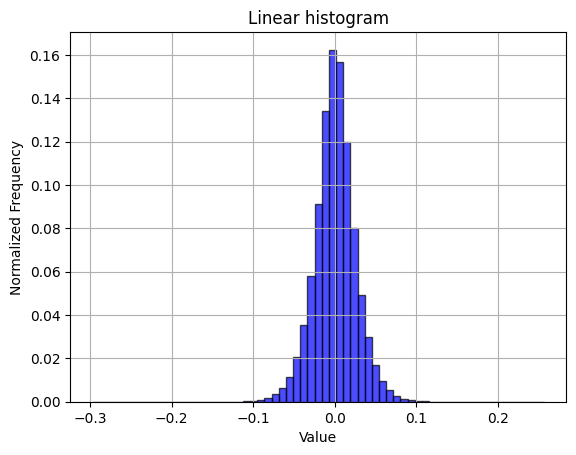

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 1.19209290e-07 5.96046448e-08 0.00000000e+00
 0.00000000e+00 5.96046448e-08 5.96046448e-08 1.78813934e-07
 1.19209290e-07 1.19209290e-07 5.96046448e-07 1.78813934e-07
 5.96046448e-07 5.96046448e-07 1.19209290e-06 4.52995300e-06
 1.04308128e-05 4.11868095e-05 1.68859959e-04 6.11424446e-04
 2.07203627e-03 6.83587790e-03 1.85260773e-02 4.46114540e-02
 8.80622268e-02 1.41970336e-01 1.85165524e-01 1.88672602e-01
 1.48719788e-01 9.34934616e-02 4.90486622e-02 2.10364461e-02
 7.46852160e-03 2.47901678e-03 7.29858875e-04 1.94251537e-04
 4.98890877e-05 1.27553940e-05 3.69548798e-06 1.60932541e-06
 1.31130219e-06 9.53674316e-07 8.94069672e-07 4.17232513e-07
 4.76837158e-07 2.98023224e-07 2.38418579e-07 1.78813934e-07
 1.19209290e-07 1.78813934e-07 0.00000000e+00 1.19209290e-07
 5.96046448e-08 0.00000000e+00 5.96046448e-08 5.96046448e-08
 0.00000000e+00 5.96046448e-08 0.00000000e+00 0.00000000e+00
 5.

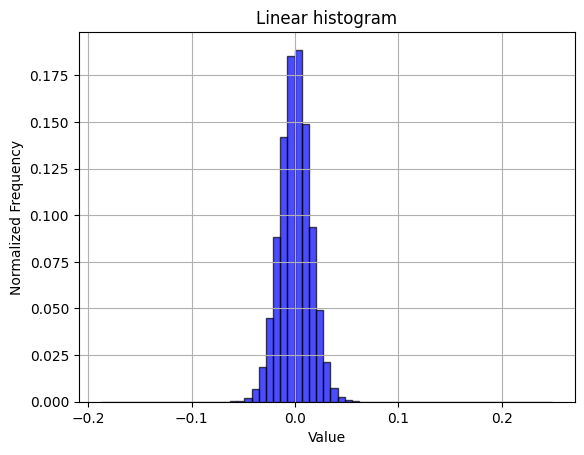

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.96046448e-08 5.96046448e-08
 5.96046448e-08 5.96046448e-08 5.96046448e-08 1.19209290e-07
 1.19209290e-07 2.38418579e-07 3.57627869e-07 2.38418579e-07
 2.38418579e-07 5.96046448e-07 7.15255737e-07 7.15255737e-07
 5.96046448e-07 7.15255737e-07 9.53674316e-07 1.37090683e-06
 2.02655792e-06 3.99351120e-06 7.09295273e-06 3.86238098e-05
 8.23199749e-04 1.40717626e-02 1.20099366e-01 3.70196521e-01
 3.65269065e-01 1.15099967e-01 1.35826468e-02 7.42137432e-04
 3.54051590e-05 6.37769699e-06 4.76837158e-06 2.08616257e-06
 1.49011612e-06 8.94069672e-07 1.07288361e-06 8.94069672e-07
 5.96046448e-07 5.36441803e-07 2.38418579e-07 4.17232513e-07
 1.19209290e-07 3.57627869e-07 1.78813934e-07 1.19209290e-07
 1.78813934e-07 1.19209290e-07 1.19209290e-07 5.96046448e-08
 1.19209290e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.

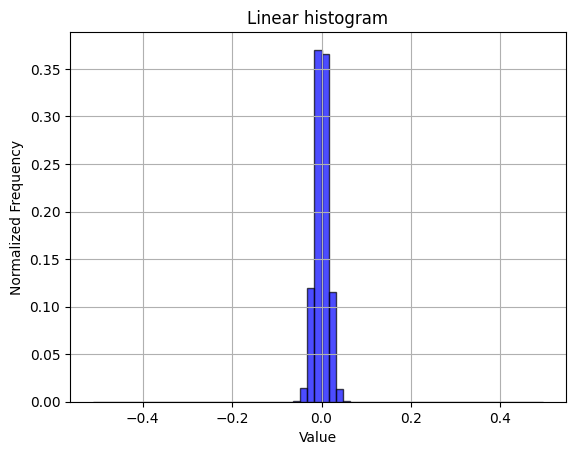

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 0.00000000e+00 0.00000000e+00 2.98023224e-08
 1.49011612e-08 0.00000000e+00 2.98023224e-08 4.47034836e-08
 1.49011612e-08 1.49011612e-08 1.19209290e-07 8.94069672e-08
 5.96046448e-08 1.49011612e-07 2.68220901e-07 1.34110451e-07
 3.12924385e-07 7.45058060e-07 1.05798244e-06 1.63912773e-06
 2.50339508e-06 4.76837158e-06 1.21444464e-05 4.14103270e-05
 1.60142779e-04 6.05225563e-04 2.34049559e-03 8.16375017e-03
 2.80953497e-02 1.08171761e-01 2.96980992e-01 3.44851643e-01
 1.52839854e-01 4.16156501e-02 1.14525855e-02 3.41784954e-03
 9.16615129e-04 2.29194760e-04 6.17802143e-05 1.71065331e-05
 6.02006912e-06 3.1

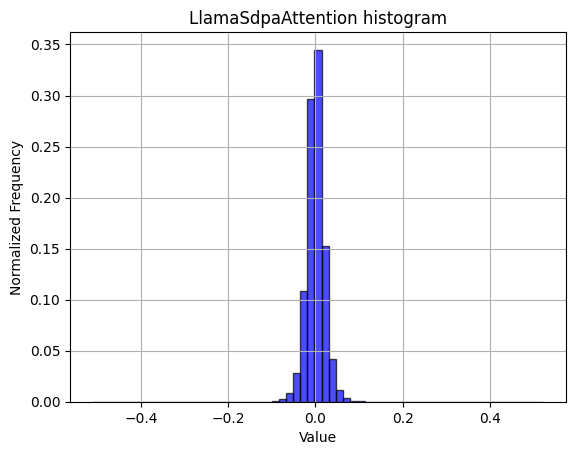

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[4.43569449e-08 0.00000000e+00 0.00000000e+00 2.21784725e-08
 2.21784725e-08 2.21784725e-08 2.21784725e-08 4.43569449e-08
 1.33070835e-07 4.43569449e-08 6.65354174e-08 1.77427780e-07
 3.32677087e-07 2.88320142e-07 6.87532647e-07 9.53674316e-07
 1.48595766e-06 2.48398892e-06 4.94579936e-06 8.89356746e-06
 1.63898912e-05 3.12938247e-05 7.31446022e-05 2.11116879e-04
 8.32114109e-04 3.35447178e-03 1.28672400e-02 4.05993794e-02
 9.91954803e-02 1.82337029e-01 2.33009582e-01 2.08440293e-01
 1.31257456e-01 5.98808111e-02 2.00926315e-02 5.80250940e-03
 1.43248536e-03 3.49266585e-04 1.12489212e-04 4.01208567e-05
 1.92065572e-05 1.10227008e-05 5.52243965e-06 3.72598338e-06
 1.64120696e-06 1.04238821e-06 6.87532647e-07 4.21390977e-07
 1.55249307e-07 1.33070835e-07 1.33070835e-07 6.65354174e-08
 8.87138899e-08 6.65354174e-08 2.21784725e-08 4.43569449e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

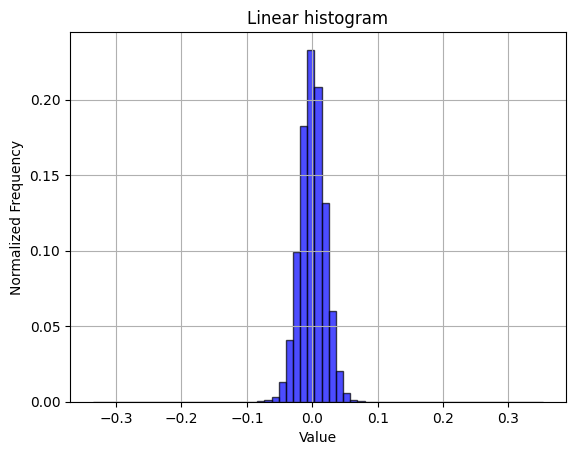

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 6.65354174e-08 0.00000000e+00
 0.00000000e+00 8.87138899e-08 0.00000000e+00 2.21784725e-08
 0.00000000e+00 4.43569449e-08 6.65354174e-08 1.33070835e-07
 1.10892362e-07 1.10892362e-07 1.10892362e-07 2.66141670e-07
 3.32677087e-07 5.10104867e-07 7.54068064e-07 2.99409378e-06
 1.17767689e-05 6.21219014e-05 2.75168308e-04 9.83460005e-04
 3.26981655e-03 9.75764075e-03 2.32294881e-02 4.86206676e-02
 8.49890598e-02 1.27950668e-01 1.59820202e-01 1.66429120e-01
 1.45819975e-01 1.06625690e-01 6.48362138e-02 3.40382776e-02
 1.49818243e-02 5.81417527e-03 1.79718816e-03 5.12056572e-04
 1.30719917e-04 2.88320142e-05 6.56482785e-06 1.66338544e-06
 6.65354174e-07 4.43569449e-07 1.99606252e-07 1.10892362e-07
 1.33070835e-07 8.87138899e-08 4.43569449e-08 8.87138899e-08
 6.65354174e-08 0.00000000e+00 4.43569449e-08 2.21784725e-08
 2.21784725e-08 0.00000000e+00 2.21784725e-08 0.00000000e+00
 2

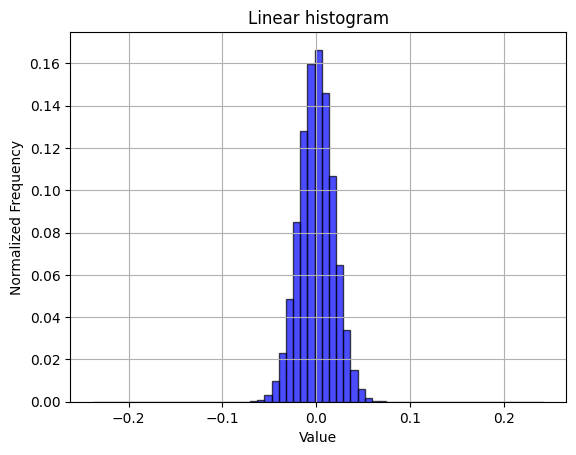

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.43569449e-08 0.00000000e+00 4.43569449e-08
 2.21784725e-08 0.00000000e+00 6.65354174e-08 6.65354174e-08
 1.10892362e-07 6.65354174e-08 1.55249307e-07 2.66141670e-07
 5.32283339e-07 7.09711119e-07 1.21981599e-06 1.99606252e-06
 3.32677087e-06 1.64120696e-05 6.33572423e-04 1.41808044e-02
 1.21429931e-01 3.63708274e-01 3.62250018e-01 1.22472741e-01
 1.46164783e-02 6.55085541e-04 1.95614127e-05 3.52637712e-06
 2.04041947e-06 1.17545904e-06 7.31889592e-07 2.66141670e-07
 1.55249307e-07 1.33070835e-07 8.87138899e-08 6.65354174e-08
 2.21784725e-08 2.21784725e-08 2.21784725e-08 2.21784725e-08
 2.21784725e-08 4.43569449e-08 4.43569449e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 2.21784725e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

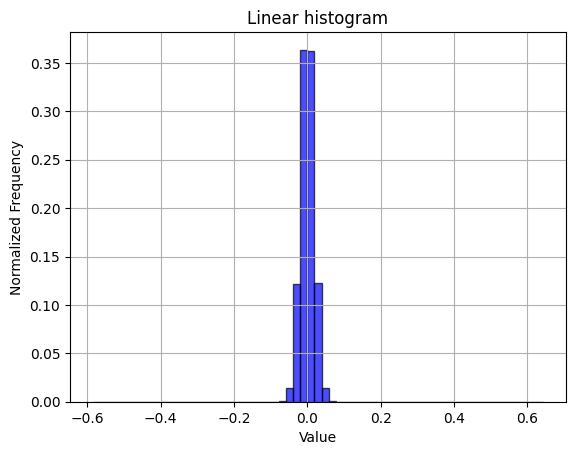

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

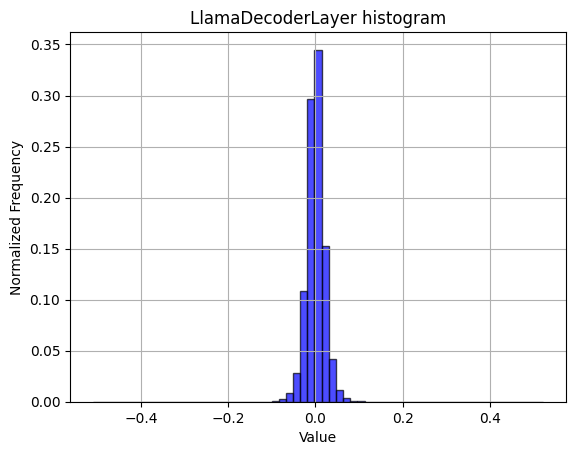

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 1.78813934e-07 5.96046448e-08 0.00000000e+00
 1.19209290e-07 2.98023224e-07 1.19209290e-07 2.38418579e-07
 5.96046448e-07 2.38418579e-07 5.36441803e-07 9.53674316e-07
 1.37090683e-06 2.50339508e-06 6.97374344e-06 1.37686729e-05
 4.69088554e-05 1.83343887e-04 7.88569450e-04 3.49140167e-03
 1.42410994e-02 5.07357121e-02 1.43526673e-01 2.90502489e-01
 2.87632585e-01 1.41601920e-01 4.87526655e-02 1.41063929e-02
 3.31699848e-03 7.84873962e-04 1.83165073e-04 4.40478325e-05
 1.65700912e-05 7.98702240e-06 3.21865082e-06 1.72853470e-06
 1.01327896e-06 7.15255737e-07 4.17232513e-07 1.19209290e-07
 1.19209290e-07 1.19209290e-07 1.19209290e-07 1.19209290e-07
 1.19209290e-07 5.96046448e-08 1.78813934e-07 1.19209290e-07
 5.96046448e-08 0.00000000e+00 5.96046448e-08 1.19209290e-07
 5.96046448e-08 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

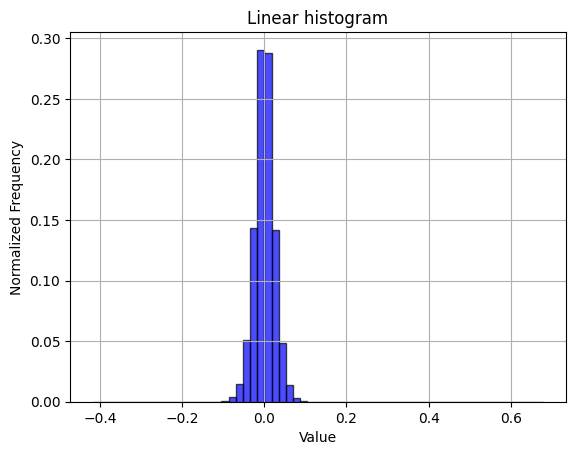

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[2.38418579e-07 5.96046448e-08 5.96046448e-08 1.78813934e-07
 2.98023224e-07 6.55651093e-07 1.01327896e-06 1.37090683e-06
 1.78813934e-06 2.32458115e-06 3.45706940e-06 4.35113907e-06
 8.16583633e-06 1.34110451e-05 2.52723694e-05 4.67300415e-05
 9.39369202e-05 1.93834305e-04 4.27365303e-04 8.44538212e-04
 1.71297789e-03 3.40873003e-03 6.77216053e-03 1.26402974e-02
 2.29977965e-02 4.12099361e-02 6.87474608e-02 1.06293380e-01
 1.47500336e-01 1.68189228e-01 1.49183810e-01 1.08219743e-01
 6.88112378e-02 4.17050719e-02 2.42487192e-02 1.28902197e-02
 6.74247742e-03 3.68928909e-03 1.70075893e-03 8.49366188e-04
 4.08470631e-04 2.04086304e-04 9.64999199e-05 4.97698784e-05
 2.47359276e-05 1.18017197e-05 8.16583633e-06 5.12599945e-06
 3.39746475e-06 1.49011612e-06 1.60932541e-06 7.74860382e-07
 6.55651093e-07 7.15255737e-07 1.19209290e-07 1.19209290e-07
 1.19209290e-07 1.19209290e-07 0.00000000e+00 0.00000000e+00
 1.

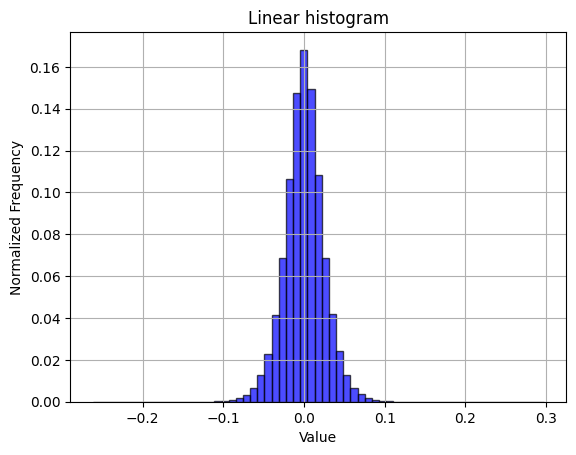

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 5.96046448e-08 5.96046448e-08 5.96046448e-08
 5.96046448e-08 2.38418579e-07 5.96046448e-08 5.96046448e-08
 2.98023224e-07 4.76837158e-07 5.36441803e-07 1.13248825e-06
 2.14576721e-06 9.95397568e-06 3.31997871e-05 1.54078007e-04
 6.54757023e-04 2.26145983e-03 7.06273317e-03 1.93866491e-02
 4.50669527e-02 8.92274976e-02 1.43032730e-01 1.84032023e-01
 1.86496317e-01 1.47812128e-01 9.34199691e-02 4.86866832e-02
 2.13319063e-02 7.81512260e-03 2.58713961e-03 6.89029694e-04
 1.75297260e-04 4.41074371e-05 9.11951065e-06 2.08616257e-06
 1.13248825e-06 2.98023224e-07 4.76837158e-07 2.98023224e-07
 2.38418579e-07 3.57627869e-07 1.19209290e-07 5.96046448e-08
 1.78813934e-07 1.19209290e-07 1.19209290e-07 0.00000000e+00
 1.19209290e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.

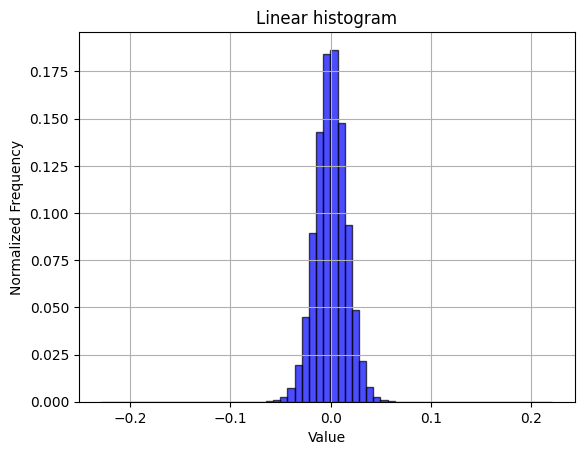

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 5.96046448e-08 0.00000000e+00 1.19209290e-07 1.19209290e-07
 2.38418579e-07 1.78813934e-07 1.78813934e-07 1.78813934e-07
 1.19209290e-07 2.38418579e-07 4.76837158e-07 6.55651093e-07
 5.96046448e-07 6.55651093e-07 1.01327896e-06 1.31130219e-06
 1.54972076e-06 2.08616257e-06 2.86102295e-06 4.58955765e-06
 9.17911530e-06 5.90682030e-05 1.13308430e-03 1.58249140e-02
 1.12186849e-01 3.30193222e-01 3.65242660e-01 1.48575842e-01
 2.47004032e-02 1.92344189e-03 1.03175640e-04 1.09672546e-05
 6.19888306e-06 3.21865082e-06 2.68220901e-06 1.54972076e-06
 7.15255737e-07 8.34465027e-07 9.53674316e-07 4.17232513e-07
 2.38418579e-07 4.76837158e-07 2.38418579e-07 4.17232513e-07
 3.57627869e-07 3.57627869e-07 3.57627869e-07 5.96046448e-08
 1.78813934e-07 5.96046448e-08 1.78813934e-07 1.19209290e-07
 5.96046448e-08 5.96046448e-08 0.00000000e+00 0.00000000e+00
 5.

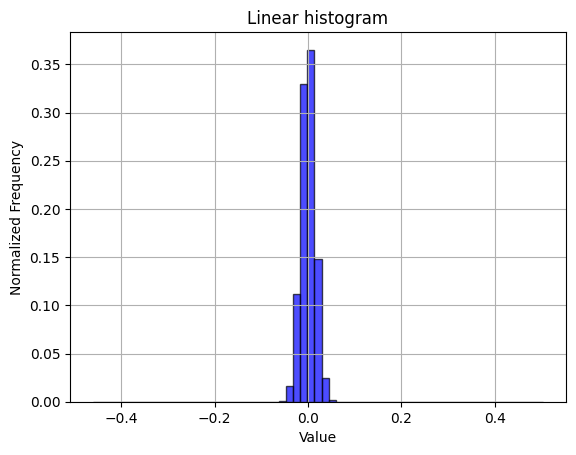

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 0.00000000e+00 2.98023224e-08 2.98023224e-08
 4.47034836e-08 2.98023224e-08 1.04308128e-07 8.94069672e-08
 8.94069672e-08 1.34110451e-07 1.63912773e-07 2.38418579e-07
 3.57627869e-07 7.15255737e-07 1.25169754e-06 2.17556953e-06
 4.64916229e-06 1.13546848e-05 4.12017107e-05 1.69783831e-04
 7.67186284e-04 3.34194303e-03 1.41913742e-02 6.24673665e-02
 2.35404789e-01 3.95645499e-01 2.16124460e-01 5.53266108e-02
 1.26377791e-02 2.97421217e-03 6.76438212e-04 1.53288245e-04
 3.58372927e-05 1.11758709e-05 4.41074371e-06 2.04145908e-06
 1.01327896e-06 5.81145287e-07 3.72529030e-07 1.93715096e-07
 1.78813934e-07 1.4

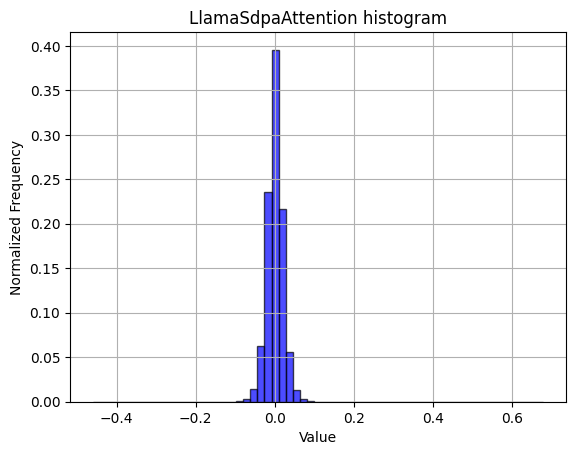

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[6.65354174e-08 0.00000000e+00 2.21784725e-08 6.65354174e-08
 2.21784725e-08 8.87138899e-08 6.65354174e-08 8.87138899e-08
 2.21784725e-08 1.10892362e-07 1.55249307e-07 3.77034032e-07
 2.88320142e-07 5.76640284e-07 1.13110210e-06 1.75209933e-06
 2.52834586e-06 5.05669172e-06 9.93595567e-06 2.22006509e-05
 4.89922457e-05 1.46843666e-04 4.94513401e-04 1.90577396e-03
 7.45347489e-03 2.52481948e-02 7.06227103e-02 1.44196976e-01
 2.15758412e-01 2.27016205e-01 1.67746633e-01 8.95452943e-02
 3.50035956e-02 1.08493317e-02 2.88996586e-03 7.09356264e-04
 1.96434731e-04 6.62470973e-05 2.68359517e-05 1.30631203e-05
 7.25236050e-06 3.96994657e-06 2.48398892e-06 1.13110210e-06
 7.31889592e-07 3.10498615e-07 2.43963197e-07 8.87138899e-08
 6.65354174e-08 1.55249307e-07 4.43569449e-08 0.00000000e+00
 4.43569449e-08 4.43569449e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

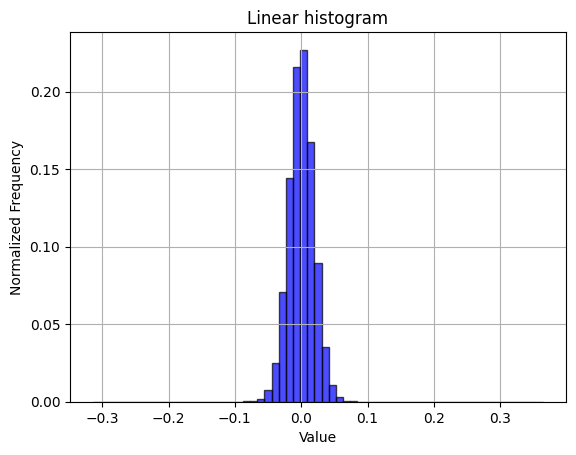

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.43569449e-08
 0.00000000e+00 2.21784725e-08 0.00000000e+00 2.21784725e-08
 2.21784725e-08 0.00000000e+00 1.10892362e-07 6.65354174e-08
 1.10892362e-07 2.21784725e-07 1.77427780e-07 5.54461812e-07
 1.48595766e-06 1.07122022e-05 1.51190647e-04 1.51501145e-03
 1.12102420e-02 5.18634707e-02 1.48247320e-01 2.61740773e-01
 2.73519405e-01 1.70646002e-01 6.37694514e-02 1.48079007e-02
 2.27515642e-03 2.18923702e-04 1.76540641e-05 2.04041947e-06
 7.54068064e-07 3.77034032e-07 1.55249307e-07 1.77427780e-07
 1.99606252e-07 6.65354174e-08 4.43569449e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

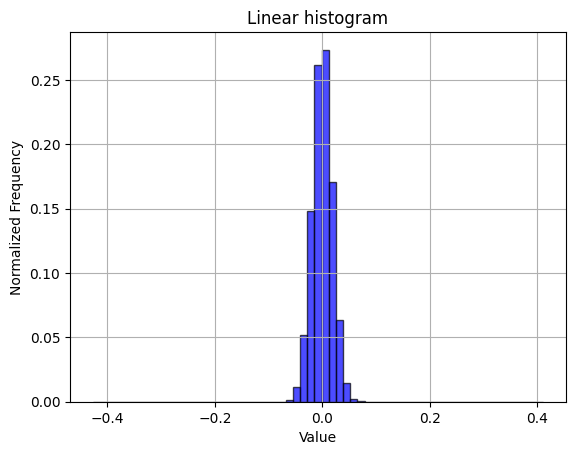

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 2.21784725e-08 0.00000000e+00
 2.21784725e-08 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 2.21784725e-08 0.00000000e+00 4.43569449e-08
 8.87138899e-08 1.10892362e-07 1.10892362e-07 2.66141670e-07
 4.87926394e-07 9.75852789e-07 3.23805698e-06 1.94283419e-05
 2.17983335e-03 7.59611795e-02 4.44020205e-01 4.14197545e-01
 6.20157996e-02 1.57963952e-03 1.61459280e-05 2.52834586e-06
 1.06456668e-06 3.54855560e-07 3.10498615e-07 1.55249307e-07
 1.33070835e-07 0.00000000e+00 1.10892362e-07 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 2.21784725e-08
 2.21784725e-08 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

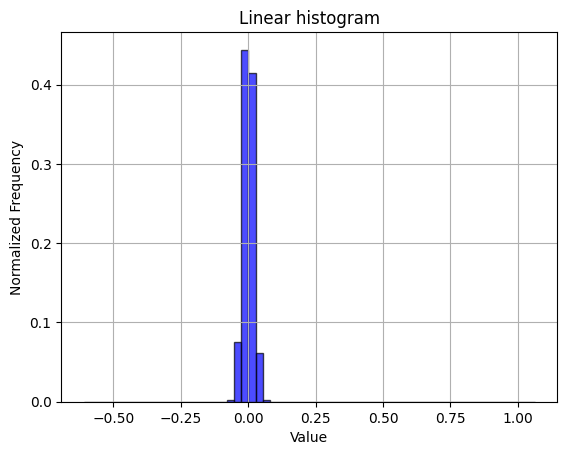

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

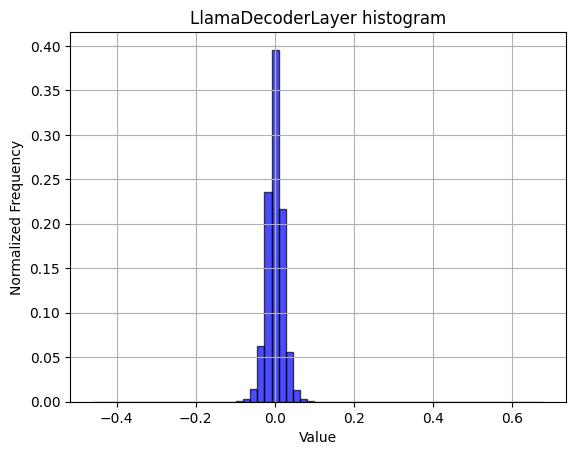

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.96046448e-08 1.19209290e-07
 5.96046448e-08 1.78813934e-07 1.19209290e-07 1.19209290e-07
 1.19209290e-07 1.19209290e-07 4.76837158e-07 7.74860382e-07
 6.55651093e-07 1.43051147e-06 2.68220901e-06 8.40425491e-06
 2.83122063e-05 1.09970570e-04 5.17725945e-04 2.28863955e-03
 9.32425261e-03 3.48138809e-02 1.08141482e-01 2.51935244e-01
 3.17236722e-01 1.82585657e-01 6.66764975e-02 1.97333097e-02
 5.07712364e-03 1.17439032e-03 2.54154205e-04 5.89489937e-05
 1.62124634e-05 5.36441803e-06 2.02655792e-06 1.37090683e-06
 1.19209290e-06 5.96046448e-07 2.38418579e-07 3.57627869e-07
 5.96046448e-08 1.19209290e-07 5.96046448e-08 2.38418579e-07
 5.96046448e-08 5.96046448e-08 5.96046448e-08 5.96046448e-08
 1.19209290e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

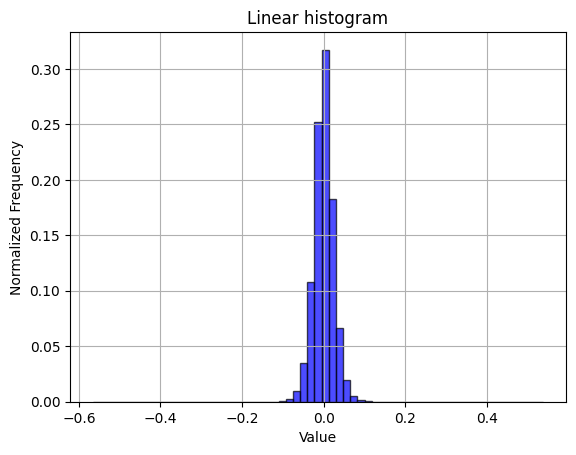

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 1.19209290e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.19209290e-07 2.38418579e-07 0.00000000e+00
 3.57627869e-07 4.76837158e-07 4.17232513e-07 4.17232513e-07
 1.37090683e-06 1.25169754e-06 2.02655792e-06 2.68220901e-06
 3.57627869e-06 4.29153442e-06 9.11951065e-06 1.57952309e-05
 2.77757645e-05 6.62207603e-05 1.24812126e-04 2.71439552e-04
 6.02900982e-04 1.17838383e-03 2.38794088e-03 4.63289022e-03
 9.38147306e-03 1.73935294e-02 3.00453901e-02 5.31067848e-02
 8.62910748e-02 1.29684269e-01 1.64908648e-01 1.64792001e-01
 1.29613519e-01 8.62616897e-02 5.30472994e-02 3.01329494e-02
 1.73443556e-02 9.03761387e-03 4.93502617e-03 2.37303972e-03
 1.17480755e-03 6.12556934e-04 2.68161297e-04 1.27732754e-04
 6.12139702e-05 3.18288803e-05 1.44839287e-05 7.33137131e-06
 5.66244125e-06 3.69548798e-06 2.38418579e-06 1.66893005e-06
 1.31130219e-06 1.13248825e-06 1.13248825e-06 6.55651093e-07
 3.

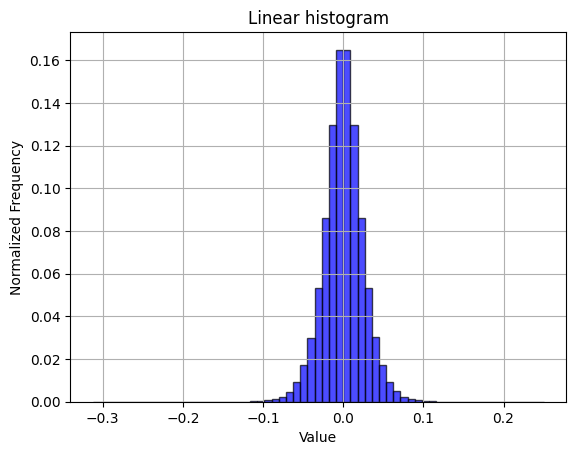

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.78813934e-07 0.00000000e+00 5.96046448e-08 5.96046448e-08
 0.00000000e+00 1.78813934e-07 1.19209290e-07 2.38418579e-07
 5.36441803e-07 5.36441803e-07 1.54972076e-06 2.50339508e-06
 9.77516174e-06 5.66840172e-05 2.86757946e-04 1.37680769e-03
 5.52552938e-03 1.80747509e-02 5.03056645e-02 1.08511090e-01
 1.75819159e-01 2.17139661e-01 1.93241239e-01 1.28583074e-01
 6.51372075e-02 2.54735351e-02 7.74919987e-03 2.12275982e-03
 4.62651253e-04 9.56654549e-05 1.51991844e-05 3.15904617e-06
 1.60932541e-06 9.53674316e-07 4.76837158e-07 4.17232513e-07
 2.38418579e-07 5.96046448e-08 5.96046448e-08 1.78813934e-07
 5.96046448e-08 5.96046448e-08 1.78813934e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

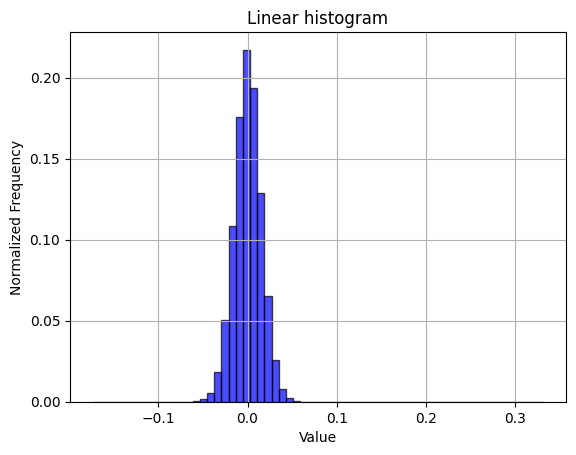

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 5.96046448e-08 1.19209290e-07 1.78813934e-07
 1.78813934e-07 1.19209290e-07 1.19209290e-07 1.78813934e-07
 5.96046448e-08 5.96046448e-08 2.98023224e-07 5.36441803e-07
 1.78813934e-07 4.76837158e-07 8.34465027e-07 9.53674316e-07
 1.07288361e-06 1.72853470e-06 2.20537186e-06 4.11272049e-06
 9.53674316e-06 2.30610371e-04 7.35431910e-03 9.69347358e-02
 3.80053282e-01 3.96742642e-01 1.09259486e-01 9.09811258e-03
 2.79545784e-04 1.09672546e-05 4.47034836e-06 2.92062759e-06
 1.43051147e-06 1.13248825e-06 7.74860382e-07 7.74860382e-07
 3.57627869e-07 0.00000000e+00 2.98023224e-07 2.38418579e-07
 1.19209290e-07 1.19209290e-07 5.96046448e-08 1.19209290e-07
 0.00000000e+00 0.00000000e+00 1.78813934e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.96046448e-08 0.00000000e+00
 0.

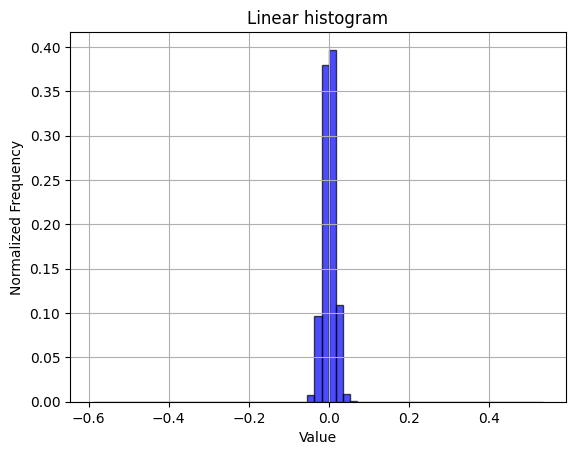

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 1.49011612e-08 0.00000000e+00 0.00000000e+00
 1.49011612e-08 0.00000000e+00 0.00000000e+00 1.49011612e-08
 0.00000000e+00 1.49011612e-08 2.98023224e-08 5.96046448e-08
 7.45058060e-08 5.96046448e-08 5.96046448e-08 8.94069672e-08
 7.45058060e-08 5.96046448e-08 2.23517418e-07 2.98023224e-07
 4.91738319e-07 7.45058060e-07 1.50501728e-06 2.53319740e-06
 6.55651093e-06 2.26497650e-05 9.02116299e-05 4.29019332e-04
 1.88340247e-03 7.47688115e-03 3.15076113e-02 1.36084840e-01
 3.57378632e-01 3.24024096e-01 1.08425707e-01 2.47820467e-02
 5.96827269e-03 1.47990882e-03 3.33592296e-04 7.04079866e-05
 1.84625387e-05 5.3

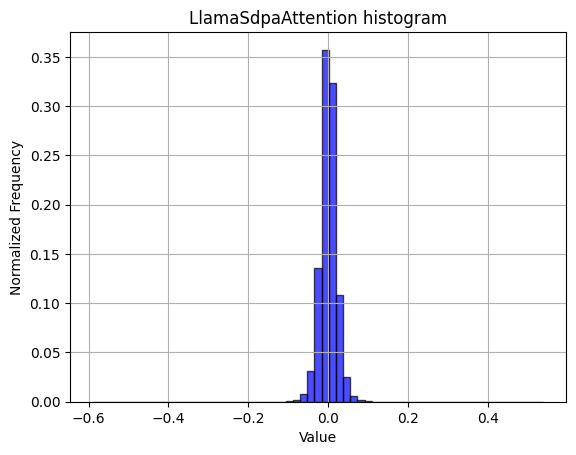

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 2.21784725e-08 2.21784725e-08 2.21784725e-08
 4.43569449e-08 4.43569449e-08 2.21784725e-08 4.43569449e-08
 8.87138899e-08 1.10892362e-07 1.10892362e-07 1.33070835e-07
 4.21390977e-07 6.20997229e-07 8.64960427e-07 1.64120696e-06
 2.72795211e-06 4.54658686e-06 8.09514245e-06 1.45712564e-05
 2.62149545e-05 5.66659972e-05 1.42008759e-04 4.33833100e-04
 1.71976311e-03 6.58858100e-03 2.15178201e-02 6.07295369e-02
 1.26915089e-01 1.97589453e-01 2.24152033e-01 1.81750076e-01
 1.07615072e-01 4.78685290e-02 1.64969245e-02 4.58579840e-03
 1.24753908e-03 3.22474990e-04 1.09539476e-04 4.76837158e-05
 2.32873961e-05 1.16436980e-05 6.65354174e-06 4.08083894e-06
 2.19566877e-06 1.53031460e-06 5.98818757e-07 3.77034032e-07
 2.88320142e-07 1.10892362e-07 8.87138899e-08 1.10892362e-07
 2.21784725e-08 8.87138899e-08 2.21784725e-08 2.21784725e-08
 0.00000000e+00 2.21784725e-08 0.00000000e+00 0.00000000e+00
 2

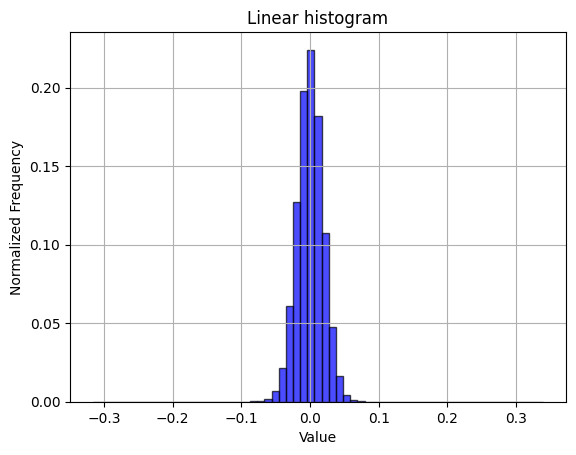

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[4.43569449e-08 2.21784725e-08 0.00000000e+00 2.21784725e-08
 8.87138899e-08 1.10892362e-07 1.99606252e-07 1.10892362e-07
 1.55249307e-07 2.21784725e-07 6.87532647e-07 2.97191531e-06
 2.61705975e-05 2.08433284e-04 1.45280084e-03 7.52402461e-03
 2.88765042e-02 7.87429588e-02 1.59236797e-01 2.26546421e-01
 2.25644045e-01 1.57446373e-01 7.72726369e-02 2.81176456e-02
 7.27935170e-03 1.38462422e-03 2.08056250e-04 2.41745350e-05
 2.61705975e-06 7.98425009e-07 3.10498615e-07 1.99606252e-07
 1.33070835e-07 6.65354174e-08 2.21784725e-08 4.43569449e-08
 2.21784725e-08 4.43569449e-08 2.21784725e-08 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0

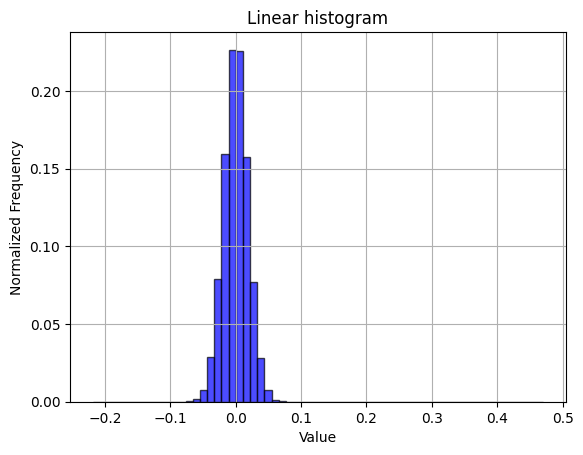

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 2.21784725e-08 0.00000000e+00 1.10892362e-07
 1.10892362e-07 1.10892362e-07 1.55249307e-07 3.10498615e-07
 2.21784725e-07 6.87532647e-07 1.17545904e-06 2.92755837e-06
 9.31495844e-06 2.51126844e-04 6.98189403e-03 7.41188582e-02
 2.94296464e-01 4.02272224e-01 1.89102173e-01 3.09230893e-02
 1.97100085e-03 5.85511673e-05 4.87926394e-06 1.59685002e-06
 1.15328057e-06 6.43175702e-07 3.10498615e-07 3.10498615e-07
 8.87138899e-08 1.33070835e-07 4.43569449e-08 8.87138899e-08
 4.43569449e-08 2.21784725e-08 2.21784725e-08 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2

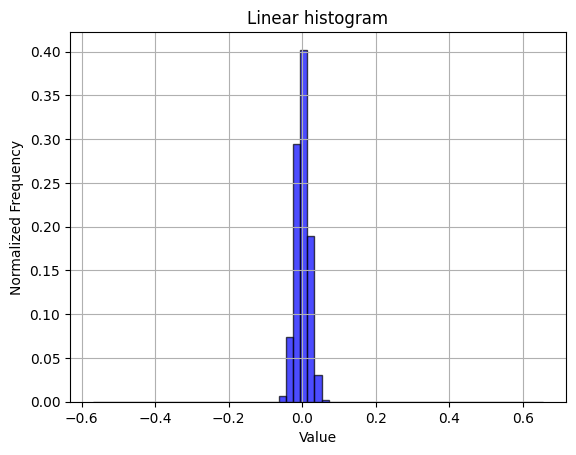

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

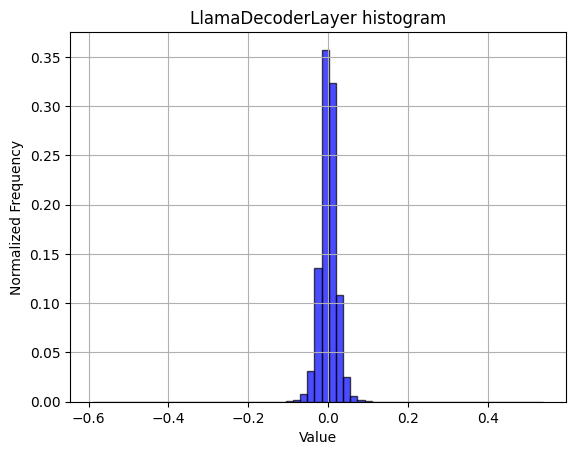

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 5.96046448e-08 1.78813934e-07 1.19209290e-07 5.96046448e-08
 0.00000000e+00 5.96046448e-08 1.78813934e-07 1.78813934e-07
 3.57627869e-07 1.78813934e-07 2.98023224e-07 1.78813934e-07
 5.96046448e-07 7.15255737e-07 1.19209290e-06 1.25169754e-06
 2.62260437e-06 4.88758087e-06 8.94069672e-06 2.53915787e-05
 8.96453857e-05 4.80294228e-04 2.57498026e-03 1.24472976e-02
 4.85230684e-02 1.48347676e-01 3.01636398e-01 2.91127264e-01
 1.36984468e-01 4.38908935e-02 1.10540986e-02 2.26682425e-03
 4.11450863e-04 7.86185265e-05 1.87158585e-05 8.88109207e-06
 3.33786011e-06 2.68220901e-06 1.84774399e-06 1.07288361e-06
 7.74860382e-07 4.76837158e-07 2.98023224e-07 2.38418579e-07
 2.38418579e-07 2.38418579e-07 5.96046448e-08 0.00000000e+00
 1.78813934e-07 5.96046448e-08 1.19209290e-07 5.96046448e-08
 0.00000000e+00 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.

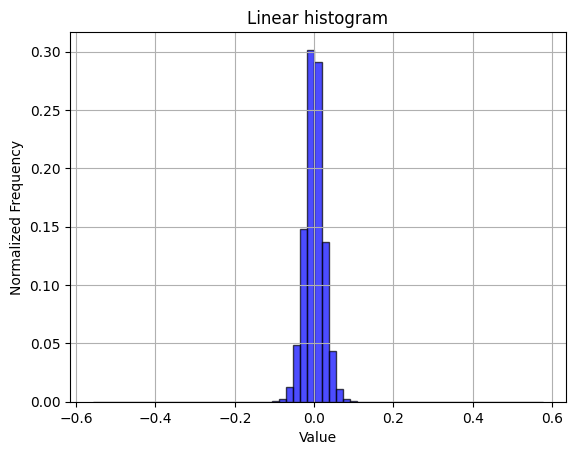

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.78813934e-07 5.96046448e-08 1.19209290e-07 1.19209290e-07
 4.76837158e-07 4.17232513e-07 3.57627869e-07 9.53674316e-07
 1.19209290e-06 1.25169754e-06 2.86102295e-06 3.99351120e-06
 5.12599945e-06 7.68899918e-06 1.47223473e-05 2.70009041e-05
 5.27501106e-05 1.08957291e-04 2.08020210e-04 4.29034233e-04
 8.40544701e-04 1.75815821e-03 3.13413143e-03 6.10870123e-03
 1.08855367e-02 1.89339519e-02 3.17829847e-02 5.08362055e-02
 7.89179206e-02 1.13313437e-01 1.43085957e-01 1.50954366e-01
 1.30202115e-01 9.64980125e-02 6.44991994e-02 4.04747725e-02
 2.48516202e-02 1.45505071e-02 8.21667910e-03 4.51248884e-03
 2.29877234e-03 1.26338005e-03 5.93423843e-04 3.12387943e-04
 1.45137310e-04 7.48038292e-05 3.54051590e-05 2.21133232e-05
 1.17421150e-05 6.19888306e-06 3.69548798e-06 3.33786011e-06
 2.02655792e-06 1.37090683e-06 7.15255737e-07 6.55651093e-07
 7.15255737e-07 4.76837158e-07 4.17232513e-07 4.17232513e-07
 5.

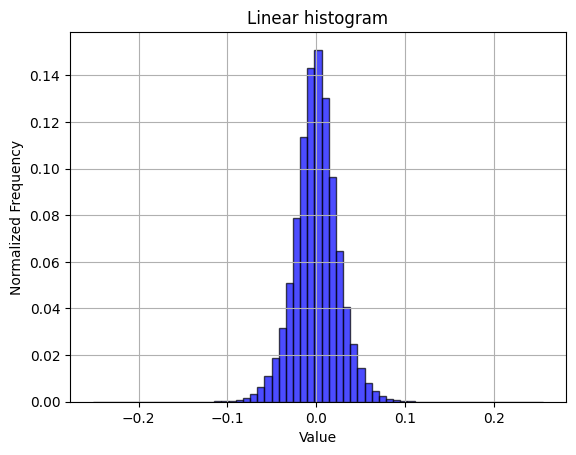

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 5.96046448e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.96046448e-08 5.96046448e-08
 1.19209290e-07 1.19209290e-07 2.38418579e-07 1.19209290e-07
 1.19209290e-07 3.57627869e-07 5.96046448e-07 5.36441803e-07
 8.94069672e-07 1.60932541e-06 7.27176666e-06 3.63588333e-05
 1.42753124e-04 5.86867332e-04 2.04312801e-03 5.93733788e-03
 1.59291029e-02 3.69809270e-02 7.03176260e-02 1.15187347e-01
 1.56538248e-01 1.77080035e-01 1.59437954e-01 1.19232118e-01
 7.40374327e-02 3.95026803e-02 1.71607733e-02 6.74951077e-03
 2.19786167e-03 6.61432743e-04 1.68681145e-04 4.44054604e-05
 9.65595245e-06 2.20537186e-06 1.13248825e-06 7.74860382e-07
 5.96046448e-08 1.78813934e-07 2.38418579e-07 2.38418579e-07
 2.38418579e-07 1.19209290e-07 0.00000000e+00 1.19209290e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.96046448e-08
 5.96046448e-08 0.00000000e+00 5.96046448e-08 0.00000000e+00
 0.

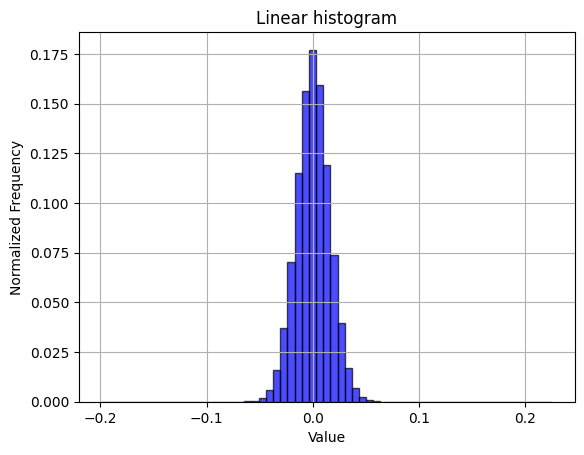

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.19209290e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.96046448e-08 0.00000000e+00 0.00000000e+00
 5.96046448e-08 0.00000000e+00 0.00000000e+00 1.78813934e-07
 1.78813934e-07 1.19209290e-07 5.96046448e-08 5.96046448e-08
 2.98023224e-07 5.36441803e-07 3.57627869e-07 2.98023224e-07
 7.74860382e-07 4.17232513e-07 7.15255737e-07 1.19209290e-06
 1.37090683e-06 2.20537186e-06 2.38418579e-06 4.29153442e-06
 7.74860382e-06 2.16364861e-05 1.82986259e-04 2.68602371e-03
 2.49365568e-02 1.22159600e-01 2.98102975e-01 3.32571030e-01
 1.70701027e-01 4.25115824e-02 5.61457872e-03 4.26411629e-04
 3.50475311e-05 9.83476639e-06 5.42402267e-06 3.51667404e-06
 1.37090683e-06 1.60932541e-06 1.13248825e-06 7.15255737e-07
 5.96046448e-07 1.78813934e-07 4.17232513e-07 3.57627869e-07
 2.38418579e-07 2.38418579e-07 2.98023224e-07 1.78813934e-07
 2.38418579e-07 2.38418579e-07 1.78813934e-07 1.19209290e-07
 1.

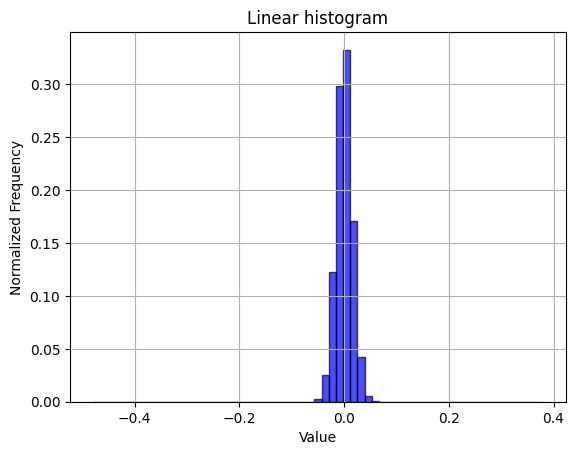

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 0.00000000e+00 0.00000000e+00 1.49011612e-08
 4.47034836e-08 4.47034836e-08 2.98023224e-08 1.49011612e-08
 1.49011612e-08 1.49011612e-08 5.96046448e-08 4.47034836e-08
 1.04308128e-07 1.19209290e-07 1.04308128e-07 5.96046448e-08
 2.68220901e-07 3.87430191e-07 4.91738319e-07 8.04662704e-07
 1.23679638e-06 2.80141830e-06 5.37931919e-06 1.63465738e-05
 6.23762608e-05 3.05086374e-04 1.52167678e-03 6.94388151e-03
 3.04747224e-02 1.32134855e-01 3.45455766e-01 3.29751506e-01
 1.18487701e-01 2.69842148e-02 6.16140664e-03 1.34065747e-03
 2.68772244e-04 5.44637442e-05 1.31577253e-05 5.21540642e-06
 2.16066837e-06 1.2

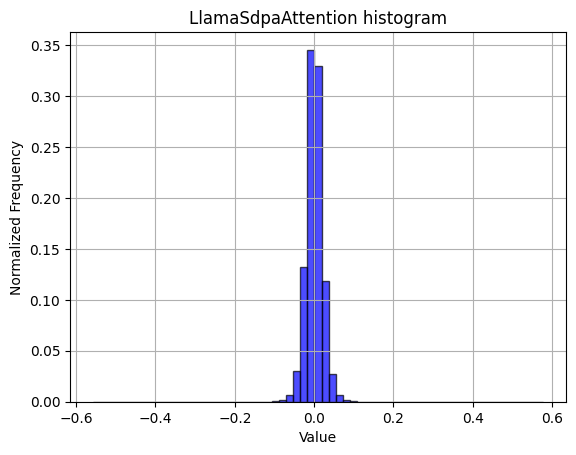

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[6.65354174e-08 2.21784725e-08 2.21784725e-08 2.21784725e-08
 4.43569449e-08 2.21784725e-08 4.43569449e-08 4.43569449e-08
 1.55249307e-07 1.10892362e-07 3.54855560e-07 4.21390977e-07
 1.06456668e-06 1.64120696e-06 2.59488128e-06 5.67768895e-06
 1.38837238e-05 3.05397566e-05 7.84896141e-05 2.35091808e-04
 9.09250836e-04 4.01621087e-03 1.64686469e-02 5.29759207e-02
 1.29849301e-01 2.18896467e-01 2.47438120e-01 1.86056869e-01
 9.56810131e-02 3.48123950e-02 9.55282256e-03 2.19624542e-03
 5.34767328e-04 1.47575556e-04 5.40711159e-05 2.08034072e-05
 9.11535219e-06 5.23411950e-06 2.24002572e-06 1.26417293e-06
 6.87532647e-07 1.99606252e-07 1.99606252e-07 1.33070835e-07
 4.43569449e-08 0.00000000e+00 2.21784725e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0

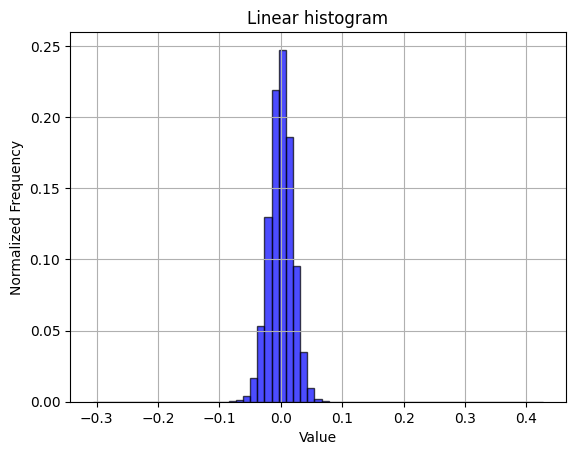

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 6.65354174e-08 4.43569449e-08 6.65354174e-08
 2.21784725e-08 0.00000000e+00 6.65354174e-08 6.65354174e-08
 8.87138899e-08 1.77427780e-07 3.10498615e-07 3.10498615e-07
 7.54068064e-07 2.92755837e-06 1.82972398e-05 1.76673712e-04
 1.40037093e-03 7.96459996e-03 3.27366674e-02 9.19827084e-02
 1.85287254e-01 2.47875746e-01 2.22885487e-01 1.34011668e-01
 5.60100023e-02 1.58935148e-02 3.21062221e-03 4.73865243e-04
 5.81519548e-05 6.25432924e-06 1.37506529e-06 5.98818757e-07
 3.32677087e-07 2.43963197e-07 1.77427780e-07 1.33070835e-07
 8.87138899e-08 6.65354174e-08 2.21784725e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.43569449e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

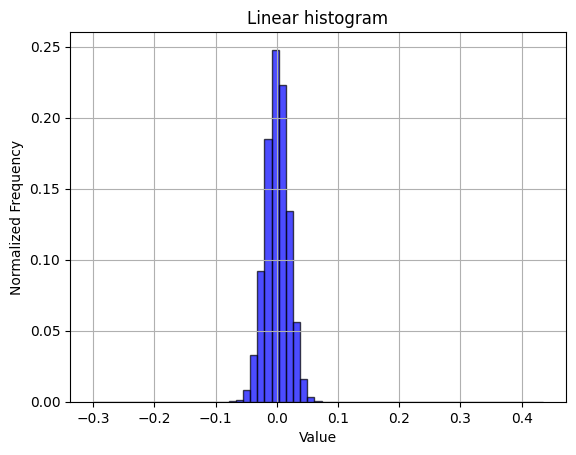

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 2.21784725e-08 0.00000000e+00 6.65354174e-08
 0.00000000e+00 1.33070835e-07 1.33070835e-07 2.66141670e-07
 4.43569449e-07 5.76640284e-07 1.92952711e-06 5.56679659e-06
 1.36486320e-04 1.12019251e-02 1.93753553e-01 5.38818005e-01
 2.38615768e-01 1.72243118e-02 2.30101652e-04 6.78661258e-06
 1.61902849e-06 1.06456668e-06 4.21390977e-07 3.77034032e-07
 1.10892362e-07 2.21784725e-08 4.43569449e-08 4.43569449e-08
 8.87138899e-08 0.00000000e+00 2.21784725e-08 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

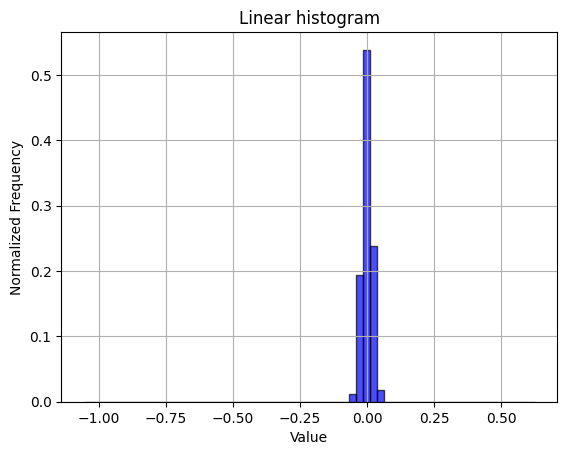

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

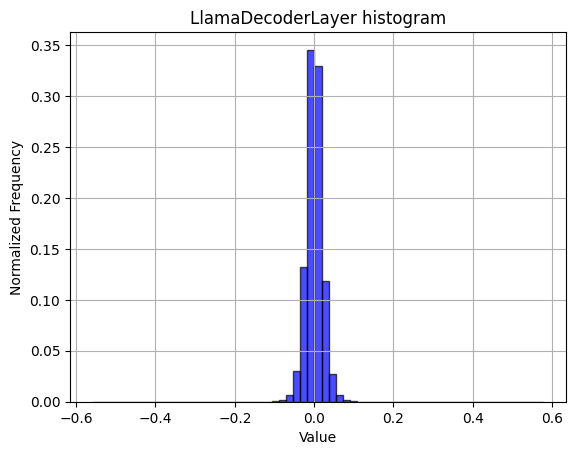

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.96046448e-08 1.78813934e-07
 0.00000000e+00 5.96046448e-08 1.19209290e-07 5.96046448e-08
 5.96046448e-08 5.96046448e-08 1.19209290e-07 7.74860382e-07
 2.98023224e-07 4.76837158e-07 5.36441803e-07 1.43051147e-06
 3.09944153e-06 8.40425491e-06 2.81929970e-05 1.74939632e-04
 1.80727243e-03 1.82712078e-02 1.33345306e-01 4.53047633e-01
 3.21688175e-01 6.33488894e-02 7.47227669e-03 6.90221786e-04
 8.10623169e-05 1.77025795e-05 5.42402267e-06 1.84774399e-06
 1.13248825e-06 4.76837158e-07 4.17232513e-07 4.17232513e-07
 2.98023224e-07 1.78813934e-07 2.98023224e-07 5.96046448e-08
 1.19209290e-07 1.19209290e-07 5.96046448e-08 5.96046448e-08
 1.78813934e-07 0.00000000e+00 5.96046448e-08 0.00000000e+00
 0.

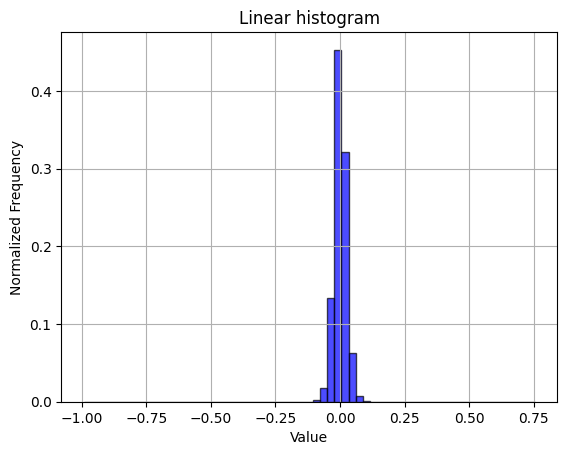

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 5.96046448e-08 5.96046448e-08 2.98023224e-07
 2.38418579e-07 2.98023224e-07 5.96046448e-08 4.17232513e-07
 4.17232513e-07 1.13248825e-06 1.13248825e-06 1.66893005e-06
 2.68220901e-06 4.17232513e-06 4.47034836e-06 5.36441803e-06
 1.08480453e-05 1.85966492e-05 3.95774841e-05 8.71419907e-05
 1.83045864e-04 4.03523445e-04 8.48472118e-04 1.75273418e-03
 3.54665518e-03 7.33697414e-03 1.33587718e-02 2.41417289e-02
 4.32462692e-02 7.25809932e-02 1.12414837e-01 1.54509366e-01
 1.70596898e-01 1.46249235e-01 1.02382660e-01 6.37742281e-02
 3.73108983e-02 2.16964483e-02 1.14722252e-02 6.10727072e-03
 3.02898884e-03 1.49816275e-03 7.22169876e-04 3.42428684e-04
 1.60992146e-04 6.98566437e-05 3.38554382e-05 1.96099281e-05
 1.05500221e-05 6.25848770e-06 4.17232513e-06 3.27825546e-06
 2.26497650e-06 1.37090683e-06 9.53674316e-07 1.19209290e-06
 6.55651093e-07 7.15255737e-07 2.38418579e-07 5.96046448e-08
 5.

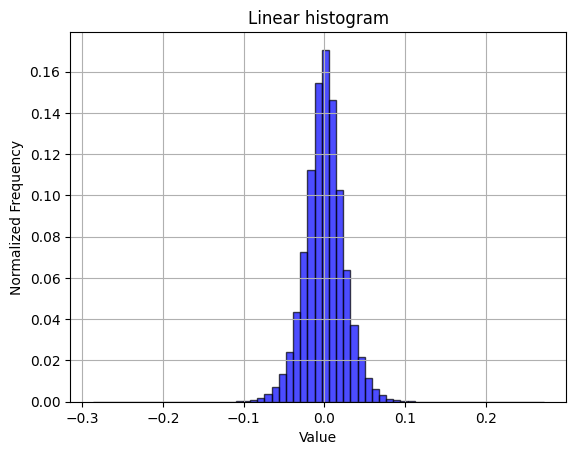

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 1.19209290e-07 0.00000000e+00
 0.00000000e+00 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.19209290e-07 0.00000000e+00 1.19209290e-07
 2.38418579e-07 4.17232513e-07 1.78813934e-07 7.74860382e-07
 2.32458115e-06 6.49690628e-06 2.79545784e-05 1.10149384e-04
 4.10437584e-04 1.44106150e-03 4.53722477e-03 1.24893188e-02
 2.95189619e-02 6.09110594e-02 1.02633059e-01 1.48713052e-01
 1.75040185e-01 1.67374432e-01 1.31571531e-01 8.45513940e-02
 4.66610789e-02 2.15856433e-02 8.34727287e-03 2.83604860e-03
 8.93950462e-04 2.46345997e-04 6.84261322e-05 1.44243240e-05
 3.57627869e-06 8.94069672e-07 4.76837158e-07 1.78813934e-07
 2.38418579e-07 5.96046448e-08 0.00000000e+00 5.96046448e-08
 5.96046448e-08 5.96046448e-08 1.19209290e-07 5.96046448e-08
 0.00000000e+00 5.96046448e-08 1.19209290e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.

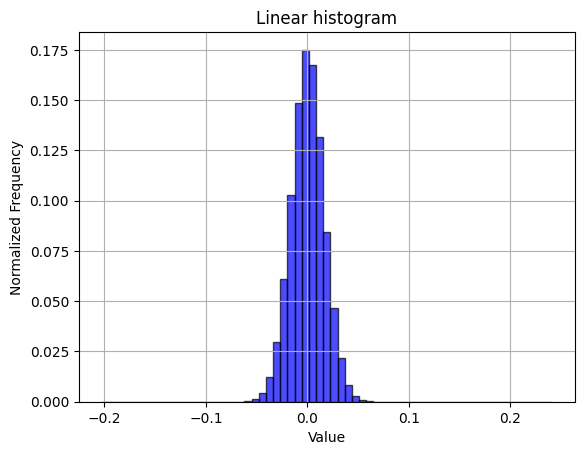

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 5.96046448e-08 5.96046448e-08 0.00000000e+00
 1.19209290e-07 5.96046448e-08 1.19209290e-07 1.78813934e-07
 2.38418579e-07 2.38418579e-07 2.98023224e-07 7.74860382e-07
 4.17232513e-07 0.00000000e+00 2.38418579e-07 2.98023224e-07
 4.76837158e-07 6.55651093e-07 7.15255737e-07 4.17232513e-07
 8.94069672e-07 1.49011612e-06 1.78813934e-06 1.96695328e-06
 3.45706940e-06 6.19888306e-06 1.40666962e-05 1.31607056e-04
 1.53642893e-03 1.29655004e-02 6.70751929e-02 2.00065255e-01
 3.13586473e-01 2.59702504e-01 1.13341510e-01 2.72405148e-02
 3.89021635e-03 3.75211239e-04 3.22461128e-05 6.31809235e-06
 3.99351120e-06 2.38418579e-06 1.49011612e-06 1.25169754e-06
 8.94069672e-07 7.74860382e-07 5.36441803e-07 7.15255737e-07
 4.76837158e-07 5.36441803e-07 2.38418579e-07 6.55651093e-07
 2.38418579e-07 2.98023224e-07 2.38418579e-07 1.78813934e-07
 2.98023224e-07 1.78813934e-07 5.96046448e-08 0.00000000e+00
 1.

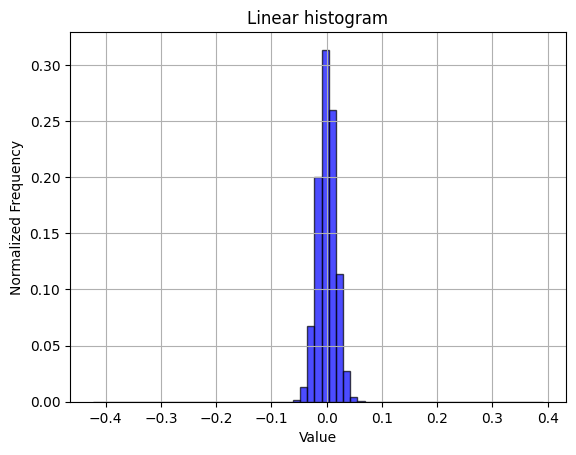

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.49011612e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.49011612e-08 4.47034836e-08
 0.00000000e+00 1.49011612e-08 2.98023224e-08 1.49011612e-08
 2.98023224e-08 4.47034836e-08 7.45058060e-08 2.23517418e-07
 2.08616257e-07 3.72529030e-07 4.61935997e-07 6.85453415e-07
 1.84774399e-06 4.73856926e-06 1.41561031e-05 9.94056463e-05
 1.05315447e-03 1.04242861e-02 1.07416898e-01 5.03298312e-01
 3.30933645e-01 4.20666933e-02 4.22100723e-03 4.05162573e-04
 4.34666872e-05 8.5

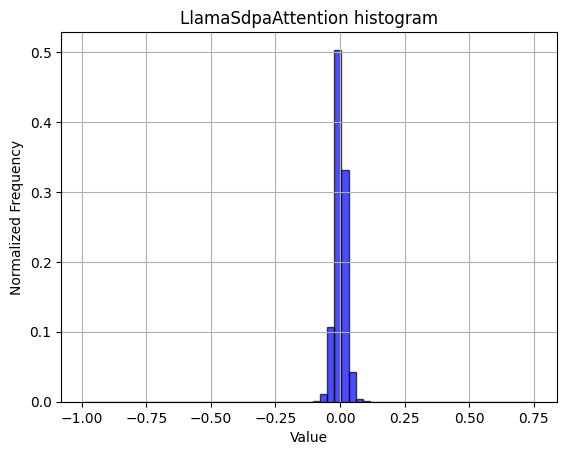

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 2.21784725e-08
 2.21784725e-08 1.33070835e-07 4.43569449e-08 4.43569449e-08
 1.55249307e-07 2.43963197e-07 7.31889592e-07 8.64960427e-07
 2.66141670e-06 5.76640284e-06 1.28856925e-05 3.20478927e-05
 9.74965650e-05 3.52415928e-04 1.68248110e-03 9.22378274e-03
 4.00355583e-02 1.20727206e-01 2.35541920e-01 2.77919082e-01
 1.96407296e-01 8.70196099e-02 2.44982520e-02 5.13799800e-03
 9.86210136e-04 2.11028166e-04 6.40070716e-05 2.27994697e-05
 9.66981400e-06 3.48202018e-06 1.84081322e-06 8.42781954e-07
 5.32283339e-07 2.66141670e-07 1.77427780e-07 6.65354174e-08
 8.87138899e-08 8.87138899e-08 4.43569449e-08 0.00000000e+00
 4.43569449e-08 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0

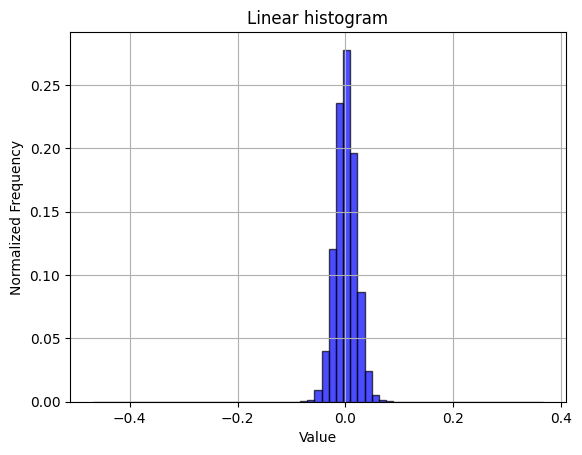

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.43569449e-08
 2.21784725e-08 2.21784725e-08 2.21784725e-08 2.21784725e-08
 0.00000000e+00 8.87138899e-08 2.21784725e-08 6.65354174e-08
 1.55249307e-07 1.33070835e-07 3.10498615e-07 1.46377918e-06
 1.34179758e-05 1.71617020e-04 1.62186734e-03 1.09846204e-02
 4.89943527e-02 1.39573940e-01 2.46812687e-01 2.70182587e-01
 1.82073904e-01 7.53761114e-02 2.03793104e-02 3.39361679e-03
 3.81647154e-04 3.34007795e-05 2.92755837e-06 6.65354174e-07
 5.10104867e-07 4.43569449e-08 1.33070835e-07 8.87138899e-08
 2.21784725e-08 8.87138899e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

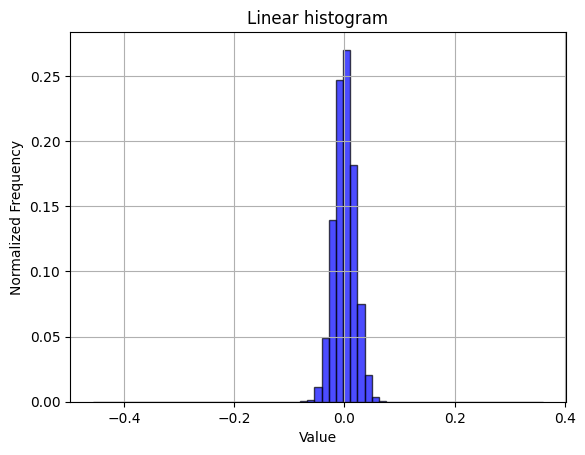

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.43569449e-08
 4.43569449e-08 1.10892362e-07 1.33070835e-07 1.10892362e-07
 2.21784725e-08 3.10498615e-07 4.21390977e-07 7.54068064e-07
 1.72992085e-06 3.32677087e-06 2.08699426e-05 7.86914382e-04
 1.65443642e-02 1.32613160e-01 3.70669032e-01 3.51613821e-01
 1.13989187e-01 1.31748776e-02 5.57389370e-04 1.60128571e-05
 3.37112782e-06 1.26417293e-06 9.75852789e-07 4.65747922e-07
 2.43963197e-07 3.77034032e-07 1.99606252e-07 6.65354174e-08
 8.87138899e-08 1.10892362e-07 2.21784725e-08 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2

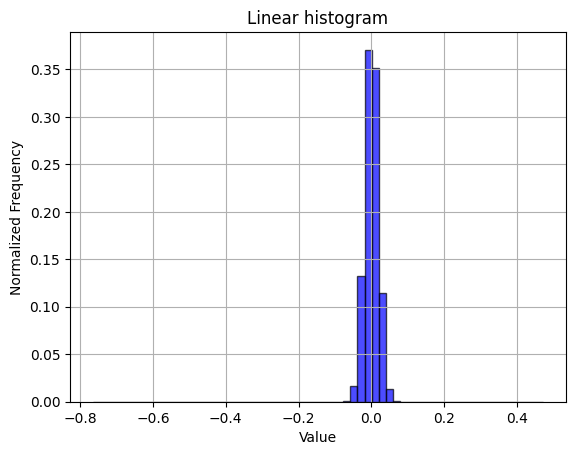

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

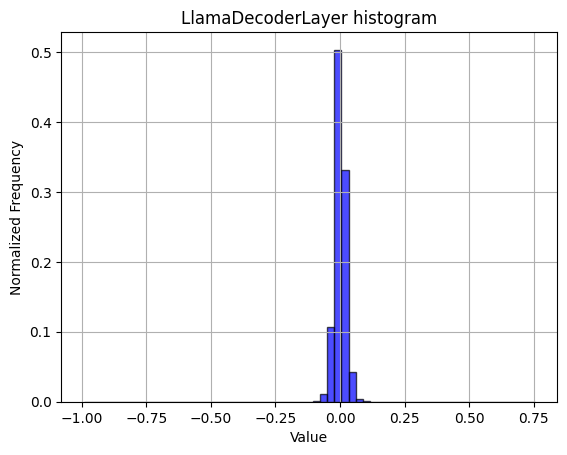

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 5.96046448e-08 0.00000000e+00 1.19209290e-07
 5.96046448e-08 0.00000000e+00 5.96046448e-08 1.19209290e-07
 0.00000000e+00 5.96046448e-08 5.96046448e-08 1.19209290e-07
 2.38418579e-07 1.78813934e-07 4.76837158e-07 5.96046448e-07
 5.36441803e-07 1.49011612e-06 3.69548798e-06 1.42455101e-05
 9.59038734e-05 1.26606226e-03 1.55653358e-02 1.21870995e-01
 4.29817855e-01 3.46849263e-01 7.54225850e-02 8.39787722e-03
 6.24835491e-04 5.29289246e-05 7.39097595e-06 2.80141830e-06
 1.43051147e-06 6.55651093e-07 2.38418579e-07 2.98023224e-07
 2.38418579e-07 3.57627869e-07 5.96046448e-08 1.78813934e-07
 1.78813934e-07 5.96046448e-08 1.19209290e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.96046448e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

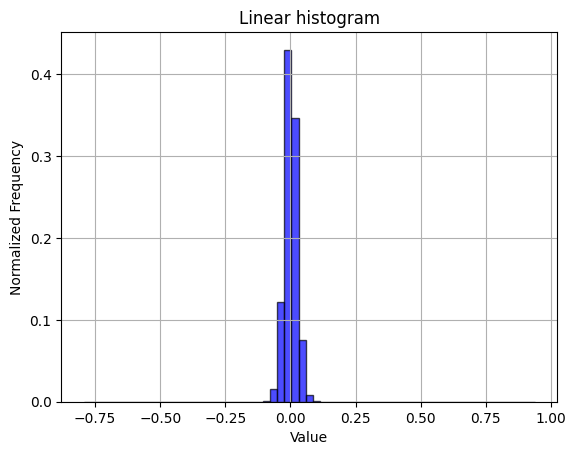

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 1.78813934e-07
 1.19209290e-07 1.19209290e-07 1.19209290e-07 2.38418579e-07
 5.36441803e-07 8.34465027e-07 5.96046448e-07 1.19209290e-06
 1.54972076e-06 1.84774399e-06 3.57627869e-06 4.05311584e-06
 7.39097595e-06 8.70227814e-06 2.05039978e-05 3.34382057e-05
 6.72936440e-05 1.53183937e-04 3.51488590e-04 7.81118870e-04
 1.79165602e-03 3.92502546e-03 8.22359324e-03 1.61677599e-02
 3.14760804e-02 5.57818413e-02 9.33304429e-02 1.37724757e-01
 1.71532154e-01 1.66531503e-01 1.25785351e-01 8.35321546e-02
 4.89847064e-02 2.71465778e-02 1.37714744e-02 7.03591108e-03
 3.18902731e-03 1.40309334e-03 6.66379929e-04 2.98500061e-04
 1.30772591e-04 5.99026680e-05 3.12924385e-05 1.43051147e-05
 9.05990601e-06 6.85453415e-06 3.45706940e-06 2.38418579e-06
 1.78813934e-06 1.31130219e-06 4.17232513e-07 3.57627869e-07
 6.55651093e-07 4.76837158e-07 3.57627869e-07 2.38418579e-07
 0.

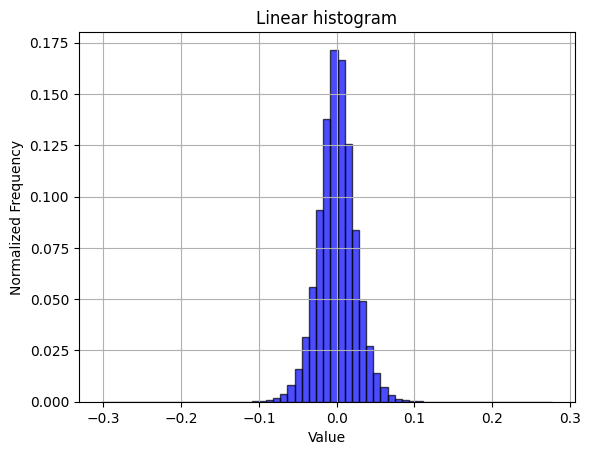

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 5.96046448e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.78813934e-07 5.96046448e-08
 1.78813934e-07 0.00000000e+00 2.98023224e-07 3.57627869e-07
 2.38418579e-07 1.78813934e-07 2.98023224e-07 5.36441803e-07
 1.37090683e-06 4.11272049e-06 1.22785568e-05 4.86969948e-05
 1.80125237e-04 6.26504421e-04 2.04735994e-03 5.59782982e-03
 1.36719346e-02 3.06610465e-02 5.64171672e-02 9.42386985e-02
 1.30627394e-01 1.56648159e-01 1.58538997e-01 1.34448946e-01
 9.84798074e-02 6.00482225e-02 3.31597328e-02 1.49994493e-02
 6.19328022e-03 2.33733654e-03 7.21096992e-04 2.06530094e-04
 6.04391098e-05 1.38878822e-05 3.93390656e-06 1.25169754e-06
 4.76837158e-07 2.38418579e-07 2.98023224e-07 1.19209290e-07
 5.96046448e-08 1.19209290e-07 1.78813934e-07 1.78813934e-07
 0.00000000e+00 0.00000000e+00 1.19209290e-07 5.96046448e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

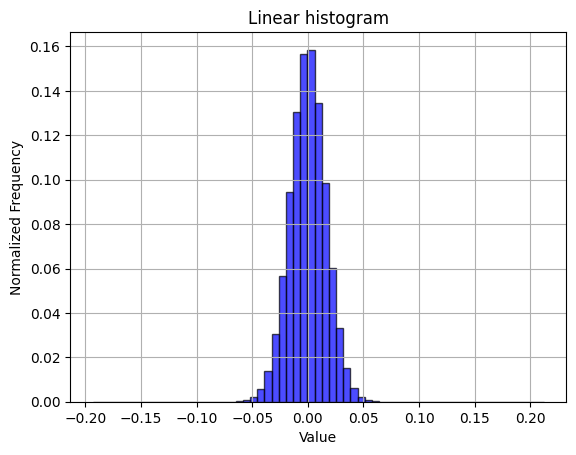

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 1.19209290e-07 5.96046448e-08 5.96046448e-08 5.96046448e-08
 1.19209290e-07 0.00000000e+00 2.38418579e-07 2.38418579e-07
 4.17232513e-07 2.98023224e-07 1.01327896e-06 3.57627869e-07
 6.55651093e-07 5.96046448e-07 1.01327896e-06 6.55651093e-07
 1.07288361e-06 2.26497650e-06 2.56299973e-06 2.92062759e-06
 4.76837158e-06 8.40425491e-06 5.20348549e-05 9.39786434e-04
 1.35600567e-02 9.54445004e-02 2.93116748e-01 3.66415501e-01
 1.86641634e-01 3.96645665e-02 3.88360023e-03 2.13265419e-04
 1.85370445e-05 5.72204590e-06 3.63588333e-06 2.56299973e-06
 1.96695328e-06 1.19209290e-06 1.13248825e-06 1.13248825e-06
 4.76837158e-07 7.15255737e-07 5.36441803e-07 4.76837158e-07
 2.98023224e-07 3.57627869e-07 1.78813934e-07 4.17232513e-07
 1.78813934e-07 1.19209290e-07 5.96046448e-08 0.00000000e+00
 1.78813934e-07 1.19209290e-07 1.19209290e-07 5.96046448e-08
 5.

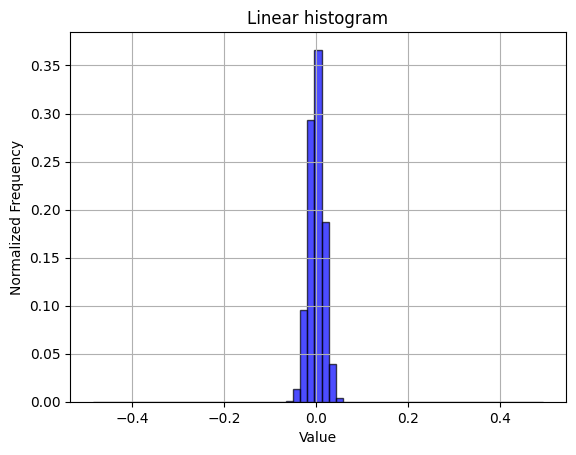

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 0.00000000e+00 0.00000000e+00 1.49011612e-08
 0.00000000e+00 1.49011612e-08 0.00000000e+00 2.98023224e-08
 1.49011612e-08 0.00000000e+00 1.49011612e-08 4.47034836e-08
 1.49011612e-08 4.47034836e-08 2.98023224e-08 7.45058060e-08
 8.94069672e-08 1.78813934e-07 2.98023224e-07 5.66244125e-07
 6.55651093e-07 1.46031380e-06 3.30805779e-06 1.11311674e-05
 6.45965338e-05 7.36564398e-04 8.65499675e-03 9.45229679e-02
 4.75298628e-01 3.64224762e-01 5.14083803e-02 4.64148819e-03
 3.79890203e-04 3.75211239e-05 6.94394112e-06 2.36928463e-06
 1.07288361e-06 7.00354576e-07 2.53319740e-07 1.93715096e-07
 1.93715096e-07 1.4

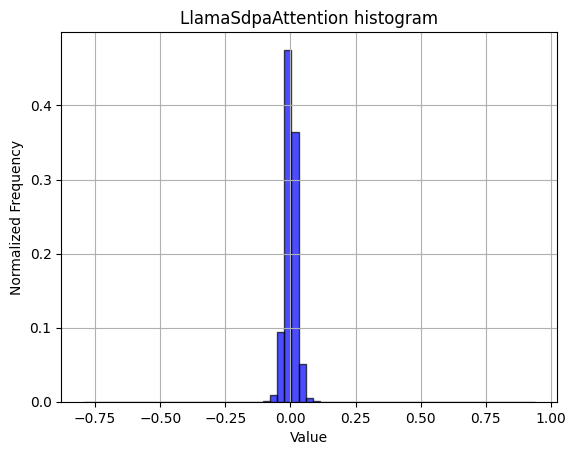

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 2.21784725e-08 0.00000000e+00 2.21784725e-08 2.21784725e-08
 0.00000000e+00 2.21784725e-08 2.21784725e-08 0.00000000e+00
 1.55249307e-07 8.87138899e-08 1.55249307e-07 6.65354174e-08
 5.54461812e-07 9.75852789e-07 1.97388405e-06 4.32480213e-06
 1.08452730e-05 2.78339830e-05 8.65847565e-05 3.06284705e-04
 1.30846334e-03 5.72142490e-03 2.23379800e-02 6.99367080e-02
 1.53430340e-01 2.32060100e-01 2.37982395e-01 1.64041674e-01
 7.80465326e-02 2.58785736e-02 6.76050852e-03 1.54969859e-03
 3.55986662e-04 9.75852789e-05 3.29128532e-05 1.11114147e-05
 4.25826672e-06 2.04041947e-06 6.65354174e-07 4.43569449e-07
 1.33070835e-07 1.55249307e-07 6.65354174e-08 2.21784725e-08
 8.87138899e-08 6.65354174e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.43569449e-08 0.00000000e+00
 0

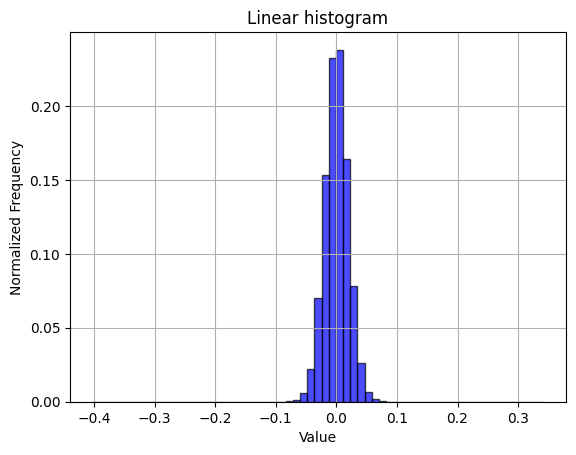

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 2.21784725e-08 2.21784725e-08 6.65354174e-08
 6.65354174e-08 2.21784725e-08 1.33070835e-07 8.87138899e-08
 2.21784725e-07 7.31889592e-07 2.52834586e-06 1.35954036e-05
 9.48795052e-05 5.84535821e-04 2.94707542e-03 1.10777921e-02
 3.39538441e-02 7.93133891e-02 1.43311745e-01 1.95568240e-01
 2.05300486e-01 1.61742787e-01 9.82890240e-02 4.54526280e-02
 1.66153575e-02 4.50688739e-03 1.02012102e-03 1.70907309e-04
 2.72795211e-05 3.79251879e-06 6.87532647e-07 3.77034032e-07
 8.87138899e-08 1.99606252e-07 1.10892362e-07 1.10892362e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 0.00000000e+00 4.43569449e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

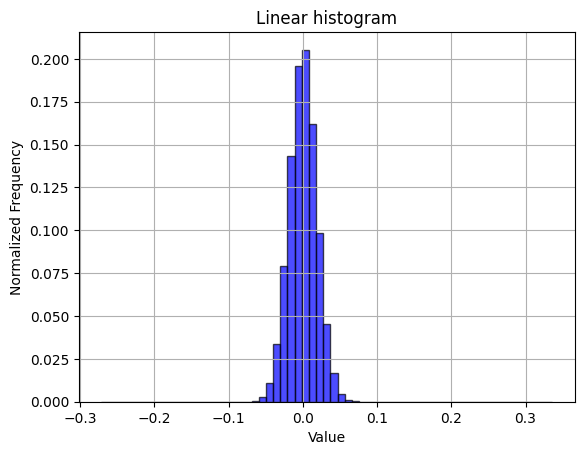

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 2.21784725e-08 6.65354174e-08 0.00000000e+00
 6.65354174e-08 8.87138899e-08 8.87138899e-08 2.21784725e-07
 3.77034032e-07 1.44160071e-06 3.37112782e-06 1.01843546e-04
 1.02468535e-02 1.82253926e-01 5.35655931e-01 2.52152155e-01
 1.93335733e-02 2.43031701e-04 4.63530075e-06 1.24199446e-06
 5.98818757e-07 1.99606252e-07 6.65354174e-08 0.00000000e+00
 8.87138899e-08 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

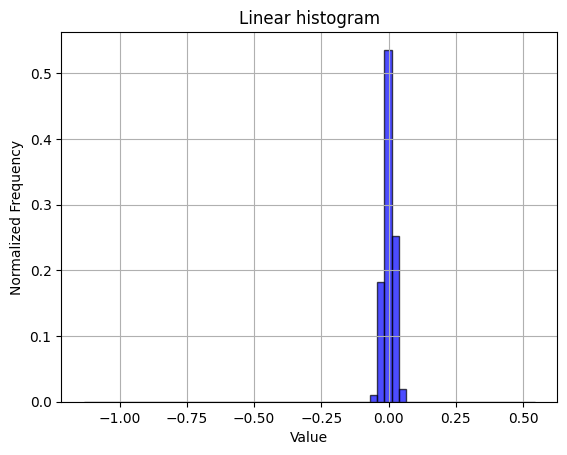

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

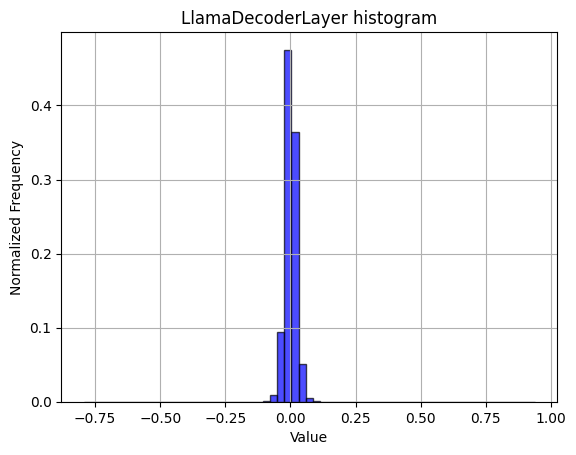

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.19209290e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 5.96046448e-08 0.00000000e+00 1.19209290e-07
 5.96046448e-08 5.96046448e-08 1.19209290e-07 5.96046448e-08
 2.38418579e-07 1.19209290e-07 1.78813934e-07 2.38418579e-07
 5.96046448e-07 1.78813934e-07 2.38418579e-07 4.17232513e-07
 8.34465027e-07 1.96695328e-06 4.17232513e-06 1.12652779e-05
 5.85317612e-05 6.68227673e-04 7.15667009e-03 4.98967767e-02
 2.17279613e-01 4.17638123e-01 2.38783419e-01 5.89861274e-02
 8.59308243e-03 8.25822353e-04 6.96778297e-05 1.34110451e-05
 3.57627869e-06 1.60932541e-06 7.15255737e-07 8.94069672e-07
 5.96046448e-07 2.98023224e-07 2.98023224e-07 2.38418579e-07
 3.57627869e-07 1.78813934e-07 5.96046448e-08 1.19209290e-07
 0.00000000e+00 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.96046448e-08 1.19209290e-07 0.00000000e+00
 5.

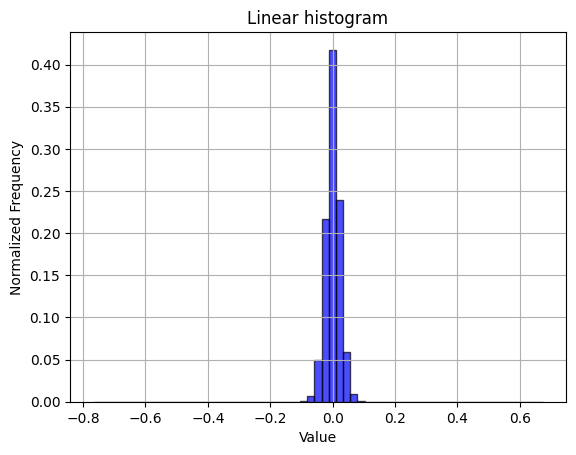

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.96046448e-08 5.96046448e-08 0.00000000e+00
 3.57627869e-07 4.76837158e-07 3.57627869e-07 5.96046448e-07
 1.31130219e-06 1.54972076e-06 2.44379044e-06 3.39746475e-06
 3.87430191e-06 8.70227814e-06 1.49011612e-05 2.96831131e-05
 7.33733177e-05 1.82271004e-04 4.78446484e-04 1.29538774e-03
 3.12376022e-03 7.24256039e-03 1.60375237e-02 3.37672234e-02
 6.12670183e-02 1.06570423e-01 1.57361746e-01 1.88985467e-01
 1.66742265e-01 1.16225660e-01 6.87267184e-02 3.84809375e-02
 1.85859799e-02 8.51047039e-03 3.74221802e-03 1.58005953e-03
 5.66363335e-04 2.17616558e-04 8.80360603e-05 3.73721123e-05
 1.77621841e-05 8.22544098e-06 6.02006912e-06 3.69548798e-06
 2.86102295e-06 1.13248825e-06 8.34465027e-07 8.34465027e-07
 6.55651093e-07 4.17232513e-07 1.78813934e-07 1.78813934e-07
 1.19209290e-07 1.19209290e-07 1.19209290e-07 0.00000000e+00
 0.

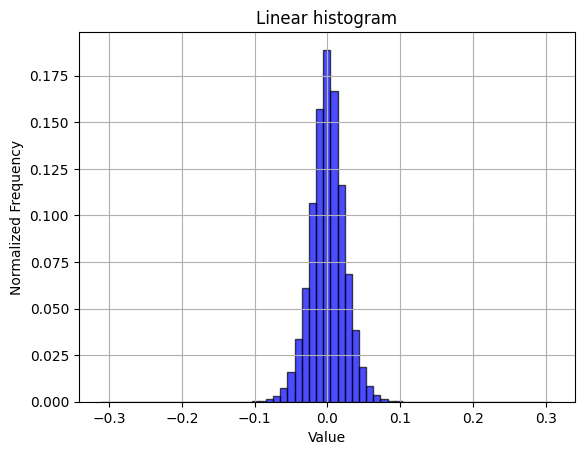

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 0.00000000e+00 5.96046448e-08 0.00000000e+00
 5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 3.57627869e-07 4.76837158e-07 2.98023224e-07 2.98023224e-07
 2.26497650e-06 7.56978989e-06 3.59416008e-05 1.41322613e-04
 4.73618507e-04 1.55341625e-03 4.25577164e-03 1.12501383e-02
 2.45840549e-02 4.97165918e-02 8.27857852e-02 1.22503281e-01
 1.51843488e-01 1.61756039e-01 1.42333269e-01 1.07623398e-01
 6.93475008e-02 3.88597846e-02 1.87898874e-02 7.69621134e-03
 3.03590298e-03 9.78052616e-04 3.07559967e-04 8.78572464e-05
 2.09212303e-05 5.12599945e-06 1.66893005e-06 4.76837158e-07
 4.76837158e-07 5.96046448e-08 2.98023224e-07 1.19209290e-07
 5.96046448e-08 0.00000000e+00 1.19209290e-07 0.00000000e+00
 0.00000000e+00 5.96046448e-08 0.00000000e+00 5.96046448e-08
 0.

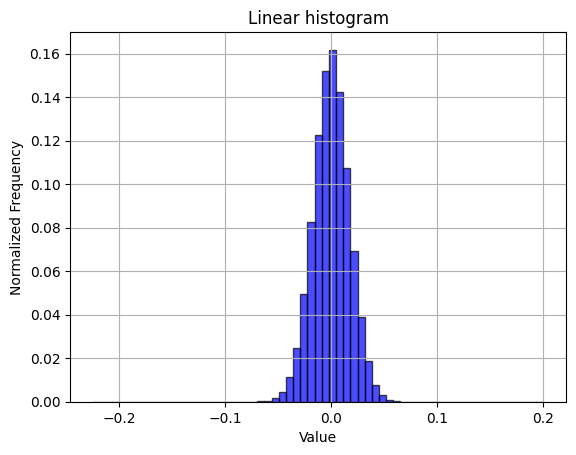

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 1.19209290e-07 5.96046448e-08 0.00000000e+00
 1.19209290e-07 0.00000000e+00 5.96046448e-08 0.00000000e+00
 5.96046448e-08 1.78813934e-07 1.19209290e-07 2.38418579e-07
 1.78813934e-07 2.98023224e-07 1.78813934e-07 9.53674316e-07
 1.13248825e-06 5.36441803e-07 1.84774399e-06 2.92062759e-06
 3.99351120e-06 6.07967377e-06 1.69873238e-05 3.29136848e-04
 7.61407614e-03 7.76502490e-02 2.95845628e-01 3.99934053e-01
 1.85245574e-01 3.11642289e-02 2.07990408e-03 7.56978989e-05
 9.35792923e-06 4.64916229e-06 3.33786011e-06 1.96695328e-06
 1.49011612e-06 7.15255737e-07 5.96046448e-07 5.96046448e-07
 2.38418579e-07 1.78813934e-07 4.76837158e-07 0.00000000e+00
 2.98023224e-07 3.57627869e-07 1.78813934e-07 1.19209290e-07
 1.19209290e-07 1.19209290e-07 5.96046448e-08 5.96046448e-08
 1.19209290e-07 5.96046448e-08 5.96046448e-08 5.96046448e-08
 0.

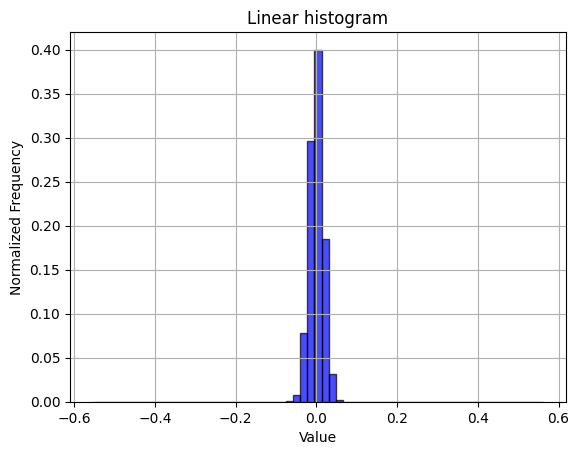

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[2.98023224e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.49011612e-08 0.00000000e+00 0.00000000e+00 1.49011612e-08
 0.00000000e+00 2.98023224e-08 0.00000000e+00 2.98023224e-08
 2.98023224e-08 4.47034836e-08 4.47034836e-08 2.98023224e-08
 7.45058060e-08 4.47034836e-08 5.96046448e-08 8.94069672e-08
 2.08616257e-07 1.19209290e-07 1.49011612e-07 3.12924385e-07
 7.59959221e-07 1.56462193e-06 3.41236591e-06 8.61287117e-06
 4.36007977e-05 4.12926078e-04 4.06004488e-03 3.39653790e-02
 2.11941659e-01 4.64158654e-01 2.38460541e-01 4.14651781e-02
 4.90792096e-03 4.98965383e-04 5.22285700e-05 9.92417336e-06
 3.45706940e-06 1.2

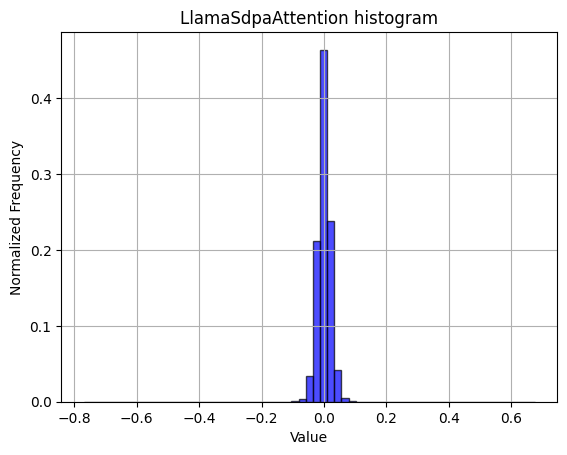

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 2.21784725e-08 0.00000000e+00
 2.21784725e-08 0.00000000e+00 4.43569449e-08 2.21784725e-08
 2.21784725e-08 0.00000000e+00 2.21784725e-08 4.43569449e-08
 1.10892362e-07 1.10892362e-07 1.33070835e-07 1.77427780e-07
 2.66141670e-07 4.87926394e-07 1.24199446e-06 2.26220419e-06
 5.12322714e-06 1.33736189e-05 3.23583913e-05 1.05547351e-04
 3.66965006e-04 1.57229845e-03 6.63874870e-03 2.55741075e-02
 7.19620239e-02 1.52002734e-01 2.24394776e-01 2.30751503e-01
 1.64002529e-01 8.16030502e-02 2.99281187e-02 8.39923149e-03
 1.99011869e-03 4.64062358e-04 1.21693278e-04 4.20503838e-05
 1.33514404e-05 5.58897506e-06 2.72795211e-06 1.33070835e-06
 7.31889592e-07 1.77427780e-07 1.99606252e-07 8.87138899e-08
 1.33070835e-07 4.43569449e-08 4.43569449e-08 6.65354174e-08
 0.00000000e+00 4.43569449e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

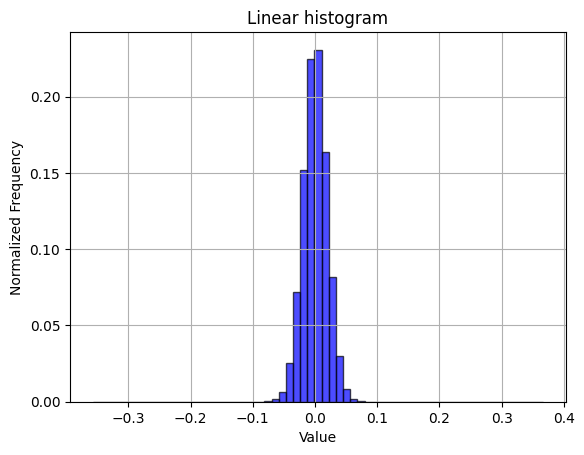

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[6.65354174e-08 2.21784725e-08 4.43569449e-08 2.21784725e-08
 1.33070835e-07 2.21784725e-07 2.21784725e-07 3.54855560e-07
 5.76640284e-07 1.13110210e-06 5.72204590e-06 2.75678413e-05
 1.36597212e-04 5.88017841e-04 2.12558480e-03 6.71419986e-03
 1.76706979e-02 3.99612161e-02 7.45786623e-02 1.17939239e-01
 1.55051032e-01 1.69866140e-01 1.54395902e-01 1.17530534e-01
 7.52744231e-02 4.00037100e-02 1.82005417e-02 6.91070113e-03
 2.22638596e-03 6.03853270e-04 1.46533168e-04 3.03623288e-05
 6.45393549e-06 1.57467155e-06 5.98818757e-07 2.21784725e-07
 1.99606252e-07 1.55249307e-07 8.87138899e-08 2.21784725e-08
 6.65354174e-08 2.21784725e-08 2.21784725e-08 2.21784725e-08
 2.21784725e-08 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

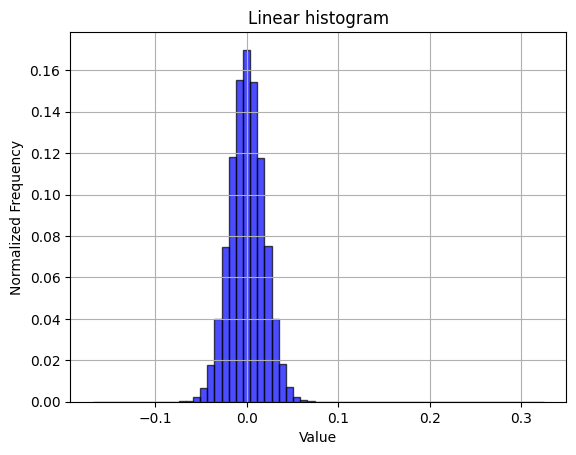

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.65354174e-08 2.21784725e-08 1.10892362e-07
 3.32677087e-07 3.54855560e-07 9.09317371e-07 2.72795211e-06
 6.77995904e-05 9.15267856e-03 1.90221520e-01 5.55049918e-01
 2.31988131e-01 1.33902306e-02 1.19697216e-04 3.39330629e-06
 1.15328057e-06 3.32677087e-07 2.21784725e-07 2.21784725e-08
 1.10892362e-07 0.00000000e+00 4.43569449e-08 2.21784725e-08
 6.65354174e-08 0.00000000e+00 0.00000000e+00 4.43569449e-08
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 2

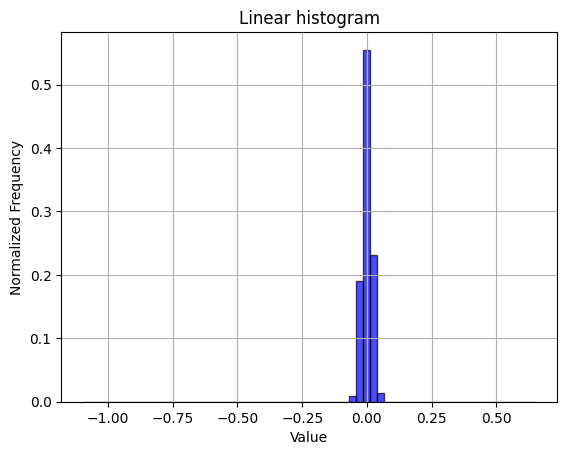

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

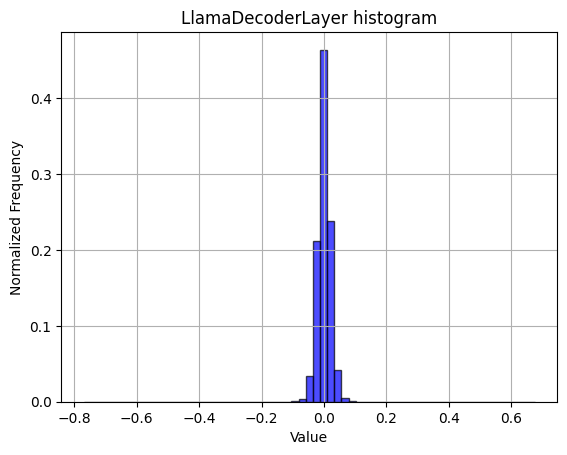

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 5.96046448e-08 0.00000000e+00
 5.96046448e-08 0.00000000e+00 5.96046448e-08 5.96046448e-08
 5.96046448e-08 1.78813934e-07 1.78813934e-07 5.96046448e-08
 0.00000000e+00 1.78813934e-07 1.78813934e-07 1.78813934e-07
 3.57627869e-07 2.38418579e-07 3.57627869e-07 3.57627869e-07
 5.96046448e-07 4.76837158e-07 1.19209290e-06 1.19209290e-06
 2.50339508e-06 6.91413879e-06 1.27553940e-05 6.89029694e-05
 7.17878342e-04 6.90072775e-03 4.49548364e-02 1.88639343e-01
 4.02731895e-01 2.67034292e-01 7.40587115e-02 1.31033659e-02
 1.58572197e-03 1.41203403e-04 1.94311142e-05 6.31809235e-06
 3.15904617e-06 1.84774399e-06 9.53674316e-07 6.55651093e-07
 4.76837158e-07 2.98023224e-07 1.78813934e-07 2.98023224e-07
 1.78813934e-07 1.19209290e-07 1.19209290e-07 0.00000000e+00
 1.78813934e-07 1.78813934e-07 5.96046448e-08 0.00000000e+00
 1.19209290e-07 5.96046448e-08 1.19209290e-07 0.00000000e+00
 5.

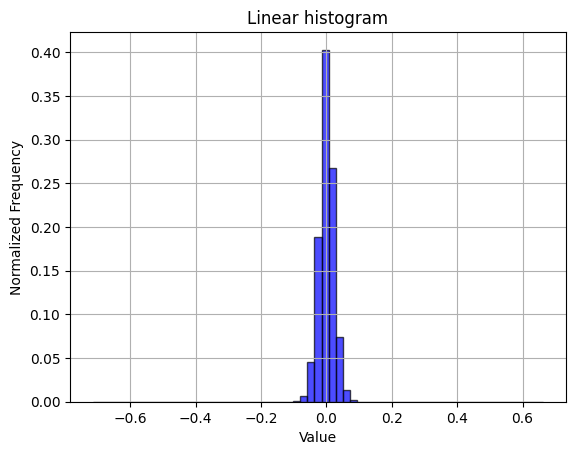

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 5.96046448e-08 5.96046448e-08 1.19209290e-07
 0.00000000e+00 5.96046448e-08 2.38418579e-07 5.96046448e-08
 6.55651093e-07 8.94069672e-07 8.94069672e-07 1.25169754e-06
 1.72853470e-06 2.08616257e-06 3.09944153e-06 4.52995300e-06
 6.19888306e-06 8.70227814e-06 1.47819519e-05 3.29017639e-05
 6.99162483e-05 1.78337097e-04 4.49776649e-04 1.12831593e-03
 2.68089771e-03 5.71024418e-03 1.25963092e-02 2.50600576e-02
 4.62924242e-02 8.10162425e-02 1.27887368e-01 1.72078490e-01
 1.79965615e-01 1.41068995e-01 9.13428068e-02 5.47779799e-02
 2.96652317e-02 1.48743987e-02 7.33888149e-03 3.34590673e-03
 1.42252445e-03 5.70297241e-04 2.27928162e-04 8.61883163e-05
 3.62992287e-05 1.76429749e-05 8.76188278e-06 6.43730164e-06
 4.76837158e-06 3.15904617e-06 2.56299973e-06 2.20537186e-06
 1.19209290e-06 9.53674316e-07 7.15255737e-07 5.96046448e-07
 2.98023224e-07 3.57627869e-07 1.19209290e-07 1.78813934e-07
 5.

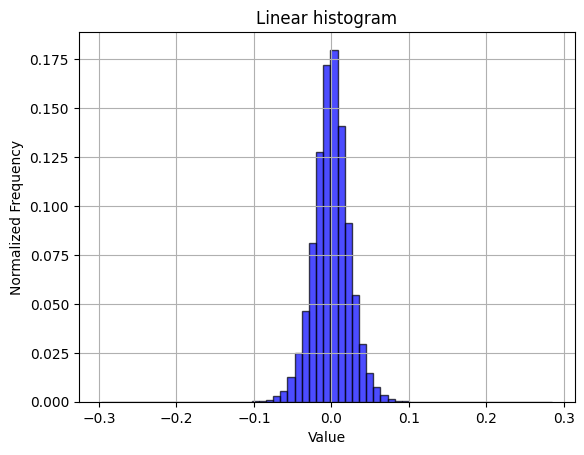

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 1.19209290e-07 2.98023224e-07 2.98023224e-07 8.34465027e-07
 2.14576721e-06 5.00679016e-06 1.85966492e-05 5.07831573e-05
 1.45912170e-04 4.42385674e-04 1.09738111e-03 2.64883041e-03
 6.32387400e-03 1.26073956e-02 2.42601633e-02 4.27643657e-02
 6.71244264e-02 9.42142010e-02 1.18657291e-01 1.34189248e-01
 1.34156823e-01 1.16452634e-01 9.24166441e-02 6.54222965e-02
 4.13766503e-02 2.30264068e-02 1.26421452e-02 5.71721792e-03
 2.60990858e-03 1.02221966e-03 3.81946564e-04 1.50620937e-04
 4.66704369e-05 1.56760216e-05 5.06639481e-06 2.08616257e-06
 4.76837158e-07 2.38418579e-07 5.96046448e-08 2.38418579e-07
 5.96046448e-08 5.96046448e-08 5.96046448e-08 0.00000000e+00
 0.00000000e+00 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

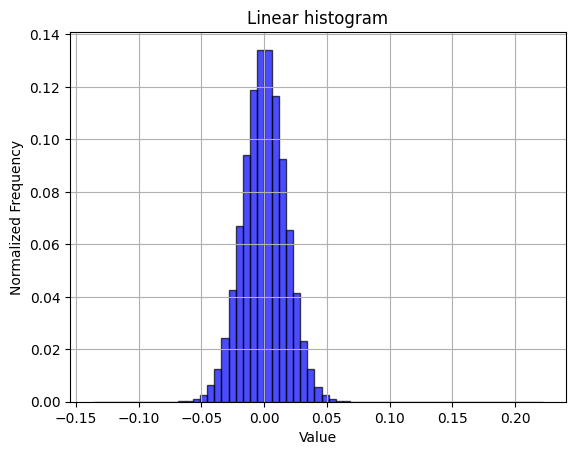

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 5.96046448e-08 1.19209290e-07 5.96046448e-08 1.78813934e-07
 2.98023224e-07 1.78813934e-07 2.98023224e-07 1.78813934e-07
 1.78813934e-07 4.17232513e-07 2.38418579e-07 6.55651093e-07
 8.94069672e-07 1.96695328e-06 2.62260437e-06 4.64916229e-06
 8.58306885e-06 2.95639038e-05 9.15706158e-04 2.31512785e-02
 1.88500941e-01 4.48170900e-01 2.85619020e-01 5.06937504e-02
 2.79390812e-03 7.74860382e-05 1.00731850e-05 5.12599945e-06
 3.03983688e-06 1.90734863e-06 1.60932541e-06 9.53674316e-07
 7.15255737e-07 6.55651093e-07 3.57627869e-07 1.19209290e-07
 1.19209290e-07 3.57627869e-07 0.00000000e+00 1.78813934e-07
 1.19209290e-07 5.96046448e-08 0.00000000e+00 1.19209290e-07
 0.00000000e+00 5.96046448e-08 5.96046448e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

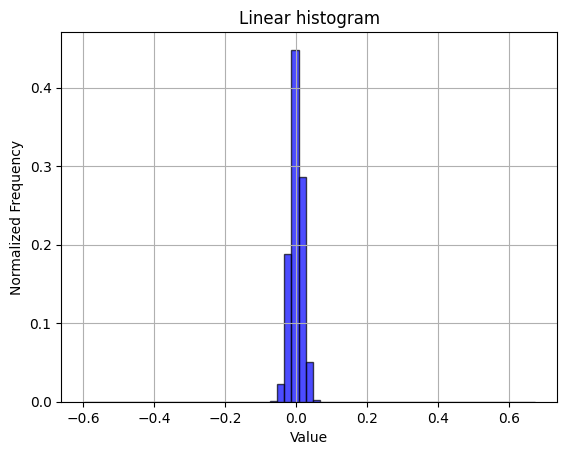

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 0.00000000e+00 1.49011612e-08 0.00000000e+00
 1.49011612e-08 1.49011612e-08 1.49011612e-08 1.49011612e-08
 1.49011612e-08 5.96046448e-08 4.47034836e-08 1.49011612e-08
 1.49011612e-08 7.45058060e-08 7.45058060e-08 8.94069672e-08
 1.49011612e-07 1.19209290e-07 1.93715096e-07 1.78813934e-07
 2.23517418e-07 3.27825546e-07 7.30156898e-07 1.10268593e-06
 2.23517418e-06 5.45382500e-06 1.16229057e-05 6.77853823e-05
 6.45443797e-04 5.56553900e-03 4.31197882e-02 2.34663039e-01
 4.50315773e-01 2.20416352e-01 3.94504964e-02 5.06739318e-03
 5.84855676e-04 6.00814819e-05 1.05053186e-05 4.18722630e-06
 2.63750553e-06 1.1

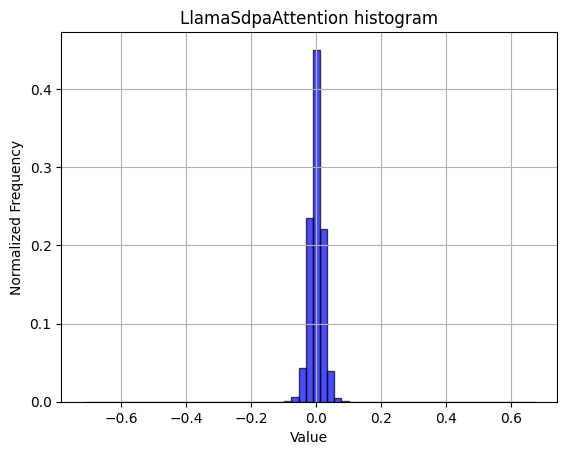

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.43569449e-08 0.00000000e+00
 0.00000000e+00 4.43569449e-08 0.00000000e+00 0.00000000e+00
 8.87138899e-08 4.43569449e-08 2.21784725e-08 1.99606252e-07
 6.65354174e-08 2.21784725e-07 1.33070835e-07 5.32283339e-07
 7.31889592e-07 1.57467155e-06 3.41548476e-06 8.98228135e-06
 2.33761100e-05 8.27035239e-05 3.10676042e-04 1.37544233e-03
 6.24665549e-03 2.41507153e-02 7.09566294e-02 1.50618620e-01
 2.26122523e-01 2.32455276e-01 1.66367575e-01 8.18160079e-02
 2.93008449e-02 7.85803240e-03 1.75562570e-03 3.97571298e-04
 1.00601551e-04 2.81001246e-05 1.00690265e-05 3.37112782e-06
 1.44160071e-06 8.64960427e-07 3.99212505e-07 1.99606252e-07
 6.65354174e-08 1.77427780e-07 8.87138899e-08 1.33070835e-07
 0.00000000e+00 4.43569449e-08 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

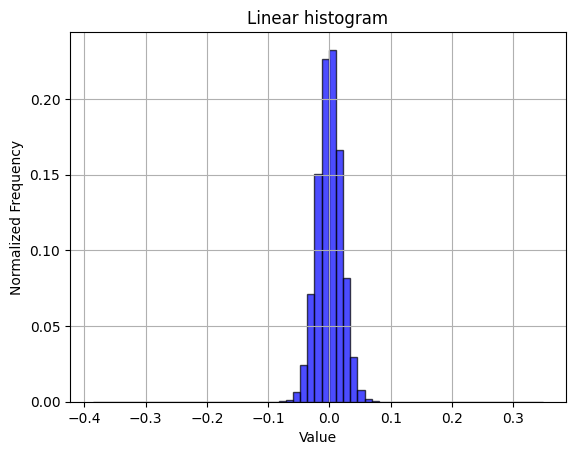

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 4.43569449e-08
 2.21784725e-08 2.21784725e-08 0.00000000e+00 4.43569449e-08
 6.65354174e-08 1.99606252e-07 4.21390977e-07 7.76246537e-07
 4.67965769e-06 1.44869782e-04 2.96209025e-03 3.05562130e-02
 1.42070881e-01 3.16241176e-01 3.21884399e-01 1.49484280e-01
 3.31402490e-02 3.32339974e-03 1.78270562e-04 6.36522160e-06
 7.09711119e-07 3.32677087e-07 1.99606252e-07 1.10892362e-07
 4.43569449e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

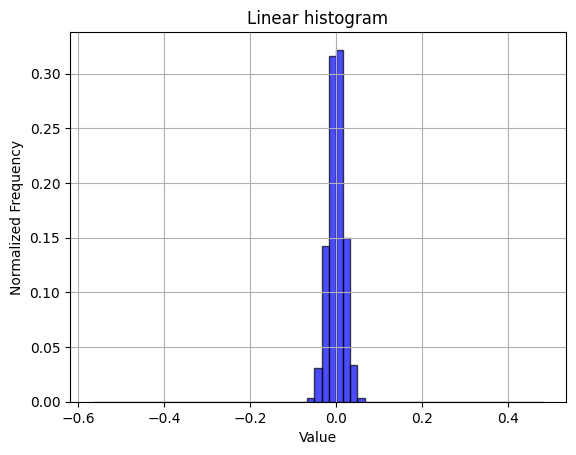

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 2.21784725e-08
 2.21784725e-08 2.21784725e-08 4.43569449e-08 4.43569449e-08
 4.43569449e-08 2.21784725e-07 4.65747922e-07 7.76246537e-07
 1.81863474e-06 2.50616739e-05 3.08420492e-03 8.98662833e-02
 4.49310635e-01 3.95534316e-01 6.05622447e-02 1.59804766e-03
 1.21538029e-05 2.04041947e-06 6.65354174e-07 3.99212505e-07
 4.43569449e-08 8.87138899e-08 6.65354174e-08 6.65354174e-08
 2.21784725e-08 2.21784725e-08 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0

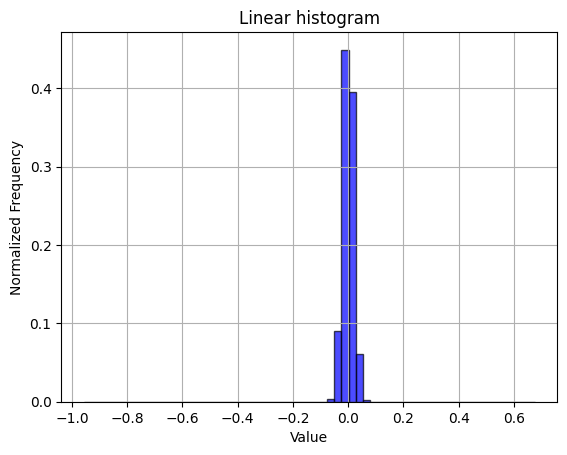

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

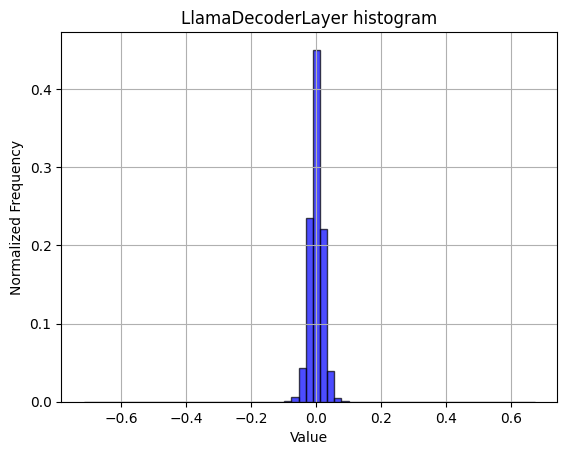

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.96046448e-08 0.00000000e+00
 0.00000000e+00 5.96046448e-08 5.96046448e-08 1.19209290e-07
 1.19209290e-07 1.78813934e-07 1.78813934e-07 2.98023224e-07
 5.96046448e-07 7.15255737e-07 1.01327896e-06 2.02655792e-06
 5.42402267e-06 1.35898590e-05 1.18613243e-04 2.86227465e-03
 4.31819558e-02 3.06627810e-01 5.07294476e-01 1.27312303e-01
 1.19715333e-02 5.55813313e-04 3.42130661e-05 7.68899918e-06
 3.33786011e-06 1.49011612e-06 1.01327896e-06 8.94069672e-07
 4.17232513e-07 5.36441803e-07 2.38418579e-07 2.38418579e-07
 5.96046448e-08 1.19209290e-07 5.96046448e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 0.00000000e+00 5.96046448e-08 5.96046448e-08
 0.

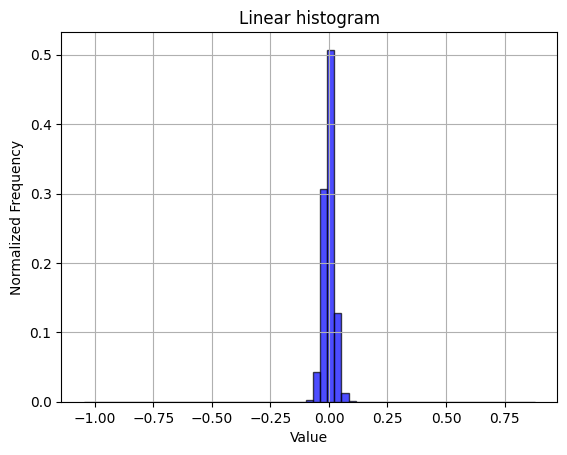

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 5.96046448e-08 5.96046448e-08
 0.00000000e+00 1.19209290e-07 2.38418579e-07 1.19209290e-07
 2.98023224e-07 3.57627869e-07 1.01327896e-06 8.94069672e-07
 8.34465027e-07 1.72853470e-06 2.62260437e-06 3.09944153e-06
 5.24520874e-06 7.45058060e-06 9.29832458e-06 1.81794167e-05
 4.19020653e-05 1.17659569e-04 3.19540501e-04 8.92162323e-04
 2.39944458e-03 6.11305237e-03 1.38433576e-02 2.91064978e-02
 5.76894283e-02 1.03435516e-01 1.64207160e-01 2.05955923e-01
 1.75812542e-01 1.13997340e-01 6.39091134e-02 3.43129635e-02
 1.60215497e-02 7.19553232e-03 2.85309553e-03 1.07526779e-03
 3.96370888e-04 1.37448311e-04 5.65052032e-05 2.17556953e-05
 1.03712082e-05 7.51018524e-06 5.60283661e-06 2.80141830e-06
 2.38418579e-06 2.62260437e-06 2.02655792e-06 1.07288361e-06
 6.55651093e-07 5.96046448e-07 4.76837158e-07 2.98023224e-07
 4.17232513e-07 5.96046448e-08 5.96046448e-08 1.19209290e-07
 0.

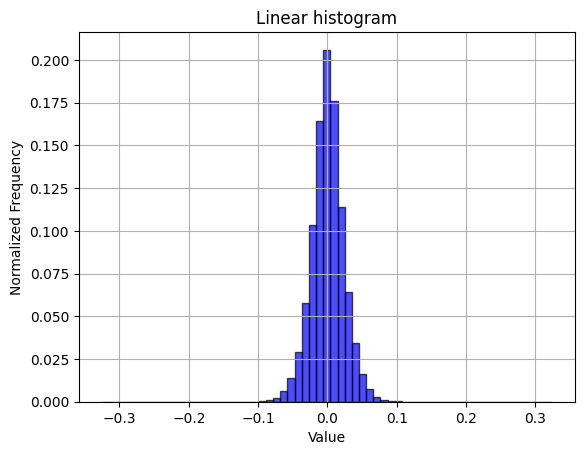

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 0.00000000e+00 5.96046448e-08 5.96046448e-08
 5.96046448e-08 1.78813934e-07 2.98023224e-07 4.76837158e-07
 1.43051147e-06 2.50339508e-06 7.86781311e-06 2.31862068e-05
 6.09159470e-05 1.58548355e-04 3.46660614e-04 8.23736191e-04
 1.75589323e-03 3.31765413e-03 6.52813911e-03 1.17156506e-02
 1.93588734e-02 2.97769904e-02 4.47771549e-02 5.96992373e-02
 7.79078007e-02 9.21882987e-02 1.03099704e-01 1.07481599e-01
 1.02643967e-01 9.01930332e-02 7.52726793e-02 5.96824884e-02
 4.21706438e-02 2.94294953e-02 1.83790922e-02 1.10394359e-02
 5.89680672e-03 3.31842899e-03 1.62816048e-03 7.54415989e-04
 3.21567059e-04 1.48057938e-04 5.31673431e-05 2.18153000e-05
 9.11951065e-06 2.56299973e-06 1.07288361e-06 4.17232513e-07
 1.78813934e-07 1.19209290e-07 0.00000000e+00 0.00000000e+00
 5.

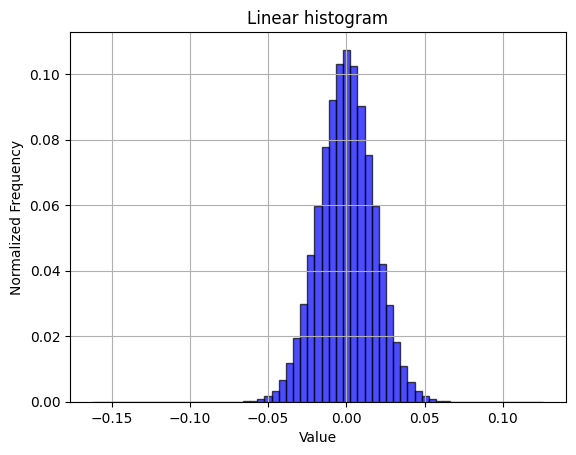

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 5.96046448e-08 1.19209290e-07
 2.38418579e-07 1.19209290e-07 2.98023224e-07 2.98023224e-07
 5.96046448e-07 2.98023224e-07 7.74860382e-07 2.98023224e-07
 5.96046448e-07 2.98023224e-07 3.57627869e-07 5.36441803e-07
 4.17232513e-07 3.57627869e-07 3.57627869e-07 2.38418579e-07
 5.96046448e-07 4.76837158e-07 6.55651093e-07 1.25169754e-06
 1.31130219e-06 4.23192978e-06 8.10623169e-06 7.77244568e-05
 2.16788054e-03 3.25310826e-02 1.87990129e-01 3.96177173e-01
 2.94599116e-01 7.83023834e-02 7.76296854e-03 3.36050987e-04
 1.63912773e-05 4.05311584e-06 2.08616257e-06 1.43051147e-06
 4.76837158e-07 5.96046448e-07 2.98023224e-07 3.57627869e-07
 5.36441803e-07 4.76837158e-07 3.57627869e-07 5.36441803e-07
 5.36441803e-07 3.57627869e-07 8.34465027e-07 4.76837158e-07
 8.34465027e-07 4.76837158e-07 2.38418579e-07 4.17232513e-07
 2.38418579e-07 1.78813934e-07 5.96046448e-08 5.96046448e-08
 0.

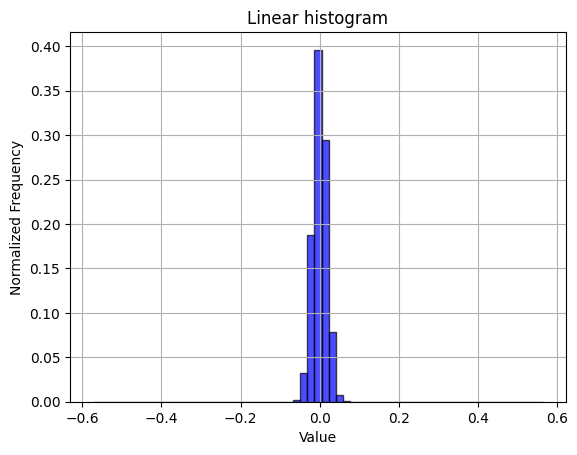

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 0.00000000e+00 0.00000000e+00 1.49011612e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.49011612e-08 1.49011612e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.49011612e-08 1.49011612e-08
 0.00000000e+00 7.45058060e-08 8.94069672e-08 1.19209290e-07
 2.53319740e-07 2.98023224e-07 1.93715096e-07 2.68220901e-07
 3.87430191e-07 4.02331352e-07 6.55651093e-07 1.38580799e-06
 3.39746475e-06 9.79006290e-06 7.31348991e-05 1.60734355e-03
 2.89123803e-02 3.09957534e-01 5.44082791e-01 1.08095244e-01
 6.89283013e-03 3.27855349e-04 2.17556953e-05 5.31971455e-06
 2.47359276e-06 1.0

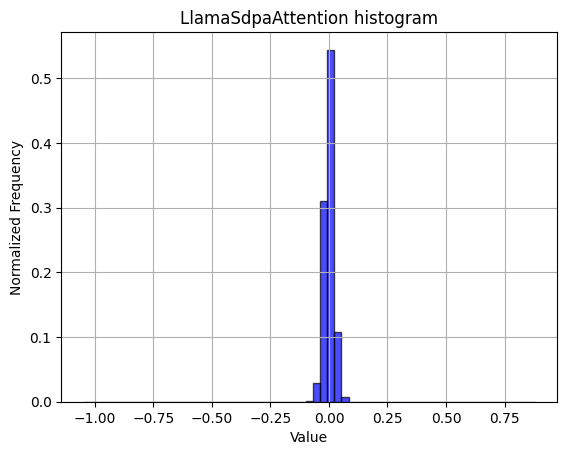

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.43569449e-08 2.21784725e-08
 4.43569449e-08 4.43569449e-08 2.21784725e-08 4.43569449e-08
 4.43569449e-08 1.10892362e-07 1.33070835e-07 1.77427780e-07
 2.21784725e-07 4.87926394e-07 4.65747922e-07 1.24199446e-06
 2.63923822e-06 5.85511673e-06 1.42385793e-05 3.40217768e-05
 1.03285146e-04 3.39663306e-04 1.19133883e-03 4.21768011e-03
 1.34082839e-02 3.67912913e-02 7.85333722e-02 1.36245883e-01
 1.83794155e-01 1.94430462e-01 1.60547678e-01 1.04938441e-01
 5.27658019e-02 2.23511319e-02 7.28163608e-03 2.13465580e-03
 6.04452089e-04 1.66915184e-04 5.65329263e-05 2.08255857e-05
 8.51653343e-06 4.43569449e-06 1.77427780e-06 5.76640284e-07
 3.99212505e-07 3.10498615e-07 1.99606252e-07 6.65354174e-08
 4.43569449e-08 4.43569449e-08 4.43569449e-08 6.65354174e-08
 2.21784725e-08 4.43569449e-08 2.21784725e-08 0.00000000e+00
 2

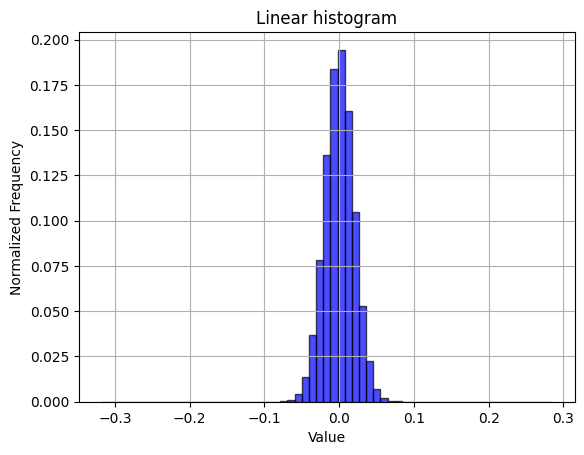

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.43569449e-08 0.00000000e+00 2.21784725e-08 4.43569449e-08
 0.00000000e+00 2.21784725e-08 0.00000000e+00 4.43569449e-08
 2.21784725e-08 6.65354174e-08 1.55249307e-07 1.10892362e-07
 3.54855560e-07 8.20603482e-07 2.12913336e-06 1.51478967e-05
 1.14729238e-04 7.39319380e-04 3.65073182e-03 1.41142246e-02
 4.18493360e-02 9.37068407e-02 1.60255388e-01 2.07340950e-01
 2.00656381e-01 1.47269759e-01 8.14676728e-02 3.44934464e-02
 1.10140069e-02 2.70144884e-03 5.19708145e-04 7.38543133e-05
 9.82506331e-06 1.79645627e-06 5.32283339e-07 3.77034032e-07
 2.43963197e-07 1.77427780e-07 4.43569449e-08 1.10892362e-07
 2.21784725e-08 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

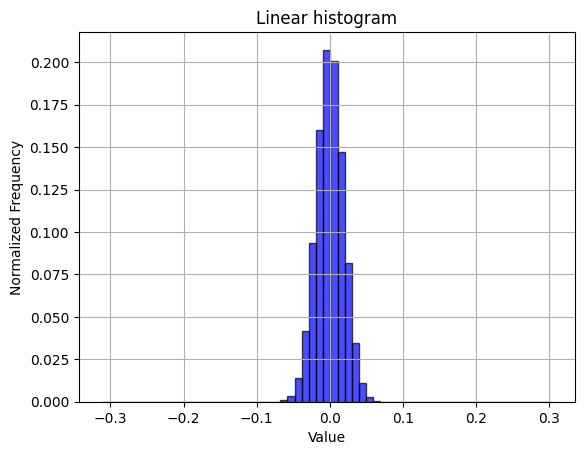

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 2.21784725e-08
 6.65354174e-08 0.00000000e+00 2.21784725e-08 2.21784725e-08
 1.10892362e-07 6.65354174e-08 2.21784725e-07 3.77034032e-07
 1.39724377e-06 1.05347744e-05 1.32678276e-03 5.52692635e-02
 3.86150826e-01 4.59744254e-01 9.42684662e-02 3.20026486e-03
 2.33761100e-05 2.04041947e-06 8.64960427e-07 4.21390977e-07
 2.21784725e-07 1.10892362e-07 4.43569449e-08 4.43569449e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

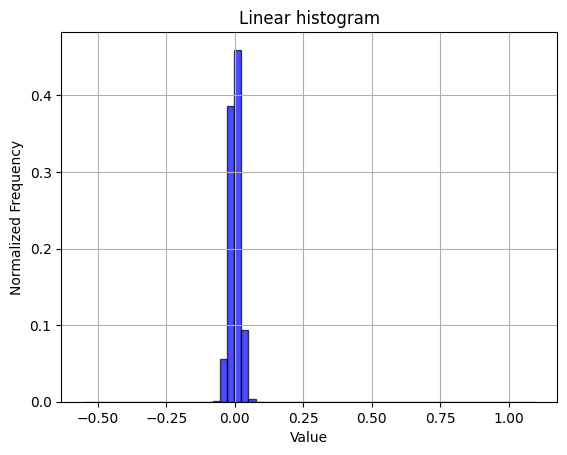

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

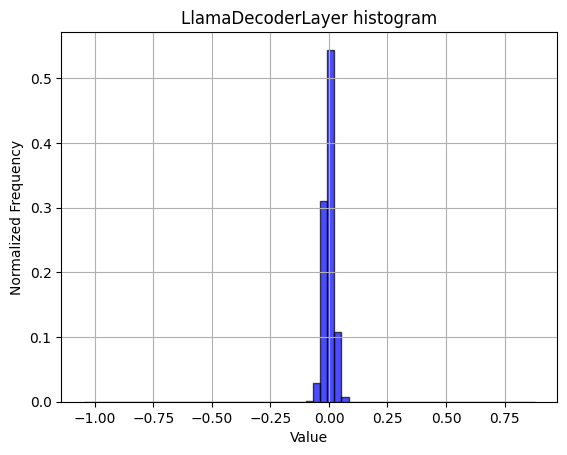

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.19209290e-07 0.00000000e+00 5.96046448e-08 0.00000000e+00
 5.96046448e-08 5.96046448e-08 1.78813934e-07 2.98023224e-07
 1.19209290e-07 1.19209290e-07 2.38418579e-07 0.00000000e+00
 2.98023224e-07 1.78813934e-07 5.36441803e-07 3.57627869e-07
 9.53674316e-07 8.34465027e-07 1.78813934e-06 2.32458115e-06
 3.93390656e-06 1.03712082e-05 3.57031822e-05 5.21183014e-04
 8.35478306e-03 7.30698109e-02 3.37475538e-01 4.37441349e-01
 1.24645114e-01 1.70059800e-02 1.33198500e-03 6.81877136e-05
 1.15036964e-05 5.72204590e-06 3.75509262e-06 2.26497650e-06
 1.19209290e-06 5.96046448e-07 7.15255737e-07 2.98023224e-07
 1.19209290e-07 2.98023224e-07 2.38418579e-07 1.78813934e-07
 1.19209290e-07 1.19209290e-07 5.96046448e-08 1.19209290e-07
 0.00000000e+00 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.96046448e-08 0.00000000e+00
 0.00000000e+00 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.

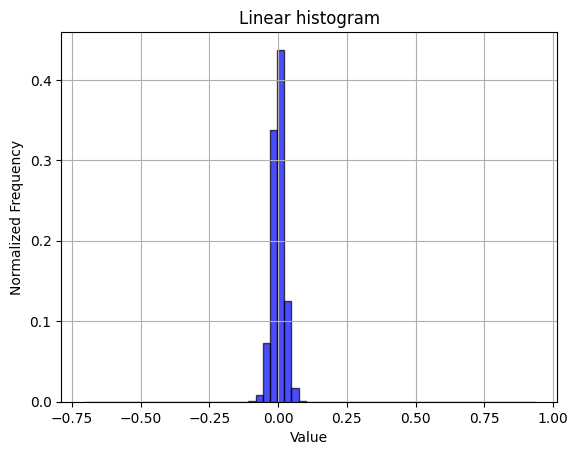

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 1.19209290e-07 1.19209290e-07 0.00000000e+00
 1.19209290e-07 2.38418579e-07 5.36441803e-07 6.55651093e-07
 9.53674316e-07 9.53674316e-07 1.19209290e-06 2.86102295e-06
 3.27825546e-06 4.23192978e-06 5.24520874e-06 6.37769699e-06
 9.95397568e-06 2.46763229e-05 5.35249710e-05 1.68621540e-04
 5.45918941e-04 1.62023306e-03 4.44406271e-03 1.13866925e-02
 2.61396170e-02 5.35210371e-02 1.01813018e-01 1.71214342e-01
 2.20998406e-01 1.83943570e-01 1.12889290e-01 5.96572161e-02
 2.99985409e-02 1.32687688e-02 5.30791283e-03 1.96492672e-03
 6.57737255e-04 2.09569931e-04 6.63995743e-05 2.71201134e-05
 1.30534172e-05 7.45058060e-06 5.24520874e-06 4.23192978e-06
 3.39746475e-06 2.20537186e-06 1.84774399e-06 1.19209290e-06
 1.25169754e-06 7.15255737e-07 3.57627869e-07 2.98023224e-07
 1.19209290e-07 1.78813934e-07 0.00000000e+00 5.96046448e-08
 1.19209290e-07 0.00000000e+00 5.96046448e-08 0.00000000e+00
 5.

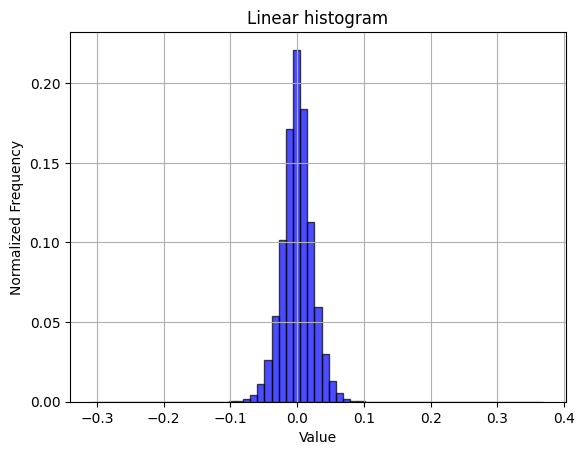

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 5.96046448e-08 1.19209290e-07 1.78813934e-07
 1.19209290e-07 5.96046448e-07 1.66893005e-06 3.87430191e-06
 1.38282776e-05 4.01735306e-05 1.14440918e-04 3.39329243e-04
 8.82446766e-04 2.10994482e-03 4.51236963e-03 9.63383913e-03
 1.83430910e-02 3.07486057e-02 5.05226851e-02 7.21690655e-02
 9.58678126e-02 1.15272105e-01 1.25424504e-01 1.22080863e-01
 1.08300149e-01 8.60397220e-02 6.37321472e-02 4.14202213e-02
 2.58225203e-02 1.35800838e-02 7.25811720e-03 3.42005491e-03
 1.40178204e-03 6.00814819e-04 2.20596790e-04 8.46385956e-05
 2.47955322e-05 8.46385956e-06 2.26497650e-06 8.94069672e-07
 3.57627869e-07 1.78813934e-07 5.96046448e-08 0.00000000e+00
 1.19209290e-07 0.00000000e+00 1.19209290e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

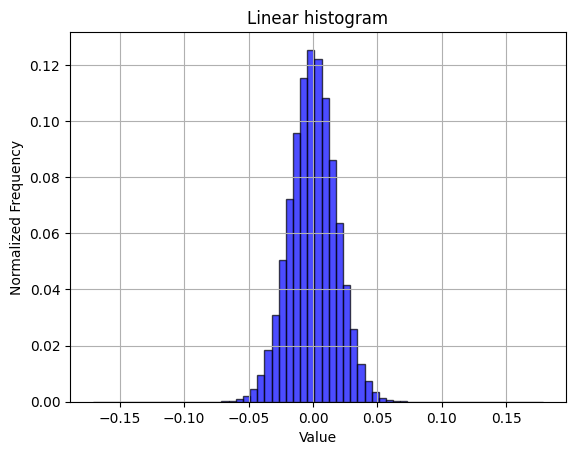

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.19209290e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.78813934e-07 5.96046448e-08 2.98023224e-07 2.38418579e-07
 2.98023224e-07 3.57627869e-07 4.76837158e-07 5.36441803e-07
 7.74860382e-07 1.01327896e-06 8.94069672e-07 1.19209290e-06
 1.07288361e-06 1.07288361e-06 1.43051147e-06 1.54972076e-06
 2.32458115e-06 2.74181366e-06 7.51018524e-06 1.11401081e-04
 2.83449888e-03 3.25848460e-02 1.68076575e-01 3.58678162e-01
 3.11363876e-01 1.08685791e-01 1.65094733e-02 1.06775761e-03
 4.14252281e-05 6.07967377e-06 2.92062759e-06 1.43051147e-06
 1.31130219e-06 1.66893005e-06 1.07288361e-06 1.43051147e-06
 1.31130219e-06 1.13248825e-06 7.74860382e-07 5.36441803e-07
 4.76837158e-07 7.15255737e-07 2.98023224e-07 3.57627869e-07
 2.38418579e-07 0.00000000e+00 5.96046448e-08 0.00000000e+00
 5.96046448e-08 1.19209290e-07 0.00000000e+00 0.00000000e+00
 0.

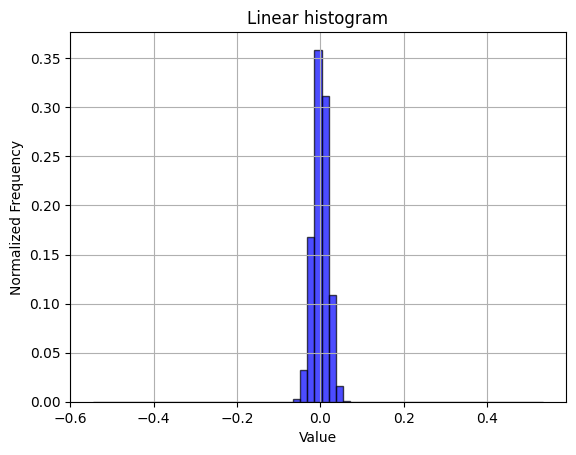

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[2.98023224e-08 0.00000000e+00 1.49011612e-08 0.00000000e+00
 1.49011612e-08 1.49011612e-08 7.45058060e-08 7.45058060e-08
 2.98023224e-08 2.98023224e-08 5.96046448e-08 2.98023224e-08
 1.04308128e-07 1.78813934e-07 2.53319740e-07 2.83122063e-07
 4.91738319e-07 7.00354576e-07 1.25169754e-06 1.80304050e-06
 3.27825546e-06 6.80983067e-06 2.36630440e-05 3.01063061e-04
 4.84474003e-03 5.86941093e-02 3.51061225e-01 4.61402446e-01
 1.12340853e-01 1.05060637e-02 7.46607780e-04 4.45842743e-05
 8.03172588e-06 4.38094139e-06 2.48849392e-06 1.71363354e-06
 8.49366188e-07 4.02331352e-07 4.61935997e-07 2.08616257e-07
 1.34110451e-07 1.1

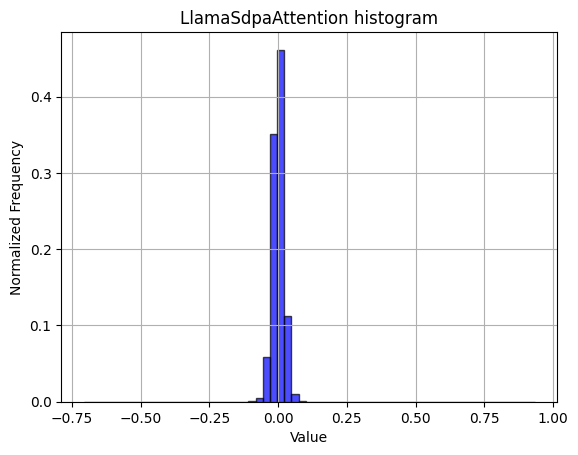

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[4.43569449e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.65354174e-08 2.21784725e-08 2.21784725e-08 4.43569449e-08
 6.65354174e-08 8.87138899e-08 1.33070835e-07 6.65354174e-08
 1.10892362e-07 1.10892362e-07 2.66141670e-07 2.88320142e-07
 7.76246537e-07 1.35288682e-06 2.10695489e-06 4.63530075e-06
 1.00468480e-05 2.37975010e-05 5.96379125e-05 1.76518462e-04
 6.07712324e-04 2.11316486e-03 7.04630031e-03 1.93988002e-02
 4.78090464e-02 9.14029410e-02 1.44916135e-01 1.81626919e-01
 1.82795125e-01 1.46315974e-01 9.43935527e-02 4.95147705e-02
 2.11557344e-02 7.44409339e-03 2.24084632e-03 6.45083050e-04
 1.89293263e-04 5.96822694e-05 2.45737475e-05 1.02020973e-05
 4.65747922e-06 2.24002572e-06 1.08674515e-06 7.09711119e-07
 3.54855560e-07 8.87138899e-08 1.77427780e-07 1.33070835e-07
 4.43569449e-08 4.43569449e-08 6.65354174e-08 8.87138899e-08
 4.43569449e-08 2.21784725e-08 0.00000000e+00 4.43569449e-08
 0

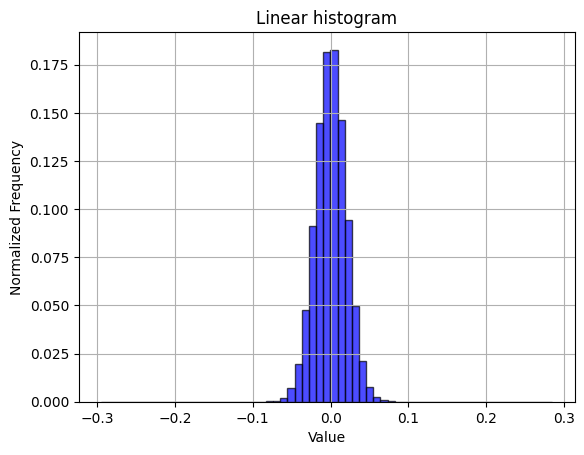

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 2.21784725e-08 2.21784725e-08
 2.21784725e-08 0.00000000e+00 2.21784725e-08 4.43569449e-08
 6.65354174e-08 2.21784725e-08 8.87138899e-08 6.65354174e-08
 6.65354174e-08 8.87138899e-08 8.87138899e-08 1.77427780e-07
 1.55249307e-07 2.21784725e-07 3.10498615e-07 7.31889592e-07
 1.84081322e-06 5.78858132e-06 2.53943510e-05 1.04571498e-04
 3.74572222e-04 1.18377597e-03 3.48936125e-03 8.97159133e-03
 1.90768575e-02 3.80925023e-02 6.58737449e-02 9.72001719e-02
 1.27213944e-01 1.44800120e-01 1.44409246e-01 1.24939453e-01
 9.42864972e-02 6.22356104e-02 3.64004623e-02 1.85391404e-02
 7.96553146e-03 3.24355724e-03 1.11180683e-03 3.38709632e-04
 8.18829204e-05 2.30434329e-05 5.07887020e-06 1.28635140e-06
 7.31889592e-07 5.10104867e-07 2.43963197e-07 1.10892362e-07
 1.77427780e-07 1.55249307e-07 6.65354174e-08 6.65354174e-08
 4.43569449e-08 2.21784725e-08 0.00000000e+00 6.65354174e-08
 0

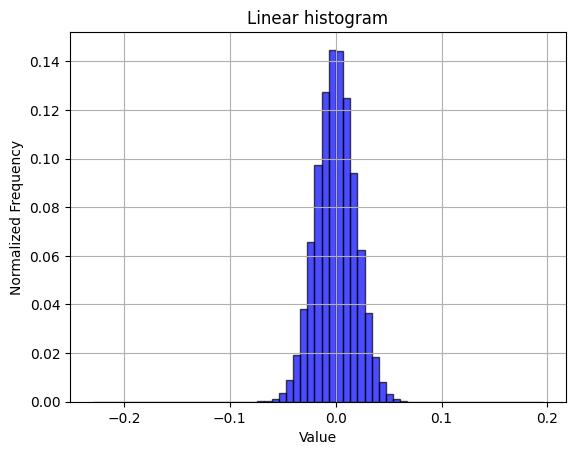

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.43569449e-08 2.21784725e-08 0.00000000e+00 2.21784725e-08
 0.00000000e+00 2.21784725e-08 0.00000000e+00 4.43569449e-08
 2.21784725e-08 8.87138899e-08 1.33070835e-07 1.33070835e-07
 3.54855560e-07 7.31889592e-07 2.39527503e-06 1.01621761e-04
 6.32121951e-03 1.00718143e-01 3.99691648e-01 3.92035662e-01
 9.54013203e-02 5.62967256e-03 9.27503719e-05 2.28438266e-06
 8.64960427e-07 2.88320142e-07 1.55249307e-07 1.33070835e-07
 4.43569449e-08 6.65354174e-08 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

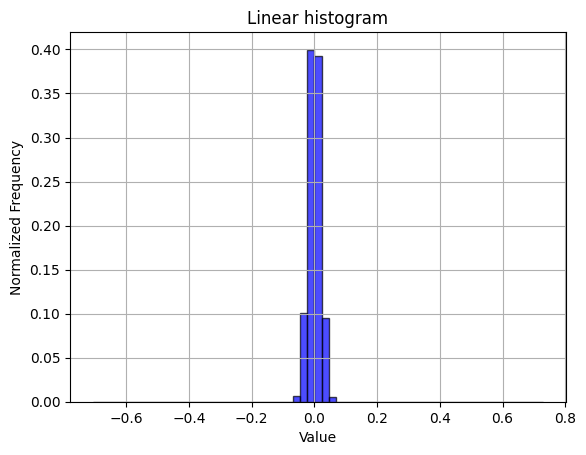

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

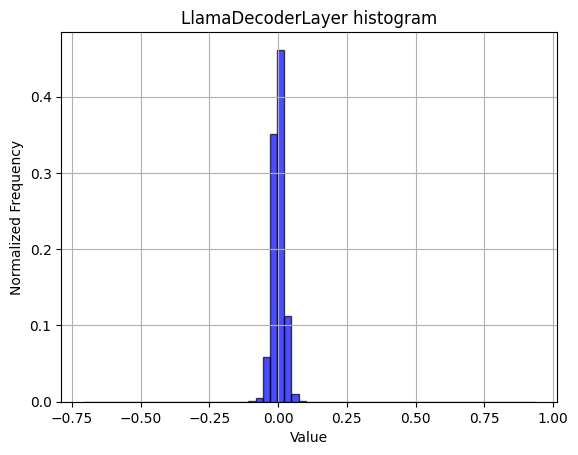

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 5.96046448e-08 5.96046448e-08 1.78813934e-07
 0.00000000e+00 2.98023224e-07 5.96046448e-08 0.00000000e+00
 0.00000000e+00 1.78813934e-07 1.78813934e-07 3.57627869e-07
 2.98023224e-07 5.96046448e-07 7.74860382e-07 1.25169754e-06
 1.60932541e-06 3.69548798e-06 5.90085983e-06 1.30534172e-05
 8.46982002e-05 1.28167868e-03 1.30310059e-02 8.22423697e-02
 2.97020555e-01 4.06816602e-01 1.61589324e-01 3.34840417e-02
 4.05889750e-03 3.13937664e-04 2.65836716e-05 8.64267349e-06
 4.82797623e-06 2.98023224e-06 1.43051147e-06 5.36441803e-07
 5.36441803e-07 3.57627869e-07 1.19209290e-07 2.98023224e-07
 2.98023224e-07 5.36441803e-07 2.38418579e-07 0.00000000e+00
 1.19209290e-07 0.00000000e+00 0.00000000e+00 5.96046448e-08
 2.38418579e-07 1.19209290e-07 0.00000000e+00 0.00000000e+00
 5.96046448e-08 1.19209290e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.

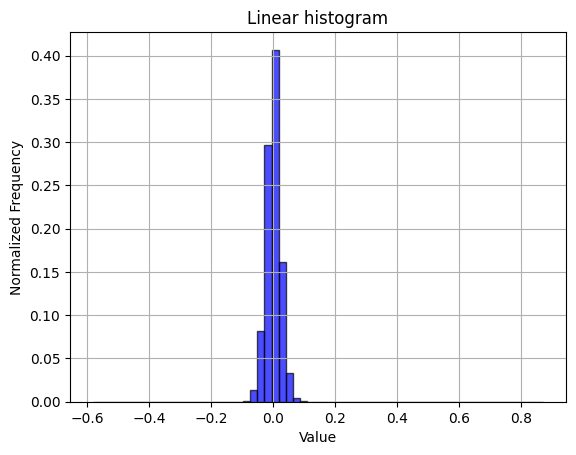

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.78813934e-07 1.78813934e-07 1.78813934e-07 0.00000000e+00
 1.19209290e-07 5.96046448e-08 1.19209290e-07 4.17232513e-07
 2.38418579e-07 4.76837158e-07 5.96046448e-07 1.07288361e-06
 1.13248825e-06 1.43051147e-06 1.96695328e-06 2.80141830e-06
 4.94718552e-06 4.82797623e-06 6.25848770e-06 9.00030136e-06
 1.82986259e-05 3.95774841e-05 9.73343849e-05 2.73585320e-04
 7.59899616e-04 2.18391418e-03 5.18774986e-03 1.13970637e-02
 2.41146088e-02 4.58707213e-02 7.94843435e-02 1.25613093e-01
 1.76769078e-01 1.85429037e-01 1.41405880e-01 9.19668078e-02
 5.40760756e-02 2.95327902e-02 1.47091746e-02 6.70826435e-03
 2.66772509e-03 1.03455782e-03 3.93390656e-04 1.26898289e-04
 4.67300415e-05 1.97291374e-05 1.14440918e-05 6.13927841e-06
 4.64916229e-06 3.99351120e-06 2.20537186e-06 2.56299973e-06
 1.43051147e-06 1.66893005e-06 1.31130219e-06 8.34465027e-07
 3.57627869e-07 2.98023224e-07 1.78813934e-07 2.38418579e-07
 2.

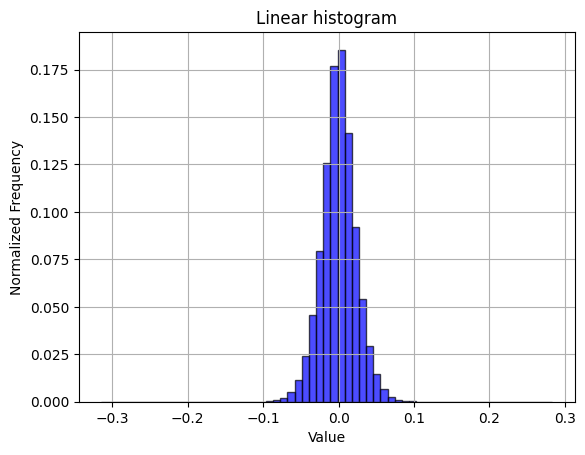

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.96046448e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 1.78813934e-07 2.98023224e-07 9.53674316e-07
 2.20537186e-06 7.68899918e-06 1.40666962e-05 3.30805779e-05
 6.95586205e-05 1.49369240e-04 3.23951244e-04 5.90443611e-04
 1.10989809e-03 2.14862823e-03 3.56590748e-03 5.88029623e-03
 1.01082325e-02 1.46952868e-02 2.19777822e-02 3.14834118e-02
 4.26408648e-02 5.28342128e-02 6.62118196e-02 7.72837400e-02
 8.55181217e-02 9.05404687e-02 8.96155834e-02 8.41197968e-02
 7.61809945e-02 6.43728375e-02 5.24566770e-02 3.93903255e-02
 2.99445391e-02 2.12318301e-02 1.36403441e-02 8.88097286e-03
 5.79053164e-03 3.21793556e-03 1.84655190e-03 1.06811523e-03
 5.25295734e-04 2.75075436e-04 1.38223171e-04 5.94258308e-05
 3.09944153e-05 1.45435333e-05 5.36441803e-06 1.90734863e-06
 8.

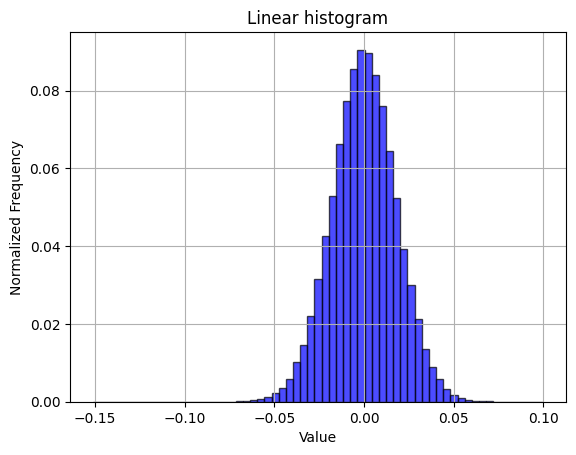

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.19209290e-07 5.96046448e-08 2.38418579e-07 2.38418579e-07
 4.76837158e-07 5.96046448e-07 1.78813934e-07 1.78813934e-07
 3.57627869e-07 2.38418579e-07 1.19209290e-07 0.00000000e+00
 0.00000000e+00 5.96046448e-08 5.96046448e-08 1.19209290e-07
 5.96046448e-08 5.96046448e-08 5.96046448e-08 1.78813934e-07
 2.38418579e-07 2.98023224e-07 1.78813934e-07 8.94069672e-07
 1.72853470e-06 3.33786011e-06 7.27176666e-06 1.36911869e-04
 8.48931074e-03 1.38196111e-01 4.80740964e-01 3.26361418e-01
 4.46096659e-02 1.41233206e-03 2.17556953e-05 4.41074371e-06
 1.78813934e-06 1.49011612e-06 4.17232513e-07 7.74860382e-07
 3.57627869e-07 2.38418579e-07 1.78813934e-07 0.00000000e+00
 1.78813934e-07 5.96046448e-08 0.00000000e+00 1.19209290e-07
 0.00000000e+00 0.00000000e+00 1.78813934e-07 1.78813934e-07
 5.36441803e-07 4.76837158e-07 5.96046448e-07 8.34465027e-07
 2.98023224e-07 5.36441803e-07 1.19209290e-07 2.38418579e-07
 5.

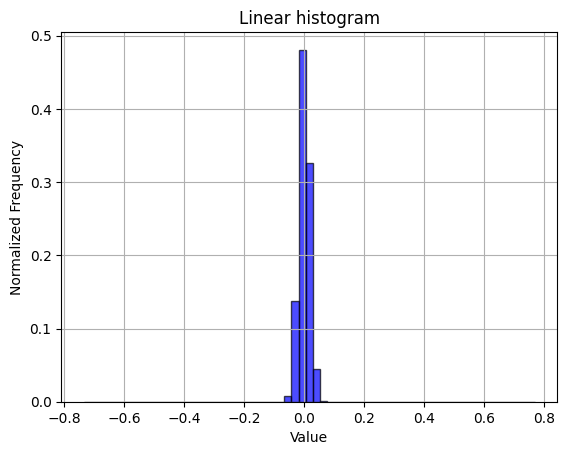

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[2.98023224e-08 2.98023224e-08 4.47034836e-08 1.19209290e-07
 1.04308128e-07 1.63912773e-07 2.98023224e-08 1.19209290e-07
 1.49011612e-08 1.34110451e-07 1.49011612e-08 5.96046448e-08
 2.98023224e-08 1.49011612e-08 7.45058060e-08 7.45058060e-08
 1.63912773e-07 1.78813934e-07 2.83122063e-07 5.21540642e-07
 1.02818012e-06 1.92224979e-06 4.50015068e-06 8.86619091e-06
 5.87254763e-05 9.45627689e-04 1.36562735e-02 1.26346156e-01
 4.58044723e-01 3.34997028e-01 6.01256788e-02 5.43300807e-03
 3.36363912e-04 2.37673521e-05 6.18398190e-06 2.98023224e-06
 1.83284283e-06 7.45058060e-07 3.42726707e-07 2.53319740e-07
 8.94069672e-08 8.9

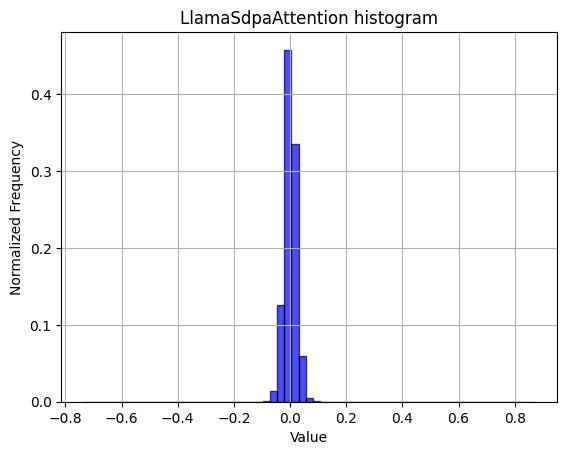

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.43569449e-08 6.65354174e-08
 0.00000000e+00 0.00000000e+00 8.87138899e-08 1.55249307e-07
 1.10892362e-07 1.33070835e-07 1.33070835e-07 2.43963197e-07
 4.43569449e-07 6.43175702e-07 1.13110210e-06 2.68359517e-06
 7.80682231e-06 2.51503878e-05 8.07961752e-05 3.46982202e-04
 1.59072876e-03 7.02631751e-03 2.53637669e-02 7.00658532e-02
 1.41995363e-01 2.08538255e-01 2.22341427e-01 1.72416465e-01
 9.57350620e-02 3.88119942e-02 1.19288688e-02 2.88910090e-03
 6.29646834e-04 1.43406003e-04 3.75925108e-05 1.14219133e-05
 4.32480213e-06 1.66338544e-06 9.09317371e-07 3.32677087e-07
 2.43963197e-07 6.65354174e-08 1.55249307e-07 8.87138899e-08
 1.10892362e-07 6.65354174e-08 2.21784725e-08 4.43569449e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

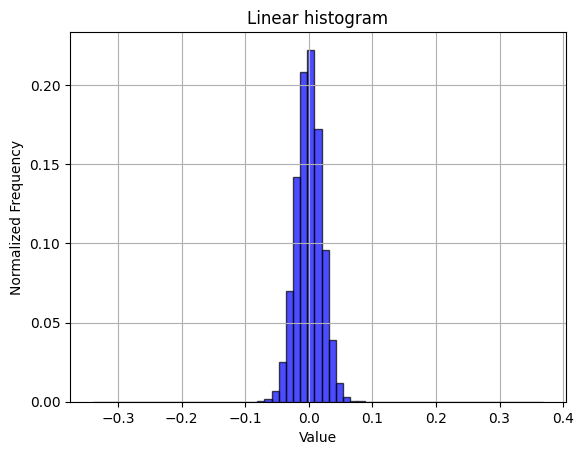

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[6.65354174e-08 6.65354174e-08 2.21784725e-08 1.77427780e-07
 8.87138899e-08 8.87138899e-08 1.77427780e-07 1.10892362e-07
 2.66141670e-07 2.66141670e-07 3.99212505e-07 1.86299169e-06
 7.58503759e-06 2.84328017e-05 1.24199446e-04 4.98816024e-04
 1.56710869e-03 4.72095401e-03 1.20622280e-02 2.56107242e-02
 4.87754955e-02 8.02331969e-02 1.16107697e-01 1.42197520e-01
 1.52133032e-01 1.40853017e-01 1.11580693e-01 7.66813589e-02
 4.61591233e-02 2.39913186e-02 1.04328643e-02 4.25513955e-03
 1.40329849e-03 4.25161317e-04 1.15372414e-04 2.36866086e-05
 5.07887020e-06 1.48595766e-06 4.65747922e-07 4.43569449e-07
 2.43963197e-07 8.87138899e-08 8.87138899e-08 1.33070835e-07
 8.87138899e-08 6.65354174e-08 0.00000000e+00 6.65354174e-08
 2.21784725e-08 2.21784725e-08 0.00000000e+00 0.00000000e+00
 2.21784725e-08 0.00000000e+00 4.43569449e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

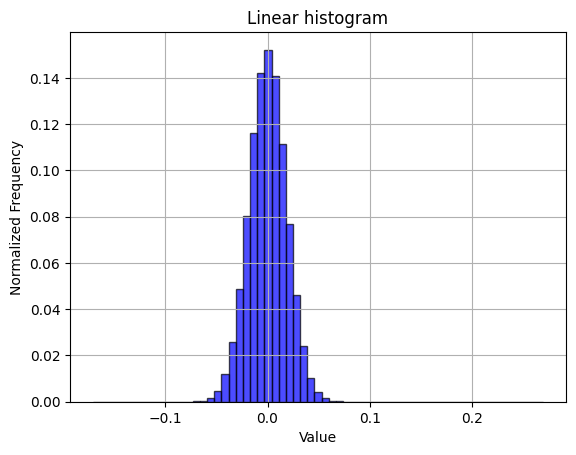

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 2.21784725e-08 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 2.21784725e-08 4.43569449e-08
 0.00000000e+00 0.00000000e+00 2.21784725e-08 4.43569449e-08
 0.00000000e+00 2.21784725e-08 2.21784725e-08 4.43569449e-08
 4.43569449e-08 8.87138899e-08 6.65354174e-08 1.99606252e-07
 6.43175702e-07 5.10104867e-07 3.61509101e-06 4.05200692e-05
 4.23675360e-04 2.98721846e-03 1.49443205e-02 5.34231940e-02
 1.28628753e-01 2.13241533e-01 2.44369085e-01 1.91226627e-01
 1.01257080e-01 3.79696558e-02 9.52638582e-03 1.70927270e-03
 2.24290892e-04 1.92065572e-05 1.95170558e-06 6.20997229e-07
 4.87926394e-07 2.43963197e-07 6.65354174e-08 1.55249307e-07
 4.43569449e-08 4.43569449e-08 2.21784725e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0

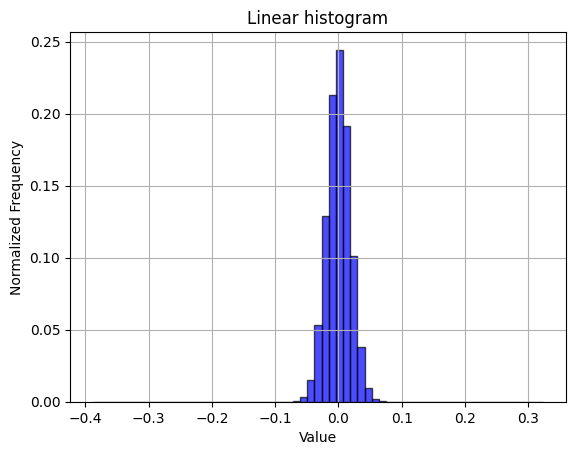

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

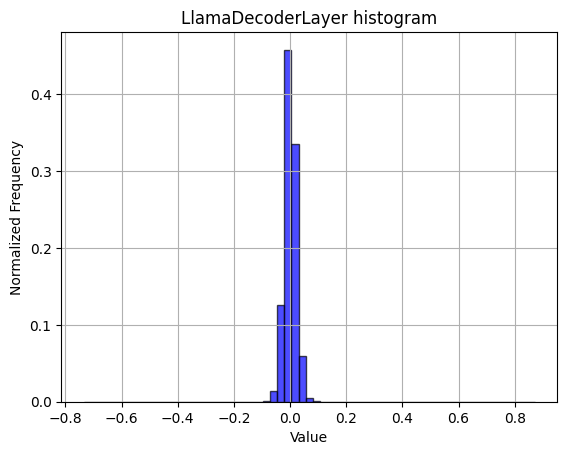

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 5.96046448e-08 0.00000000e+00 0.00000000e+00
 5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.78813934e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.19209290e-07 2.98023224e-07 1.78813934e-07
 5.96046448e-08 2.38418579e-07 2.38418579e-07 4.17232513e-07
 1.78813934e-07 6.55651093e-07 1.78813934e-07 5.36441803e-07
 1.25169754e-06 1.84774399e-06 3.51667404e-06 5.96046448e-06
 1.15633011e-05 6.37769699e-05 1.05959177e-03 1.36188865e-02
 9.31306481e-02 3.26816142e-01 3.97596478e-01 1.40468419e-01
 2.46969461e-02 2.35331059e-03 1.34229660e-04 1.63912773e-05
 5.90085983e-06 4.47034836e-06 1.78813934e-06 1.60932541e-06
 1.13248825e-06 4.76837158e-07 4.17232513e-07 1.78813934e-07
 2.38418579e-07 1.78813934e-07 2.38418579e-07 1.78813934e-07
 5.96046448e-08 1.19209290e-07 0.00000000e+00 5.96046448e-08
 5.96046448e-08 0.00000000e+00 1.78813934e-07 5.96046448e-08
 5.

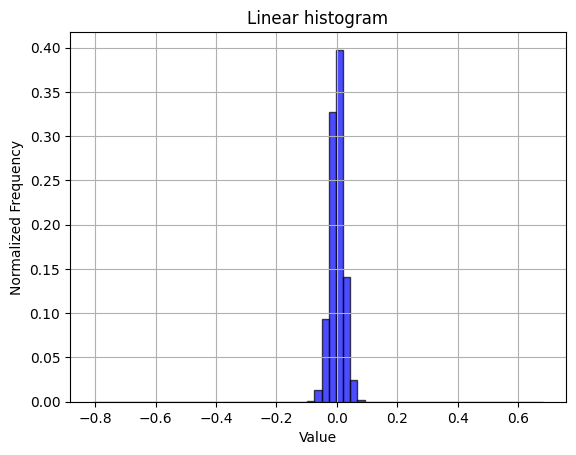

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.78813934e-07 3.57627869e-07 1.78813934e-07 1.78813934e-07
 2.38418579e-07 3.57627869e-07 5.96046448e-07 1.13248825e-06
 8.94069672e-07 1.13248825e-06 1.19209290e-06 1.96695328e-06
 2.74181366e-06 3.15904617e-06 3.21865082e-06 3.57627869e-06
 6.85453415e-06 1.00135803e-05 2.09808350e-05 5.70416451e-05
 1.72853470e-04 5.46813011e-04 1.46436691e-03 3.87752056e-03
 9.44846869e-03 2.01495886e-02 4.05224562e-02 7.20360875e-02
 1.16663933e-01 1.66337073e-01 1.87233031e-01 1.53148293e-01
 1.03410184e-01 6.15225434e-02 3.43281627e-02 1.68924928e-02
 7.40790367e-03 2.97474861e-03 1.15495920e-03 3.65614891e-04
 1.27136707e-04 4.60743904e-05 1.83582306e-05 8.28504562e-06
 5.24520874e-06 3.93390656e-06 3.99351120e-06 2.62260437e-06
 2.74181366e-06 2.62260437e-06 1.13248825e-06 1.43051147e-06
 7.74860382e-07 5.96046448e-07 6.55651093e-07 4.17232513e-07
 2.38418579e-07 2.98023224e-07 2.38418579e-07 0.00000000e+00
 5.

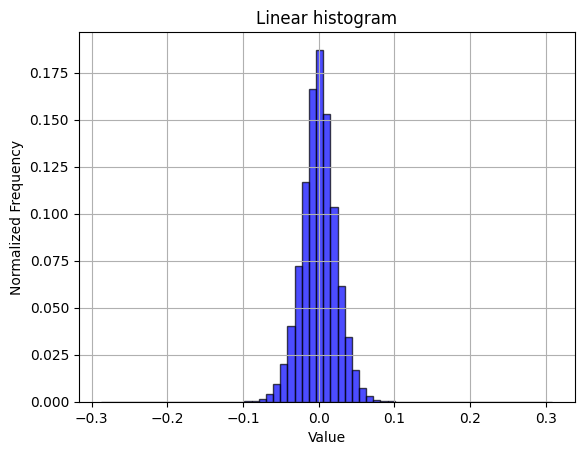

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.19209290e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 5.96046448e-08 1.19209290e-07 4.17232513e-07
 1.49011612e-06 2.92062759e-06 6.85453415e-06 1.69277191e-05
 4.64320183e-05 9.78708267e-05 2.12788582e-04 4.90069389e-04
 9.92298126e-04 1.97535753e-03 3.45981121e-03 6.42865896e-03
 1.09063983e-02 1.64370537e-02 2.65237093e-02 3.69454026e-02
 5.15821576e-02 6.51125908e-02 7.94506073e-02 9.07073617e-02
 9.83875394e-02 9.88518000e-02 9.31687951e-02 8.20683241e-02
 6.87412024e-02 5.30679226e-02 3.95955443e-02 2.90037394e-02
 1.79823637e-02 1.21474266e-02 7.21120834e-03 4.08977270e-03
 2.08944082e-03 1.15460157e-03 5.79595566e-04 2.52306461e-04
 1.22427940e-04 5.46574593e-05 1.98483467e-05 8.40425491e-06
 3.45706940e-06 1.54972076e-06 1.78813934e-07 1.19209290e-07
 1.19209290e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

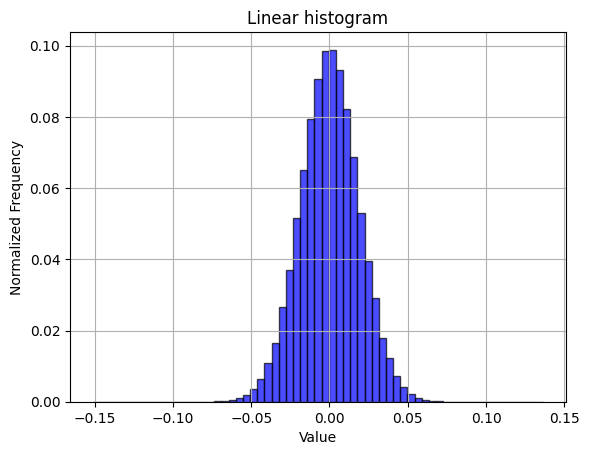

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 5.96046448e-08 5.96046448e-08 5.96046448e-08
 2.38418579e-07 1.19209290e-07 1.19209290e-07 2.38418579e-07
 5.96046448e-08 2.38418579e-07 5.96046448e-08 2.38418579e-07
 4.76837158e-07 2.38418579e-07 4.17232513e-07 2.38418579e-07
 6.55651093e-07 4.76837158e-07 2.38418579e-07 5.36441803e-07
 7.15255737e-07 9.53674316e-07 1.54972076e-06 3.21865082e-06
 4.11272049e-06 1.11460686e-05 1.26779079e-04 1.68532133e-03
 1.54924989e-02 7.94896483e-02 2.21167147e-01 3.24690998e-01
 2.40951717e-01 9.41043496e-02 1.97561979e-02 2.30038166e-03
 1.78635120e-04 1.32322311e-05 4.29153442e-06 3.03983688e-06
 1.84774399e-06 1.37090683e-06 7.74860382e-07 6.55651093e-07
 5.36441803e-07 4.76837158e-07 2.38418579e-07 4.76837158e-07
 1.19209290e-07 1.19209290e-07 1.19209290e-07 2.38418579e-07
 2.98023224e-07 4.17232513e-07 2.38418579e-07 3.57627869e-07
 2.98023224e-07 1.19209290e-07 1.19209290e-07 2.38418579e-07
 5.

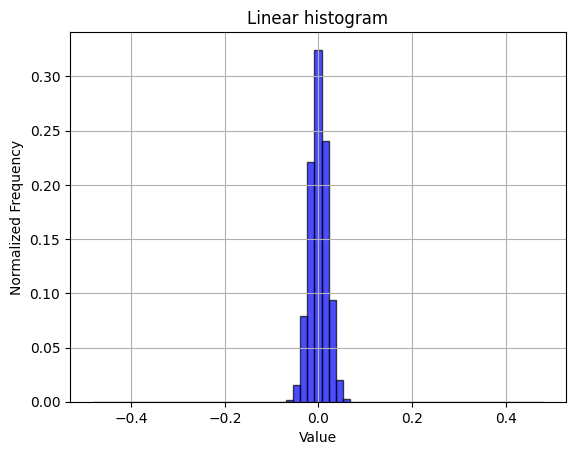

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 1.49011612e-08 0.00000000e+00 0.00000000e+00
 1.49011612e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.47034836e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.47034836e-08 7.45058060e-08 8.94069672e-08
 7.45058060e-08 1.04308128e-07 1.34110451e-07 1.78813934e-07
 7.45058060e-08 3.27825546e-07 2.83122063e-07 3.87430191e-07
 9.23871994e-07 1.23679638e-06 2.19047070e-06 3.85940075e-06
 7.51018524e-06 3.84896994e-05 6.02379441e-04 8.75379145e-03
 8.14240575e-02 3.40687305e-01 4.17505249e-01 1.32345095e-01
 1.71814859e-02 1.34311616e-03 7.95274973e-05 1.02370977e-05
 4.23192978e-06 3.0

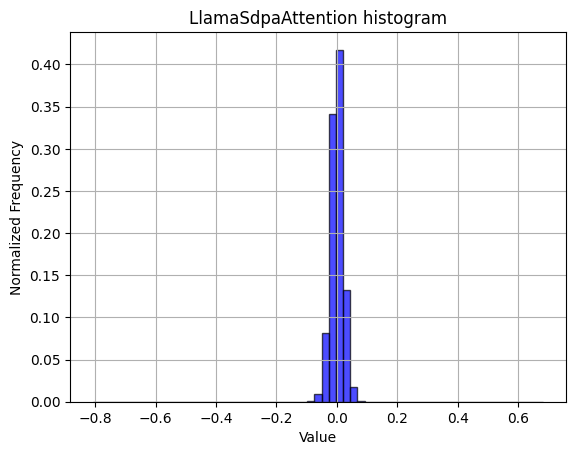

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 0.00000000e+00 2.21784725e-08 6.65354174e-08
 0.00000000e+00 0.00000000e+00 2.21784725e-08 1.10892362e-07
 8.87138899e-08 1.10892362e-07 1.10892362e-07 1.10892362e-07
 1.99606252e-07 5.76640284e-07 5.54461812e-07 1.92952711e-06
 6.23215077e-06 2.31099683e-05 1.22358633e-04 7.05541566e-04
 3.82891367e-03 1.74668778e-02 5.83561077e-02 1.36186822e-01
 2.18892120e-01 2.41398967e-01 1.82194821e-01 9.61077269e-02
 3.38668158e-02 8.74499388e-03 1.71781141e-03 3.01760296e-04
 5.62889631e-05 1.26195508e-05 3.61509101e-06 1.44160071e-06
 3.32677087e-07 2.88320142e-07 1.33070835e-07 2.21784725e-08
 4.43569449e-08 0.00000000e+00 4.43569449e-08 4.43569449e-08
 2.21784725e-08 0.00000000e+00 8.87138899e-08 2.21784725e-08
 0.00000000e+00 2.21784725e-08 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

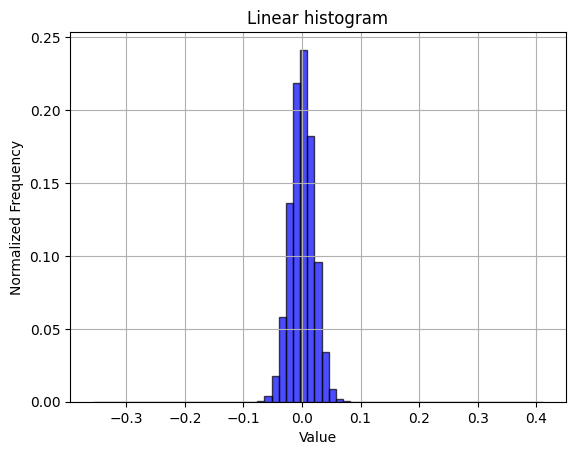

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 2.21784725e-08 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.43569449e-08 4.43569449e-08 2.21784725e-08 8.87138899e-08
 6.65354174e-08 8.87138899e-08 1.10892362e-07 6.65354174e-08
 6.65354174e-08 3.10498615e-07 3.77034032e-07 4.21390977e-07
 1.37506529e-06 5.34501187e-06 3.22474990e-05 1.73857046e-04
 8.21601513e-04 3.19609531e-03 1.02540393e-02 2.57524002e-02
 5.76101791e-02 1.02416393e-01 1.47766690e-01 1.76233624e-01
 1.71097844e-01 1.36542520e-01 8.92960304e-02 4.78205792e-02
 2.07080176e-02 7.30019946e-03 2.27278332e-03 5.53619030e-04
 1.16281731e-04 2.03154808e-05 3.63726949e-06 9.75852789e-07
 3.77034032e-07 2.43963197e-07 2.88320142e-07 1.99606252e-07
 1.33070835e-07 6.65354174e-08 4.43569449e-08 2.21784725e-08
 2.21784725e-08 2.21784725e-08 2.21784725e-08 2.21784725e-08
 2

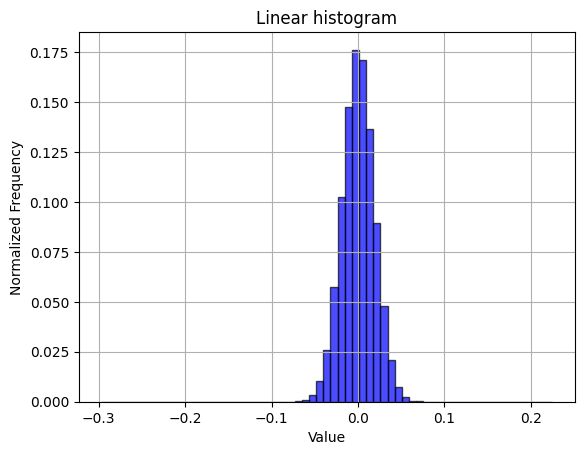

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 2.21784725e-08 0.00000000e+00 0.00000000e+00 2.21784725e-08
 6.65354174e-08 1.33070835e-07 1.77427780e-07 5.54461812e-07
 4.54658686e-06 1.58250055e-03 9.28285954e-02 5.40279056e-01
 3.42301147e-01 2.28544058e-02 1.46644060e-04 1.37506529e-06
 2.66141670e-07 1.55249307e-07 4.43569449e-08 8.87138899e-08
 0.00000000e+00 2.21784725e-08 0.00000000e+00 2.21784725e-08
 4.43569449e-08 0.00000000e+00 4.43569449e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

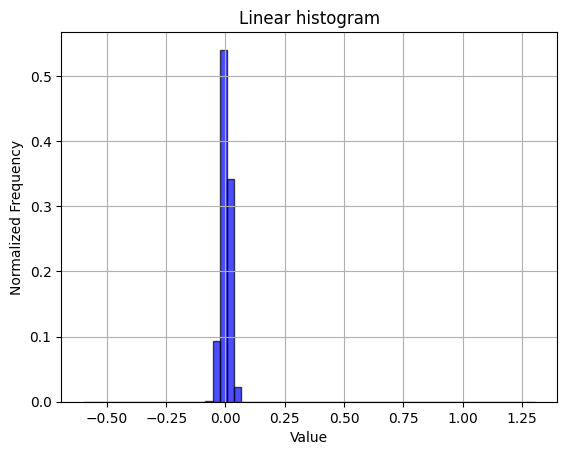

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

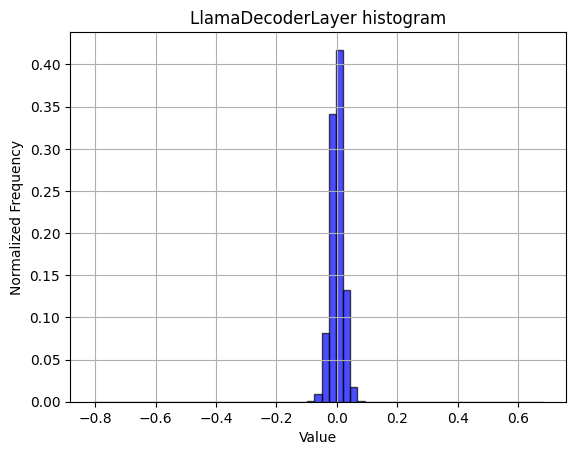

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.19209290e-07 0.00000000e+00 1.19209290e-07 1.19209290e-07
 5.96046448e-08 1.78813934e-07 1.19209290e-07 0.00000000e+00
 3.57627869e-07 2.38418579e-07 1.78813934e-07 2.98023224e-07
 3.57627869e-07 8.34465027e-07 1.49011612e-06 2.44379044e-06
 3.75509262e-06 9.65595245e-06 4.03523445e-05 6.33776188e-04
 8.92502069e-03 7.57252574e-02 3.43176186e-01 4.33822930e-01
 1.19483292e-01 1.67196393e-02 1.34956837e-03 7.80224800e-05
 1.16229057e-05 5.06639481e-06 2.86102295e-06 1.66893005e-06
 1.19209290e-06 9.53674316e-07 4.17232513e-07 4.76837158e-07
 2.98023224e-07 2.38418579e-07 5.96046448e-08 1.78813934e-07
 1.78813934e-07 0.00000000e+00 1.19209290e-07 1.19209290e-07
 0.00000000e+00 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

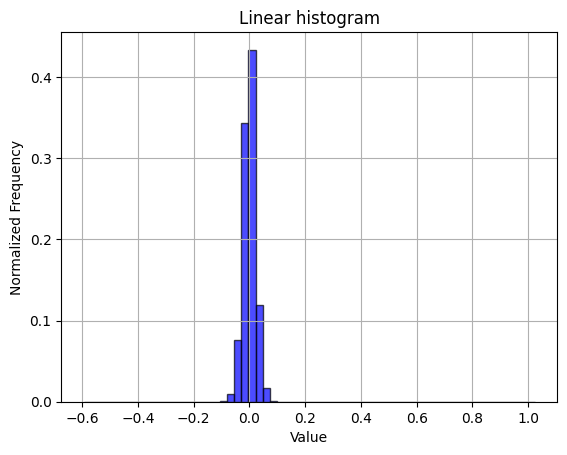

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 1.19209290e-07
 1.19209290e-07 1.19209290e-07 4.76837158e-07 4.17232513e-07
 7.15255737e-07 2.98023224e-07 8.34465027e-07 1.19209290e-06
 2.02655792e-06 1.19209290e-06 2.56299973e-06 2.62260437e-06
 3.93390656e-06 4.88758087e-06 6.19888306e-06 7.33137131e-06
 1.22189522e-05 2.08020210e-05 5.44786453e-05 1.71542168e-04
 4.79698181e-04 1.32215023e-03 3.51083279e-03 8.68809223e-03
 1.88133121e-02 3.90964150e-02 7.18683600e-02 1.26056969e-01
 1.91023409e-01 2.07812905e-01 1.49011612e-01 8.88774991e-02
 4.85793948e-02 2.51199007e-02 1.14603639e-02 5.01865149e-03
 1.87343359e-03 6.85393810e-04 2.40683556e-04 8.62479210e-05
 2.91466713e-05 1.32322311e-05 9.05990601e-06 6.85453415e-06
 4.94718552e-06 3.51667404e-06 3.27825546e-06 2.86102295e-06
 2.44379044e-06 9.53674316e-07 8.94069672e-07 1.49011612e-06
 5.96046448e-07 2.98023224e-07 2.98023224e-07 1.78813934e-07
 2.

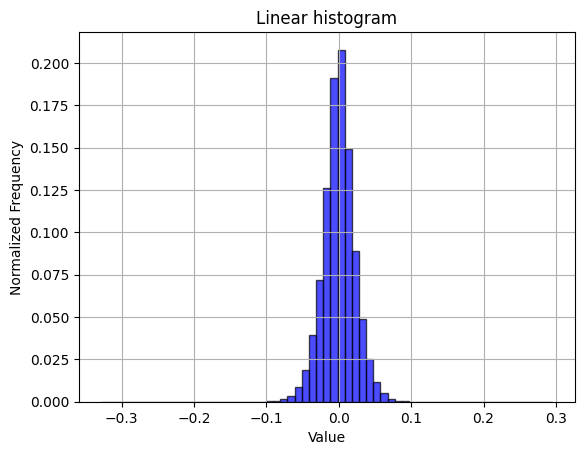

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 2.38418579e-07 1.78813934e-07 7.74860382e-07
 1.90734863e-06 5.00679016e-06 1.10268593e-05 3.08752060e-05
 6.36577606e-05 1.71840191e-04 3.78131866e-04 7.85052776e-04
 1.58500671e-03 3.04794312e-03 5.65046072e-03 9.74512100e-03
 1.59726143e-02 2.52845287e-02 3.76819968e-02 5.09090424e-02
 6.63986206e-02 8.08029175e-02 9.35552716e-02 1.00615501e-01
 1.01460516e-01 9.44152474e-02 8.27393532e-02 6.95343614e-02
 5.28806448e-02 3.86972427e-02 2.69353986e-02 1.71825886e-02
 1.05457902e-02 6.13945723e-03 3.37028503e-03 1.77443027e-03
 9.06765461e-04 4.11450863e-04 1.69277191e-04 8.41617584e-05
 3.19480896e-05 1.42455101e-05 5.18560410e-06 2.44379044e-06
 8.34465027e-07 3.57627869e-07 1.78813934e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

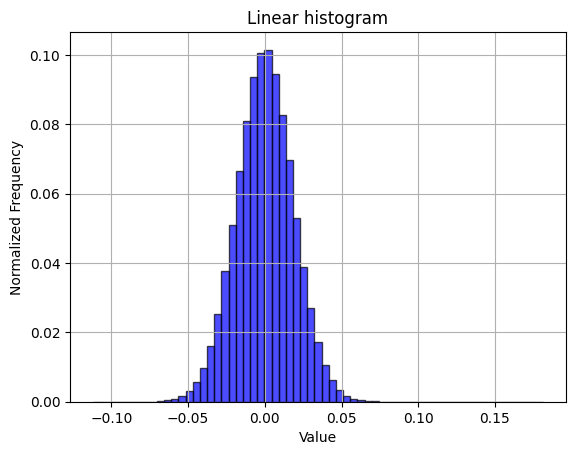

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.19209290e-07 1.19209290e-07 1.19209290e-07 4.76837158e-07
 2.98023224e-07 7.15255737e-07 4.76837158e-07 8.94069672e-07
 6.55651093e-07 6.55651093e-07 2.98023224e-07 5.36441803e-07
 3.57627869e-07 1.19209290e-07 2.98023224e-07 4.17232513e-07
 2.98023224e-07 7.15255737e-07 8.34465027e-07 2.56299973e-06
 6.19888306e-06 7.06315041e-05 3.23688984e-03 5.70634007e-02
 3.02103281e-01 4.42090929e-01 1.74862385e-01 1.98361874e-02
 6.87539577e-04 1.78813934e-05 3.99351120e-06 1.43051147e-06
 8.94069672e-07 2.98023224e-07 2.38418579e-07 2.38418579e-07
 4.17232513e-07 5.36441803e-07 7.15255737e-07 5.96046448e-07
 7.15255737e-07 7.74860382e-07 4.17232513e-07 7.15255737e-07
 2.38418579e-07 5.96046448e-08 2.98023224e-07 2.98023224e-07
 1.19209290e-07 1.19209290e-07 5.96046448e-08 0.00000000e+00
 1.

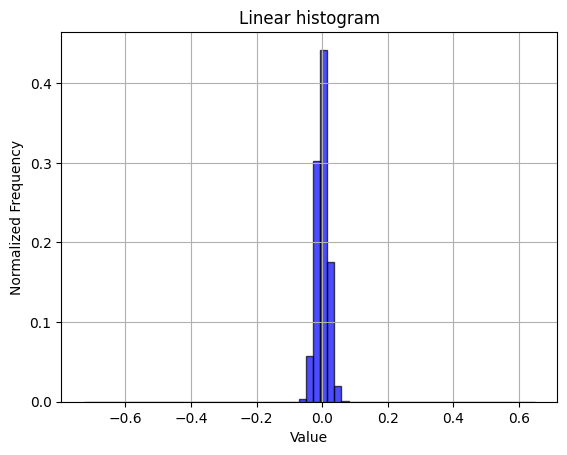

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 0.00000000e+00 0.00000000e+00 1.49011612e-08
 1.49011612e-08 1.49011612e-08 2.98023224e-08 7.45058060e-08
 1.63912773e-07 7.45058060e-08 2.53319740e-07 1.63912773e-07
 3.72529030e-07 2.83122063e-07 1.63912773e-07 3.12924385e-07
 3.27825546e-07 7.00354576e-07 1.63912773e-06 2.11596489e-06
 5.37931919e-06 1.36196613e-05 1.58131123e-04 3.21473181e-03
 5.06986380e-02 3.51854920e-01 4.80028033e-01 1.05505273e-01
 8.05872679e-03 4.17023897e-04 2.39312649e-05 6.45220280e-06
 3.17394733e-06 1.66893005e-06 8.79168510e-07 5.81145287e-07
 4.61935997e-07 2.53319740e-07 3.12924385e-07 2.83122063e-07
 2.08616257e-07 8.9

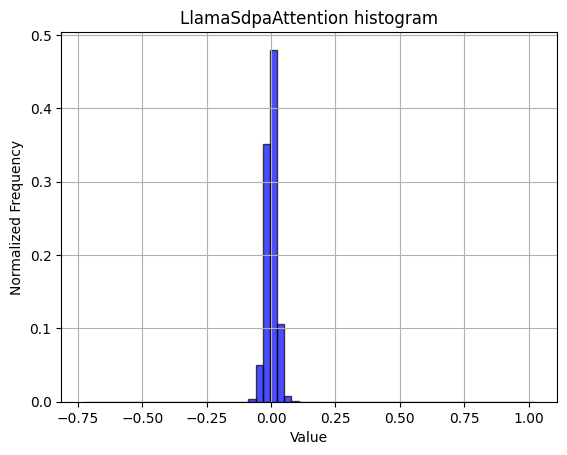

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 4.43569449e-08 6.65354174e-08 4.43569449e-08 4.43569449e-08
 4.43569449e-08 4.43569449e-08 4.43569449e-08 2.21784725e-08
 1.77427780e-07 1.33070835e-07 3.54855560e-07 2.88320142e-07
 6.87532647e-07 1.30852988e-06 3.48202018e-06 8.67178274e-06
 2.85658725e-05 9.98474831e-05 4.15802002e-04 1.82841545e-03
 7.04845162e-03 2.26303589e-02 5.73975763e-02 1.12915172e-01
 1.75277998e-01 2.05399646e-01 1.83501998e-01 1.27240625e-01
 6.65989366e-02 2.75244602e-02 8.94114029e-03 2.39822476e-03
 5.54727954e-04 1.29899313e-04 3.52859497e-05 1.02908112e-05
 3.85905421e-06 1.26417293e-06 7.09711119e-07 2.21784725e-07
 2.66141670e-07 2.21784725e-07 1.55249307e-07 4.43569449e-08
 4.43569449e-08 6.65354174e-08 6.65354174e-08 4.43569449e-08
 2.21784725e-08 2.21784725e-08 0.00000000e+00 0.00000000e+00
 2

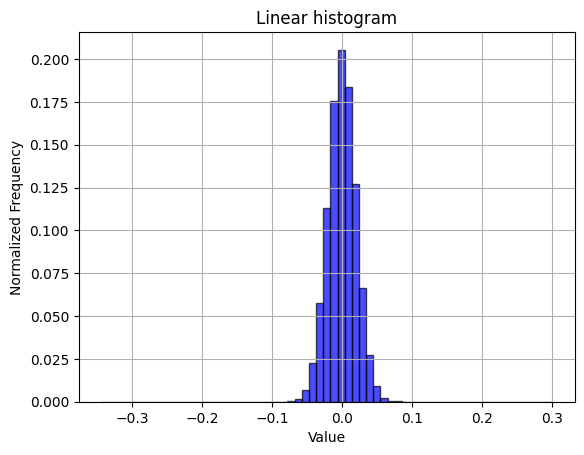

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[4.43569449e-08 6.65354174e-08 2.21784725e-08 2.21784725e-08
 0.00000000e+00 4.43569449e-08 4.43569449e-08 0.00000000e+00
 2.21784725e-08 1.10892362e-07 6.65354174e-08 6.65354174e-08
 2.88320142e-07 1.99606252e-07 3.10498615e-07 3.99212505e-07
 1.15328057e-06 3.26023545e-06 1.52366106e-05 5.12766284e-05
 1.89293263e-04 6.00260358e-04 1.71796666e-03 4.22178313e-03
 9.42638309e-03 2.00524885e-02 3.55885528e-02 5.85962118e-02
 8.47518389e-02 1.09824469e-01 1.28668342e-01 1.33851828e-01
 1.24351368e-01 1.01951533e-01 7.67953340e-02 5.08111022e-02
 2.98576799e-02 1.62353959e-02 7.38676204e-03 3.18793363e-03
 1.26022516e-03 4.21457512e-04 1.30431597e-04 3.32455302e-05
 1.01577404e-05 2.94973684e-06 7.31889592e-07 4.65747922e-07
 2.66141670e-07 2.66141670e-07 1.55249307e-07 8.87138899e-08
 6.65354174e-08 8.87138899e-08 6.65354174e-08 8.87138899e-08
 2.21784725e-08 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0

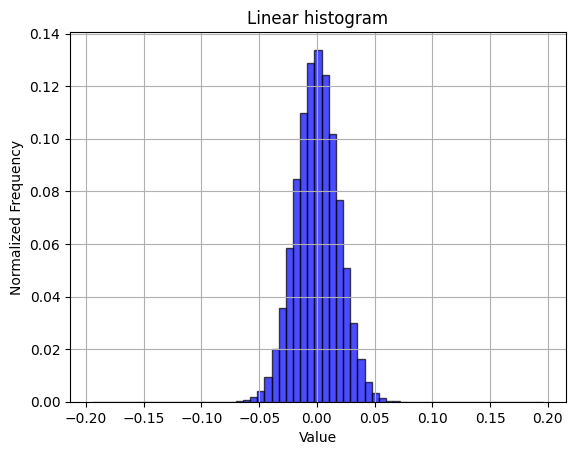

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 2.21784725e-08 6.65354174e-08 1.99606252e-07 1.99606252e-07
 3.77034032e-07 1.90734863e-06 1.36575033e-04 6.95794128e-03
 9.51457578e-02 3.65250277e-01 3.98910700e-01 1.22673212e-01
 1.06781361e-02 2.40392463e-04 3.08280767e-06 5.10104867e-07
 2.43963197e-07 1.33070835e-07 8.87138899e-08 2.21784725e-08
 2.21784725e-08 0.00000000e+00 2.21784725e-08 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

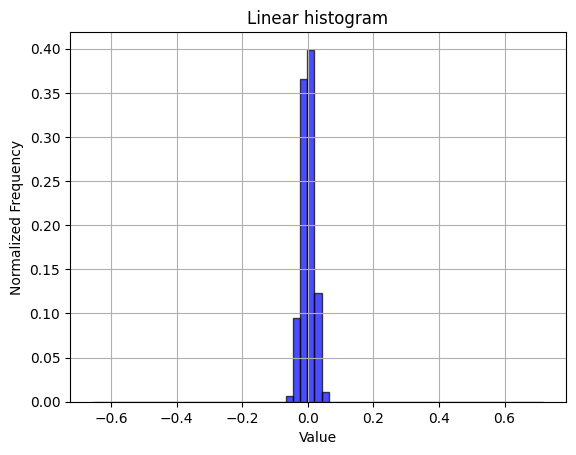

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

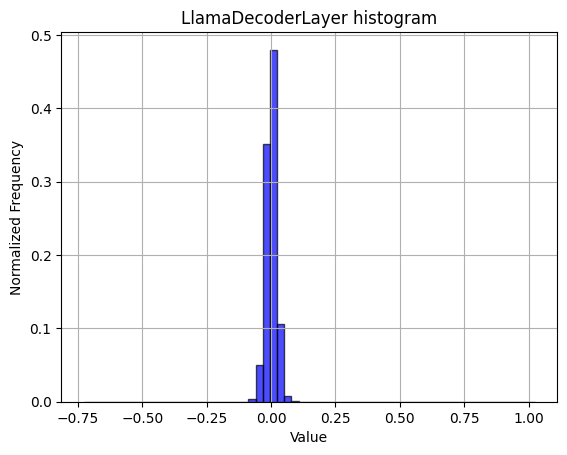

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 0.00000000e+00 0.00000000e+00 1.19209290e-07
 1.78813934e-07 2.38418579e-07 2.38418579e-07 1.19209290e-07
 0.00000000e+00 1.19209290e-07 1.78813934e-07 1.19209290e-07
 1.78813934e-07 4.17232513e-07 3.57627869e-07 7.15255737e-07
 8.94069672e-07 1.19209290e-06 1.13248825e-06 2.20537186e-06
 4.05311584e-06 5.42402267e-06 1.23381615e-05 5.90682030e-05
 5.45918941e-04 4.69350815e-03 2.82976627e-02 1.15350068e-01
 3.01758051e-01 3.43817055e-01 1.54711246e-01 4.19767499e-02
 7.66110420e-03 9.66548920e-04 9.70959663e-05 1.49607658e-05
 6.13927841e-06 5.12599945e-06 2.26497650e-06 1.72853470e-06
 9.53674316e-07 9.53674316e-07 6.55651093e-07 6.55651093e-07
 5.36441803e-07 1.78813934e-07 2.38418579e-07 2.98023224e-07
 1.78813934e-07 1.19209290e-07 0.00000000e+00 1.78813934e-07
 2.38418579e-07 0.00000000e+00 5.96046448e-08 5.96046448e-08
 0.

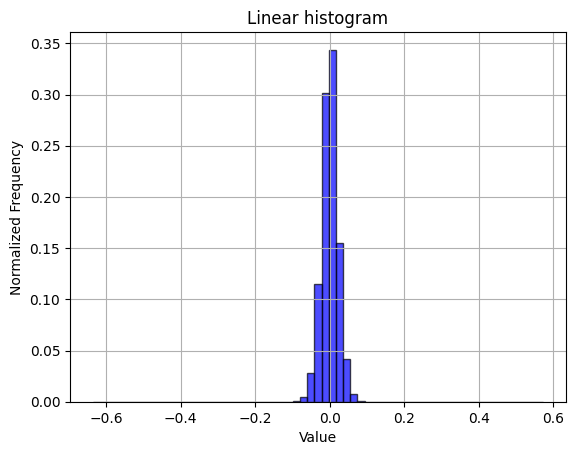

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.78813934e-07 3.57627869e-07 3.57627869e-07 1.78813934e-07
 6.55651093e-07 1.37090683e-06 1.07288361e-06 1.43051147e-06
 1.01327896e-06 2.32458115e-06 1.54972076e-06 3.69548798e-06
 2.50339508e-06 3.57627869e-06 6.07967377e-06 9.11951065e-06
 2.21133232e-05 6.28829002e-05 2.00450420e-04 6.86228275e-04
 2.09510326e-03 5.79679012e-03 1.39349103e-02 3.16380262e-02
 6.31206632e-02 1.12584651e-01 1.73727870e-01 2.05175698e-01
 1.69992864e-01 1.09158218e-01 6.02712631e-02 2.95857191e-02
 1.36485696e-02 5.44774532e-03 1.87033415e-03 6.43789768e-04
 1.89840794e-04 5.86509705e-05 1.88946724e-05 8.58306885e-06
 5.48362732e-06 4.23192978e-06 2.38418579e-06 3.57627869e-06
 2.32458115e-06 1.49011612e-06 1.01327896e-06 1.01327896e-06
 1.13248825e-06 3.57627869e-07 5.36441803e-07 4.17232513e-07
 5.96046448e-08 1.78813934e-07 5.96046448e-08 2.38418579e-07
 5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

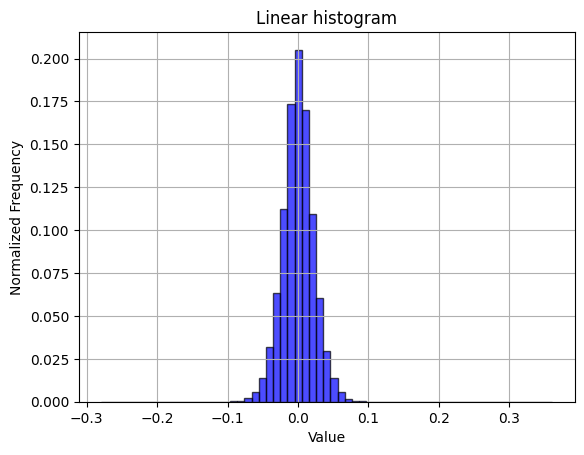

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.19209290e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 1.78813934e-07 7.74860382e-07 1.72853470e-06
 2.32458115e-06 5.48362732e-06 1.28149986e-05 2.70605087e-05
 5.20944595e-05 1.13546848e-04 2.08735466e-04 4.51624393e-04
 7.73191452e-04 1.36977434e-03 2.30348110e-03 4.12315130e-03
 6.26051426e-03 9.62013006e-03 1.42477751e-02 2.13457346e-02
 2.80191302e-02 3.83540392e-02 4.71499562e-02 5.85375428e-02
 6.78330064e-02 7.55404830e-02 8.15724730e-02 8.41177106e-02
 8.15690756e-02 7.54969120e-02 6.77869320e-02 5.86327910e-02
 4.70072627e-02 3.83522511e-02 2.81700492e-02 2.13457346e-02
 1.42132044e-02 9.61858034e-03 6.25252724e-03 4.15515900e-03
 2.31856108e-03 1.37513876e-03 7.77423382e-04 4.59432602e-04
 2.08497047e-04 1.08003616e-04 5.68628311e-05 2.87294388e-05
 1.20401382e-05 5.18560410e-06 2.74181366e-06 1.13248825e-06
 4.17232513e-07 3.57627869e-07 2.38418579e-07 5.96046448e-08
 0.

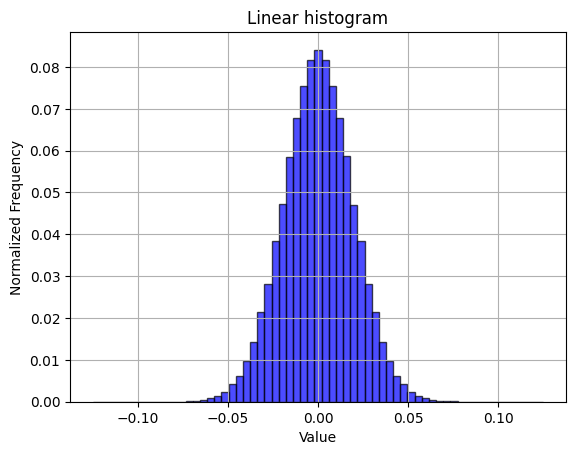

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 5.96046448e-08 5.96046448e-08 0.00000000e+00
 5.96046448e-08 5.96046448e-08 5.96046448e-08 0.00000000e+00
 5.96046448e-08 0.00000000e+00 1.19209290e-07 1.19209290e-07
 5.96046448e-08 8.34465027e-07 7.74860382e-07 6.55651093e-07
 9.53674316e-07 1.78813934e-06 3.81469727e-06 6.49690628e-06
 6.11543655e-05 1.17629766e-03 1.40619874e-02 8.77705812e-02
 2.60168016e-01 3.51118505e-01 2.15575397e-01 6.09247088e-02
 8.49181414e-03 5.91099262e-04 3.01003456e-05 5.84125519e-06
 3.15904617e-06 1.78813934e-06 1.07288361e-06 7.15255737e-07
 3.57627869e-07 1.19209290e-07 2.38418579e-07 1.19209290e-07
 1.78813934e-07 2.38418579e-07 5.96046448e-08 5.96046448e-08
 1.19209290e-07 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.

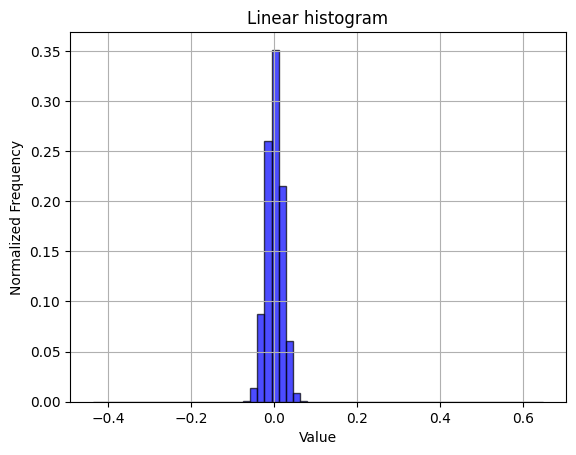

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.49011612e-08 0.00000000e+00 0.00000000e+00 4.47034836e-08
 7.45058060e-08 5.96046448e-08 5.96046448e-08 1.49011612e-08
 4.47034836e-08 5.96046448e-08 5.96046448e-08 4.47034836e-08
 1.19209290e-07 1.63912773e-07 3.72529030e-07 4.91738319e-07
 9.68575478e-07 1.23679638e-06 1.84774399e-06 3.14414501e-06
 4.99188900e-06 1.63316727e-05 1.30221248e-04 1.55340135e-03
 1.48813128e-02 9.20924544e-02 3.01683664e-01 3.82888377e-01
 1.68047890e-01 3.39733213e-02 4.28228080e-03 3.83585691e-04
 3.59565020e-05 7.06315041e-06 3.59117985e-06 2.63750553e-06
 1.13248825e-06 9.8

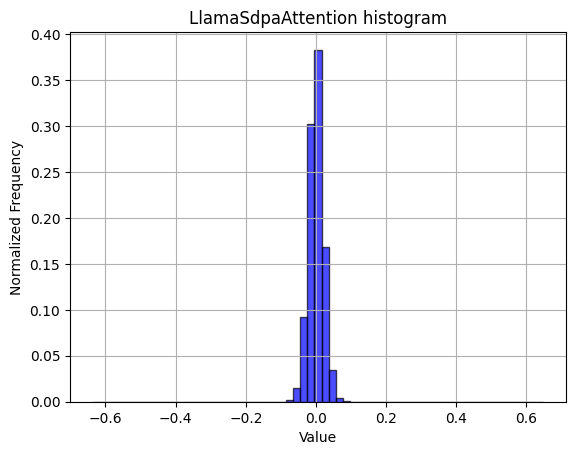

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 2.21784725e-08 2.21784725e-08 4.43569449e-08
 4.43569449e-08 4.43569449e-08 0.00000000e+00 2.21784725e-08
 4.43569449e-08 6.65354174e-08 1.33070835e-07 2.43963197e-07
 3.99212505e-07 6.87532647e-07 1.57467155e-06 5.89947368e-06
 2.93199406e-05 2.10074491e-04 1.81102753e-03 1.40100967e-02
 7.06990708e-02 2.00331000e-01 3.09256909e-01 2.56734138e-01
 1.13778846e-01 2.83400957e-02 4.22249284e-03 4.92628231e-04
 5.95935555e-05 1.11557717e-05 2.32873961e-06 8.87138899e-07
 3.10498615e-07 2.21784725e-07 1.33070835e-07 1.33070835e-07
 2.21784725e-08 2.21784725e-08 6.65354174e-08 2.21784725e-08
 0.00000000e+00 6.65354174e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0

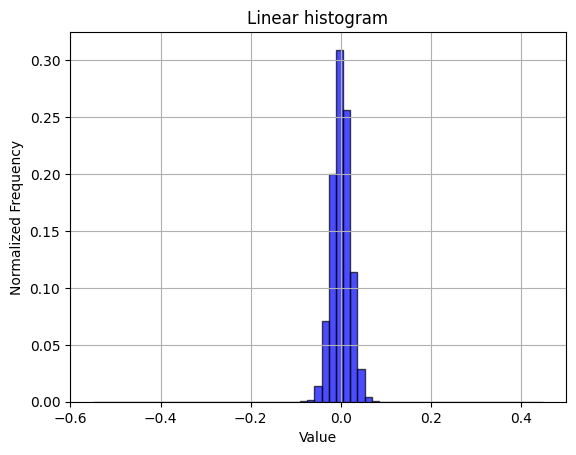

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 2.21784725e-08 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 8.87138899e-08
 4.43569449e-08 8.87138899e-08 8.87138899e-08 4.43569449e-08
 6.65354174e-08 1.55249307e-07 1.33070835e-07 2.43963197e-07
 3.32677087e-07 4.43569449e-07 9.09317371e-07 3.50419865e-06
 1.74766363e-05 9.10869865e-05 4.26713810e-04 1.64781615e-03
 5.33667276e-03 1.46381245e-02 3.40794630e-02 6.56727636e-02
 1.07199403e-01 1.46057728e-01 1.66925896e-01 1.58983852e-01
 1.27479575e-01 8.61000460e-02 4.84045605e-02 2.32991285e-02
 9.32161198e-03 3.14803456e-03 8.87382862e-04 2.18790631e-04
 4.48226929e-05 8.80485357e-06 1.81863474e-06 5.10104867e-07
 3.54855560e-07 3.54855560e-07 1.99606252e-07 1.55249307e-07
 1.55249307e-07 1.77427780e-07 6.65354174e-08 4.43569449e-08
 4.43569449e-08 4.43569449e-08 2.21784725e-08 0.00000000e+00
 2.21784725e-08 2.21784725e-08 2.21784725e-08 0.00000000e+00
 0

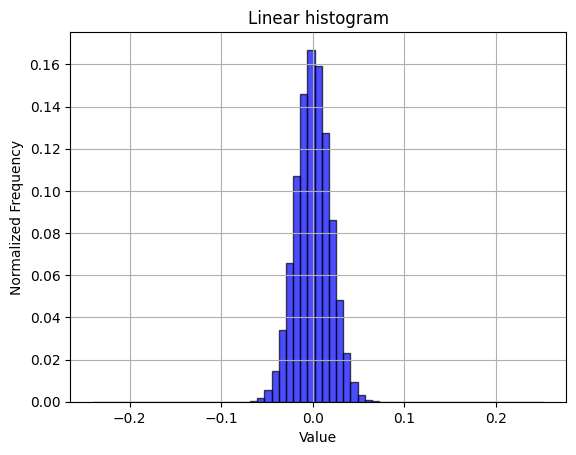

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 4.43569449e-08 0.00000000e+00
 0.00000000e+00 4.43569449e-08 2.21784725e-08 4.43569449e-08
 1.77427780e-07 1.99606252e-07 2.88320142e-07 2.79448753e-06
 1.95924626e-04 7.72285461e-03 9.41648261e-02 3.49344875e-01
 3.95823745e-01 1.37463703e-01 1.47980757e-02 4.75351201e-04
 5.96600910e-06 4.65747922e-07 2.21784725e-07 1.99606252e-07
 2.21784725e-08 2.21784725e-08 2.21784725e-08 0.00000000e+00
 2

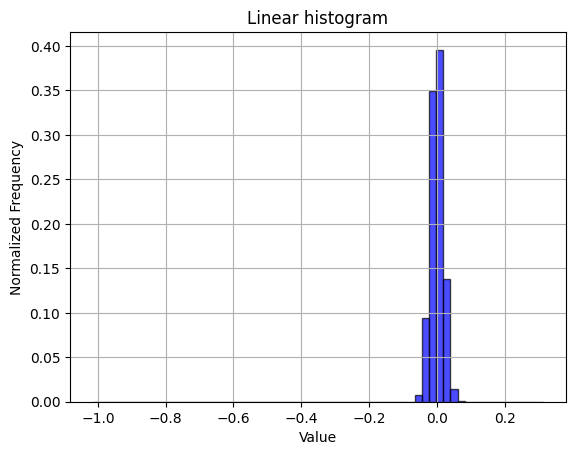

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

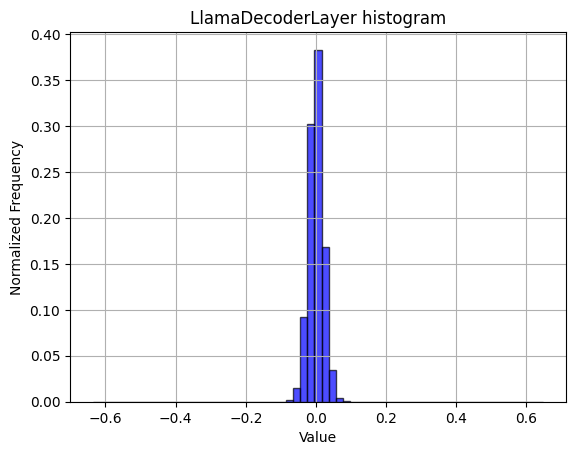

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 0.00000000e+00 1.19209290e-07 1.19209290e-07
 5.96046448e-08 2.38418579e-07 2.38418579e-07 1.19209290e-07
 1.19209290e-07 5.96046448e-07 5.36441803e-07 9.53674316e-07
 1.25169754e-06 1.43051147e-06 2.08616257e-06 3.45706940e-06
 5.90085983e-06 1.25169754e-05 6.42538071e-05 1.10441446e-03
 1.37800574e-02 1.02293789e-01 3.82577956e-01 3.82768571e-01
 1.02447152e-01 1.37456059e-02 1.09630823e-03 6.58631325e-05
 9.89437103e-06 4.64916229e-06 3.63588333e-06 2.56299973e-06
 1.60932541e-06 1.37090683e-06 2.98023224e-07 2.98023224e-07
 2.98023224e-07 4.76837158e-07 2.38418579e-07 1.19209290e-07
 1.78813934e-07 0.00000000e+00 0.00000000e+00 1.19209290e-07
 0.00000000e+00 5.96046448e-08 1.19209290e-07 0.00000000e+00
 5.

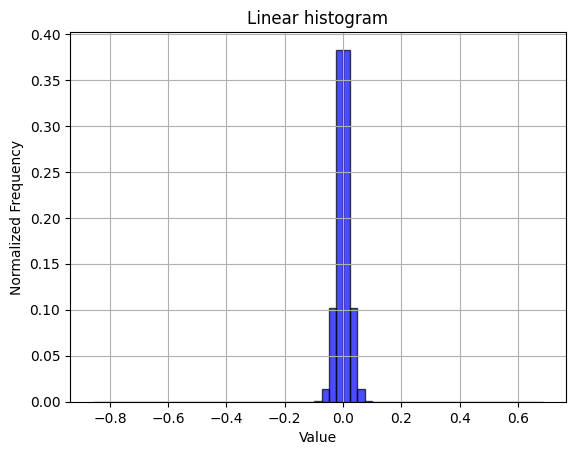

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 1.19209290e-07 5.96046448e-08
 1.19209290e-07 1.19209290e-07 1.19209290e-07 2.98023224e-07
 2.98023224e-07 3.57627869e-07 5.96046448e-07 1.07288361e-06
 1.25169754e-06 1.01327896e-06 2.08616257e-06 2.74181366e-06
 4.29153442e-06 5.00679016e-06 6.07967377e-06 1.19805336e-05
 1.93715096e-05 6.02602959e-05 1.79409981e-04 6.48438931e-04
 2.16585398e-03 6.20025396e-03 1.64601207e-02 3.84061337e-02
 7.95426965e-02 1.45826399e-01 2.17521489e-01 2.14332700e-01
 1.40459836e-01 7.74158239e-02 3.65023017e-02 1.55975223e-02
 5.82969189e-03 1.90532207e-03 6.02900982e-04 1.76727772e-04
 5.08427620e-05 2.13980675e-05 1.05500221e-05 7.33137131e-06
 5.30481339e-06 3.93390656e-06 2.74181366e-06 2.02655792e-06
 1.49011612e-06 1.25169754e-06 5.96046448e-07 4.76837158e-07
 4.76837158e-07 1.19209290e-07 1.19209290e-07 1.19209290e-07
 5.96046448e-08 1.19209290e-07 0.00000000e+00 5.96046448e-08
 0.

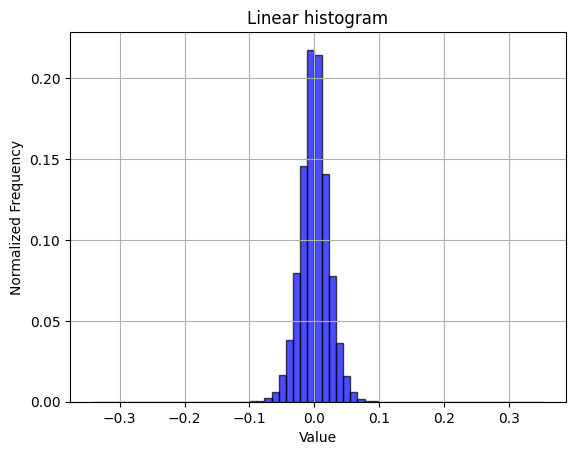

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.78813934e-07 2.38418579e-07 6.55651093e-07
 1.60932541e-06 2.86102295e-06 9.71555710e-06 2.96235085e-05
 7.06911087e-05 1.63078308e-04 3.99529934e-04 9.30547714e-04
 2.05945969e-03 4.55242395e-03 8.75514746e-03 1.69996619e-02
 2.86263824e-02 4.51096296e-02 6.73649907e-02 8.97207856e-02
 1.09863818e-01 1.22410655e-01 1.22800350e-01 1.10413969e-01
 9.15934443e-02 6.69909716e-02 4.69111800e-02 2.92722583e-02
 1.74602866e-02 9.01389122e-03 4.55164909e-03 2.26235390e-03
 9.52482224e-04 4.12166119e-04 1.79827213e-04 6.55651093e-05
 3.02791595e-05 1.10864639e-05 3.75509262e-06 1.54972076e-06
 6.55651093e-07 2.98023224e-07 1.19209290e-07 5.96046448e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

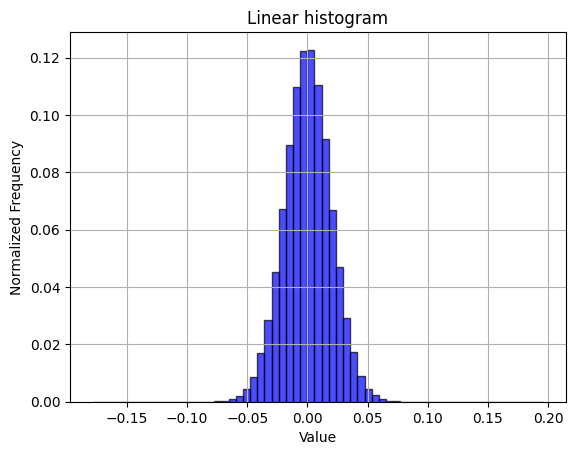

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 1.19209290e-07 3.57627869e-07 2.38418579e-07
 4.76837158e-07 6.55651093e-07 4.76837158e-07 8.94069672e-07
 5.96046448e-07 4.76837158e-07 5.96046448e-07 4.76837158e-07
 2.38418579e-07 3.57627869e-07 1.78813934e-07 4.17232513e-07
 5.36441803e-07 1.54972076e-06 2.38418579e-06 1.31726265e-05
 1.07347965e-04 1.43510103e-03 1.93690062e-02 1.39758527e-01
 3.78560662e-01 3.43063056e-01 1.04012609e-01 1.26964450e-02
 8.80062580e-04 7.25388527e-05 8.34465027e-06 2.08616257e-06
 1.31130219e-06 7.74860382e-07 2.98023224e-07 3.57627869e-07
 3.57627869e-07 1.19209290e-07 4.17232513e-07 4.76837158e-07
 5.36441803e-07 6.55651093e-07 1.37090683e-06 9.53674316e-07
 6.55651093e-07 5.36441803e-07 3.57627869e-07 2.38418579e-07
 2.38418579e-07 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.

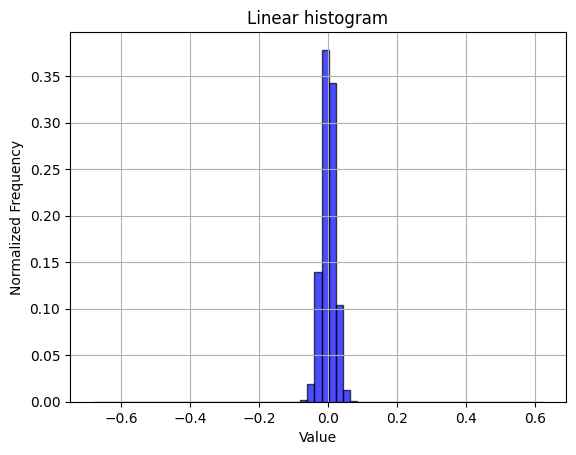

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.98023224e-08
 0.00000000e+00 0.00000000e+00 1.49011612e-08 1.49011612e-08
 1.49011612e-08 1.49011612e-08 2.98023224e-08 7.45058060e-08
 1.19209290e-07 1.93715096e-07 2.38418579e-07 1.93715096e-07
 2.53319740e-07 3.42726707e-07 3.27825546e-07 4.91738319e-07
 4.76837158e-07 7.15255737e-07 1.22189522e-06 2.01165676e-06
 4.17232513e-06 8.12113285e-06 4.35709953e-05 7.05063343e-04
 1.02960169e-02 9.81142521e-02 3.90765980e-01 3.90795812e-01
 9.82045084e-02 1.02932453e-02 7.00727105e-04 4.30643559e-05
 7.77840614e-06 3.9

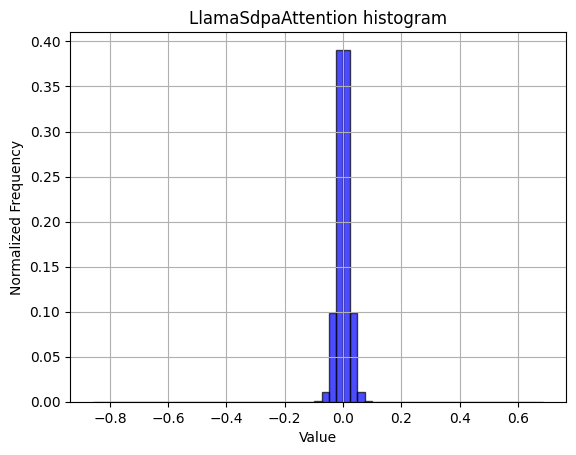

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 0.00000000e+00 4.43569449e-08
 4.43569449e-08 4.43569449e-08 4.43569449e-08 1.55249307e-07
 8.87138899e-08 1.10892362e-07 1.99606252e-07 6.20997229e-07
 1.41942224e-06 3.61509101e-06 1.03129897e-05 2.95639038e-05
 9.64319983e-05 3.45718029e-04 1.43450360e-03 5.72302175e-03
 2.09344376e-02 6.01664033e-02 1.28234531e-01 1.98779749e-01
 2.24503783e-01 1.82921676e-01 1.08586533e-01 4.71664029e-02
 1.56448719e-02 4.11956255e-03 9.57755155e-04 2.39327896e-04
 6.72007716e-05 2.13356905e-05 6.40957855e-06 2.26220419e-06
 8.20603482e-07 3.54855560e-07 1.99606252e-07 8.87138899e-08
 1.33070835e-07 4.43569449e-08 4.43569449e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 2.21784725e-08 2.21784725e-08
 0

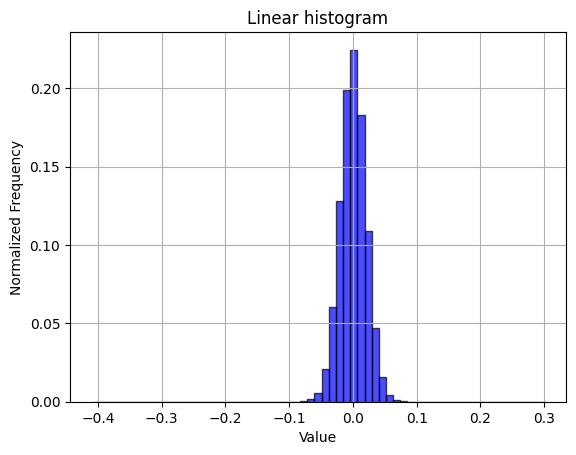

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.43569449e-08 6.65354174e-08
 4.43569449e-08 4.43569449e-08 1.10892362e-07 4.43569449e-08
 1.33070835e-07 3.54855560e-07 6.87532647e-07 2.12913336e-06
 1.57688939e-05 1.29899313e-04 8.31559647e-04 4.19142080e-03
 1.53842305e-02 4.41812693e-02 9.76488202e-02 1.62717531e-01
 2.06888620e-01 1.97438972e-01 1.43834048e-01 7.96235107e-02
 3.31873561e-02 1.06704623e-02 2.68031276e-03 4.88791355e-04
 7.07493272e-05 1.00024911e-05 1.57467155e-06 4.65747922e-07
 2.88320142e-07 1.99606252e-07 2.21784725e-08 1.33070835e-07
 4.43569449e-08 4.43569449e-08 4.43569449e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 4.43569449e-08 0.00000000e+00
 0

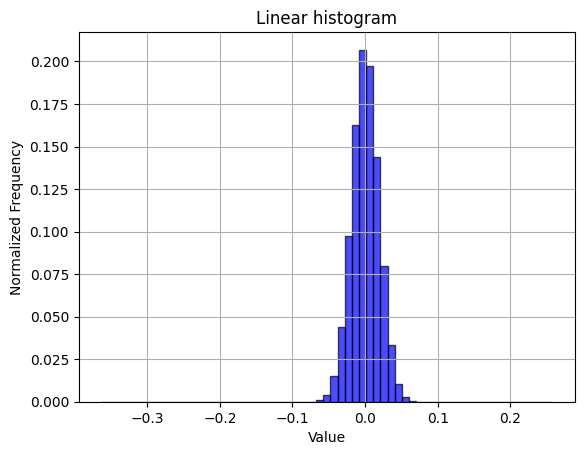

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 0.00000000e+00 2.21784725e-08 2.21784725e-08
 2.21784725e-08 8.87138899e-08 1.33070835e-07 1.10892362e-07
 2.43963197e-07 3.54855560e-07 7.98425009e-07 3.50419865e-06
 7.63604807e-05 1.43984861e-03 1.45927474e-02 7.85676380e-02
 2.18915252e-01 3.22828670e-01 2.44742637e-01 9.59992520e-02
 2.04421420e-02 2.24869750e-03 1.34046688e-04 5.10104867e-06
 1.08674515e-06 3.10498615e-07 2.43963197e-07 1.77427780e-07
 1.33070835e-07 2.21784725e-08 4.43569449e-08 4.43569449e-08
 4.43569449e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0

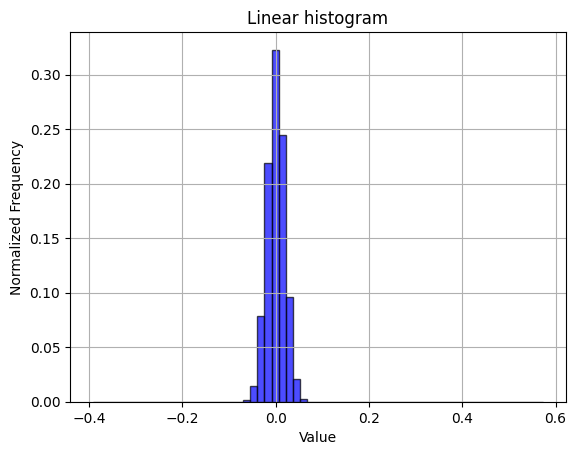

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

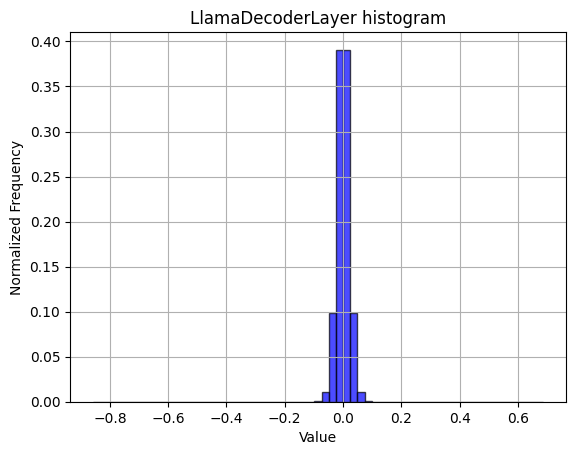

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 5.96046448e-08 5.96046448e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.96046448e-08 1.19209290e-07
 0.00000000e+00 2.38418579e-07 2.38418579e-07 5.96046448e-08
 2.98023224e-07 1.78813934e-07 4.17232513e-07 7.15255737e-07
 6.55651093e-07 7.74860382e-07 1.19209290e-06 1.43051147e-06
 1.49011612e-06 3.51667404e-06 6.55651093e-06 1.23977661e-05
 4.71472740e-05 7.39276409e-04 1.05153918e-02 8.03278089e-02
 3.03311288e-01 4.05349433e-01 1.66689932e-01 2.99821496e-02
 2.81071663e-03 1.57892704e-04 1.64508820e-05 7.68899918e-06
 5.12599945e-06 2.44379044e-06 1.54972076e-06 1.13248825e-06
 7.74860382e-07 4.76837158e-07 4.17232513e-07 3.57627869e-07
 4.76837158e-07 3.57627869e-07 1.19209290e-07 1.19209290e-07
 4.76837158e-07 0.00000000e+00 0.00000000e+00 2.38418579e-07
 0.00000000e+00 1.19209290e-07 0.00000000e+00 0.00000000e+00
 0.

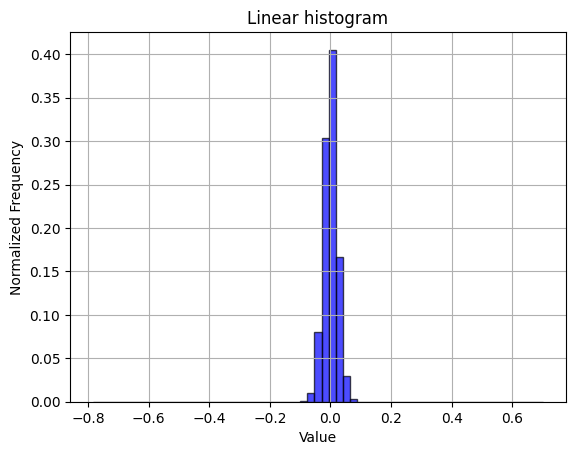

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 1.19209290e-07 5.96046448e-08 1.19209290e-07
 5.96046448e-08 5.96046448e-08 4.76837158e-07 4.17232513e-07
 5.96046448e-08 5.96046448e-07 1.43051147e-06 1.60932541e-06
 2.08616257e-06 1.54972076e-06 3.45706940e-06 3.93390656e-06
 5.36441803e-06 9.47713852e-06 1.81794167e-05 4.55379486e-05
 1.31428242e-04 3.78489494e-04 1.13368034e-03 2.79885530e-03
 7.04383850e-03 1.56039000e-02 3.04407477e-02 5.72511554e-02
 9.24949646e-02 1.34553432e-01 1.65711641e-01 1.63693190e-01
 1.31816149e-01 8.87273550e-02 5.37825227e-02 2.94116139e-02
 1.42007470e-02 6.61092997e-03 2.57498026e-03 9.80675220e-04
 3.66330147e-04 1.15573406e-04 3.98159027e-05 1.44243240e-05
 7.09295273e-06 4.47034836e-06 4.76837158e-06 2.68220901e-06
 2.20537186e-06 1.66893005e-06 1.43051147e-06 1.07288361e-06
 7.74860382e-07 8.34465027e-07 6.55651093e-07 2.38418579e-07
 1.78813934e-07 1.78813934e-07 1.19209290e-07 3.57627869e-07
 5.

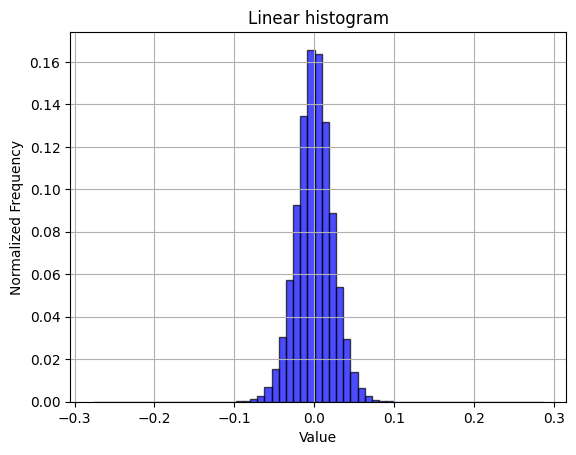

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.19209290e-07 0.00000000e+00 1.19209290e-07 2.38418579e-07
 2.38418579e-07 9.53674316e-07 2.32458115e-06 4.82797623e-06
 1.25169754e-05 2.50339508e-05 5.03659248e-05 9.74535942e-05
 1.93238258e-04 3.63945961e-04 6.20424747e-04 1.10530853e-03
 1.87748671e-03 3.09258699e-03 4.99039888e-03 7.68709183e-03
 1.14238262e-02 1.64715648e-02 2.33842731e-02 3.08618546e-02
 3.98572087e-02 4.94407415e-02 5.96605539e-02 6.80231452e-02
 7.51991272e-02 7.97296762e-02 8.10955167e-02 7.87461996e-02
 7.29042888e-02 6.48744702e-02 5.61282039e-02 4.59330678e-02
 3.64625454e-02 2.78240442e-02 2.06949115e-02 1.44439936e-02
 9.88548994e-03 6.55883551e-03 4.17494774e-03 2.57933140e-03
 1.54405832e-03 8.99314880e-04 4.89950180e-04 2.82227993e-04
 1.49011612e-04 7.67707825e-05 3.76105309e-05 2.00867653e-05
 9.17911530e-06 5.24520874e-06 1.90734863e-06 8.34465027e-07
 7.74860382e-07 2.38418579e-07 1.78813934e-07 0.00000000e+00
 5.

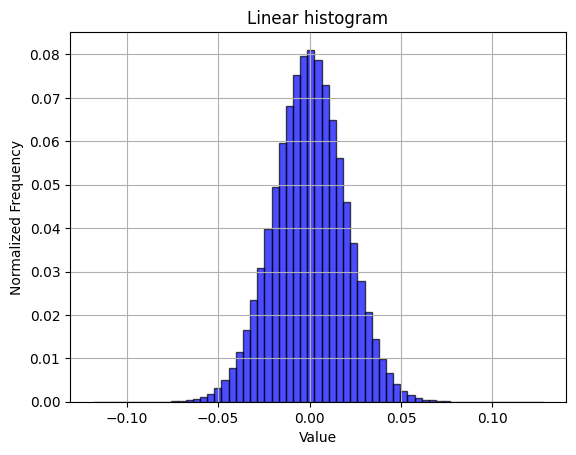

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.19209290e-07 2.98023224e-07 4.76837158e-07
 8.34465027e-07 7.15255737e-07 9.53674316e-07 4.76837158e-07
 4.17232513e-07 2.38418579e-07 2.98023224e-07 3.57627869e-07
 1.19209290e-06 1.13248825e-06 1.60932541e-06 2.92062759e-06
 1.37090683e-05 2.72333622e-04 4.75507975e-03 4.47980762e-02
 1.93272352e-01 3.63445103e-01 2.84106135e-01 9.42388177e-02
 1.39747858e-02 1.04528666e-03 5.15580177e-05 4.64916229e-06
 1.96695328e-06 1.54972076e-06 7.15255737e-07 7.15255737e-07
 6.55651093e-07 2.38418579e-07 6.55651093e-07 4.17232513e-07
 4.76837158e-07 5.96046448e-07 6.55651093e-07 4.76837158e-07
 2.98023224e-07 1.19209290e-07 1.19209290e-07 0.00000000e+00
 5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 5.96046448e-08 0.00000000e+00 0.00000000e+00
 5.

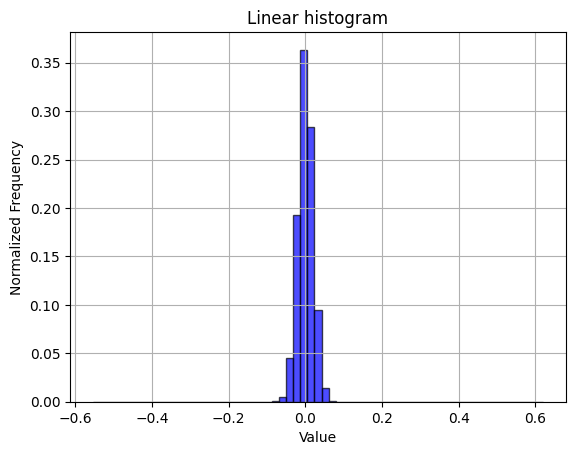

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 0.00000000e+00 0.00000000e+00 1.49011612e-08
 0.00000000e+00 1.49011612e-08 1.49011612e-08 0.00000000e+00
 0.00000000e+00 1.49011612e-08 1.49011612e-08 2.98023224e-08
 1.49011612e-08 5.96046448e-08 5.96046448e-08 1.49011612e-08
 7.45058060e-08 1.04308128e-07 2.23517418e-07 4.02331352e-07
 4.02331352e-07 4.47034836e-07 5.36441803e-07 5.66244125e-07
 6.25848770e-07 1.95205212e-06 3.44216824e-06 6.70552254e-06
 2.82377005e-05 4.43488359e-04 7.32518733e-03 7.19960928e-02
 3.10887873e-01 4.20813203e-01 1.63027212e-01 2.35851407e-02
 1.76584721e-03 9.10162926e-05 9.26852226e-06 4.48524952e-06
 2.62260437e-06 1.3

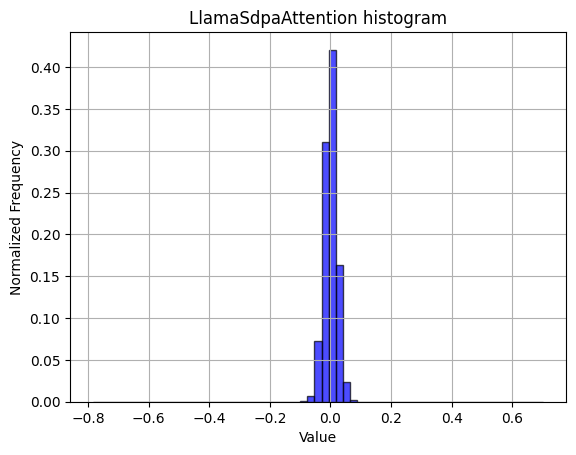

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 2.21784725e-08
 2.21784725e-08 0.00000000e+00 6.65354174e-08 4.43569449e-08
 2.21784725e-08 1.33070835e-07 1.10892362e-07 2.88320142e-07
 5.76640284e-07 1.50813613e-06 5.61115354e-06 2.56161357e-05
 1.03529110e-04 4.78167867e-04 2.84376810e-03 1.61201566e-02
 6.96832302e-02 1.85347113e-01 2.88197628e-01 2.56137072e-01
 1.30918214e-01 4.05265231e-02 7.93669945e-03 1.34421504e-03
 2.51459521e-04 5.93274139e-05 1.33292620e-05 3.63726949e-06
 8.87138899e-07 4.87926394e-07 1.77427780e-07 6.65354174e-08
 6.65354174e-08 4.43569449e-08 4.43569449e-08 2.21784725e-08
 0

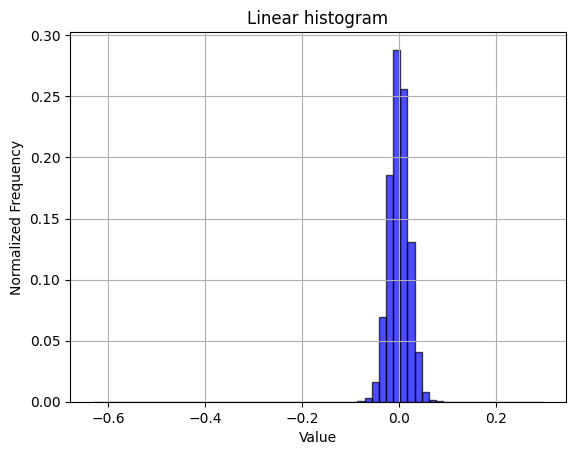

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 2.21784725e-08 6.65354174e-08
 4.43569449e-08 1.33070835e-07 8.87138899e-08 1.99606252e-07
 2.88320142e-07 3.99212505e-07 5.54461812e-07 2.15131183e-06
 1.03573466e-05 6.29646834e-05 3.40883122e-04 1.69082021e-03
 6.21201271e-03 1.86061194e-02 4.48011798e-02 9.01977628e-02
 1.40822144e-01 1.80684445e-01 1.83648154e-01 1.51053406e-01
 9.78491584e-02 5.18727635e-02 2.19185851e-02 7.52668603e-03
 2.10646696e-03 4.79831252e-04 9.28390858e-05 1.52366106e-05
 1.95170558e-06 7.31889592e-07 5.76640284e-07 2.21784725e-07
 1.33070835e-07 1.33070835e-07 1.10892362e-07 4.43569449e-08
 1.33070835e-07 2.21784725e-08 4.43569449e-08 0.00000000e+00
 2

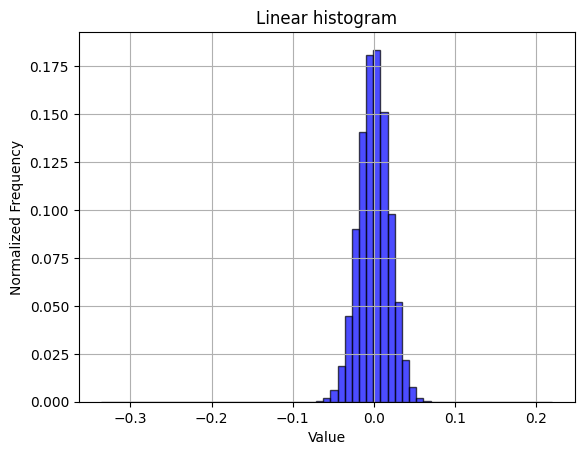

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.65354174e-08 8.87138899e-08
 2.21784725e-08 1.55249307e-07 2.88320142e-07 5.98818757e-07
 1.33070835e-06 1.35510467e-05 6.37653262e-04 1.48783174e-02
 1.22266792e-01 3.55382476e-01 3.61579962e-01 1.28659226e-01
 1.58252272e-02 7.35682110e-04 1.58576078e-05 1.35288682e-06
 4.43569449e-07 2.88320142e-07 2.21784725e-07 6.65354174e-08
 4.43569449e-08 0.00000000e+00 6.65354174e-08 0.00000000e+00
 4.43569449e-08 0.00000000e+00 6.65354174e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

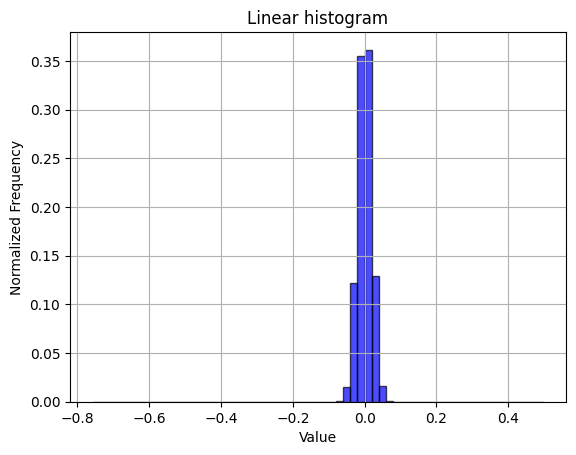

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

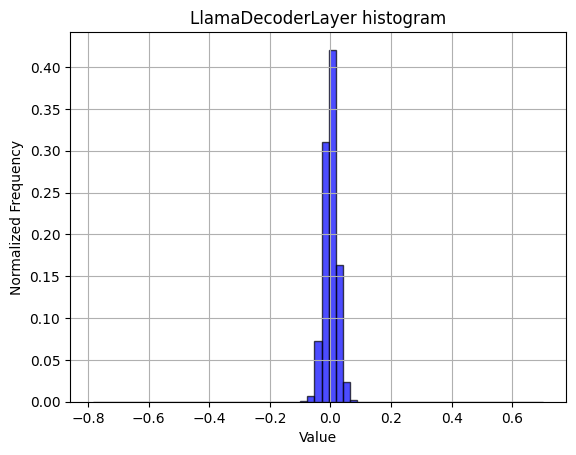

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 0.00000000e+00 5.96046448e-08 0.00000000e+00
 5.96046448e-08 5.96046448e-08 0.00000000e+00 1.78813934e-07
 0.00000000e+00 1.78813934e-07 2.38418579e-07 3.57627869e-07
 5.36441803e-07 4.76837158e-07 3.57627869e-07 9.53674316e-07
 5.36441803e-07 7.15255737e-07 1.54972076e-06 1.13248825e-06
 1.54972076e-06 1.90734863e-06 3.51667404e-06 4.70876694e-06
 9.23871994e-06 2.41398811e-05 2.17854977e-04 3.06349993e-03
 2.81184912e-02 1.47136748e-01 3.82457078e-01 3.22358549e-01
 9.88717675e-02 1.60081983e-02 1.56426430e-03 1.08420849e-04
 1.71065331e-05 8.10623169e-06 4.82797623e-06 2.68220901e-06
 1.78813934e-06 1.43051147e-06 1.19209290e-06 1.01327896e-06
 1.13248825e-06 8.34465027e-07 4.76837158e-07 2.98023224e-07
 2.38418579e-07 2.38418579e-07 2.98023224e-07 2.38418579e-07
 2.38418579e-07 0.00000000e+00 1.19209290e-07 1.78813934e-07
 0.

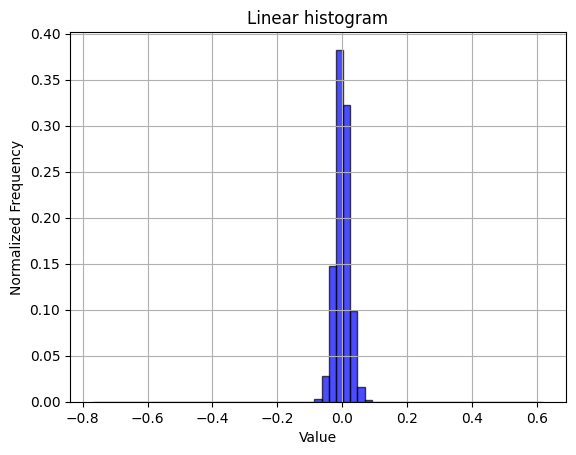

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 5.96046448e-08 5.96046448e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.96046448e-08 1.78813934e-07
 1.19209290e-07 2.38418579e-07 1.78813934e-07 2.98023224e-07
 4.76837158e-07 6.55651093e-07 4.17232513e-07 1.13248825e-06
 7.15255737e-07 2.44379044e-06 2.32458115e-06 3.39746475e-06
 3.99351120e-06 5.96046448e-06 1.43647194e-05 2.91466713e-05
 9.08970833e-05 3.47435474e-04 1.19215250e-03 3.82864475e-03
 1.11064911e-02 2.70234346e-02 6.07190132e-02 1.13519251e-01
 1.81220829e-01 2.14877069e-01 1.76456034e-01 1.10775292e-01
 5.69668412e-02 2.63770223e-02 1.03463531e-02 3.49205732e-03
 1.14083290e-03 3.11970711e-04 8.34465027e-05 2.48551369e-05
 1.12652779e-05 7.03334808e-06 4.88758087e-06 2.98023224e-06
 1.96695328e-06 1.19209290e-06 1.25169754e-06 6.55651093e-07
 5.36441803e-07 4.76837158e-07 2.38418579e-07 4.17232513e-07
 4.17232513e-07 1.19209290e-07 5.96046448e-08 1.19209290e-07
 1.

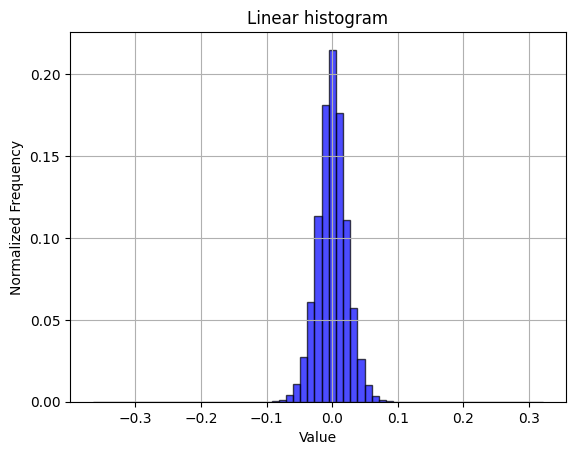

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 5.96046448e-08 0.00000000e+00
 0.00000000e+00 5.96046448e-08 0.00000000e+00 5.96046448e-08
 1.19209290e-07 2.98023224e-07 8.34465027e-07 2.20537186e-06
 4.29153442e-06 1.11460686e-05 2.77757645e-05 6.69360161e-05
 1.34944916e-04 3.22937965e-04 6.69956207e-04 1.36840343e-03
 2.74300575e-03 4.87130880e-03 9.14108753e-03 1.45975351e-02
 2.43660212e-02 3.54025364e-02 5.06338477e-02 6.70304298e-02
 8.27948451e-02 9.70197320e-02 1.05176985e-01 1.05453014e-01
 9.76474285e-02 8.42743516e-02 6.77641034e-02 5.17176390e-02
 3.70068550e-02 2.39301920e-02 1.58572793e-02 9.04488564e-03
 5.35261631e-03 2.85255909e-03 1.37418509e-03 7.29858875e-04
 3.42071056e-04 1.52707100e-04 5.93662262e-05 3.30805779e-05
 1.21593475e-05 4.64916229e-06 1.66893005e-06 1.07288361e-06
 3.57627869e-07 1.19209290e-07 1.19209290e-07 5.96046448e-08
 0.00000000e+00 5.96046448e-08 0.00000000e+00 0.00000000e+00
 5.

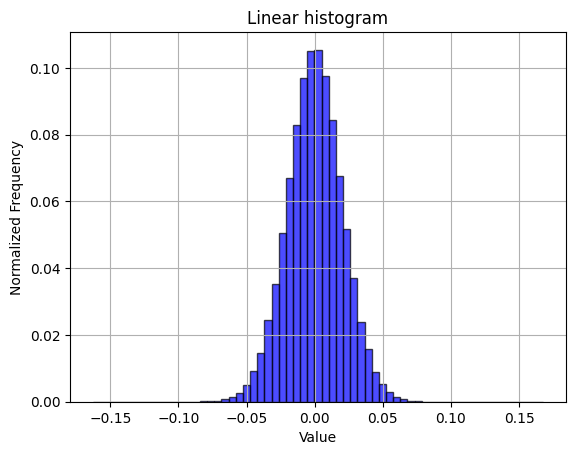

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 0.00000000e+00 1.78813934e-07 5.96046448e-08
 1.19209290e-07 0.00000000e+00 1.19209290e-07 0.00000000e+00
 2.38418579e-07 5.96046448e-08 0.00000000e+00 2.98023224e-07
 1.78813934e-07 4.76837158e-07 4.76837158e-07 5.36441803e-07
 8.94069672e-07 8.34465027e-07 8.94069672e-07 1.01327896e-06
 1.31130219e-06 2.14576721e-06 2.74181366e-06 5.66244125e-06
 1.65104866e-05 2.12967396e-04 3.18115950e-03 2.96195149e-02
 1.42574191e-01 3.24318111e-01 3.24310660e-01 1.42752707e-01
 2.95872688e-02 3.16315889e-03 2.11656094e-04 1.56164169e-05
 5.54323196e-06 3.63588333e-06 2.08616257e-06 1.96695328e-06
 1.13248825e-06 8.94069672e-07 8.34465027e-07 8.34465027e-07
 5.96046448e-07 1.78813934e-07 2.38418579e-07 5.96046448e-08
 0.

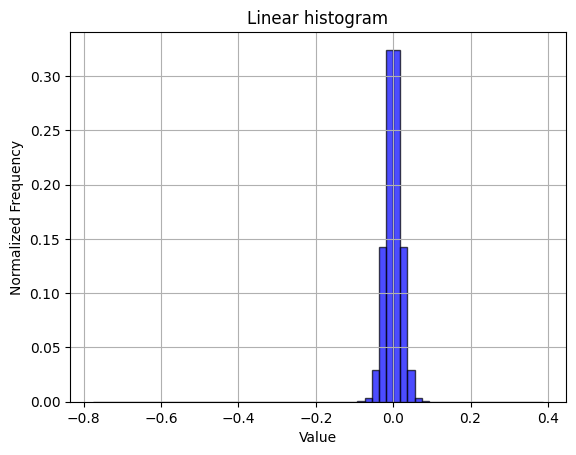

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[2.98023224e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.49011612e-08 0.00000000e+00 1.49011612e-08 0.00000000e+00
 0.00000000e+00 2.98023224e-08 1.49011612e-08 5.96046448e-08
 4.47034836e-08 4.47034836e-08 5.96046448e-08 1.19209290e-07
 1.63912773e-07 1.78813934e-07 8.94069672e-08 3.27825546e-07
 2.38418579e-07 3.42726707e-07 5.21540642e-07 7.00354576e-07
 8.19563866e-07 9.68575478e-07 1.60932541e-06 2.96533108e-06
 4.88758087e-06 1.17421150e-05 9.04649496e-05 1.38160586e-03
 1.70275569e-02 1.15627959e-01 3.57107535e-01 3.65840912e-01
 1.22961923e-01 1.82583034e-02 1.54808164e-03 1.02564692e-04
 1.26957893e-05 5.7

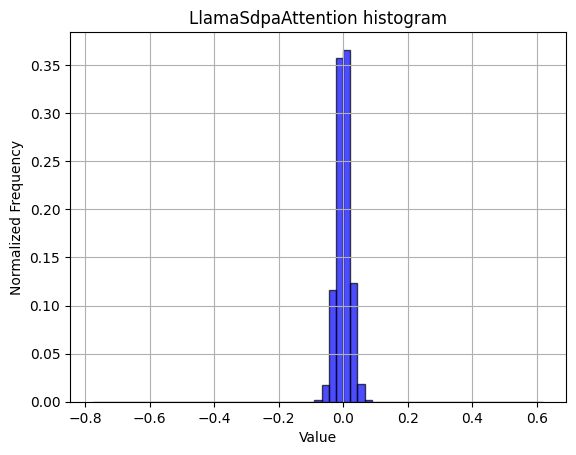

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.43569449e-08 4.43569449e-08 2.21784725e-08
 8.87138899e-08 2.21784725e-08 4.43569449e-08 1.33070835e-07
 3.32677087e-07 3.77034032e-07 5.98818757e-07 1.70774238e-06
 3.79251879e-06 1.01799189e-05 2.71686288e-05 7.16142876e-05
 1.95214915e-04 5.79146452e-04 1.91657488e-03 6.69922940e-03
 2.24347225e-02 5.97455668e-02 1.22597317e-01 1.89220562e-01
 2.16683765e-01 1.81926949e-01 1.15748516e-01 5.40897680e-02
 1.95436921e-02 6.04556328e-03 1.69082021e-03 4.96154608e-04
 1.66427257e-04 6.52047091e-05 2.36422517e-05 9.27060149e-06
 3.12716462e-06 1.33070835e-06 4.21390977e-07 2.66141670e-07
 3.10498615e-07 4.43569449e-08 4.43569449e-08 2.21784725e-08
 0.00000000e+00 4.43569449e-08 2.21784725e-08 0.00000000e+00
 0

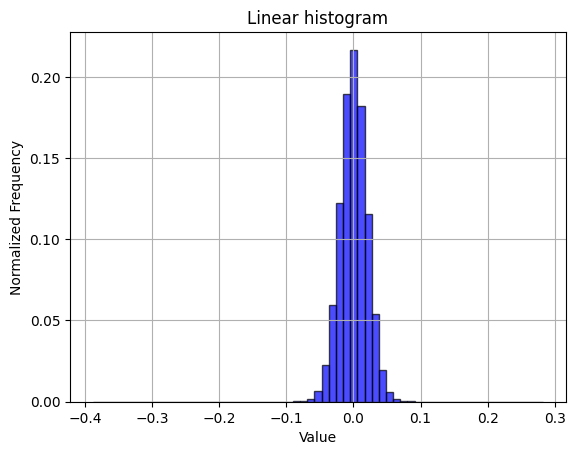

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.65354174e-08
 2.21784725e-08 0.00000000e+00 6.65354174e-08 6.65354174e-08
 1.10892362e-07 6.65354174e-08 1.55249307e-07 3.32677087e-07
 3.77034032e-07 8.20603482e-07 1.86299169e-06 9.18188760e-06
 6.35856806e-05 4.67433486e-04 2.52927736e-03 1.02589408e-02
 3.33121765e-02 8.06064384e-02 1.47048972e-01 2.01966086e-01
 2.09286246e-01 1.61373471e-01 9.35970573e-02 4.17006515e-02
 1.34542376e-02 3.51739484e-03 6.82121099e-04 1.04859818e-04
 1.30852988e-05 1.88517016e-06 1.30852988e-06 4.87926394e-07
 3.77034032e-07 1.99606252e-07 1.99606252e-07 1.10892362e-07
 1.33070835e-07 6.65354174e-08 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

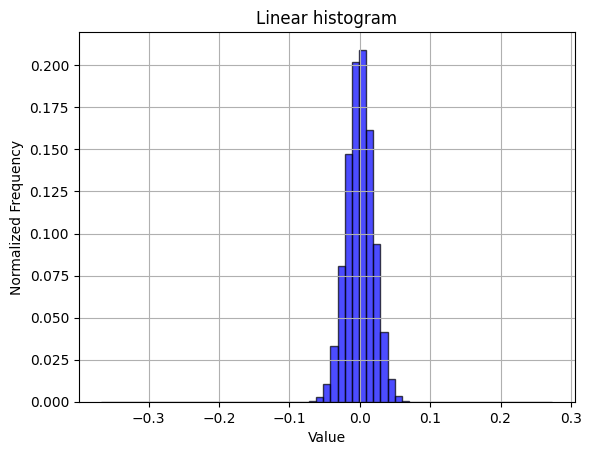

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 0.00000000e+00 2.21784725e-08
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 1.10892362e-07 2.21784725e-08 4.43569449e-08 0.00000000e+00
 3.10498615e-07 2.43963197e-07 7.76246537e-07 2.19566877e-06
 2.00715176e-05 1.95749416e-03 5.38581582e-02 3.36266473e-01
 4.61569564e-01 1.37173919e-01 9.00503646e-03 1.39347343e-04
 3.57073407e-06 1.15328057e-06 6.20997229e-07 1.55249307e-07
 2.43963197e-07 1.55249307e-07 6.65354174e-08 6.65354174e-08
 2.21784725e-08 0.00000000e+00 0.00000000e+00 4.43569449e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

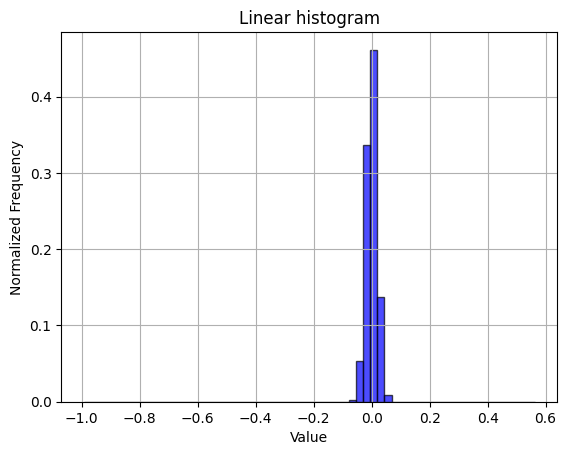

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

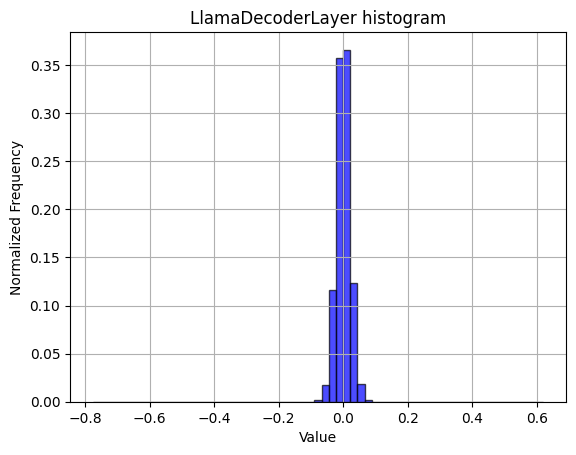

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.96046448e-08
 1.19209290e-07 3.57627869e-07 1.19209290e-07 1.19209290e-07
 5.36441803e-07 1.78813934e-07 7.74860382e-07 5.36441803e-07
 8.94069672e-07 8.94069672e-07 1.31130219e-06 1.84774399e-06
 2.38418579e-06 3.21865082e-06 5.78165054e-06 9.59634781e-06
 1.43647194e-05 7.44462013e-05 1.01590157e-03 1.30212903e-02
 1.02864444e-01 3.90822411e-01 3.81374300e-01 9.75329280e-02
 1.22538209e-02 8.89658928e-04 6.41345978e-05 1.69873238e-05
 7.80820847e-06 5.00679016e-06 3.57627869e-06 2.20537186e-06
 1.96695328e-06 1.37090683e-06 1.25169754e-06 3.57627869e-07
 5.96046448e-07 4.17232513e-07 3.57627869e-07 2.38418579e-07
 3.57627869e-07 2.38418579e-07 1.19209290e-07 1.19209290e-07
 0.00000000e+00 1.19209290e-07 5.96046448e-08 5.96046448e-08
 5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.

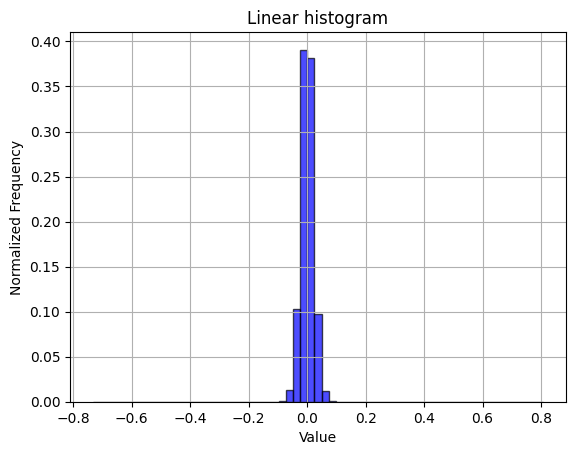

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 5.96046448e-08
 0.00000000e+00 1.19209290e-07 5.96046448e-08 0.00000000e+00
 1.78813934e-07 5.96046448e-08 2.38418579e-07 2.38418579e-07
 6.55651093e-07 8.94069672e-07 1.01327896e-06 1.01327896e-06
 1.78813934e-06 2.20537186e-06 3.33786011e-06 3.87430191e-06
 5.12599945e-06 9.35792923e-06 1.65104866e-05 4.00543213e-05
 1.19268894e-04 4.13596630e-04 1.32429600e-03 4.21094894e-03
 1.16940141e-02 2.90708542e-02 6.45691156e-02 1.23809874e-01
 2.00054944e-01 2.25662112e-01 1.67158842e-01 9.47374105e-02
 4.61095572e-02 1.97023749e-02 7.46697187e-03 2.65496969e-03
 7.76112080e-04 2.36392021e-04 7.23004341e-05 2.78949738e-05
 1.26957893e-05 8.58306885e-06 5.72204590e-06 4.70876694e-06
 2.74181366e-06 1.19209290e-06 1.72853470e-06 8.34465027e-07
 1.01327896e-06 7.15255737e-07 3.57627869e-07 2.98023224e-07
 1.19209290e-07 3.57627869e-07 0.00000000e+00 0.00000000e+00
 0.

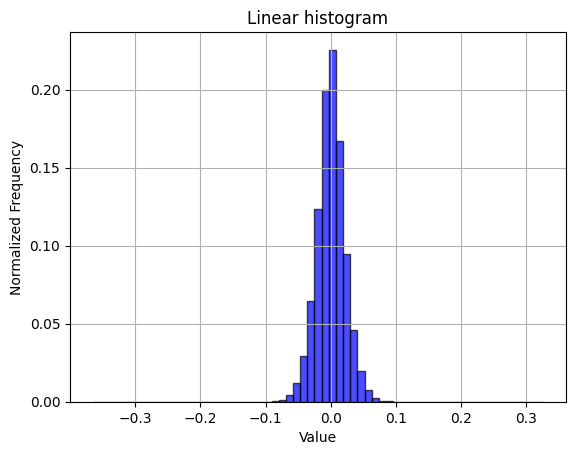

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 5.96046448e-08 1.19209290e-07
 2.38418579e-07 1.78813934e-07 6.55651093e-07 1.31130219e-06
 2.80141830e-06 6.02006912e-06 1.24573708e-05 2.47359276e-05
 5.41210175e-05 9.58442688e-05 1.82867050e-04 3.32534313e-04
 6.56366348e-04 1.02758408e-03 1.86556578e-03 2.86251307e-03
 4.50164080e-03 7.39562511e-03 1.04324222e-02 1.60173178e-02
 2.13974714e-02 2.92795300e-02 3.78730297e-02 4.74675894e-02
 5.74923754e-02 6.62416816e-02 7.33833313e-02 7.82938600e-02
 8.09393525e-02 7.88830519e-02 7.37087727e-02 6.65860176e-02
 5.82227707e-02 4.80846167e-02 3.85318995e-02 2.97697783e-02
 2.17756629e-02 1.55777931e-02 1.14464164e-02 7.24583864e-03
 4.99802828e-03 2.96014547e-03 1.91187859e-03 1.06287003e-03
 6.37233257e-04 3.44455242e-04 2.12430954e-04 9.67383385e-05
 5.20944595e-05 2.51531601e-05 1.28149986e-05 6.02006912e-06
 2.92062759e-06 1.43051147e-06 1.01327896e-06 4.17232513e-07
 1.

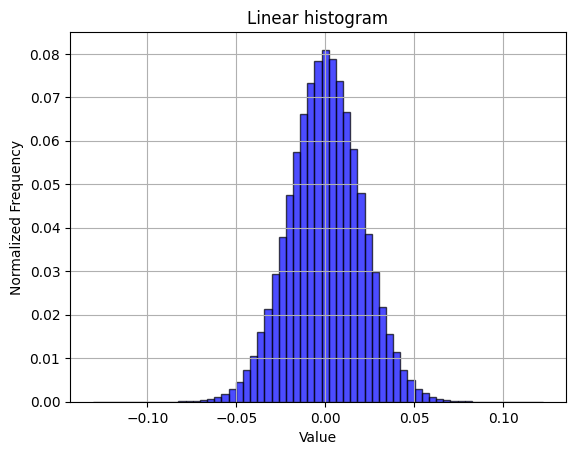

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 5.96046448e-08 1.19209290e-07 1.78813934e-07
 0.00000000e+00 0.00000000e+00 1.78813934e-07 1.19209290e-07
 2.38418579e-07 1.19209290e-07 1.78813934e-07 2.98023224e-07
 4.17232513e-07 1.19209290e-07 6.55651093e-07 3.57627869e-07
 5.36441803e-07 1.01327896e-06 1.01327896e-06 1.31130219e-06
 2.26497650e-06 2.14576721e-06 2.80141830e-06 4.29153442e-06
 7.09295273e-06 3.78489494e-05 8.15808773e-04 1.06741190e-02
 7.41946101e-02 2.45700002e-01 3.60895395e-01 2.31672585e-01
 6.61203265e-02 9.16361809e-03 6.41882420e-04 3.28421593e-05
 7.45058060e-06 4.11272049e-06 2.98023224e-06 2.08616257e-06
 2.02655792e-06 1.19209290e-06 1.07288361e-06 8.34465027e-07
 8.34465027e-07 4.17232513e-07 4.17232513e-07 1.19209290e-07
 2.38418579e-07 4.17232513e-07 2.38418579e-07 2.38418579e-07
 1.78813934e-07 1.19209290e-07 1.78813934e-07 0.00000000e+00
 5.96046448e-08 1.19209290e-07 0.00000000e+00 0.00000000e+00
 0.

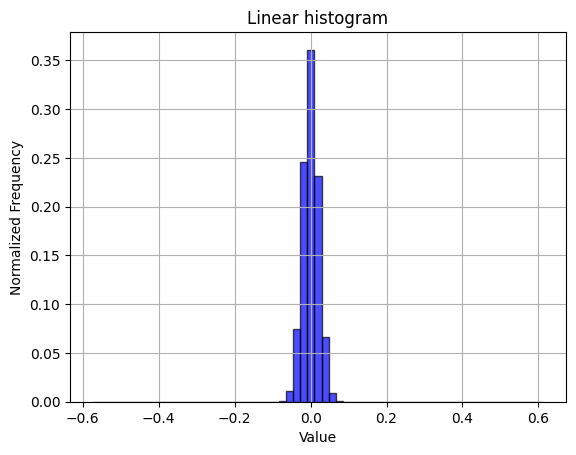

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 0.00000000e+00 0.00000000e+00 1.49011612e-08
 0.00000000e+00 0.00000000e+00 1.49011612e-08 2.98023224e-08
 7.45058060e-08 1.19209290e-07 2.98023224e-08 7.45058060e-08
 2.08616257e-07 8.94069672e-08 2.38418579e-07 2.53319740e-07
 3.27825546e-07 4.17232513e-07 4.76837158e-07 8.34465027e-07
 1.13248825e-06 1.78813934e-06 3.11434269e-06 5.15580177e-06
 9.13441181e-06 4.37647104e-05 6.67259097e-04 1.10185742e-02
 1.05123118e-01 3.90841678e-01 3.81922320e-01 9.94890481e-02
 1.02190524e-02 5.87940216e-04 3.99351120e-05 9.93907452e-06
 5.06639481e-06 2.69711018e-06 1.86264515e-06 1.04308128e-06
 8.64267349e-07 5.2

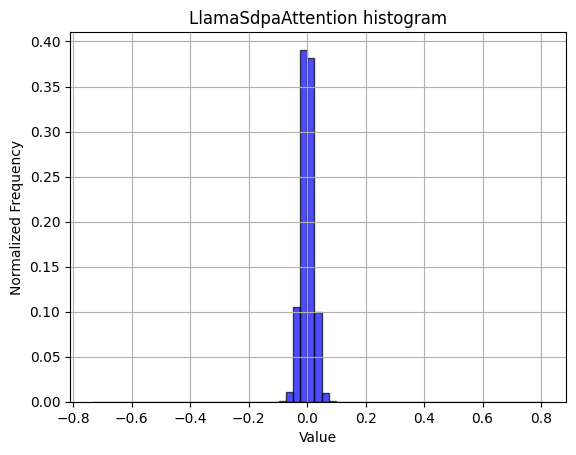

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 2.21784725e-08 8.87138899e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 6.65354174e-08 2.21784725e-08
 1.33070835e-07 6.65354174e-08 2.21784725e-07 2.43963197e-07
 3.54855560e-07 4.87926394e-07 5.32283339e-07 8.42781954e-07
 1.39724377e-06 2.55052433e-06 6.25432924e-06 1.75653502e-05
 5.79079916e-05 1.87408092e-04 6.79304433e-04 2.64877497e-03
 1.20972478e-02 4.79337337e-02 1.30227532e-01 2.35020039e-01
 2.64584763e-01 1.87302079e-01 8.54002930e-02 2.61364870e-02
 5.81200178e-03 1.34991491e-03 3.71977340e-04 1.07099844e-04
 3.31568163e-05 1.04460605e-05 3.57073407e-06 1.41942224e-06
 1.13110210e-06 7.31889592e-07 6.20997229e-07 4.21390977e-07
 1.99606252e-07 2.88320142e-07 6.65354174e-08 1.10892362e-07
 1.10892362e-07 4.43569449e-08 2.21784725e-08 6.65354174e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.43569449e-08
 0.00000000e+00 2.21784725e-08 0.00000000e+00 2.21784725e-08
 0

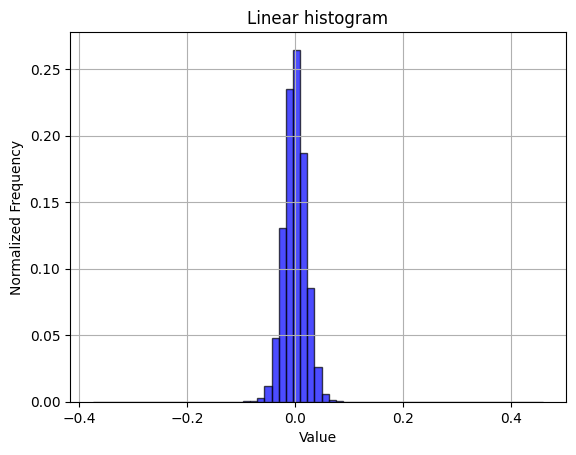

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[4.43569449e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.65354174e-08 0.00000000e+00 2.21784725e-08 2.21784725e-08
 2.21784725e-08 4.43569449e-08 6.65354174e-08 8.87138899e-08
 8.87138899e-08 1.33070835e-07 1.55249307e-07 2.88320142e-07
 4.87926394e-07 7.31889592e-07 1.02020973e-06 1.75209933e-06
 1.75209933e-06 2.68359517e-06 3.43766323e-06 4.56876533e-06
 8.67178274e-06 9.68755678e-05 1.82517739e-03 1.90374685e-02
 1.01323616e-01 2.65452008e-01 3.35629374e-01 2.05911792e-01
 6.09566888e-02 8.99989106e-03 6.84205876e-04 3.51972358e-05
 6.14343688e-06 3.88123268e-06 3.43766323e-06 2.28438266e-06
 1.95170558e-06 1.26417293e-06 8.42781954e-07 4.21390977e-07
 4.43569449e-07 2.21784725e-07 1.10892362e-07 1.99606252e-07
 2.21784725e-08 2.21784725e-08 4.43569449e-08 0.00000000e+00
 4.43569449e-08 2.21784725e-08 0.00000000e+00 2.21784725e-08
 4.43569449e-08 0.00000000e+00 4.43569449e-08 2.21784725e-08
 2

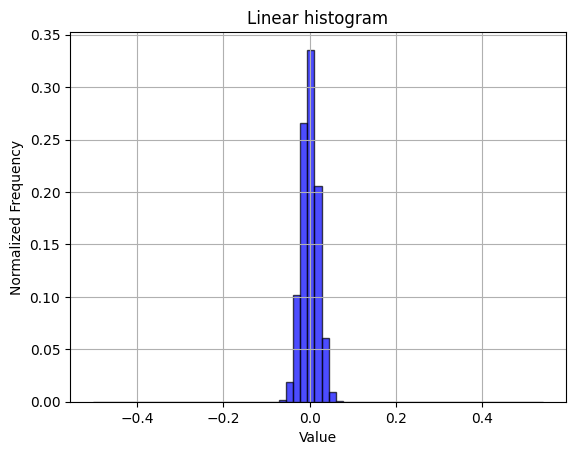

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 2.21784725e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 0.00000000e+00 0.00000000e+00
 2.21784725e-08 2.21784725e-08 2.21784725e-08 2.21784725e-08
 0.00000000e+00 8.87138899e-08 6.65354174e-08 4.43569449e-08
 1.77427780e-07 4.87926394e-07 6.65354174e-07 1.10892362e-06
 2.61705975e-06 7.67375148e-06 2.26198241e-04 9.54443909e-03
 1.23873666e-01 4.22074229e-01 3.61597460e-01 7.79838562e-02
 4.58859288e-03 8.83368559e-05 5.21194103e-06 2.21784725e-06
 1.02020973e-06 5.98818757e-07 4.65747922e-07 2.43963197e-07
 6.65354174e-08 1.10892362e-07 2.21784725e-08 2.21784725e-08
 4.43569449e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2

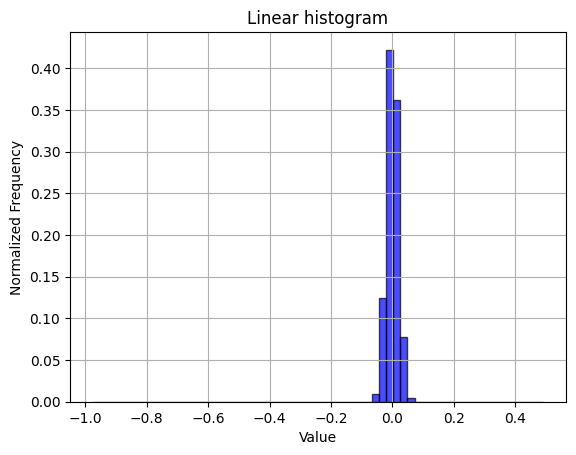

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

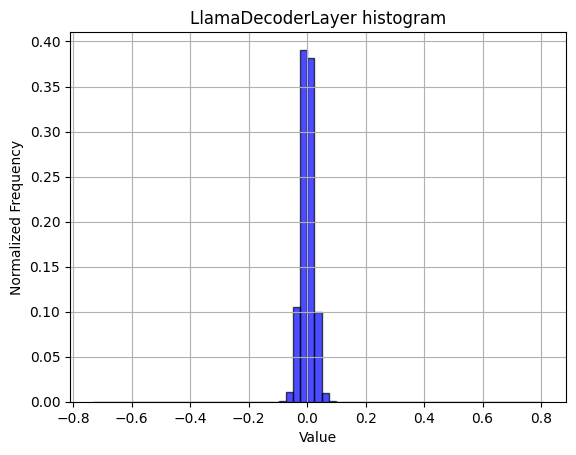

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.96046448e-08 5.96046448e-08 1.78813934e-07
 1.19209290e-07 1.78813934e-07 1.19209290e-07 5.36441803e-07
 1.78813934e-07 8.34465027e-07 5.36441803e-07 7.15255737e-07
 1.25169754e-06 1.43051147e-06 1.54972076e-06 3.21865082e-06
 3.09944153e-06 3.63588333e-06 6.02006912e-06 7.03334808e-06
 1.34706497e-05 4.31537628e-05 4.93466854e-04 8.20422173e-03
 7.78329372e-02 3.38748455e-01 4.22127187e-01 1.33875847e-01
 1.73203349e-02 1.18261576e-03 7.45654106e-05 1.97887421e-05
 8.16583633e-06 6.25848770e-06 4.11272049e-06 2.92062759e-06
 1.96695328e-06 2.68220901e-06 2.02655792e-06 1.07288361e-06
 1.01327896e-06 5.96046448e-07 6.55651093e-07 6.55651093e-07
 3.57627869e-07 1.19209290e-07 1.19209290e-07 0.00000000e+00
 5.96046448e-08 1.78813934e-07 5.96046448e-08 5.96046448e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

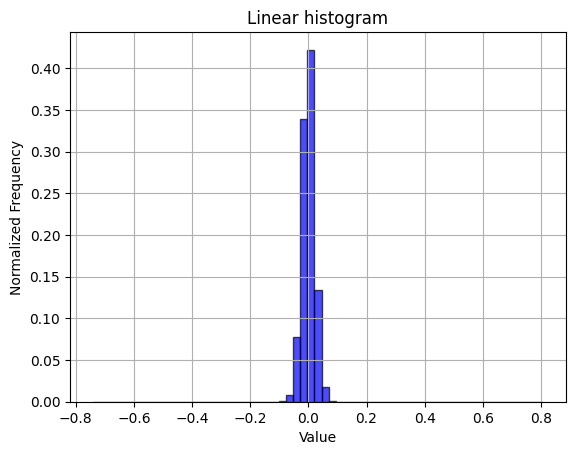

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.96046448e-08 1.19209290e-07
 1.78813934e-07 4.76837158e-07 3.57627869e-07 4.17232513e-07
 8.94069672e-07 1.37090683e-06 1.25169754e-06 2.20537186e-06
 2.44379044e-06 4.70876694e-06 4.88758087e-06 9.11951065e-06
 1.95503235e-05 5.34653664e-05 1.99615955e-04 7.38084316e-04
 2.54154205e-03 8.09276104e-03 2.25148797e-02 5.40276766e-02
 1.09636188e-01 1.81397915e-01 2.21984327e-01 1.88122690e-01
 1.15480542e-01 5.78883886e-02 2.44194269e-02 8.90737772e-03
 2.79611349e-03 8.16404819e-04 2.20477581e-04 6.30617142e-05
 2.31266022e-05 8.52346420e-06 6.91413879e-06 3.87430191e-06
 2.44379044e-06 1.43051147e-06 1.43051147e-06 1.25169754e-06
 5.36441803e-07 2.38418579e-07 4.76837158e-07 3.57627869e-07
 1.19209290e-07 5.96046448e-08 5.96046448e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

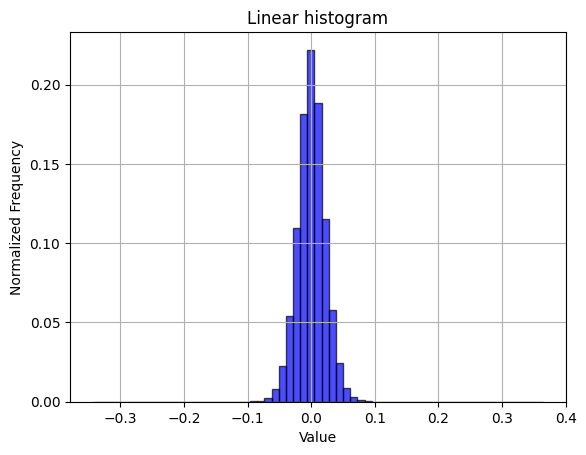

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.96046448e-08 1.19209290e-07 5.96046448e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.38418579e-07
 1.19209290e-07 1.78813934e-07 5.96046448e-07 1.78813934e-07
 4.76837158e-07 5.36441803e-07 1.00731850e-05 1.36494637e-04
 1.35177374e-03 9.46056843e-03 4.32170033e-02 1.30233765e-01
 2.43919611e-01 2.77376413e-01 1.88738286e-01 8.00054073e-02
 2.12801099e-02 3.78763676e-03 4.40716743e-04 3.53455544e-05
 2.20537186e-06 4.76837158e-07 2.38418579e-07 1.19209290e-07
 2.38418579e-07 2.98023224e-07 1.19209290e-07 5.96046448e-08
 0.00000000e+00 5.96046448e-08 0.00000000e+00 5.96046448e-08
 0.00000000e+00 5.96046448e-08 0.00000000e+00 5.96046448e-08
 5.96046448e-08 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

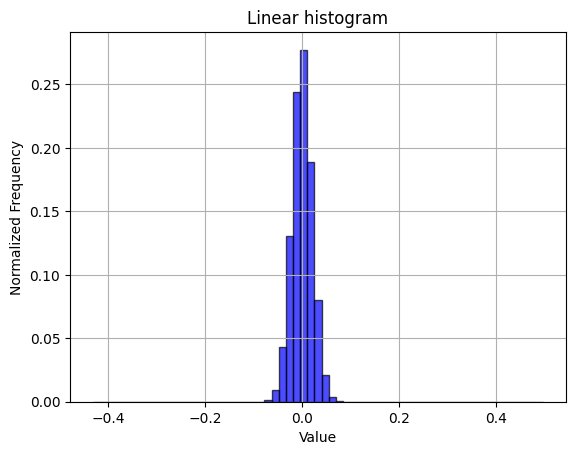

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 5.96046448e-08 1.78813934e-07
 1.78813934e-07 1.19209290e-07 5.96046448e-08 1.19209290e-07
 2.38418579e-07 2.98023224e-07 5.96046448e-07 4.76837158e-07
 1.01327896e-06 6.55651093e-07 1.13248825e-06 1.19209290e-06
 1.43051147e-06 1.72853470e-06 2.32458115e-06 3.03983688e-06
 4.29153442e-06 7.09295273e-06 1.43647194e-05 7.79628754e-05
 1.07842684e-03 1.20007992e-02 7.13238716e-02 2.22223461e-01
 3.37792754e-01 2.48474419e-01 8.88946652e-02 1.62408352e-02
 1.68490410e-03 1.19805336e-04 1.68681145e-05 9.65595245e-06
 5.12599945e-06 3.87430191e-06 1.66893005e-06 1.90734863e-06
 1.31130219e-06 1.43051147e-06 9.53674316e-07 8.34465027e-07
 1.01327896e-06 4.17232513e-07 5.36441803e-07 2.98023224e-07
 4.76837158e-07 2.38418579e-07 4.17232513e-07 1.19209290e-07
 5.96046448e-08 1.19209290e-07 5.96046448e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.

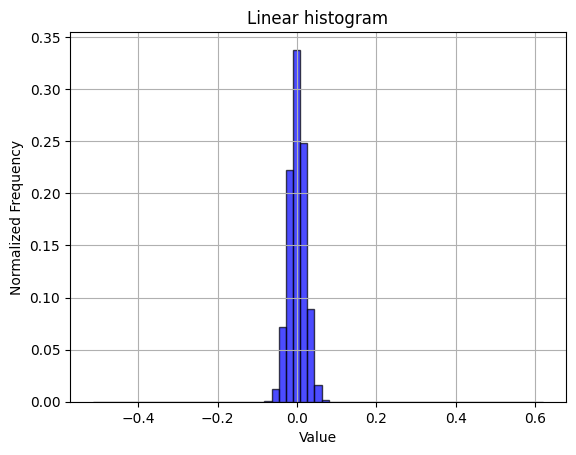

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[1.49011612e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.49011612e-08 1.49011612e-08 4.47034836e-08
 2.98023224e-08 5.96046448e-08 2.98023224e-08 1.93715096e-07
 1.04308128e-07 2.53319740e-07 1.63912773e-07 2.53319740e-07
 4.76837158e-07 5.51342964e-07 7.00354576e-07 1.26659870e-06
 1.34110451e-06 1.74343586e-06 2.99513340e-06 4.38094139e-06
 8.35955143e-06 2.59429216e-05 3.56018543e-04 7.23142922e-03
 7.91344196e-02 3.40140805e-01 4.18507457e-01 1.37470022e-01
 1.61405504e-02 8.95008445e-04 4.80413437e-05 1.16378069e-05
 4.70876694e-06 3.23355198e-06 1.86264515e-06 1.40070915e-06
 8.34465027e-07 1.0

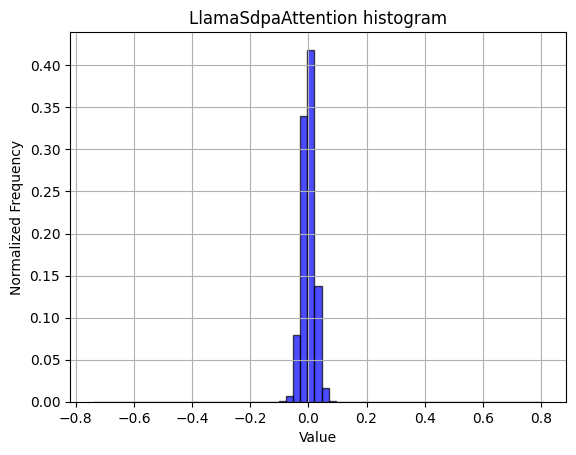

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[4.43569449e-08 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 2.21784725e-08 8.87138899e-08 4.43569449e-08
 4.43569449e-08 8.87138899e-08 2.21784725e-07 2.88320142e-07
 4.21390977e-07 5.98818757e-07 9.09317371e-07 1.15328057e-06
 1.48595766e-06 1.33070835e-06 1.99606252e-06 2.39527503e-06
 3.01627226e-06 3.77034032e-06 4.43569449e-06 5.67768895e-06
 5.89947368e-06 6.60918480e-06 7.80682231e-06 1.24864800e-05
 4.93471013e-05 4.33943992e-04 4.43616024e-03 5.45204961e-02
 2.92373502e-01 4.45030634e-01 1.78595654e-01 2.24604496e-02
 1.75824276e-03 1.94970952e-04 2.82553739e-05 1.08452730e-05
 8.07296398e-06 6.74225563e-06 6.23215077e-06 4.96797783e-06
 4.41351602e-06 3.79251879e-06 2.57270281e-06 2.15131183e-06
 1.57467155e-06 1.66338544e-06 1.21981599e-06 8.64960427e-07
 7.76246537e-07 6.43175702e-07 3.99212505e-07 3.32677087e-07
 1.10892362e-07 6.65354174e-08 0.00000000e+00 0.00000000e+00
 0

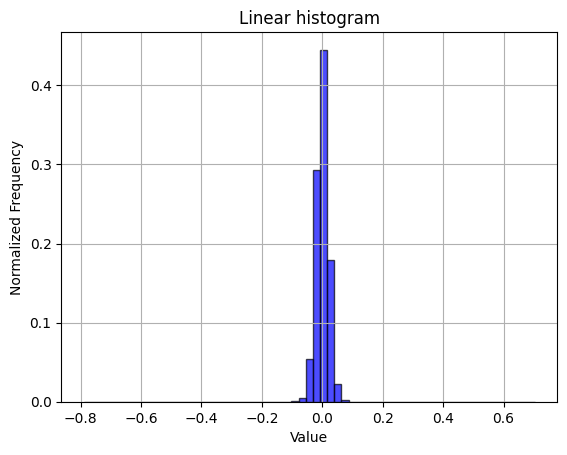

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 2.21784725e-08 2.21784725e-08
 0.00000000e+00 4.43569449e-08 1.10892362e-07 2.21784725e-08
 4.43569449e-08 1.10892362e-07 2.43963197e-07 3.32677087e-07
 5.98818757e-07 9.31495844e-07 1.19763751e-06 1.48595766e-06
 1.46377918e-06 1.77427780e-06 2.24002572e-06 2.97191531e-06
 3.59291254e-06 4.16955283e-06 4.67965769e-06 5.41154728e-06
 5.98818757e-06 6.58700632e-06 6.83096952e-06 8.69396121e-06
 1.50148259e-05 3.16952550e-04 1.21158334e-02 1.39175238e-01
 4.29842106e-01 3.42034562e-01 7.20642888e-02 4.21100439e-03
 9.33270122e-05 1.25530154e-05 8.64960427e-06 7.20800355e-06
 6.89750494e-06 6.29868618e-06 5.56679659e-06 4.39133755e-06
 4.45787297e-06 3.57073407e-06 2.52834586e-06 2.39527503e-06
 1.77427780e-06 1.13110210e-06 1.33070835e-06 9.53674316e-07
 7.09711119e-07 7.76246537e-07 3.10498615e-07 3.10498615e-07
 1.55249307e-07 6.65354174e-08 0.00000000e+00 0.00000000e+00
 0

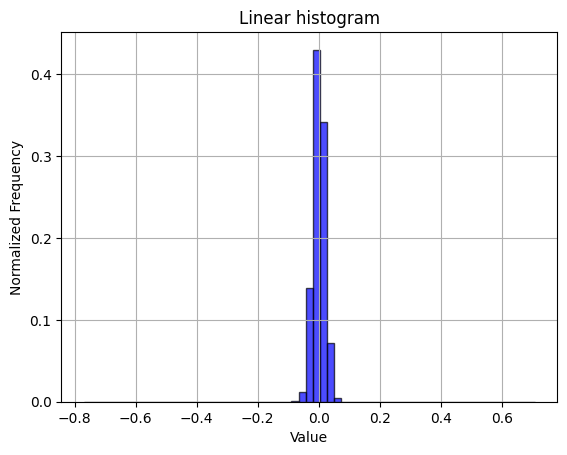

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.21784725e-08 0.00000000e+00 0.00000000e+00
 2.21784725e-08 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.21784725e-08 2.21784725e-08 2.21784725e-08 2.21784725e-08
 1.33070835e-07 1.77427780e-07 2.21784725e-07 2.21784725e-07
 6.87532647e-07 1.30852988e-06 3.19370004e-06 1.05569529e-05
 1.03440396e-04 2.62818669e-02 4.92632311e-01 4.59547531e-01
 2.13221838e-02 8.24595607e-05 8.00642856e-06 2.72795211e-06
 1.39724377e-06 5.32283339e-07 2.43963197e-07 1.99606252e-07
 1.55249307e-07 4.43569449e-08 0.00000000e+00 6.65354174e-08
 2.21784725e-08 0.00000000e+00 2.21784725e-08 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 4.43569449e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

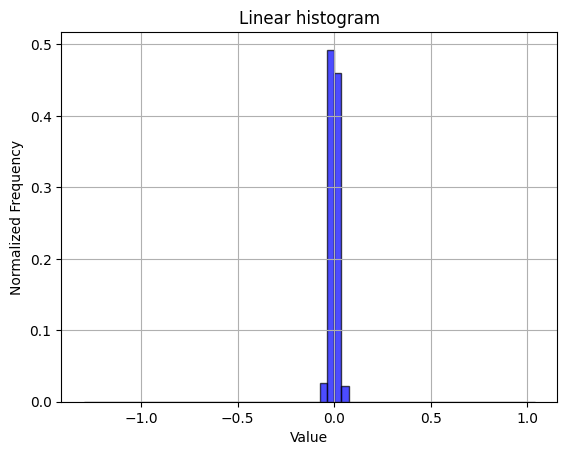

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

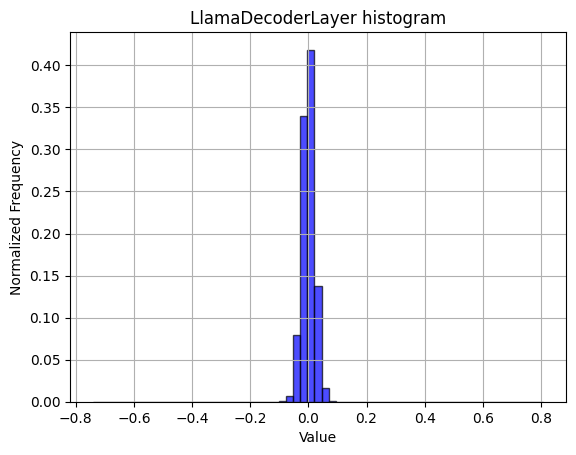

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 5.96046448e-08 5.96046448e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.19209290e-07
 0.00000000e+00 0.00000000e+00 5.96046448e-08 5.96046448e-08
 0.00000000e+00 0.00000000e+00 2.38418579e-07 3.57627869e-07
 1.19209290e-07 6.55651093e-07 6.55651093e-07 7.15255737e-07
 1.19209290e-06 1.49011612e-06 1.84774399e-06 3.39746475e-06
 5.24520874e-06 9.11951065e-06 1.45435333e-05 2.50935555e-05
 6.88433647e-05 3.44336033e-04 2.22021341e-03 1.30249262e-02
 5.73364496e-02 1.74704552e-01 3.19026649e-01 2.73247004e-01
 1.18330061e-01 3.36722732e-02 6.65402412e-03 1.04600191e-03
 1.70111656e-04 4.11868095e-05 1.80602074e-05 1.05500221e-05
 5.60283661e-06 4.52995300e-06 2.44379044e-06 2.38418579e-06
 1.19209290e-06 8.34465027e-07 7.74860382e-07 4.76837158e-07
 2.38418579e-07 2.98023224e-07 1.78813934e-07 1.19209290e-07
 1.

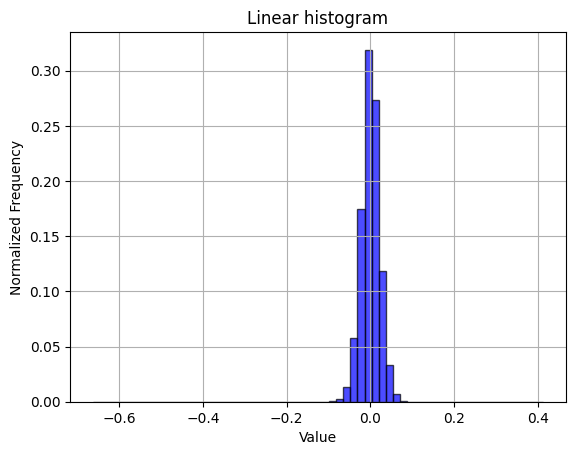

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[5.96046448e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.96046448e-08 0.00000000e+00 1.19209290e-07 1.19209290e-07
 2.98023224e-07 1.78813934e-07 6.55651093e-07 7.15255737e-07
 8.94069672e-07 1.25169754e-06 1.66893005e-06 1.84774399e-06
 2.50339508e-06 3.69548798e-06 5.96046448e-06 8.76188278e-06
 1.30534172e-05 2.92658806e-05 6.22272491e-05 1.86264515e-04
 6.11603260e-04 2.14862823e-03 7.07519054e-03 2.11792588e-02
 5.45582175e-02 1.20109856e-01 2.07875609e-01 2.44943976e-01
 1.81339979e-01 9.59509015e-02 4.15088534e-02 1.53585076e-02
 4.88024950e-03 1.48445368e-03 4.15682793e-04 1.31249428e-04
 5.14984131e-05 2.21729279e-05 1.22189522e-05 7.15255737e-06
 4.17232513e-06 3.09944153e-06 2.32458115e-06 1.60932541e-06
 1.01327896e-06 7.74860382e-07 7.15255737e-07 3.57627869e-07
 4.76837158e-07 1.78813934e-07 1.19209290e-07 1.19209290e-07
 5.96046448e-08 5.96046448e-08 0.00000000e+00 0.00000000e+00
 0.

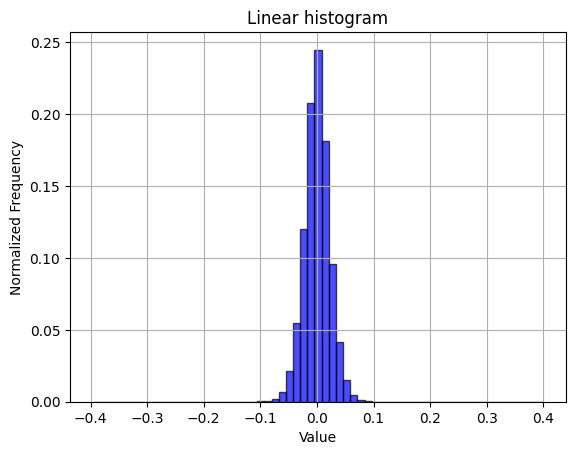

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[1.19209290e-07 1.19209290e-07 5.96046448e-08 5.96046448e-08
 5.96046448e-08 5.96046448e-08 1.78813934e-07 1.19209290e-07
 1.78813934e-07 1.78813934e-07 5.96046448e-08 2.98023224e-07
 2.38418579e-07 2.38418579e-07 2.98023224e-07 2.38418579e-07
 0.00000000e+00 5.96046448e-08 1.19209290e-07 5.96046448e-08
 2.38418579e-07 1.78813934e-07 5.36441803e-07 3.27825546e-06
 2.41994858e-05 1.95920467e-04 1.17164850e-03 6.57498837e-03
 2.74890661e-02 8.29135776e-02 1.76196456e-01 2.52588570e-01
 2.32557118e-01 1.40281558e-01 5.87466955e-02 1.67653561e-02
 3.75044346e-03 6.33597374e-04 8.72015953e-05 1.22785568e-05
 1.49011612e-06 0.00000000e+00 1.19209290e-07 1.19209290e-07
 5.96046448e-08 5.96046448e-08 0.00000000e+00 1.19209290e-07
 1.78813934e-07 4.17232513e-07 2.38418579e-07 2.38418579e-07
 1.78813934e-07 5.96046448e-08 2.38418579e-07 5.96046448e-08
 1.78813934e-07 1.19209290e-07 5.96046448e-08 5.96046448e-08
 0.

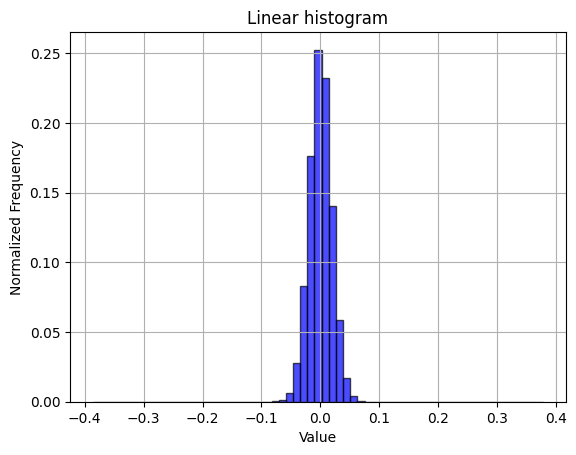

Module: Linear
Operation: Linear(in_features=4096, out_features=4096, bias=False)
[2.98023224e-07 5.96046448e-08 1.19209290e-07 5.96046448e-08
 2.38418579e-07 2.38418579e-07 2.38418579e-07 5.96046448e-08
 0.00000000e+00 5.96046448e-08 5.96046448e-08 0.00000000e+00
 5.96046448e-08 4.17232513e-07 2.98023224e-07 1.78813934e-07
 2.98023224e-07 3.57627869e-07 9.53674316e-07 1.78813934e-07
 8.94069672e-07 1.19209290e-06 2.02655792e-06 2.62260437e-06
 3.87430191e-06 5.36441803e-06 1.10864639e-05 2.87294388e-05
 1.12831593e-04 1.49313807e-02 4.69007909e-01 4.97802675e-01
 1.78955197e-02 1.28090382e-04 2.87294388e-05 1.26361847e-05
 6.25848770e-06 3.69548798e-06 2.44379044e-06 1.78813934e-06
 1.19209290e-06 8.94069672e-07 6.55651093e-07 2.38418579e-07
 3.57627869e-07 5.96046448e-07 1.19209290e-07 3.57627869e-07
 2.38418579e-07 5.96046448e-08 0.00000000e+00 1.19209290e-07
 5.96046448e-08 5.96046448e-08 1.19209290e-07 2.38418579e-07
 1.19209290e-07 3.57627869e-07 1.19209290e-07 5.96046448e-08
 5.

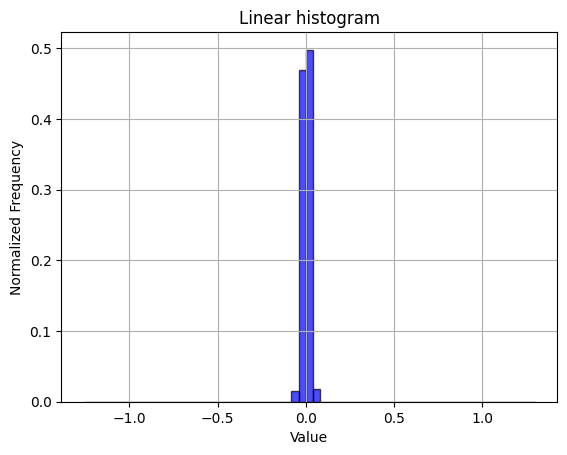

Module: LlamaSdpaAttention
Operation: LlamaSdpaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (rotary_emb): LlamaRotaryEmbedding()
)
[7.45058060e-08 1.49011612e-08 2.98023224e-08 1.49011612e-08
 5.96046448e-08 5.96046448e-08 5.96046448e-08 1.49011612e-08
 0.00000000e+00 1.49011612e-08 1.49011612e-08 0.00000000e+00
 1.49011612e-08 1.04308128e-07 8.94069672e-08 4.47034836e-08
 1.04308128e-07 1.04308128e-07 2.38418579e-07 7.45058060e-08
 2.38418579e-07 3.57627869e-07 7.45058060e-07 1.08778477e-06
 2.08616257e-06 3.45706940e-06 8.24034214e-06 2.67624855e-05
 3.36334109e-04 2.30942667e-02 4.60989609e-01 4.88465101e-01
 2.66360641e-02 3.90112400e-04 2.74777412e-05 8.10623169e-06
 3.66568565e-06 1.83284283e-06 9.98377800e-07 6.25848770e-07
 4.17232513e-07 2.8

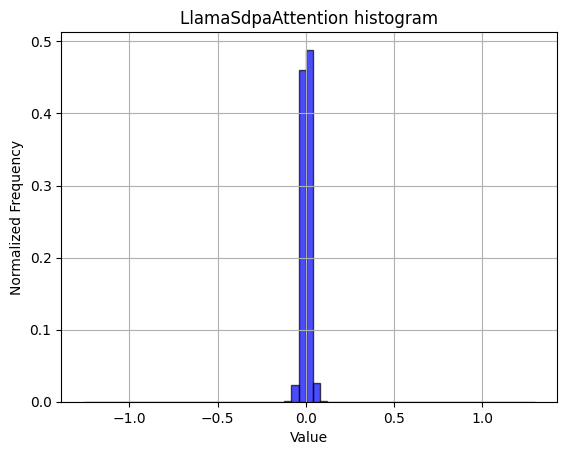

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 2.21784725e-08 0.00000000e+00 0.00000000e+00
 6.65354174e-08 2.21784725e-08 2.21784725e-08 6.65354174e-08
 1.55249307e-07 6.65354174e-08 1.55249307e-07 8.87138899e-08
 4.65747922e-07 6.87532647e-07 7.31889592e-07 1.64120696e-06
 2.59488128e-06 4.48005144e-06 1.02686328e-05 1.96057697e-05
 4.24717748e-05 1.14551810e-04 2.78960827e-04 7.46416491e-04
 2.22403504e-03 6.92445178e-03 2.04733250e-02 5.33058033e-02
 1.07532679e-01 1.72691478e-01 2.06989998e-01 1.87849289e-01
 1.29256138e-01 6.85772563e-02 2.81589198e-02 9.89694374e-03
 3.21559019e-03 1.03855133e-03 3.80028126e-04 1.50769256e-04
 6.17448674e-05 2.44406767e-05 1.18211258e-05 5.69986743e-06
 2.99409378e-06 1.53031460e-06 8.64960427e-07 6.20997229e-07
 5.32283339e-07 3.54855560e-07 2.21784725e-07 1.10892362e-07
 1.10892362e-07 4.43569449e-08 0.00000000e+00 2.21784725e-08
 0

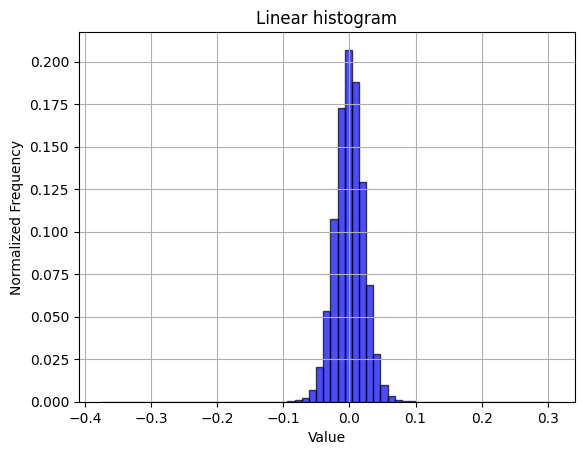

Module: Linear
Operation: Linear(in_features=4096, out_features=11008, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.43569449e-08
 2.21784725e-08 6.65354174e-08 0.00000000e+00 0.00000000e+00
 4.43569449e-08 4.43569449e-08 8.87138899e-08 0.00000000e+00
 1.77427780e-07 1.99606252e-07 2.43963197e-07 5.98818757e-07
 7.54068064e-07 1.41942224e-06 2.01824100e-06 4.23608824e-06
 7.76246537e-06 1.56136446e-05 3.55742698e-05 1.43206397e-04
 2.16712508e-03 2.93431615e-02 1.76283570e-01 3.92893503e-01
 3.04272430e-01 8.49537517e-02 9.20674967e-03 5.53973885e-04
 6.48054966e-05 2.38196794e-05 1.05791314e-05 5.58897506e-06
 3.54855560e-06 2.30656114e-06 1.21981599e-06 7.09711119e-07
 3.77034032e-07 2.66141670e-07 6.65354174e-08 6.65354174e-08
 8.87138899e-08 2.21784725e-08 4.43569449e-08 0.00000000e+00
 2.21784725e-08 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0

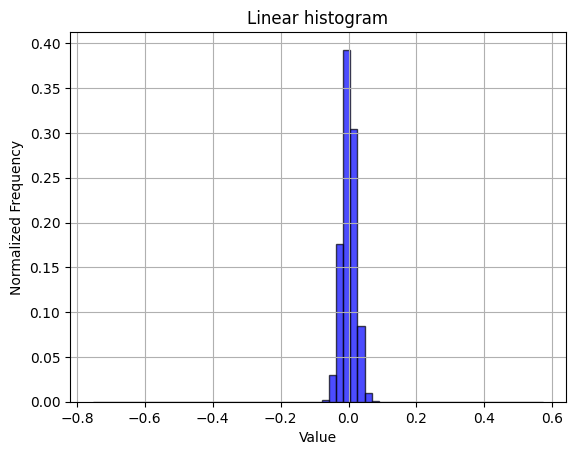

Module: Linear
Operation: Linear(in_features=11008, out_features=4096, bias=False)
[2.21784725e-08 0.00000000e+00 0.00000000e+00 2.21784725e-08
 0.00000000e+00 2.21784725e-08 0.00000000e+00 2.21784725e-08
 0.00000000e+00 6.65354174e-08 4.43569449e-08 2.21784725e-08
 0.00000000e+00 4.43569449e-08 0.00000000e+00 2.21784725e-08
 4.43569449e-08 8.87138899e-08 1.10892362e-07 1.99606252e-07
 3.10498615e-07 4.43569449e-07 8.42781954e-07 2.72795211e-06
 8.40564107e-06 4.59094380e-05 2.17317980e-02 7.28437756e-01
 2.48982363e-01 7.63072524e-04 1.83637752e-05 4.39133755e-06
 1.46377918e-06 5.10104867e-07 3.54855560e-07 1.99606252e-07
 1.33070835e-07 8.87138899e-08 2.21784725e-08 2.21784725e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.21784725e-08
 2.21784725e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.21784725e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0

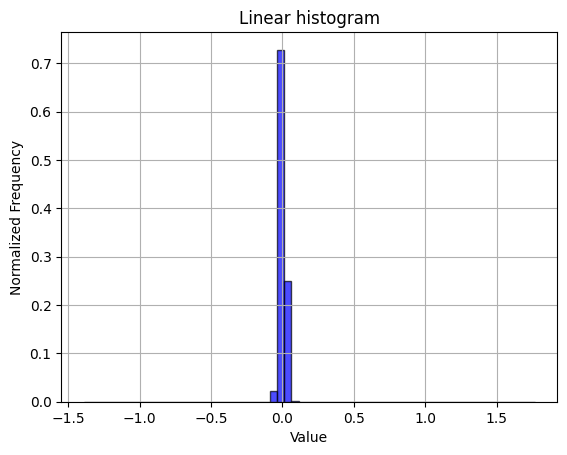

Module: LlamaMLP
Operation: LlamaMLP(
  (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
  (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
  (act_fn): SiLU()
)
No weights in this module.
Module: LlamaDecoderLayer
Operation: LlamaDecoderLayer(
  (self_attn): LlamaSdpaAttention(
    (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (mlp): LlamaMLP(
    (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
    (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
    (act_fn): SiLU()
  )
  (input_layernorm):

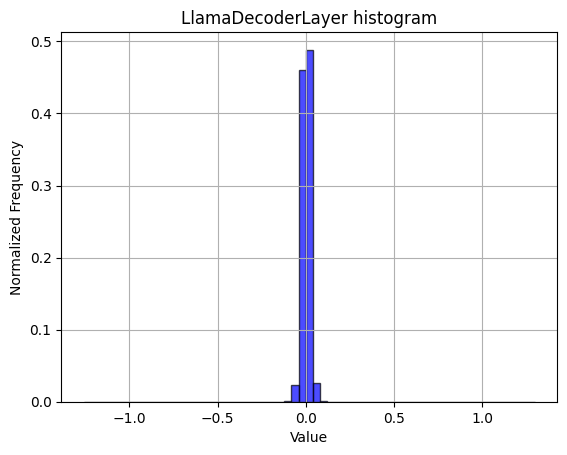

Module: LlamaModel
Operation: LlamaModel(
  (embed_tokens): Embedding(32000, 4096)
  (layers): ModuleList(
    (0-31): 32 x LlamaDecoderLayer(
      (self_attn): LlamaSdpaAttention(
        (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
        (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
        (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
        (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
        (rotary_emb): LlamaRotaryEmbedding()
      )
      (mlp): LlamaMLP(
        (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
        (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
        (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
        (act_fn): SiLU()
      )
      (input_layernorm): LlamaRMSNorm()
      (post_attention_layernorm): LlamaRMSNorm()
    )
  )
  (norm): LlamaRMSNorm()
)
No weights in this module.
Module: Linear
Operation: Li

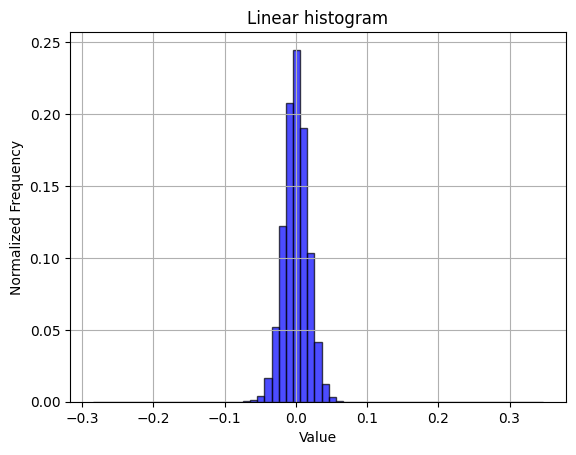

Module: LlamaForCausalLM
Operation: LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (no

'Hey, are you conscious? Can you talk to me?\n'

In [ ]:
prompt = "Hey, are you conscious? Can you talk to me?"
inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

print("Input Tokens: ", len(inputs[0]))
print("Number of layers: ", idx)
# Generate
generate_ids = model.generate(inputs.input_ids, max_length=len(inputs[0]) + 1)
tokenizer.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]